### Latent Learning

In this module, the agent will first explore the maze for 10 episodes with no task and no rewards. The episode ends if the agent during trial-and-error exploration enters a terminal state.

In [1]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

import utils
from env import Maze
from agent import QAgent, TemporalDifferenceSuccessor
from RL import ReinforcementLearning

%load_ext autoreload
%autoreload 2

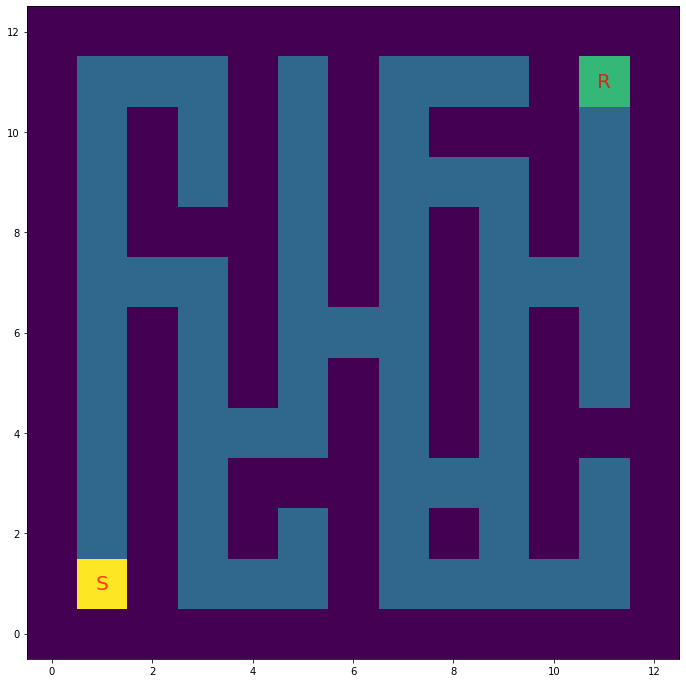

In [2]:
#Load in environment
with open('Environments/maze.pickle', 'rb') as handle:
    env_info = pickle.load(handle)
utils.plot((env_info['height'], env_info['width']), env_info['walls'], env_info['start_state'], env_info['reward_states'])


In [ ]:
class TemporalDifferenceSuccessor:
    def __init__(self):
        """
        Creates an instances of an agent that uses SR.
        """
        pass
    
    def agent_init(self, agent_info={}):
        """
        Initlaizes the SR agent according to the parameters defined in agent_info
        """
        #Set up tracking variables
        self.last_action = None
        self.last_state = None
        self.num_steps = 0
        
        #Set up task
        self.num_states = agent_info['num_states']
        self.num_actions = agent_info['num_actions']
        
        #Set up matrices
        self.Q = np.zeros([self.num_states, self.num_actions])
        self.M = np.zeros([self.num_states, self.num_states])
        self.w = np.zeros([self.num_states]) #Reward_vector
        
        self.memory = [] #List of three int tuples, (s, a, s')
        
        
        #Set Hyperparameter
        self.step_size = agent_info['step_size']
        self.discount_factor = agent_info['discount_factor']
        self.epsilon = agent_info['epsilon']
        
        
    def agent_sample_action(self, state):
        """
        Sample action for the given state
        """
        if np.random.random()<self.epsilon: #Exploration
            action = np.random.choice(range(4))
            
        else: #Exploitation
            action = utils.argmax(self.Q[state])
            
        return action
    
    
    def agent_update_values(self, reward, state):
        """
        Updates the Q-values, reward_vector and the SR
        """
        
        #Compute w
        delta = reward + self.discount_factor*self.w[state] - self.w[self.last_state]
        self.w[self.last_state] += self.step_size*delta
        
        #Compute the SR-error and update M
        one_hot = np.zeros(self.num_states)
        one_hot[self.last_state] = 1

        delta = one_hot + self.discount_factor*self.M[state] - self.M[self.last_state]
        self.M[self.last_state] += self.step_size*delta


        #Update Q-values
        self.Q[self.last_state][self.last_action] = np.dot(self.M[state], self.w)

        pass
        
        
    
    def agent_start(self, start_state):
        """
        Samples first action for the starting_state
        """
        
        action = self.agent_sample_action(start_state)
        
        #Store last state and action
        self.last_state = start_state
        self.last_action = action
        
        
        #Update tracking variables
        self.num_steps += 1
        
        return action
        
    
    def agent_step(self, reward, state):
        """
        Sample action in the given state. 
        Update the SR in the agent.
        """ 
        
        #Update the values
        self.agent_update_values(reward, state)   
            
        #Sample action
        action = self.agent_sample_action(state)  
        
        
        #Store last state and action
        self.last_state = state
        self.last_action = action
        
        
        #Update tracking variables
        self.num_steps += 1
        
        return action
        
    
    def agent_stop(self, reward, state):
        """
        Updates the agent after reaching the final state
        """
        
        self.agent_update_values(reward, state)
        
        #Store last_state
        self.last_state = state
        
        #Update tracking variables
        self.num_steps += 1
        
        pass
        
        
        
    
    ####TO DO####
    
    def replay(self):
        #Loop over number_of_replay_steps:
            #Randomly sample a tuple from self.memory
            #state, action, follow_state = random.choice(self.memory())
            #Update the state action value according to agent_update_values
            
        
        
        #In RL.py, change rl_step:
        #After sampling action 

        
        
        
    def replay_agent_update_values(last_state, last_action, state):
        """
        For replay
        """
        pass
        
        
        
    
    

In [3]:
#Set up agent
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.005,
    
}

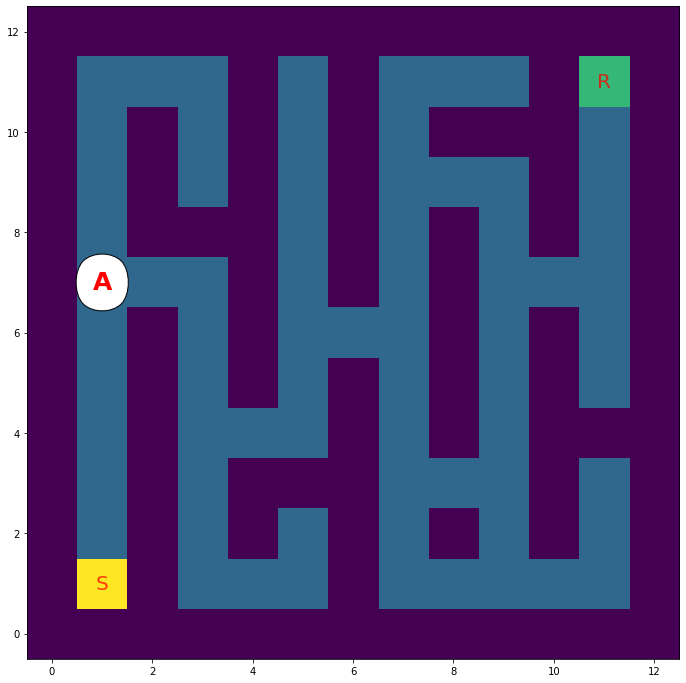

In [4]:
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

RL.rl_init(env_info, agent_info)

reward, state, action, termination = RL.rl_start()

for i in range(6):
    rewards, state, action, termination = RL.rl_step(0, state, 0)
RL.rl_plot()

100%|██████████| 45/45 [00:19<00:00,  2.36it/s]


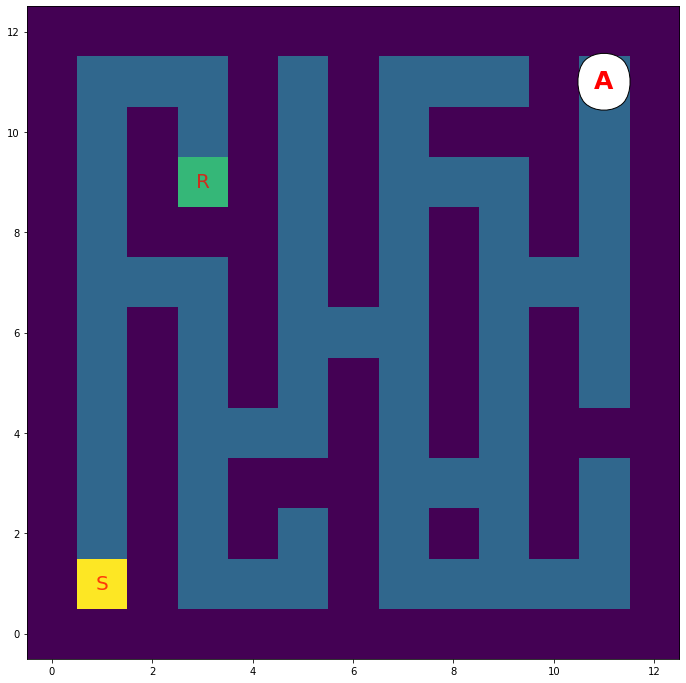

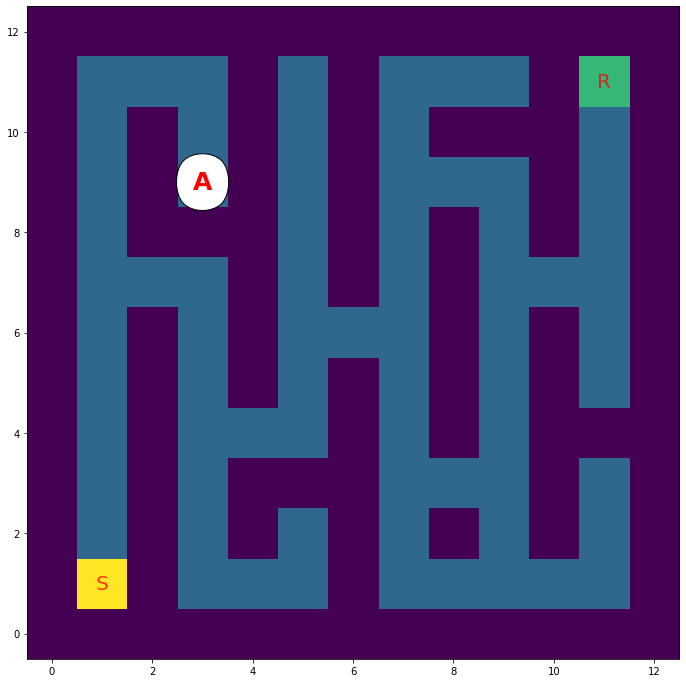

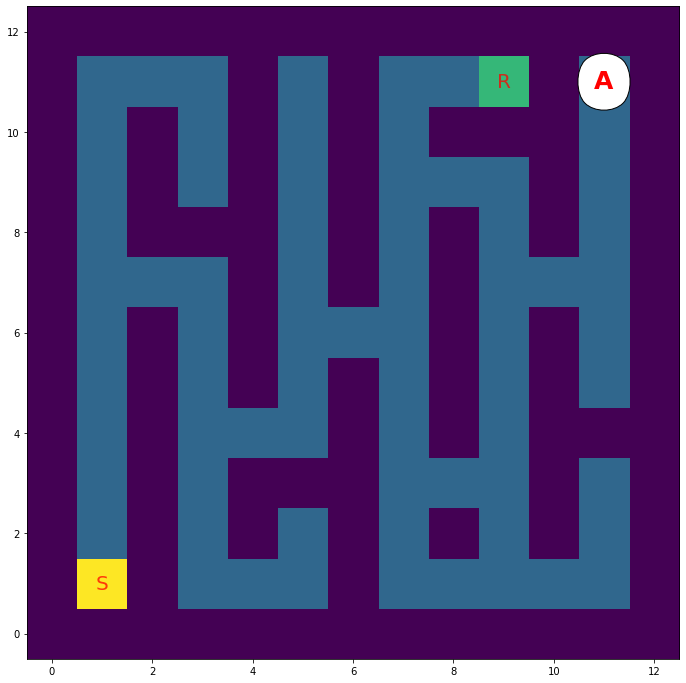

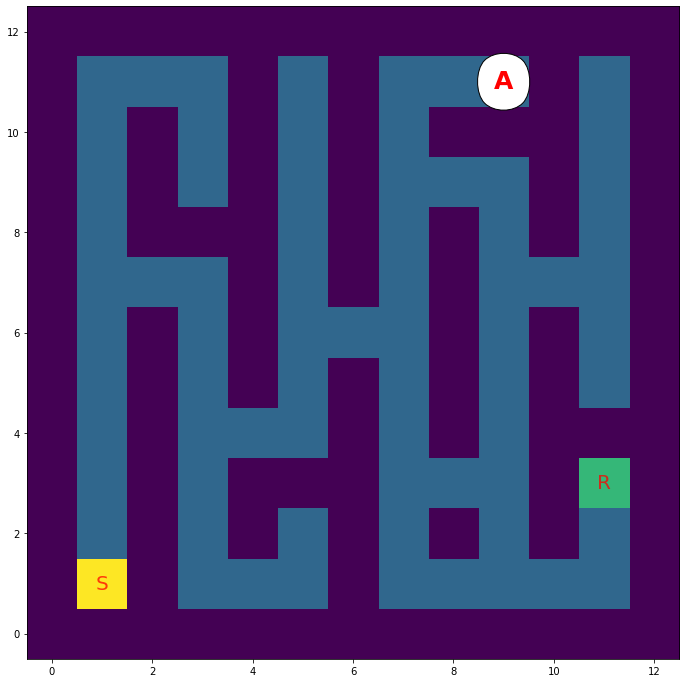

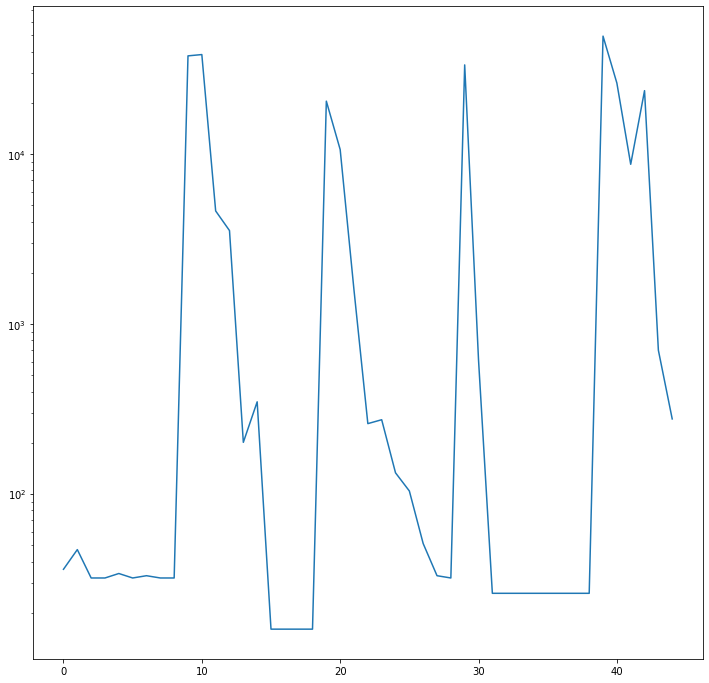

In [5]:
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 45

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9), (3, 11)]

RL.rl_init(env_info, agent_info)


#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
    
#Task
for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%10==0:
        index = episode//10 -1
        RL.rl_change_task(reward_states=[reward_states[index]])
        RL.rl_plot()
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()

100%|██████████| 45/45 [00:01<00:00, 30.34it/s]


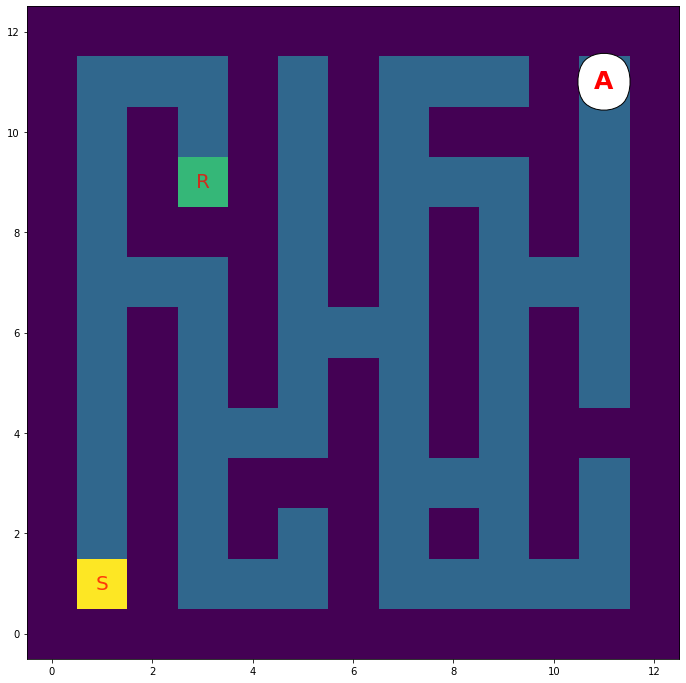

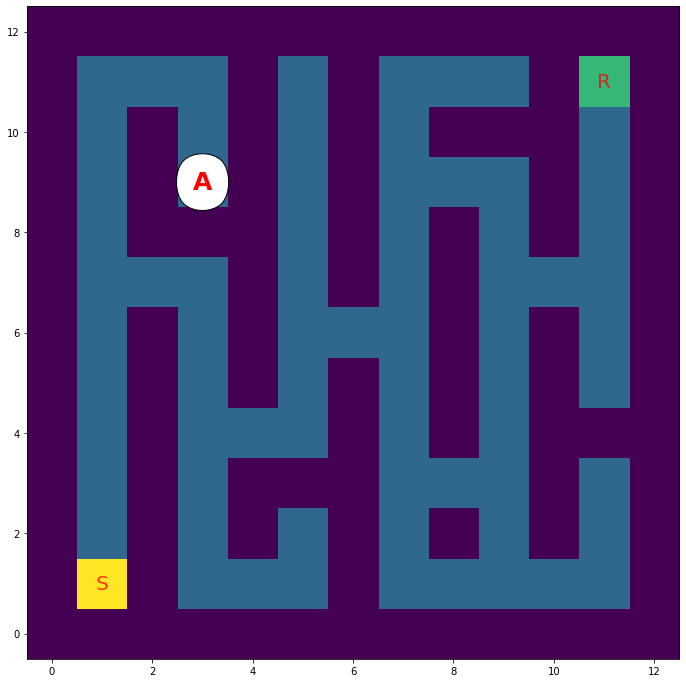

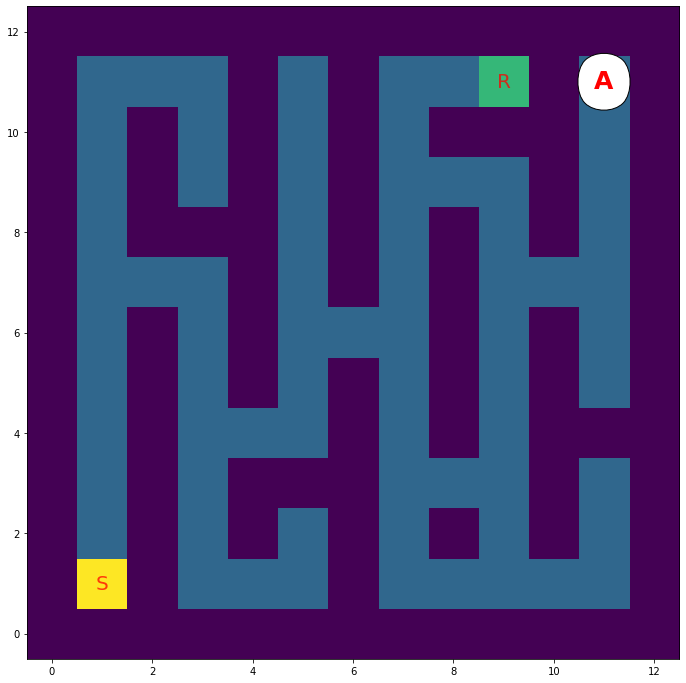

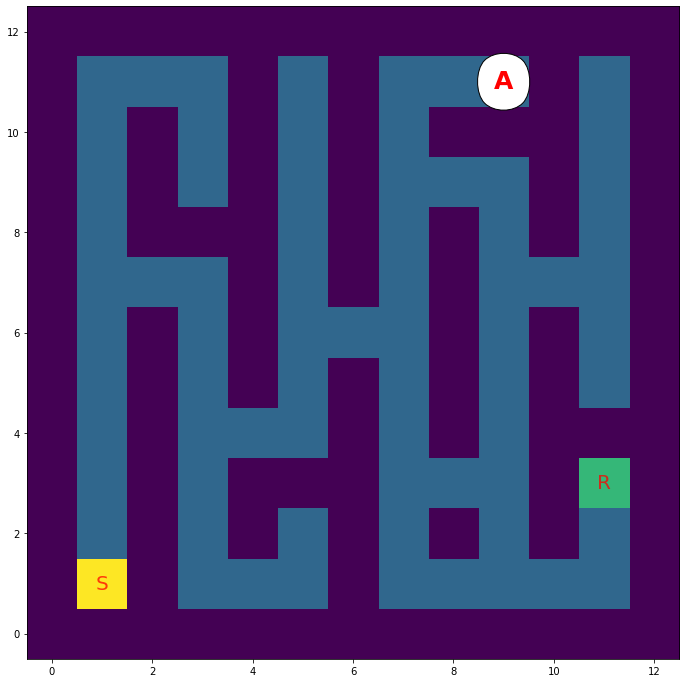

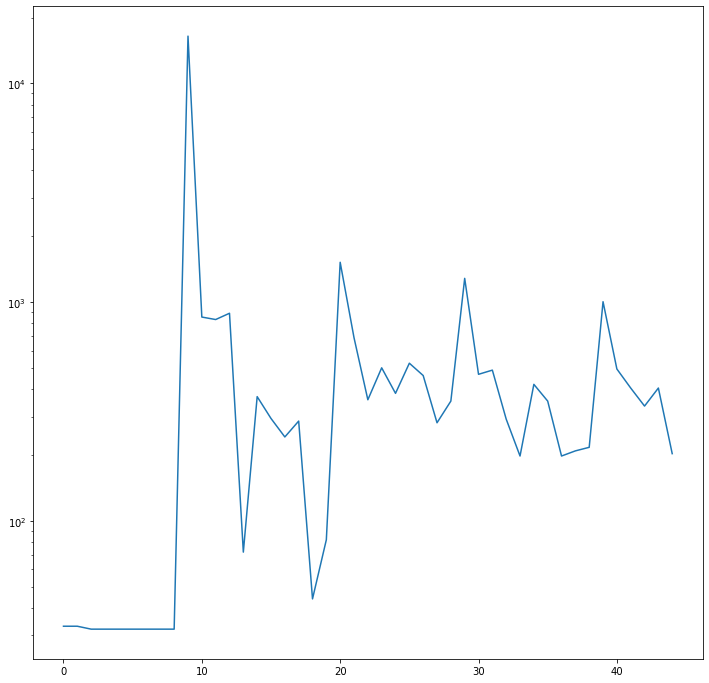

In [6]:
RL = ReinforcementLearning(Maze, QAgent)

NUM_EPISODES = 45

num_steps = []

reward_states = [(9, 3), (11, 11), (11, 9), (3, 11)]

RL.rl_init(env_info, agent_info)


#Latent learning
NUM_EXPLORATION_STEPS= 500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
    
#Task
for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%10==0:
        index = episode//10 -1
        RL.rl_change_task(reward_states=[reward_states[index]])
        RL.rl_plot()
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()

100%|██████████| 75/75 [06:41<00:00,  5.36s/it]


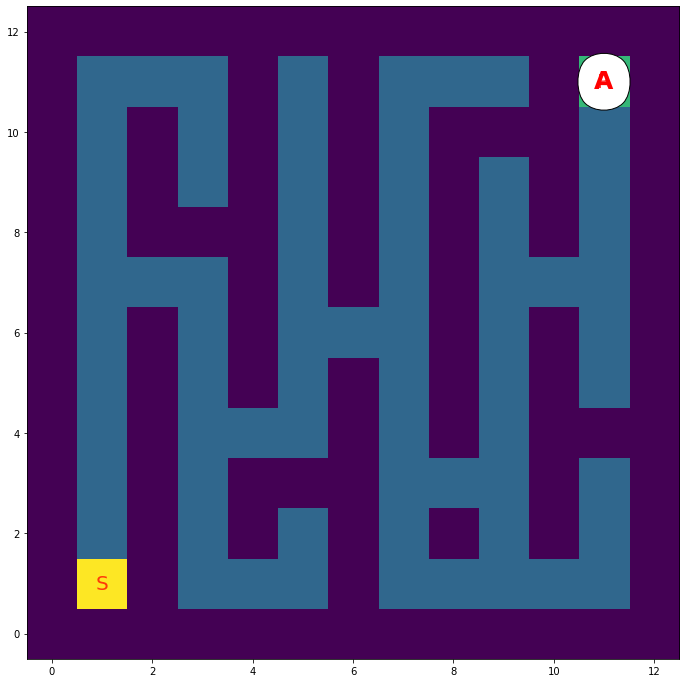

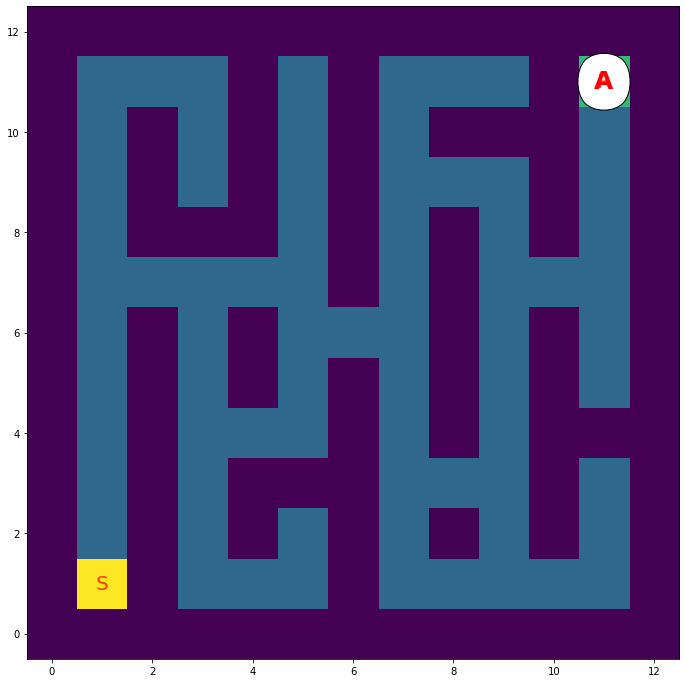

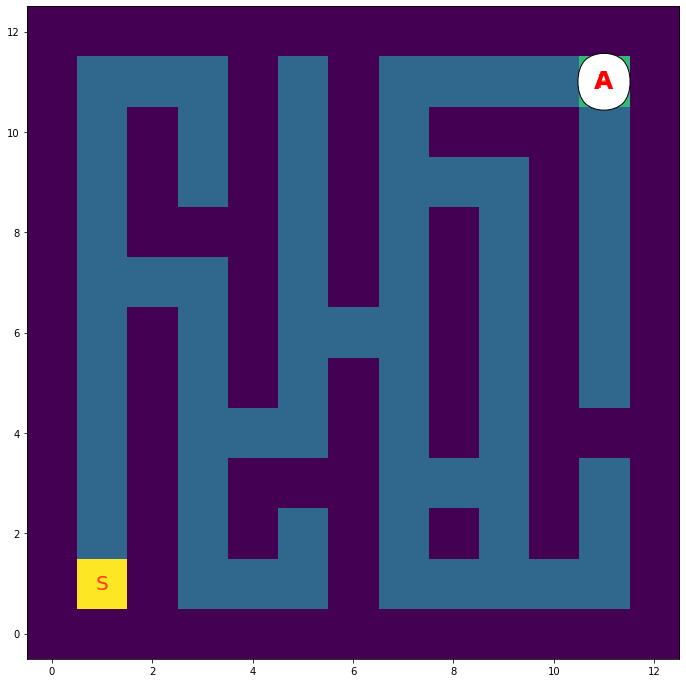

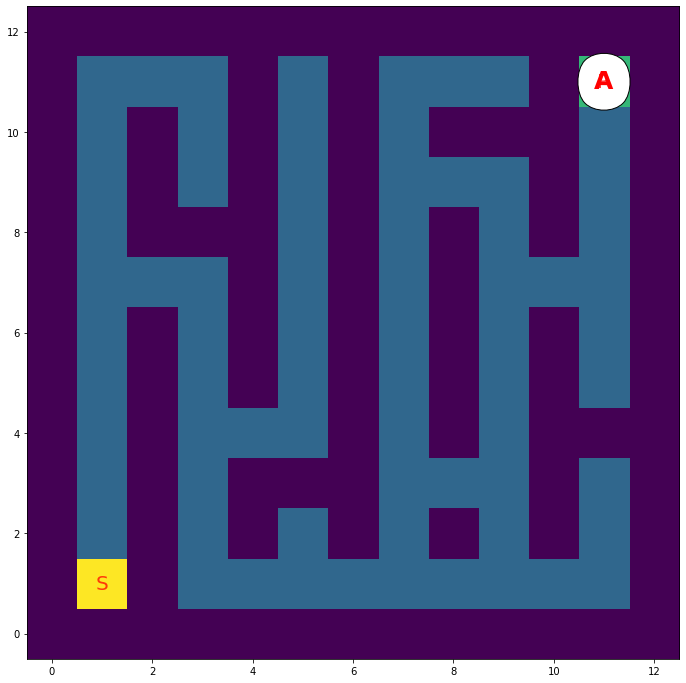

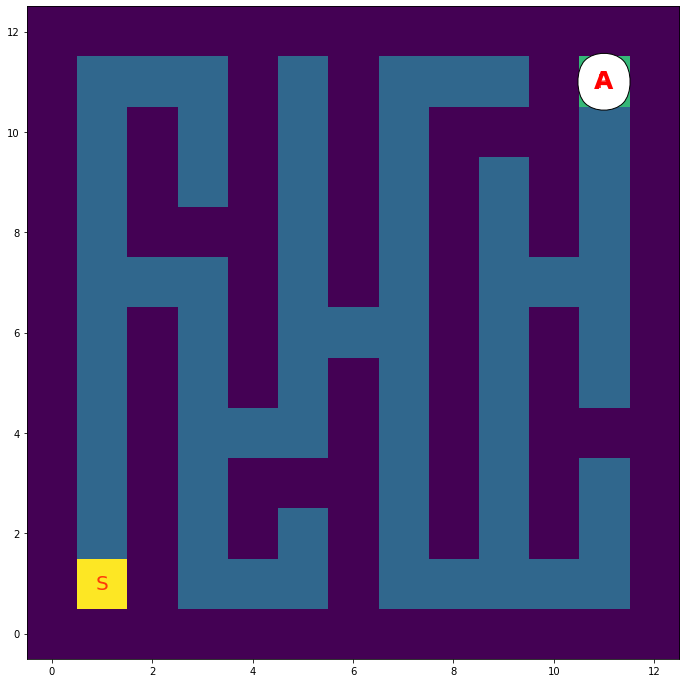

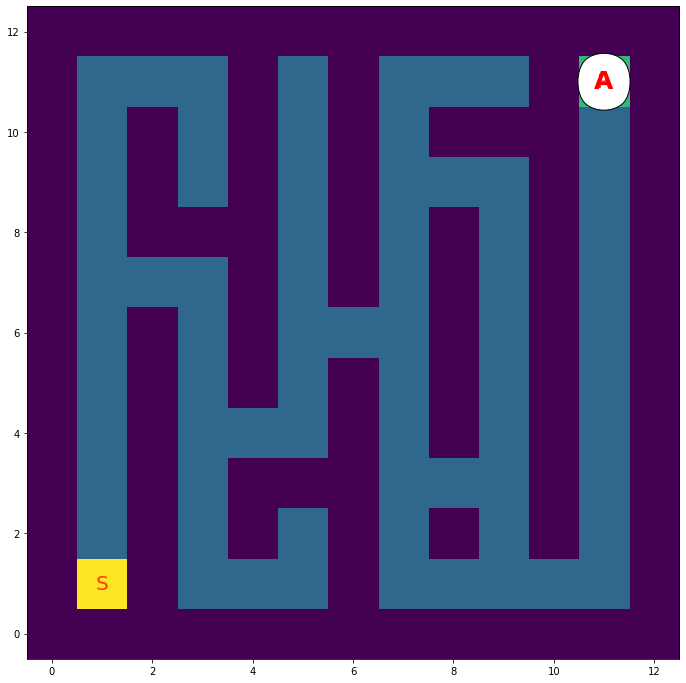

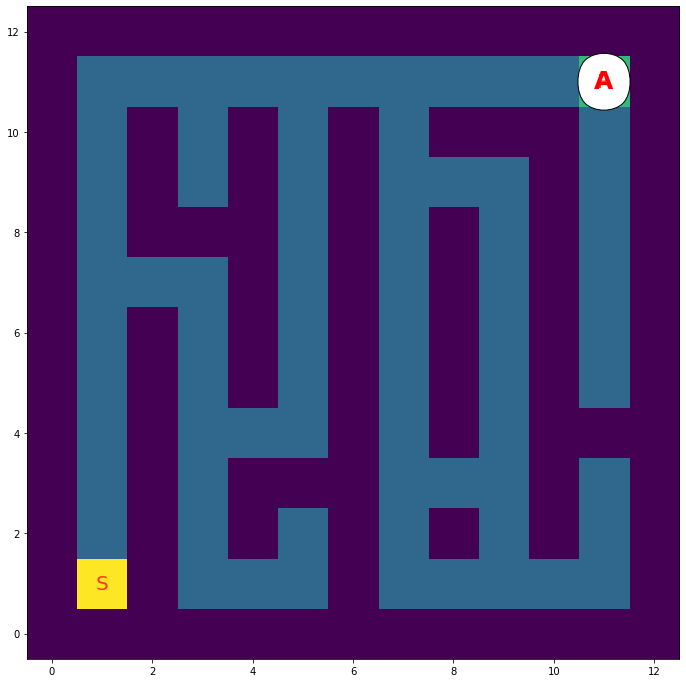

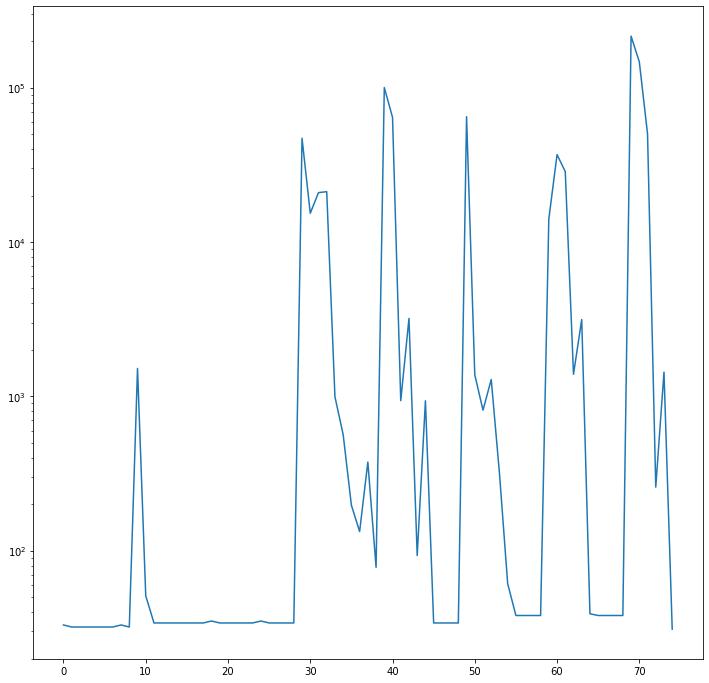

In [14]:
## Change the maze

RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 75

num_steps = []

#Set up trials with new environment
delta_wall = [{'new_walls':[(9, 8)],
               'remove_walls':[]},
              {'new_walls':[],
               'remove_walls':[(7, 4)]},
              {'new_walls':[(7, 10)],
               'remove_walls':[(11, 10)]},
              {'new_walls':[(6, 6)],
               'remove_walls':[(1, 6)]},
              {'new_walls':[(9, 8), (3, 8)],
               'remove_walls':[]},
              {'new_walls':[(7, 10)],
               'remove_walls':[(4, 11)]},
              {'new_walls':[(6, 6), (7, 10)],
               'remove_walls':[(11, 4), (11, 6), (11, 10)]},
             ]

RL.rl_init(env_info, agent_info)


#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
    
#Task
for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%10==0:
        
        #Get current index
        index = episode//10 - 1
        
        #Change the environment
        walls_ = env_info['walls'].copy()
        delta = delta_wall[index]
        
        for wall in delta['new_walls']:
            walls_.append(wall)
        for wall in delta['remove_walls']:
            walls_.remove(wall)
        
        #Change environment
        RL.rl_change_env(walls_)
    
        RL.rl_plot()
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()

## Some more explorations

In [14]:
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

RL.rl_init(env_info, agent_info)

In [16]:
#Get optimal path through maze

for _ in tqdm(range(1000)):
    RL.rl_episode()
    
optimal_trajectory = RL.trajectory

100%|██████████| 1000/1000 [00:06<00:00, 155.52it/s]


In [26]:
def record_trials(title="SR", optimal_trajectory=None):
    """
    This function records the SR in each state the agent enters during an epoch. 
    Params:
        title -- string, name of the resulting file
        optimal_trajectory -- list[int], simulates path of the agent
    """
    metadata = dict(title=title, artist='JG')
    writer = manimation.FFMpegFileWriter(fps=15, metadata=metadata)
    fig, ax = plt.subplots(figsize=(12, 12))
    fig.tight_layout()

    RL.rl_change_epsilon(0)  # Fully greedy for recording
    
    with writer.saving(fig, f"./out/{title}.mp4", 144):
        if optimal_trajectory: #Manually follow optimal trajectory
            for state in optimal_trajectory:
                plt.imshow(RL.agent.M[state].reshape(13, 13), origin="lower")
                writer.grab_frame()
                ax.clear()
        
        else: #Run experiment
            reward, state, action, termination = RL.rl_start()
            while not termination:
                reward, state, action, termination = RL.rl_step(reward, state, action)
                plt.imshow(RL.agent.M[state].reshape(13, 13), origin="lower")
                writer.grab_frame()
                ax.clear()

100%|██████████| 100/100 [00:34<00:00,  2.87it/s]


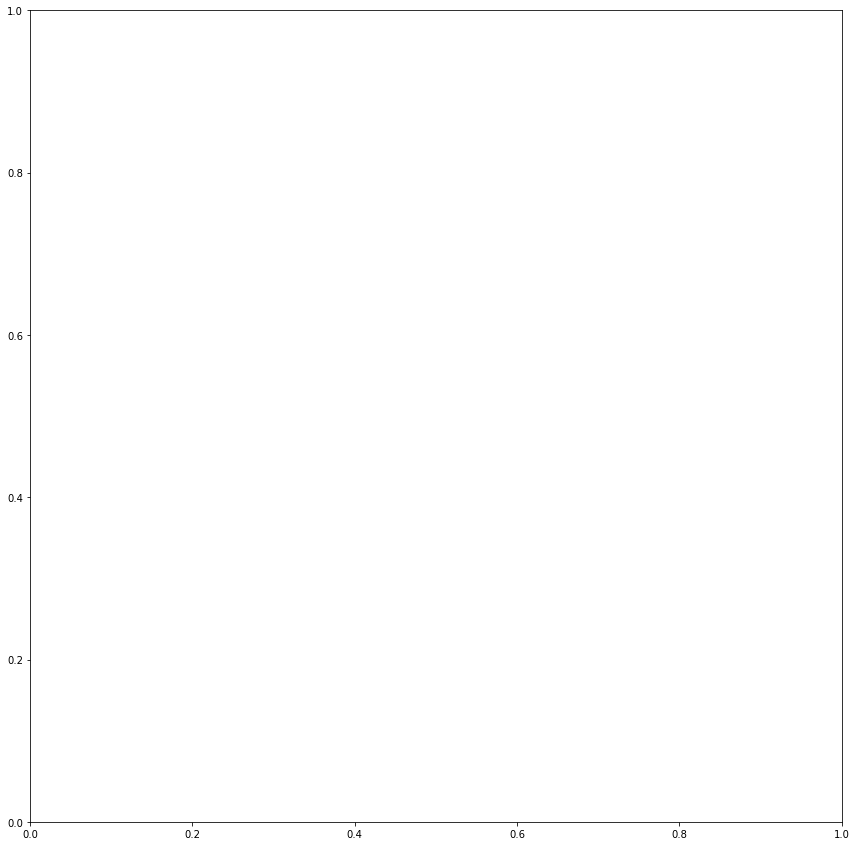

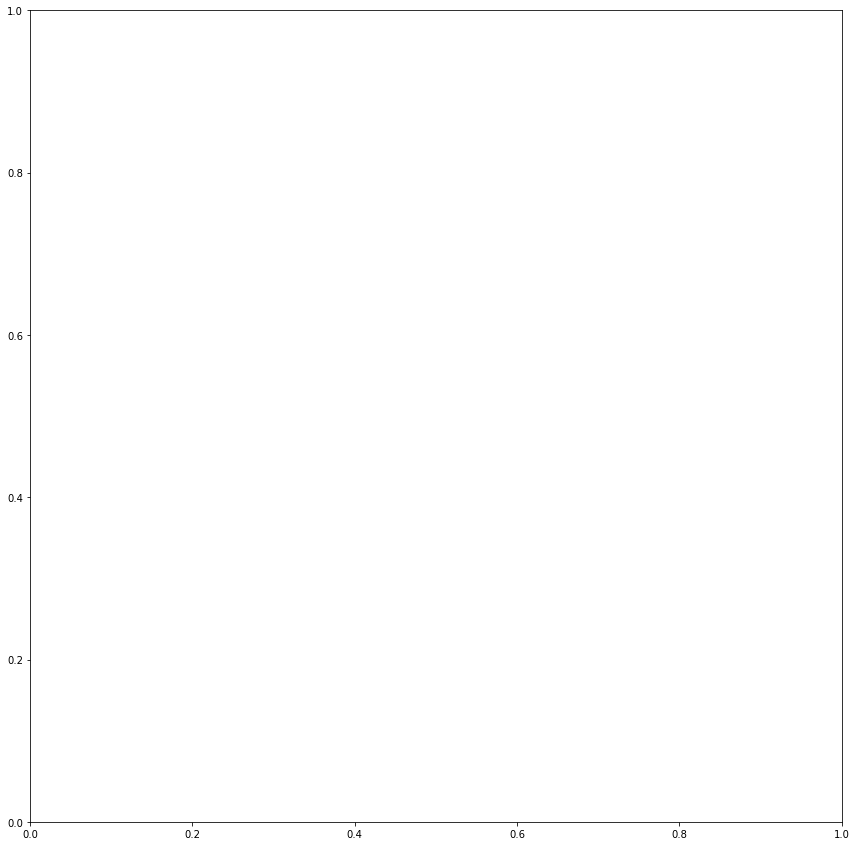

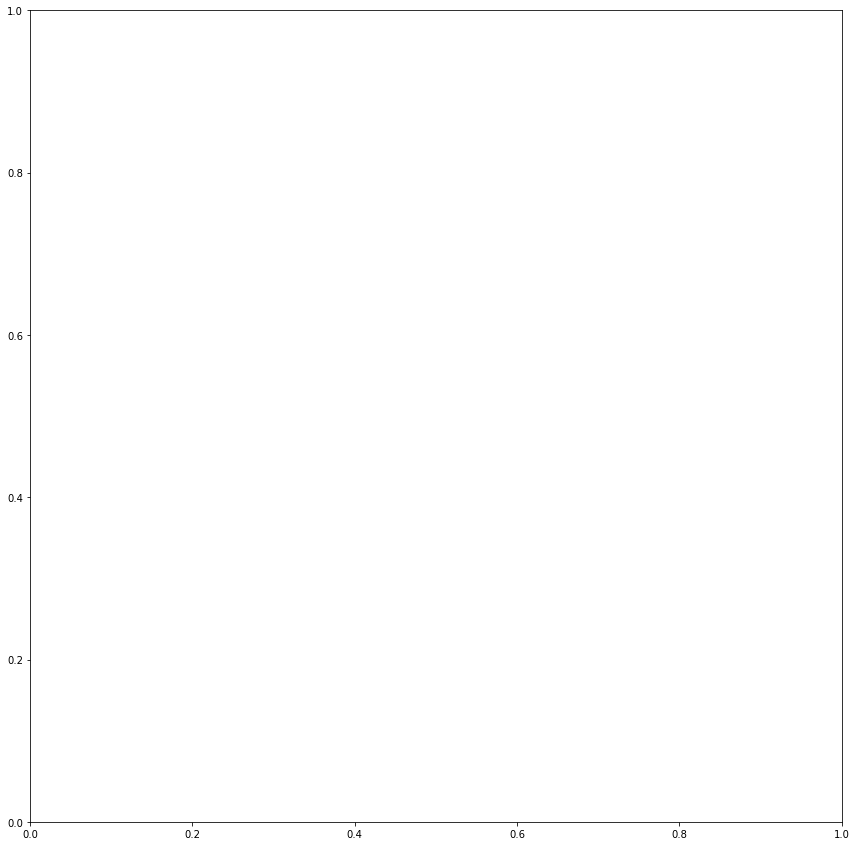

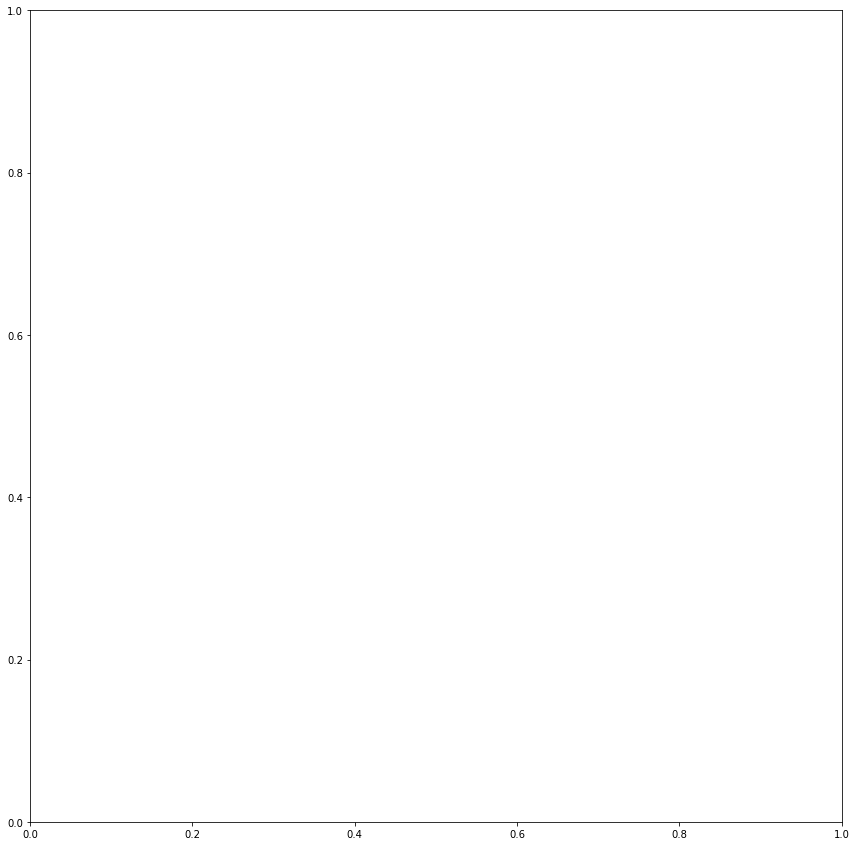

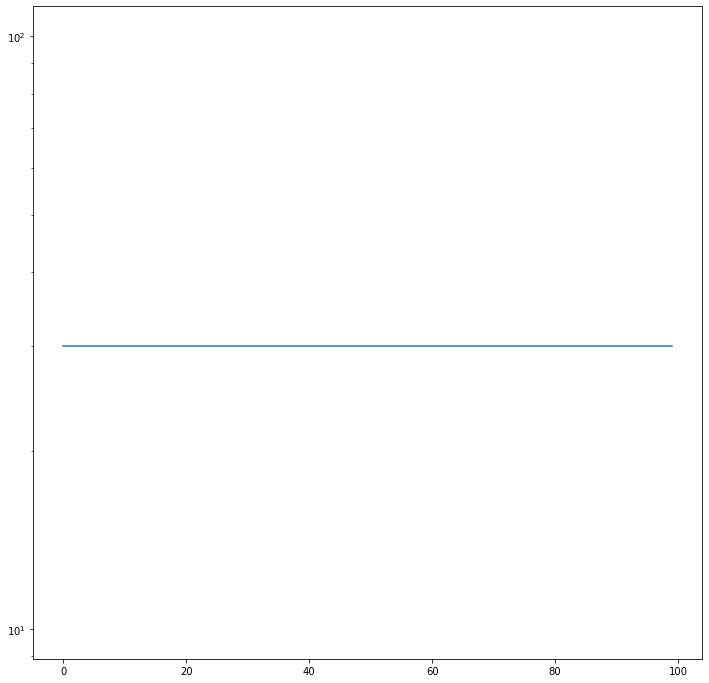

In [30]:
#Save the SR for different times
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

NUM_EPISODES = 100
num_steps = []

RL.rl_init(env_info, agent_info)

#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
record_trials("SR_exploration", optimal_trajectory)
    
#Task
for episode in tqdm(range(1, NUM_EPISODES+1)):
        
    RL.rl_episode()
    
    num_steps.append(RL.num_steps)
    
    if episode==1:
        record_trials("SR_trial_1", optimal_trajectory)
        
    if episode==10:
        record_trials("SR_trial_10", optimal_trajectory)
        
    if episode==100:
        record_trials("SR_trial_100", optimal_trajectory)
    
    
plt.figure(figsize=(12, 12))
plt.plot(range(NUM_EPISODES), num_steps)
plt.yscale("log")
plt.show()

In [15]:
def record_trials(title="SR", optimal_trajectory=None, one_state=None):
    """
    This function records the SR in each state the agent enters during an epoch. 
    Params:
        title -- string, name of the resulting file
        optimal_trajectory -- list[int], simulates path of the agent
    """
    metadata = dict(title=title, artist='JG')
    writer = manimation.FFMpegFileWriter(fps=15, metadata=metadata)
    fig, ax = plt.subplots(figsize=(12, 12))
    fig.tight_layout()
    
    with writer.saving(fig, f"./out/{title}.mp4", 144):
        if optimal_trajectory: #Manually follow optimal trajectory
            for state in optimal_trajectory:
                plt.imshow(RL.agent.M[state].reshape(13, 13), origin="lower")
                writer.grab_frame()
                ax.clear()
                
        elif one_state:
            for _ in range(100):
                RL.rl_episode()
                plt.imshow(RL.agent.M[one_state].reshape(13, 13), origin="lower")
                writer.grab_frame()
                ax.clear()
        
        else: #Run experiment
            RL.rl_change_epsilon(0)  # Fully greedy for recording
            reward, state, action, termination = RL.rl_start()
            while not termination:
                reward, state, action, termination = RL.rl_step(reward, state, action)
                plt.imshow(RL.agent.M[state].reshape(13, 13), origin="lower")
                writer.grab_frame()
                ax.clear()

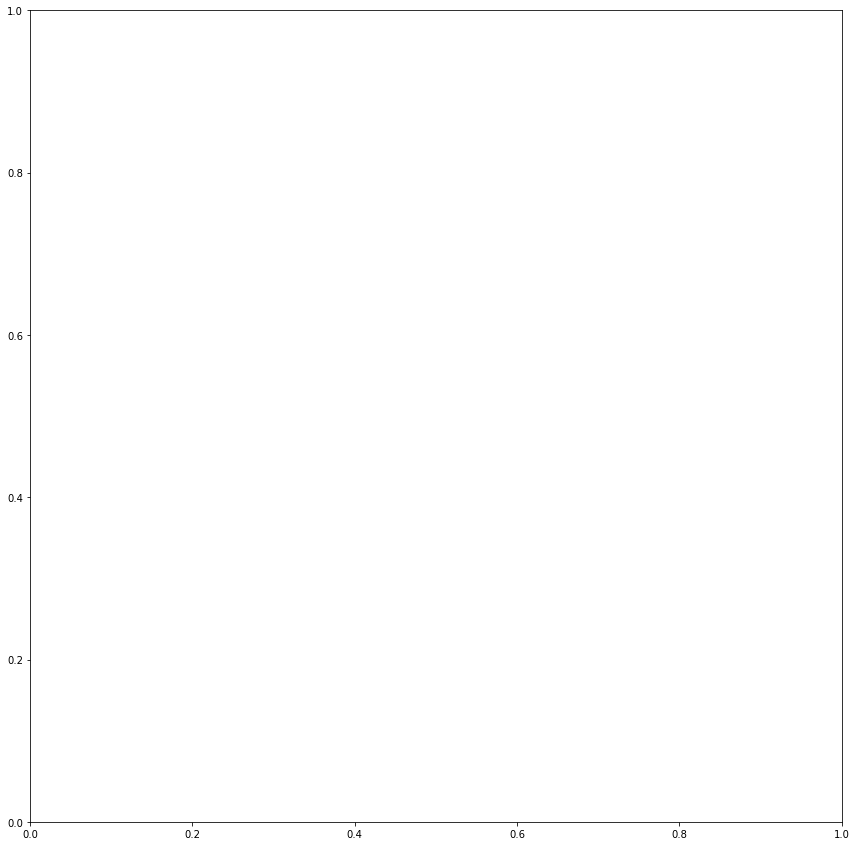

In [16]:
#Render the change in SR for one state over 100 episodes
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

RL.rl_init(env_info, agent_info)

#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)
    
#Task
record_trials("SR_over_time", one_state=92)

In [95]:
def record_agent(title="agent", optimal_trajectory=None, one_state=None):
    """
    This function records the SR in each state the agent enters during an epoch. 
    Params:
        title -- string, name of the resulting file
        optimal_trajectory -- list[int], simulates path of the agent
    """
    metadata = dict(title=title, artist='JG')
    writer = manimation.FFMpegFileWriter(fps=15, metadata=metadata)
    fig, ax = plt.subplots(figsize=(12, 12))
    fig.tight_layout()
    
    with writer.saving(fig, f"./out/{title}.mp4", 144):
        RL.rl_change_task(reward_states=[(11, 11), (7, 7)], rewards=[10, -100])
        #RL.rl_change_values(98, -1000)
        #RL.rl_change_epsilon(0)
        #RL.agent.Q[85, 0] = np.dot(RL.agent.M[98], RL.agent.w)
        
        
        #RL.rl_episode()
        reward, state, action, termination = RL.rl_start()
        
        for _ in range(100):
            reward, state, action, termination = RL.rl_step(reward, state, action)
            if termination:
                break
            RL.rl_plot()
            writer.grab_frame()
            ax.clear()

100%|██████████| 10/10 [00:00<00:00, 232.10it/s]
/Users/julianbons/Documents/Uni/Master/2. Semester/Research Project 1/Code/Source_Code/utils.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 12))


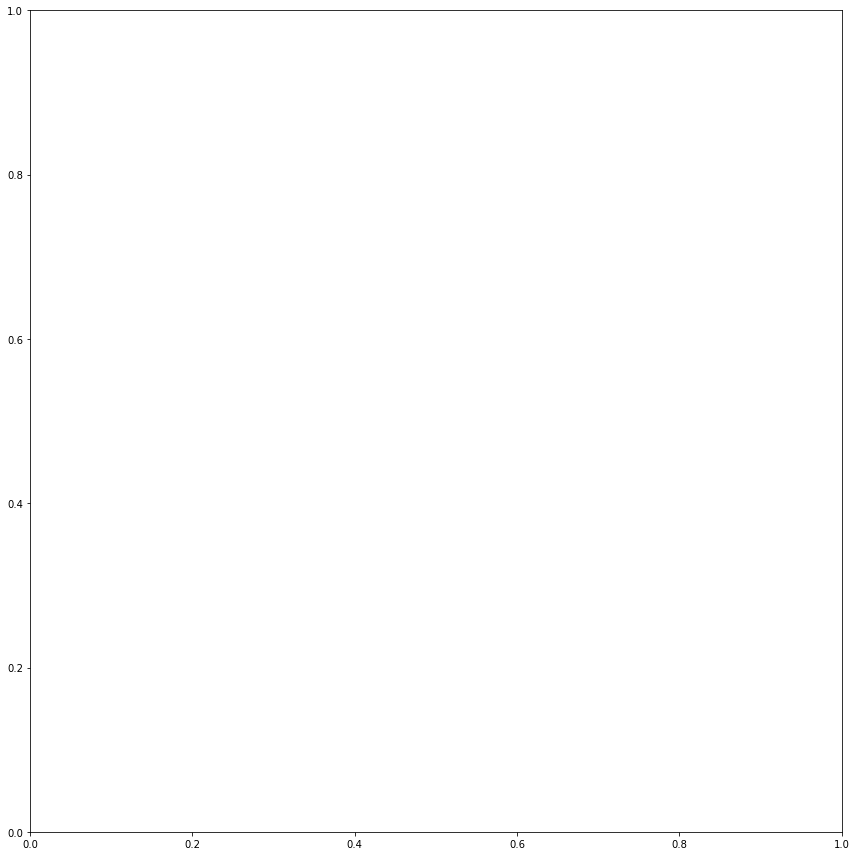

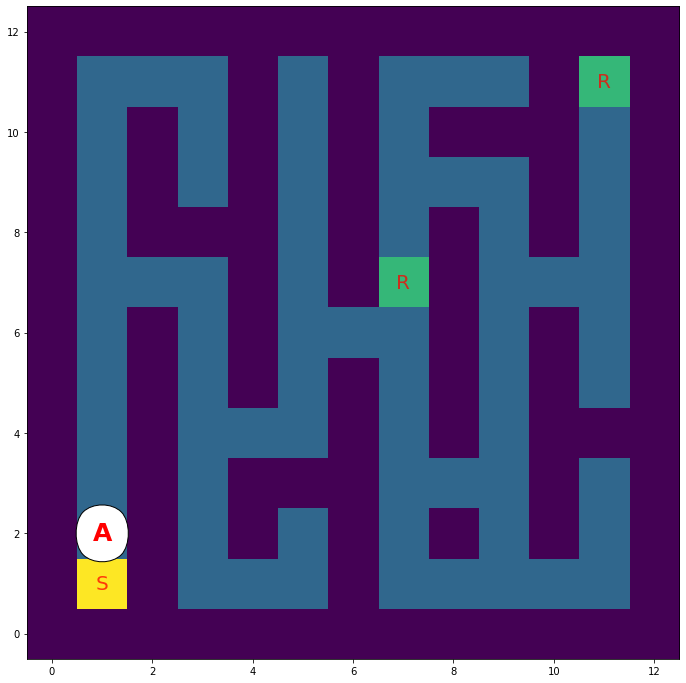

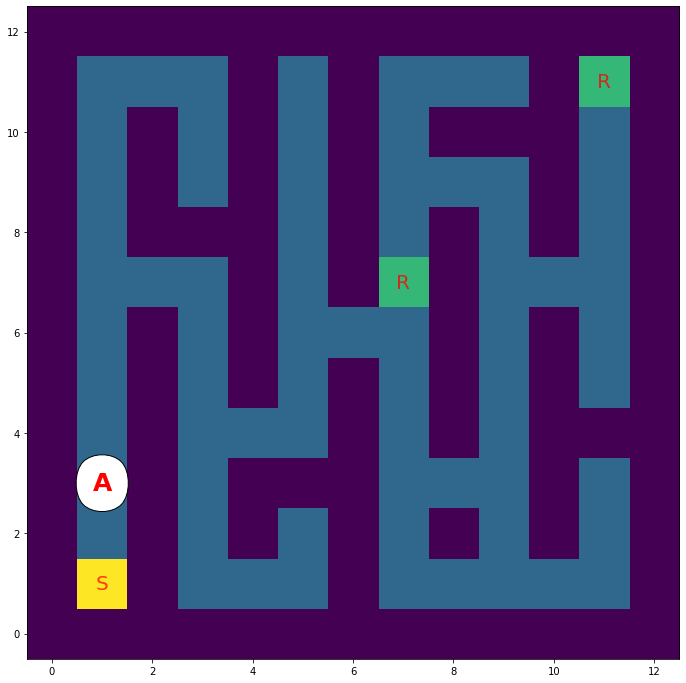

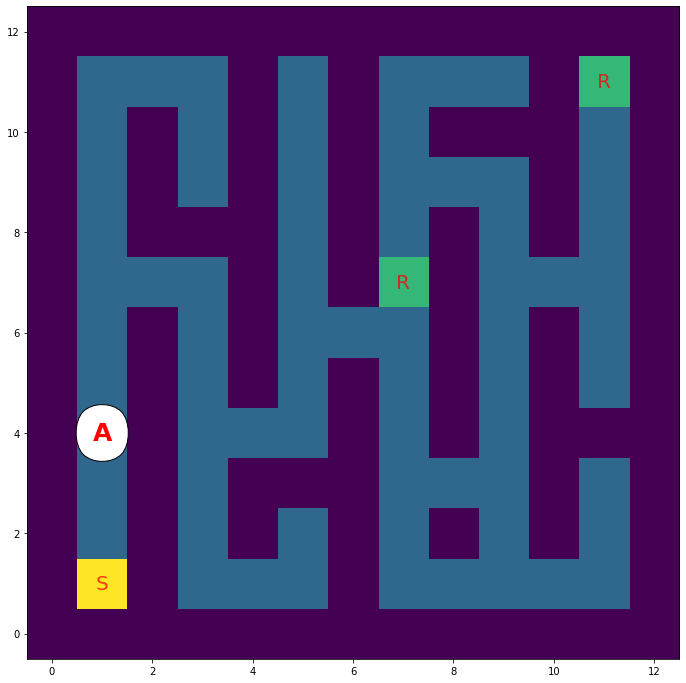

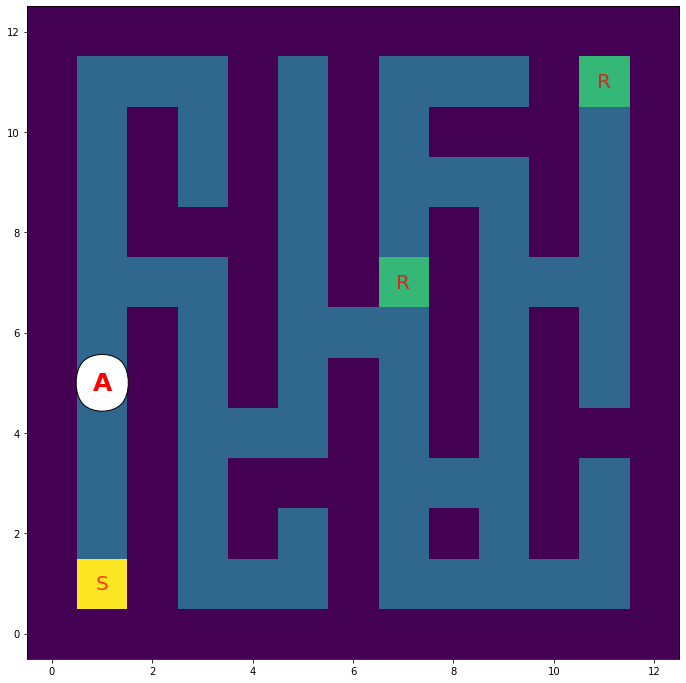

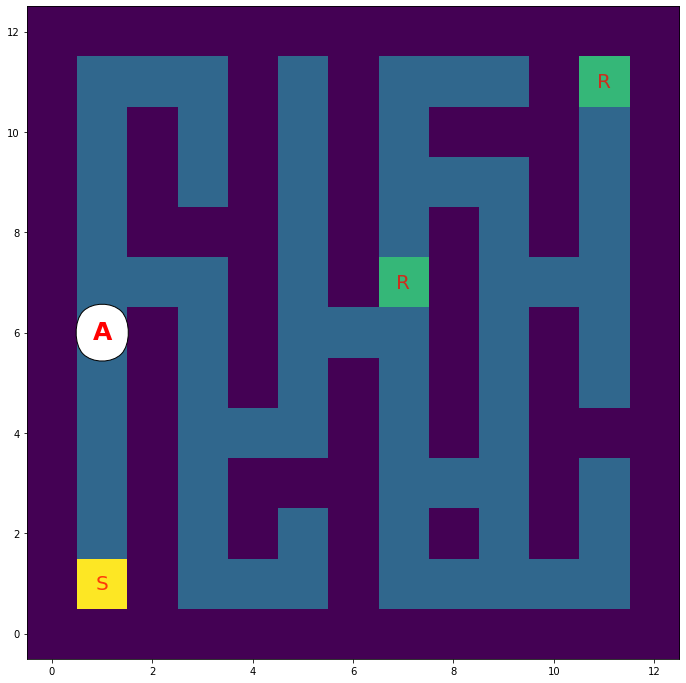

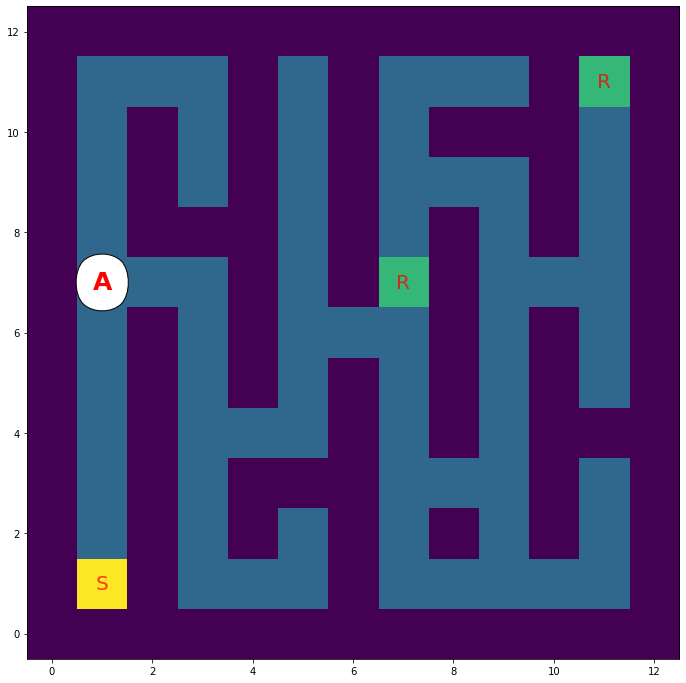

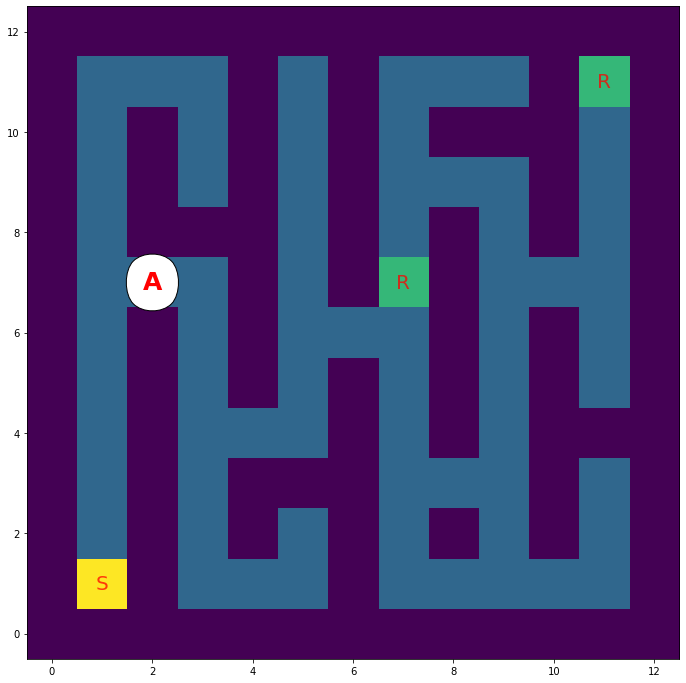

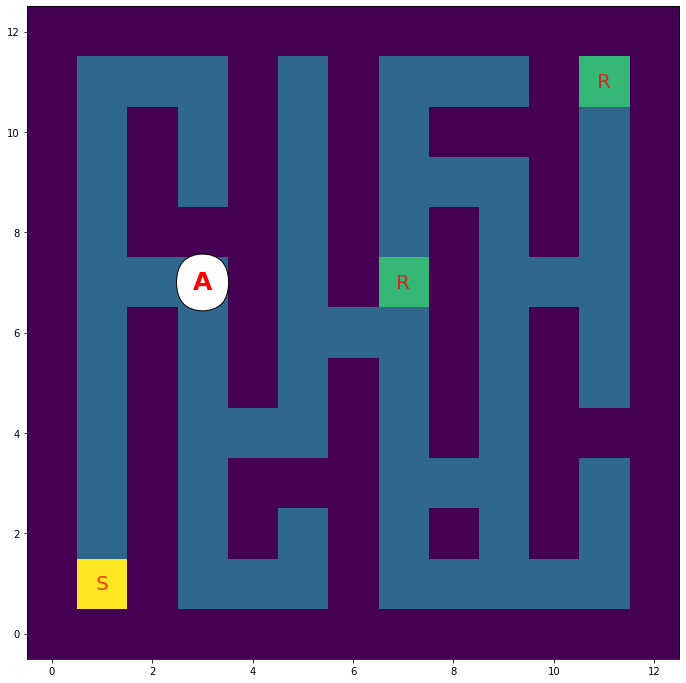

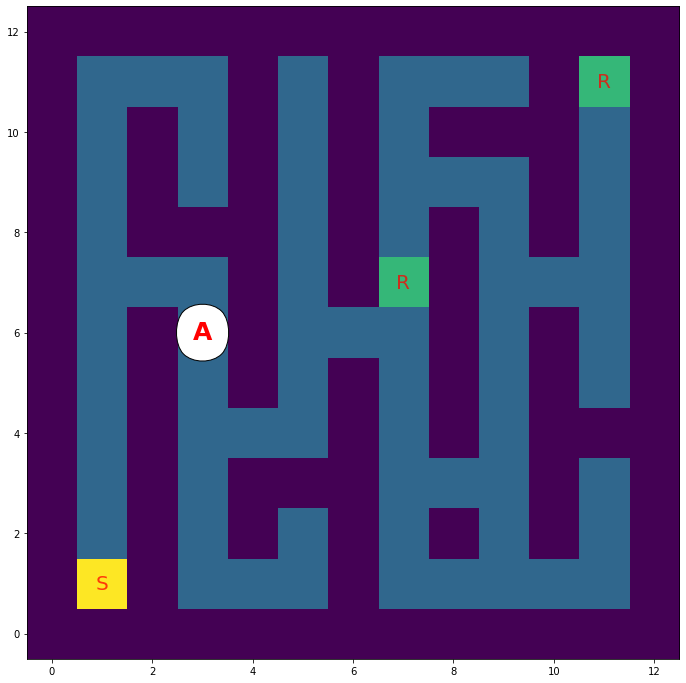

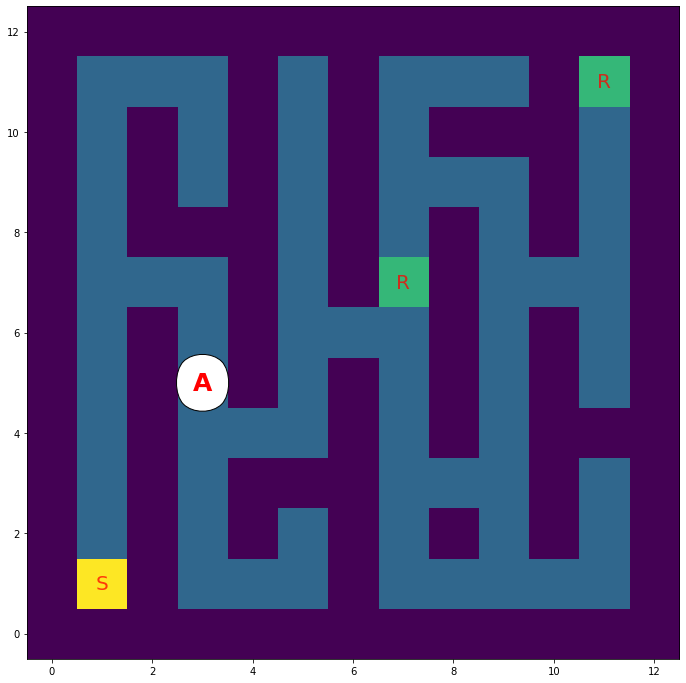

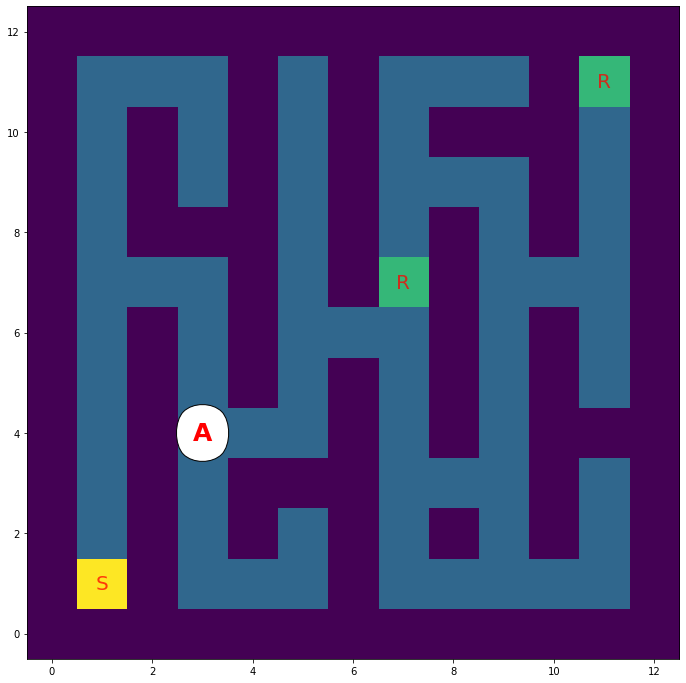

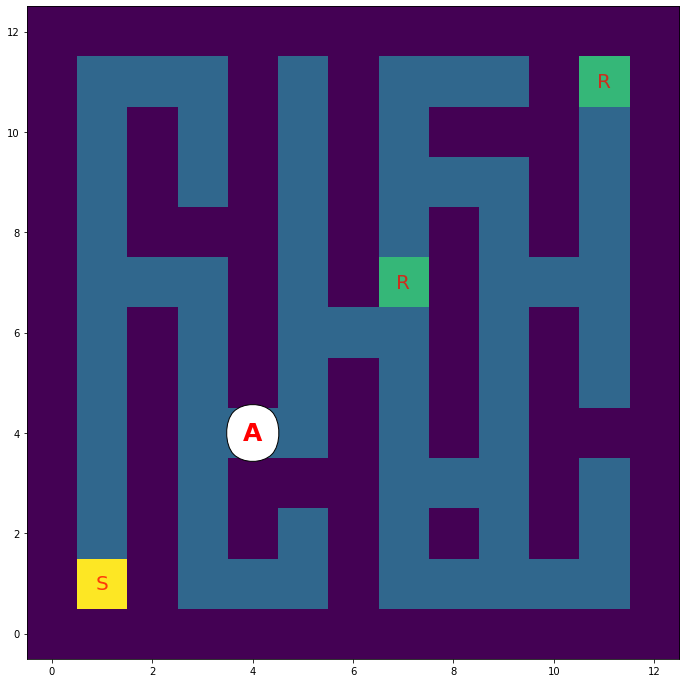

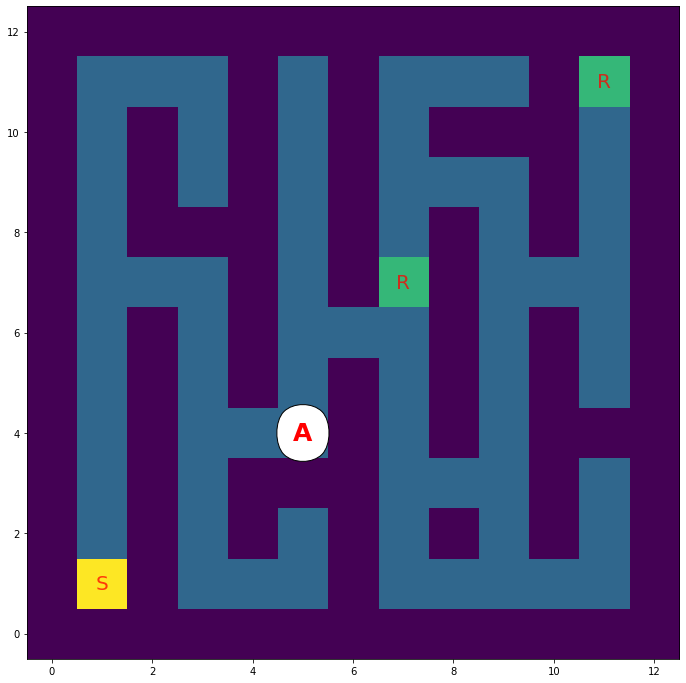

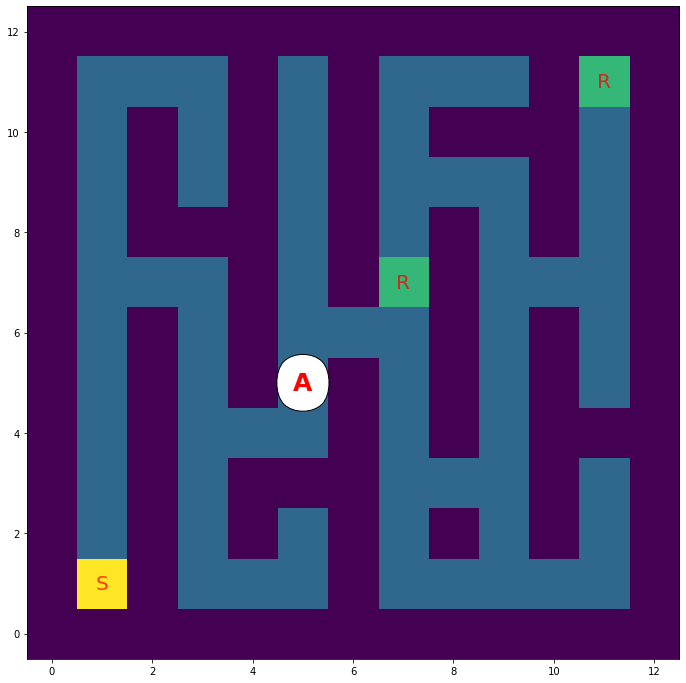

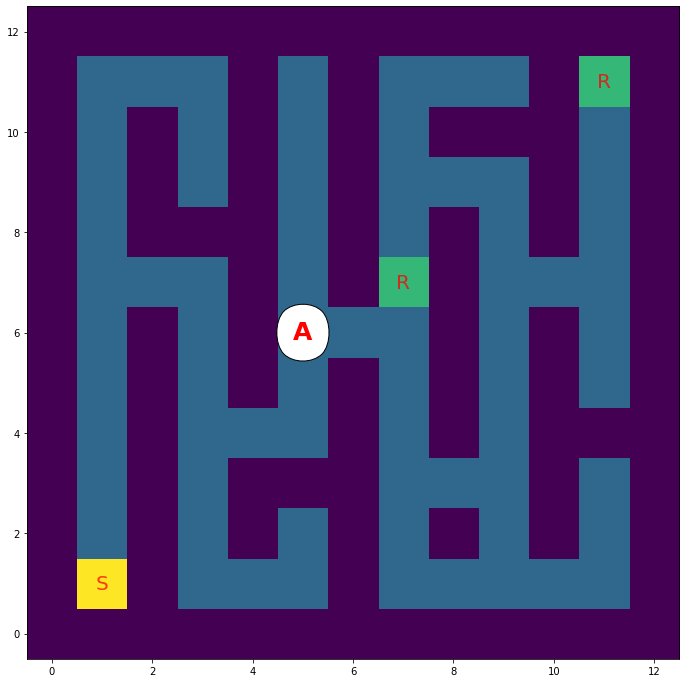

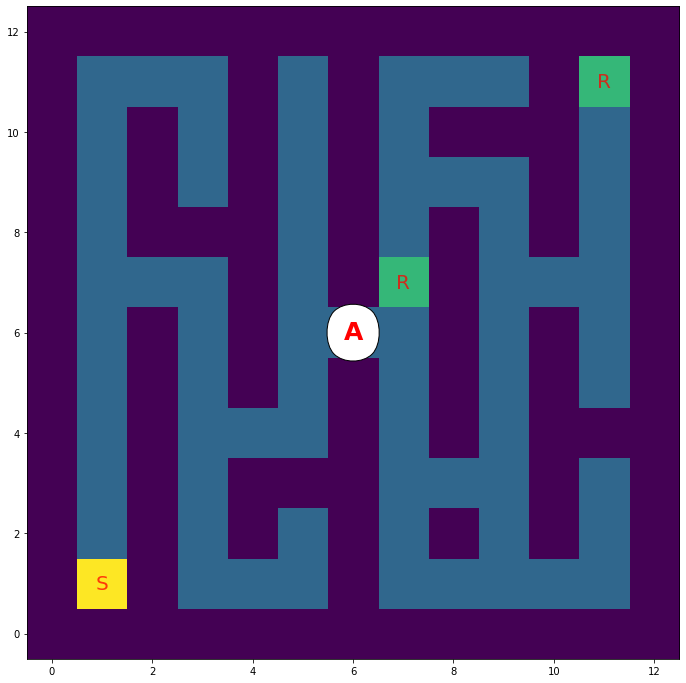

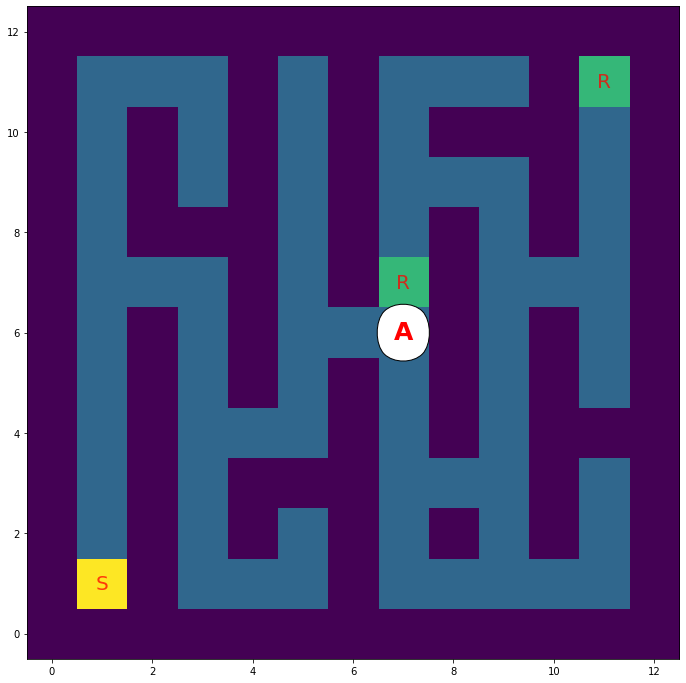

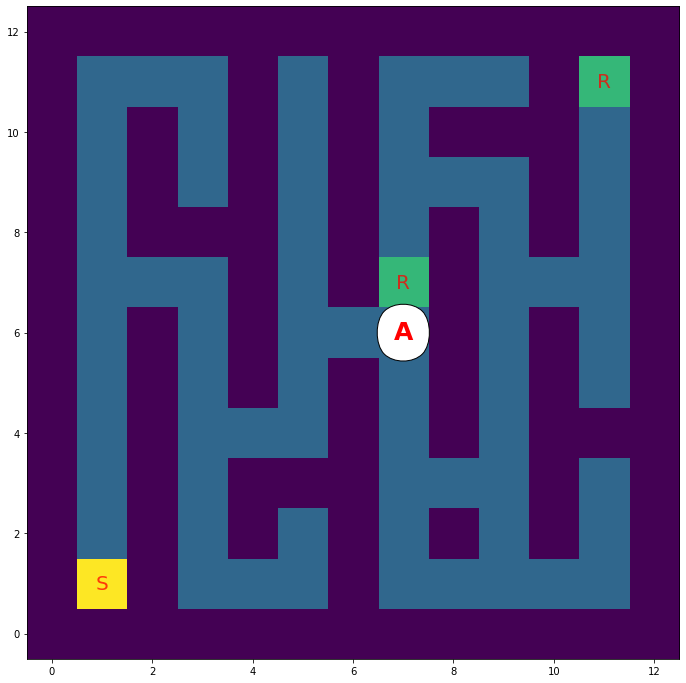

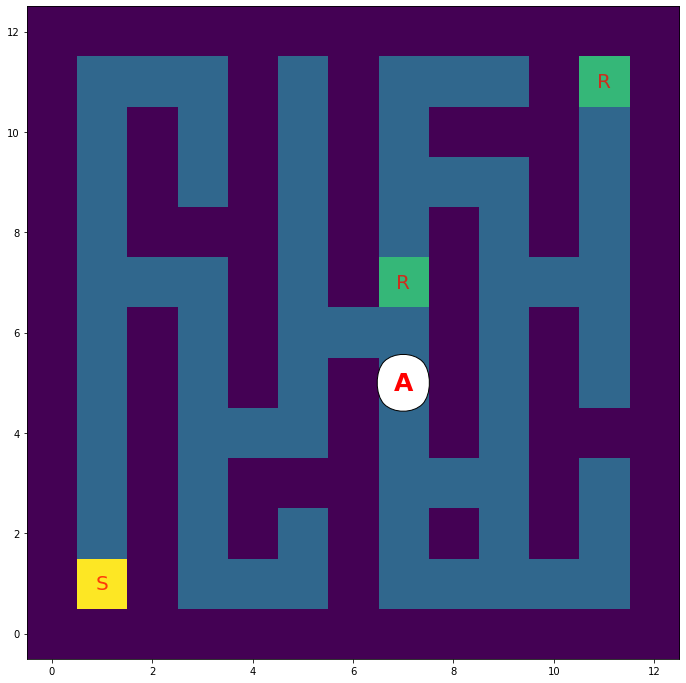

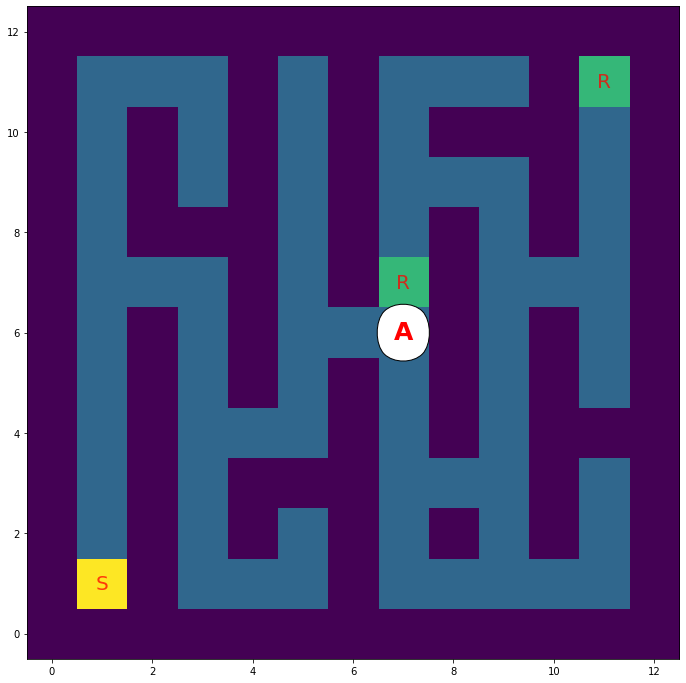

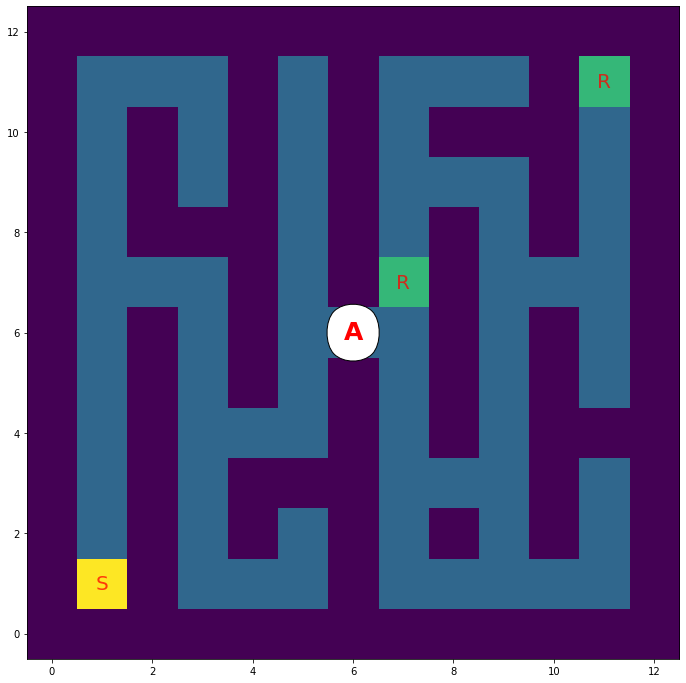

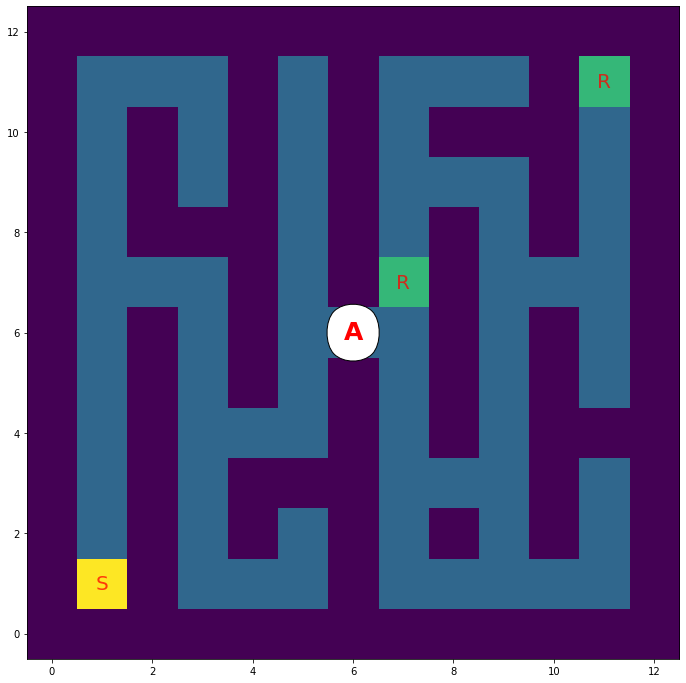

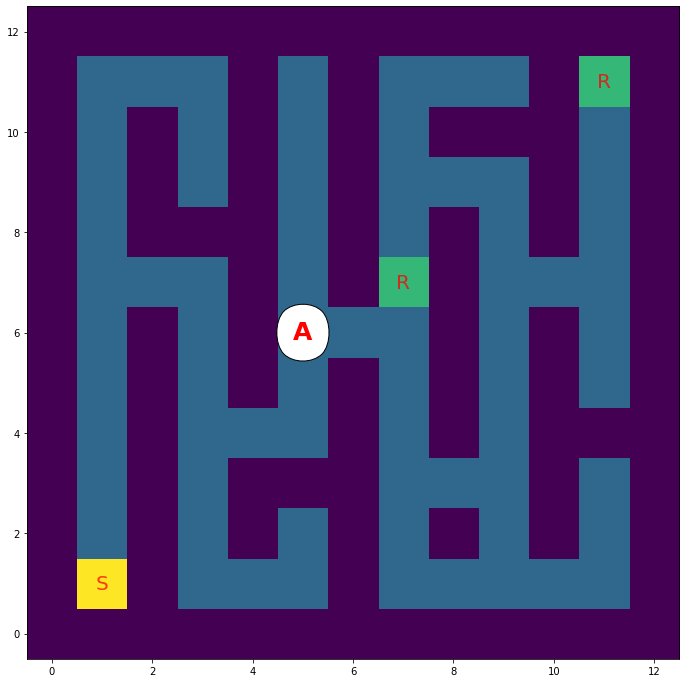

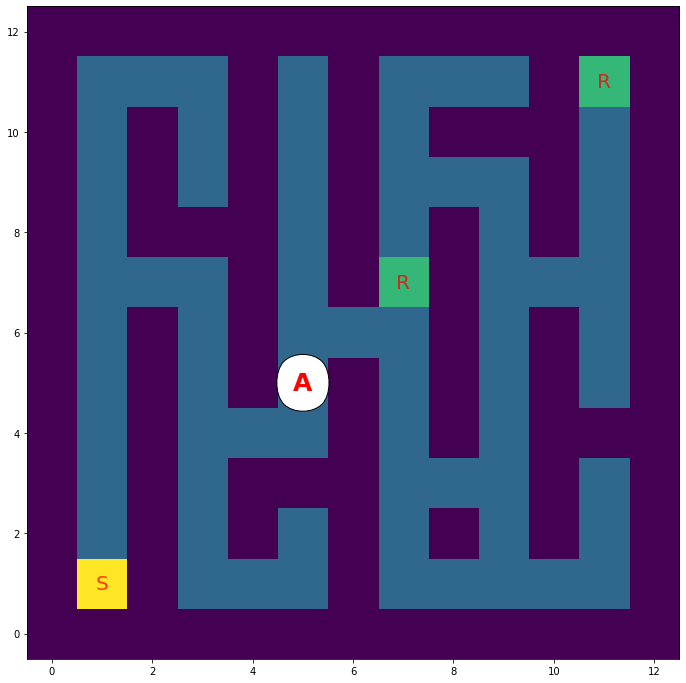

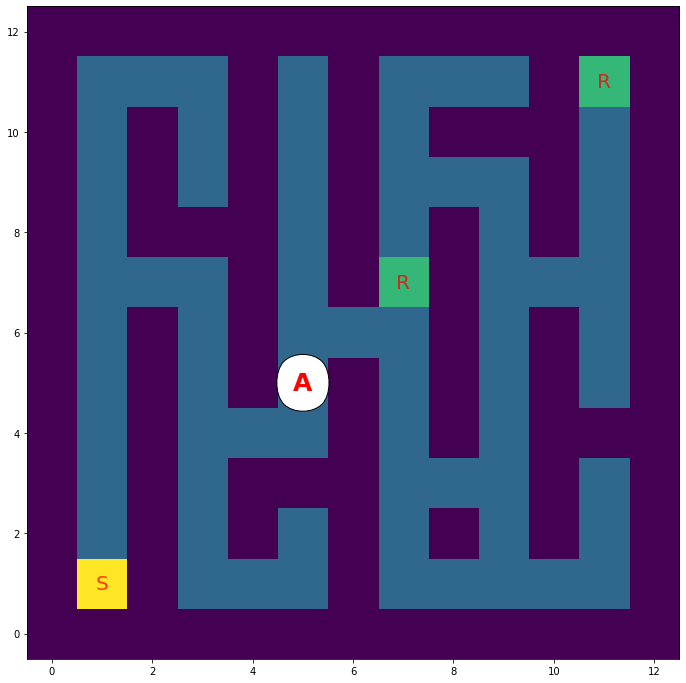

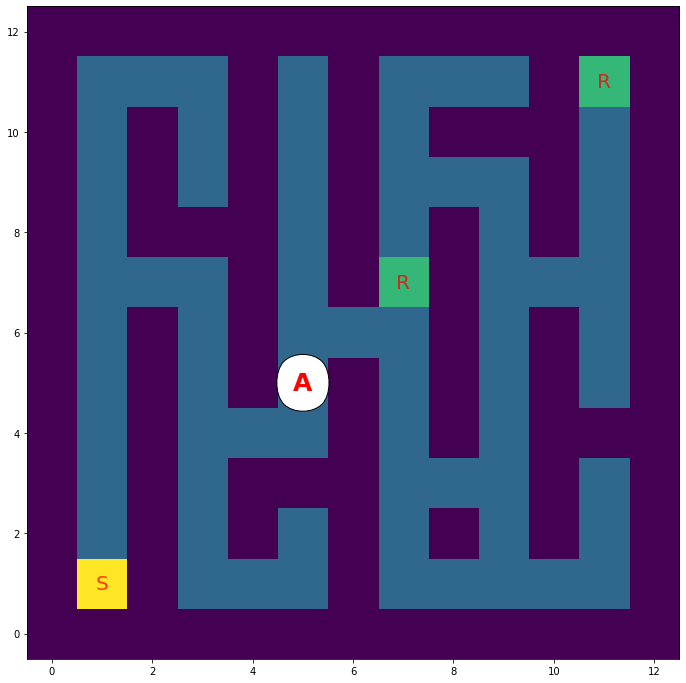

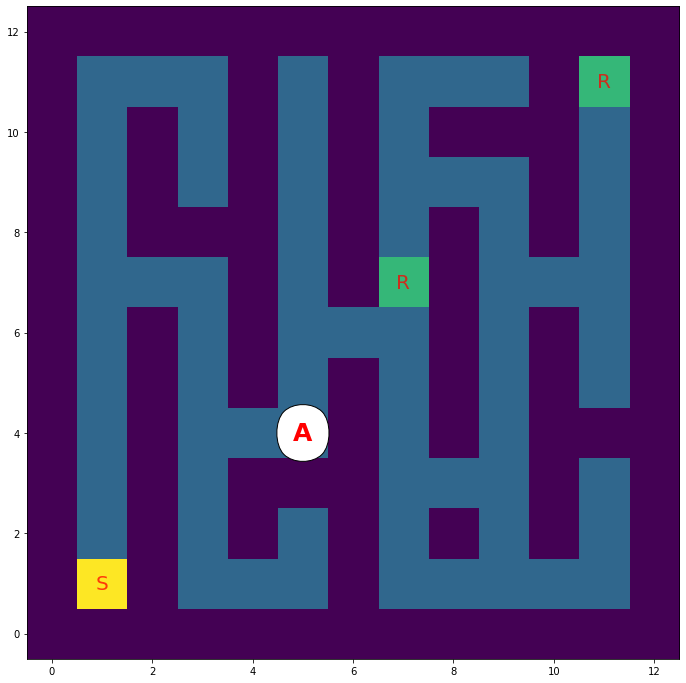

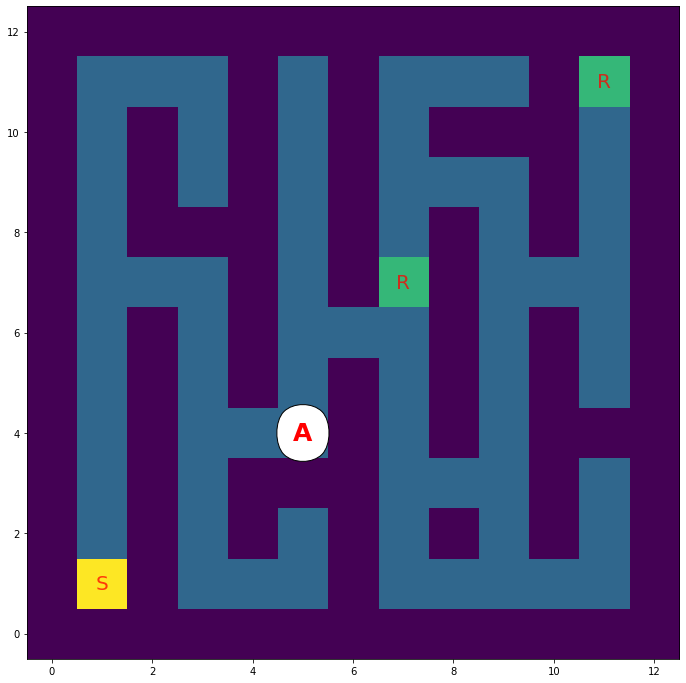

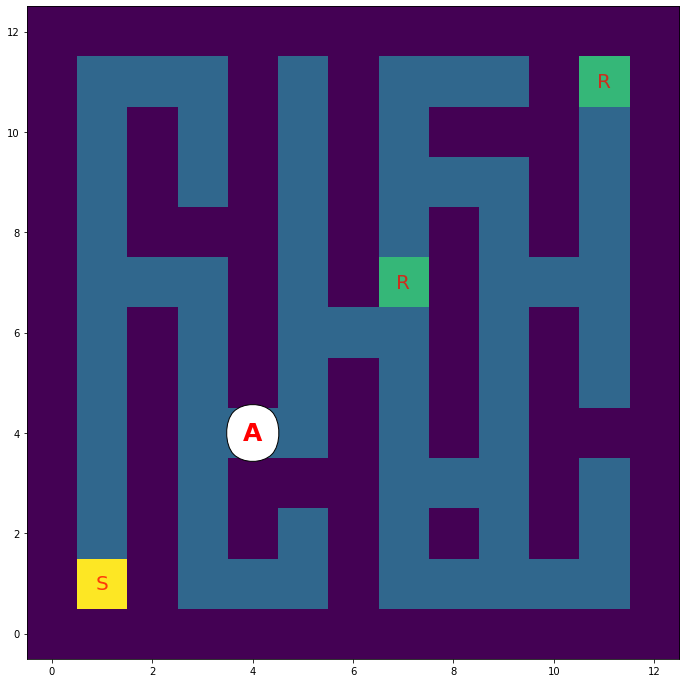

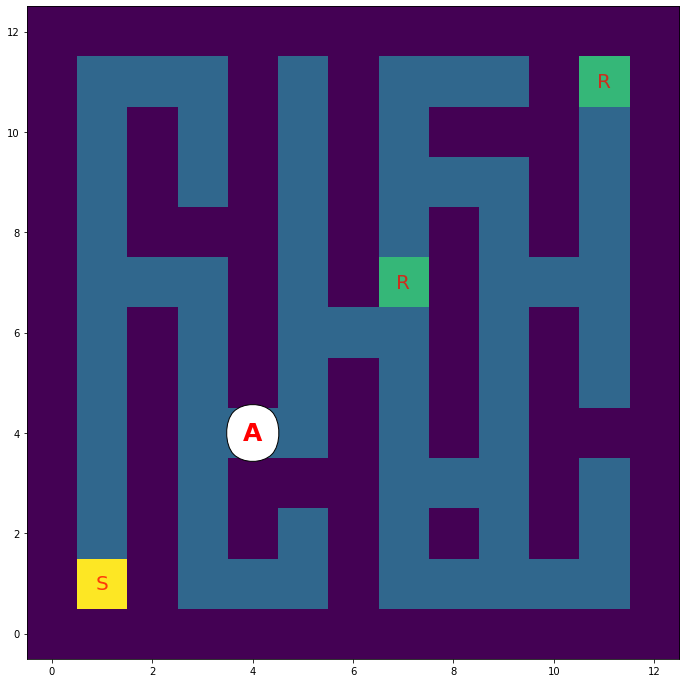

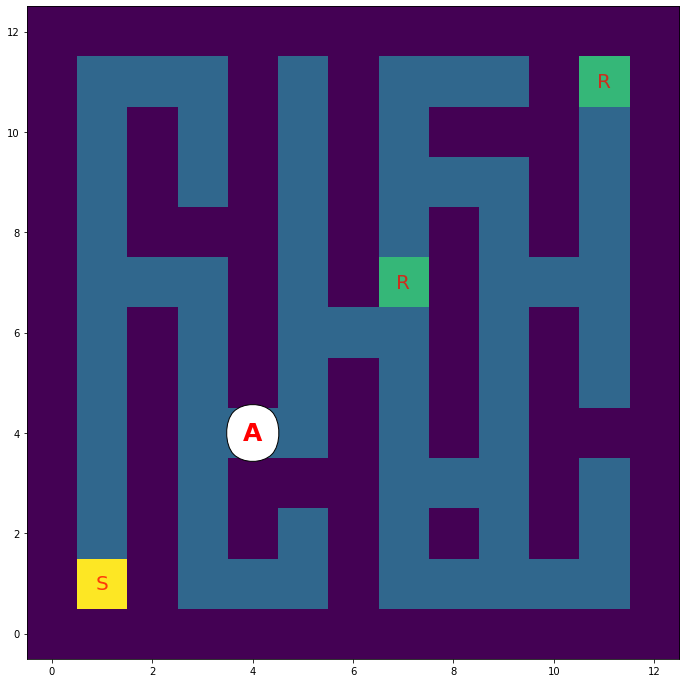

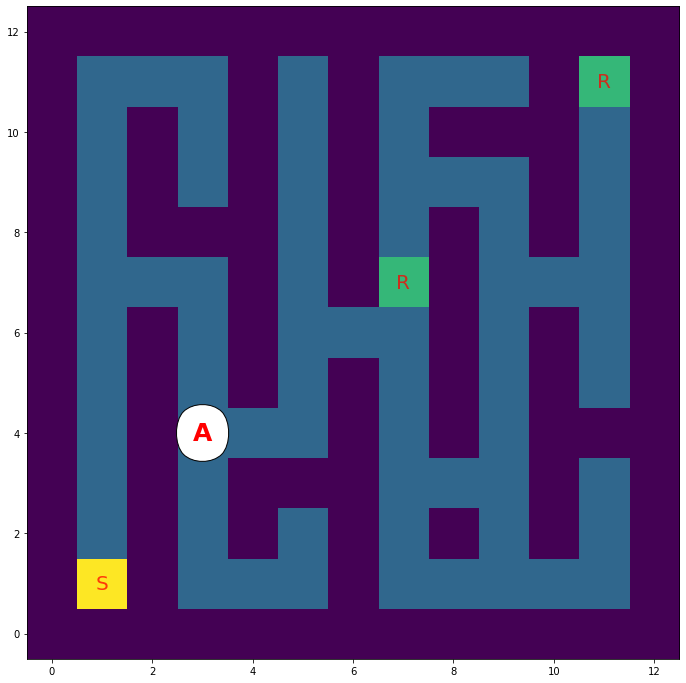

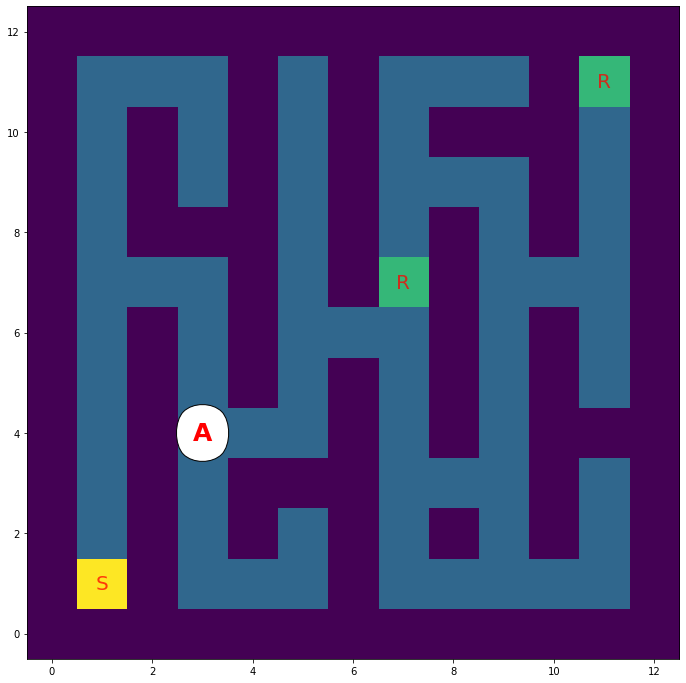

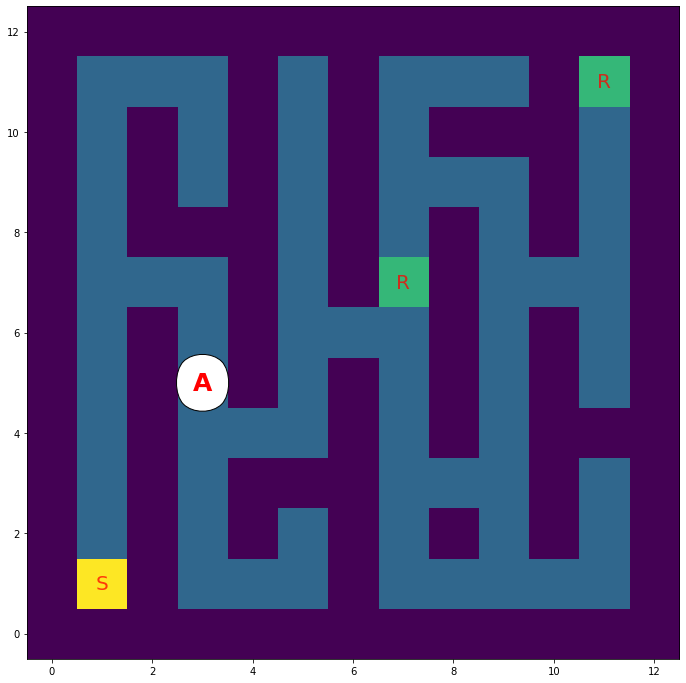

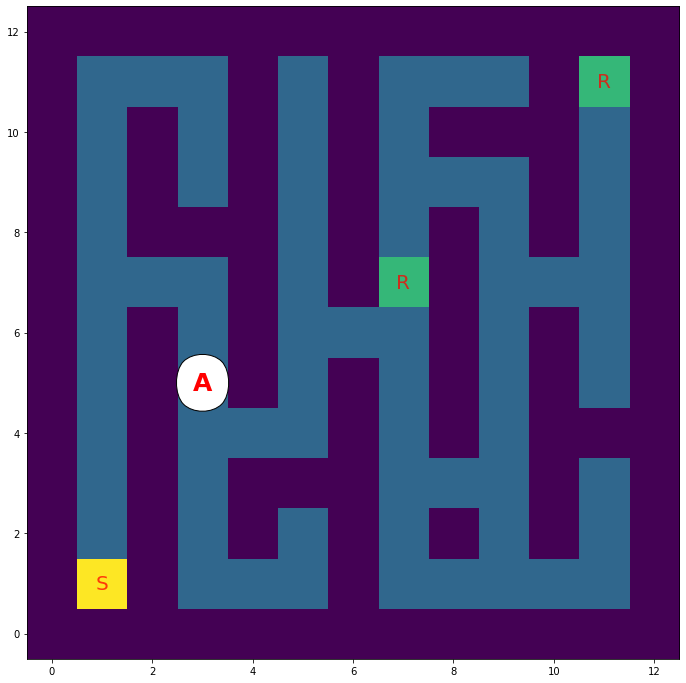

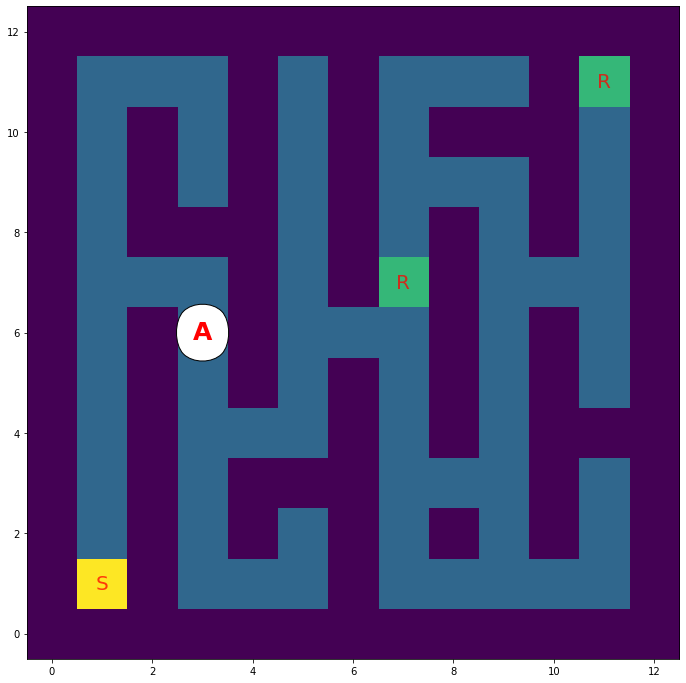

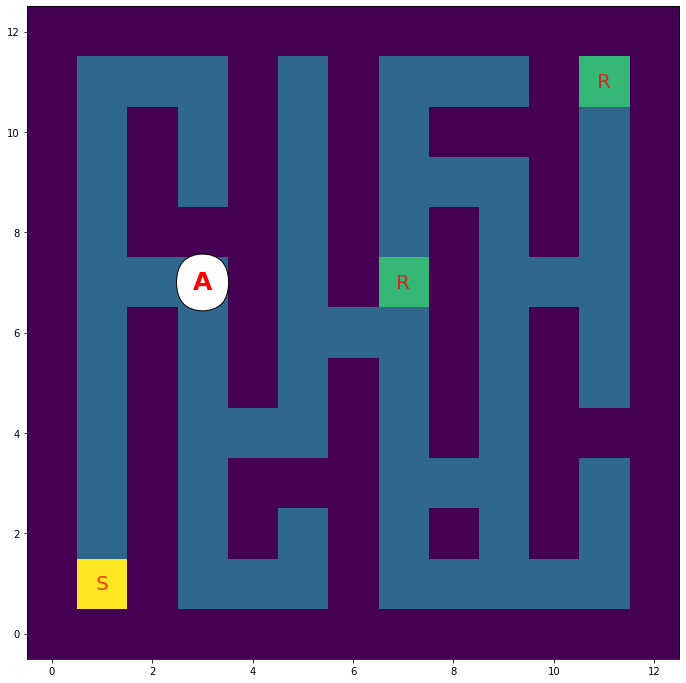

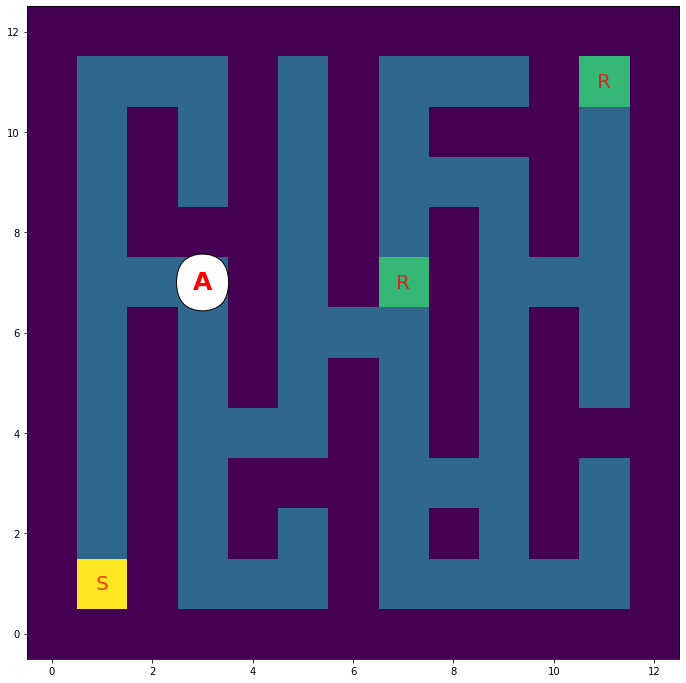

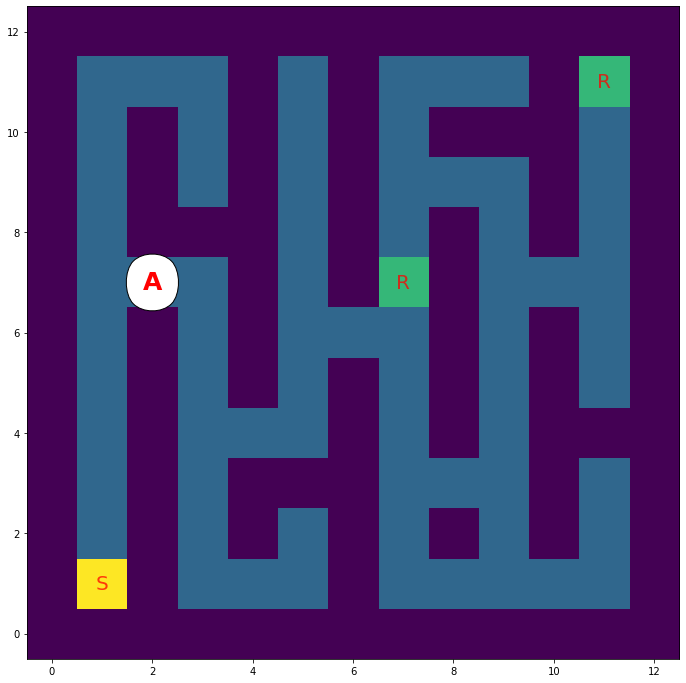

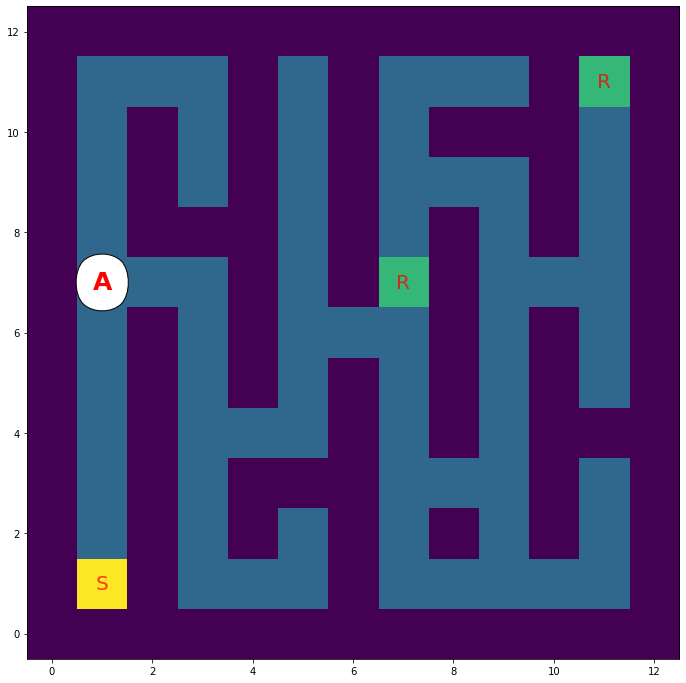

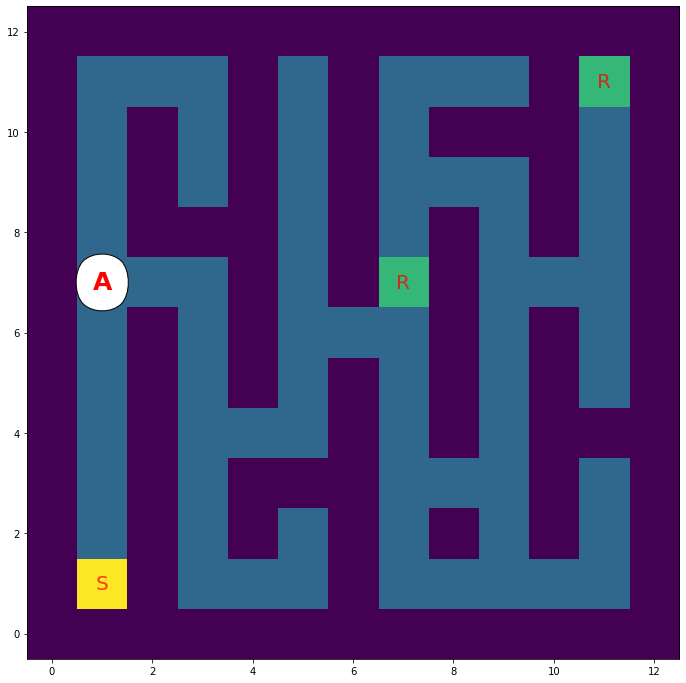

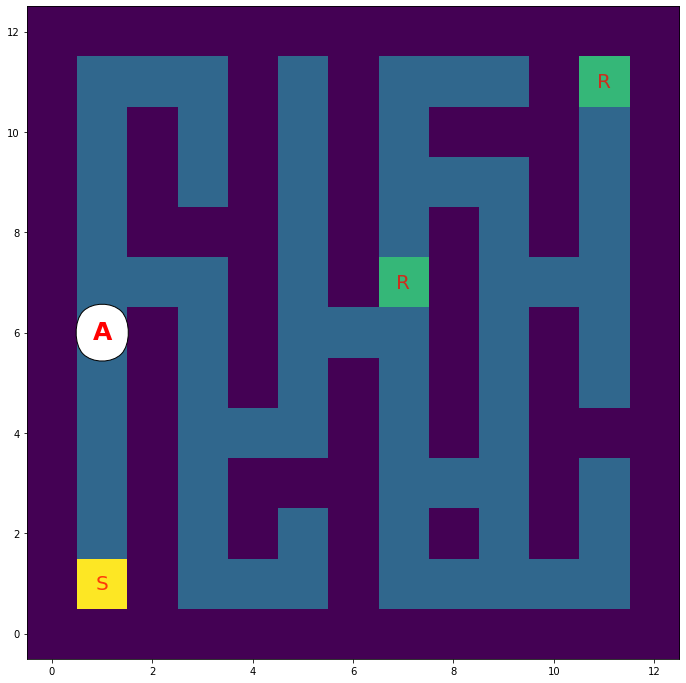

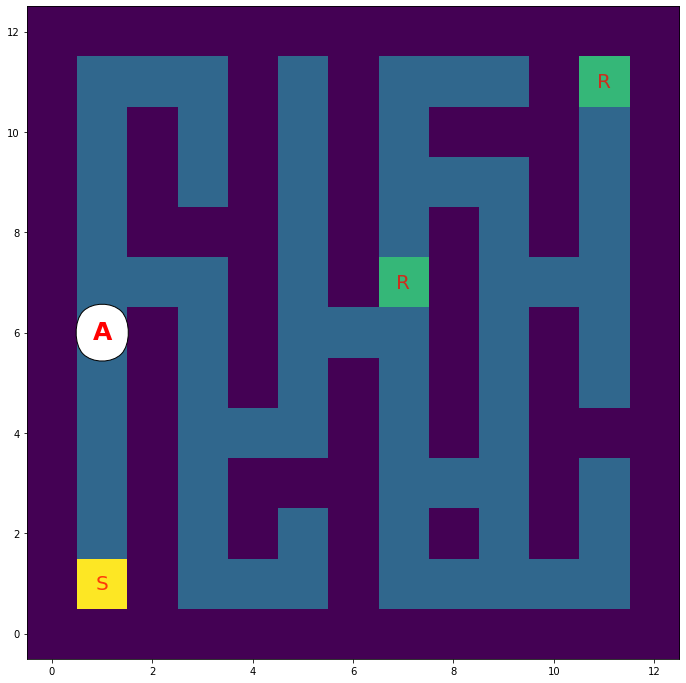

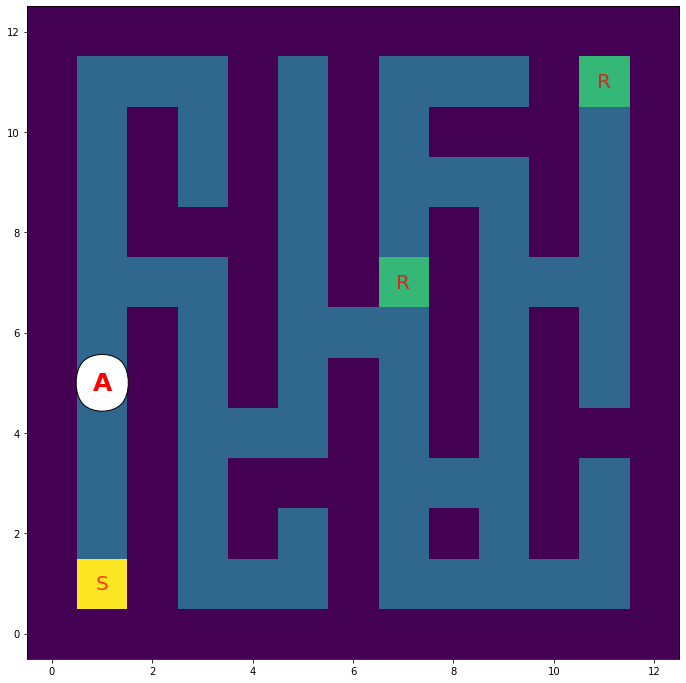

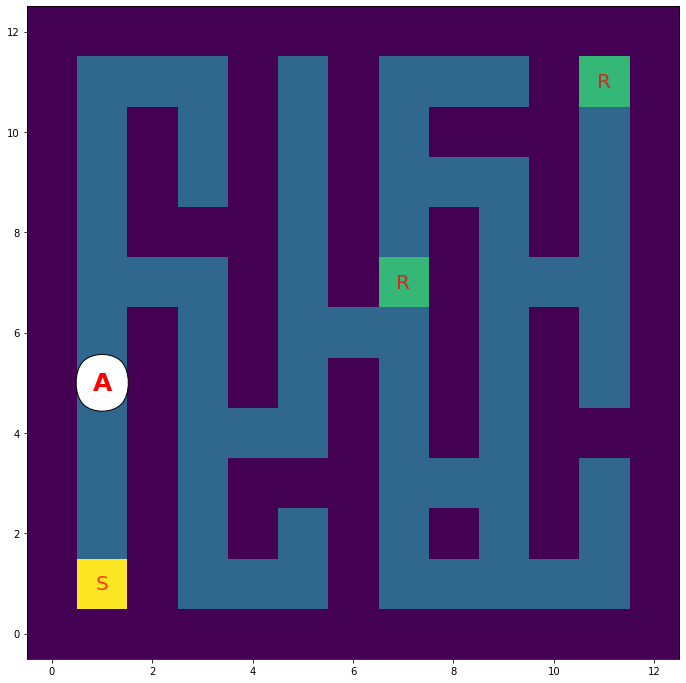

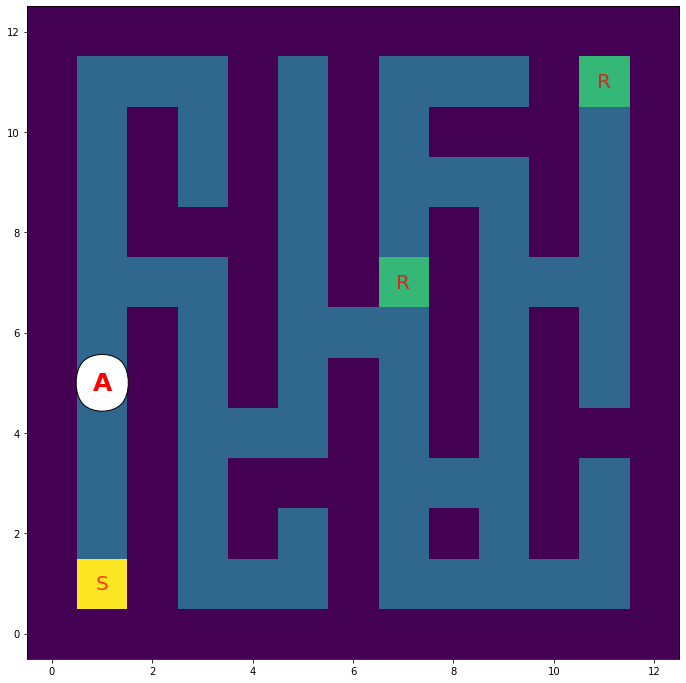

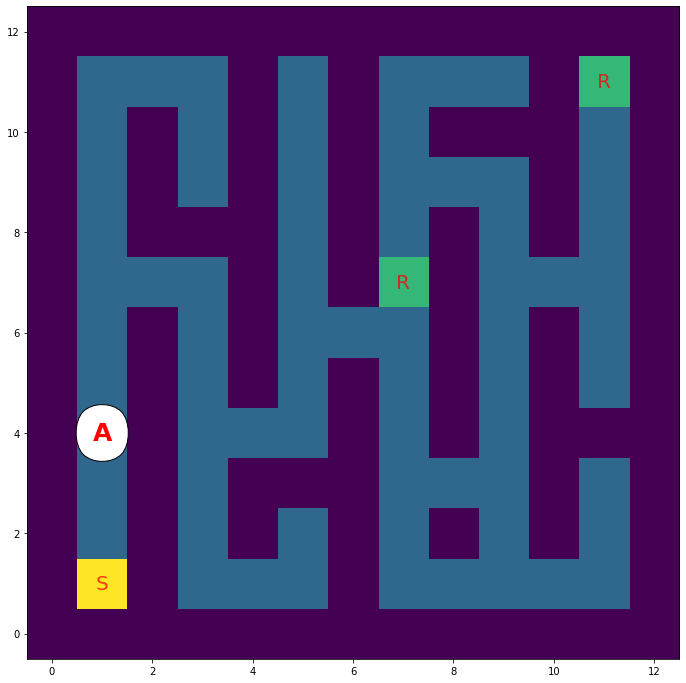

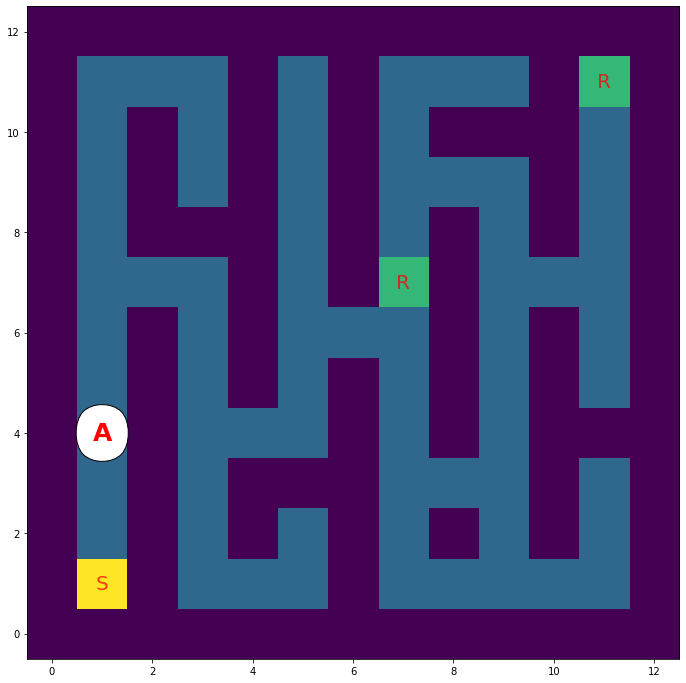

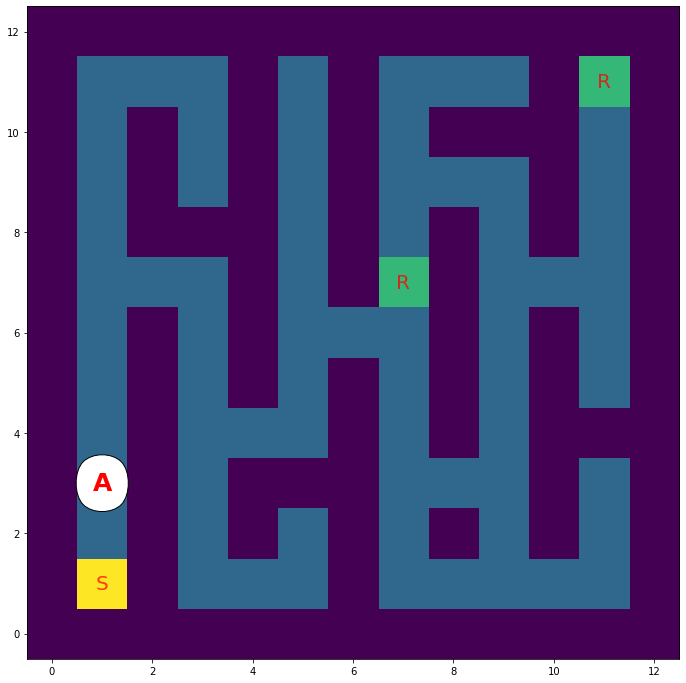

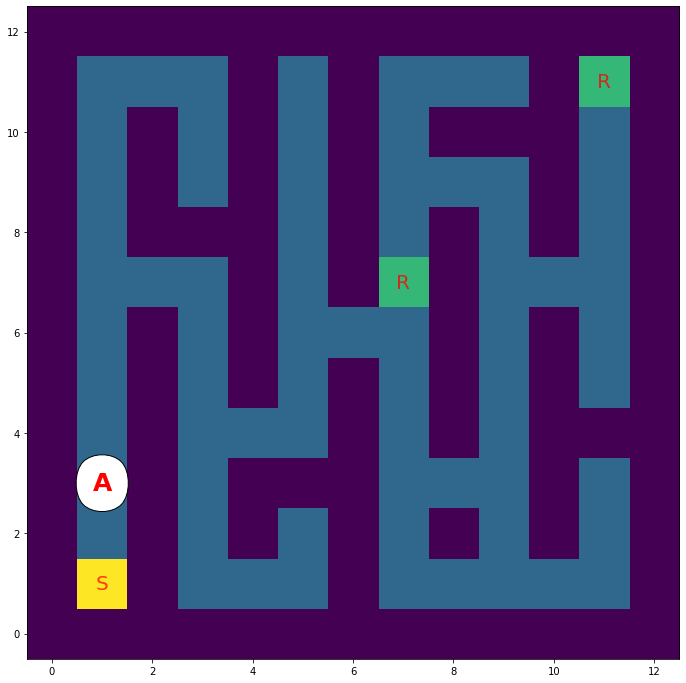

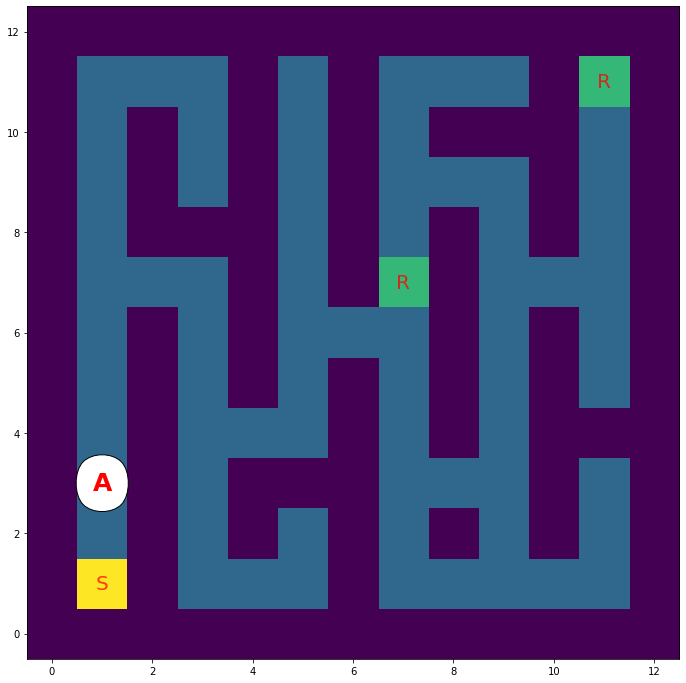

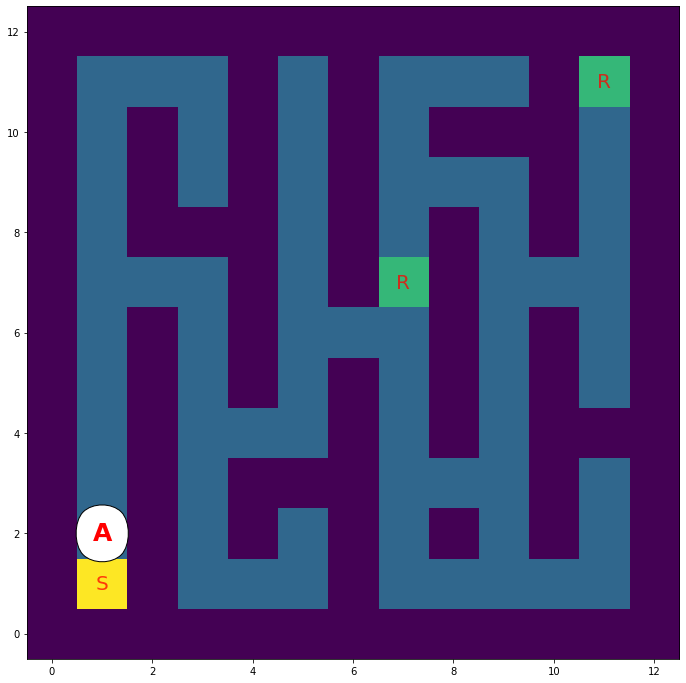

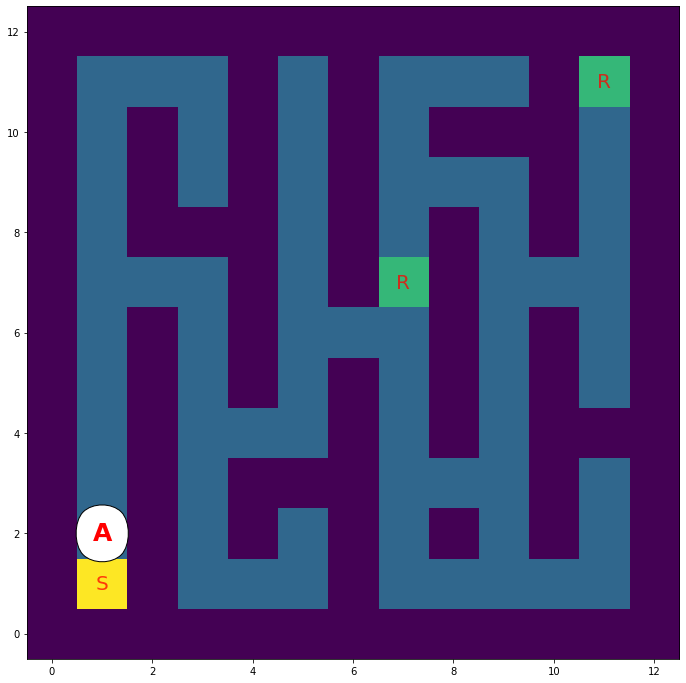

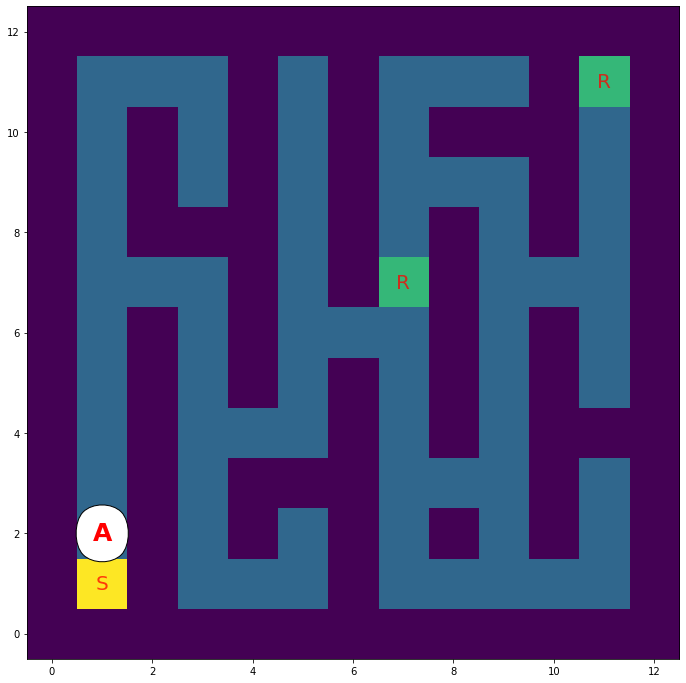

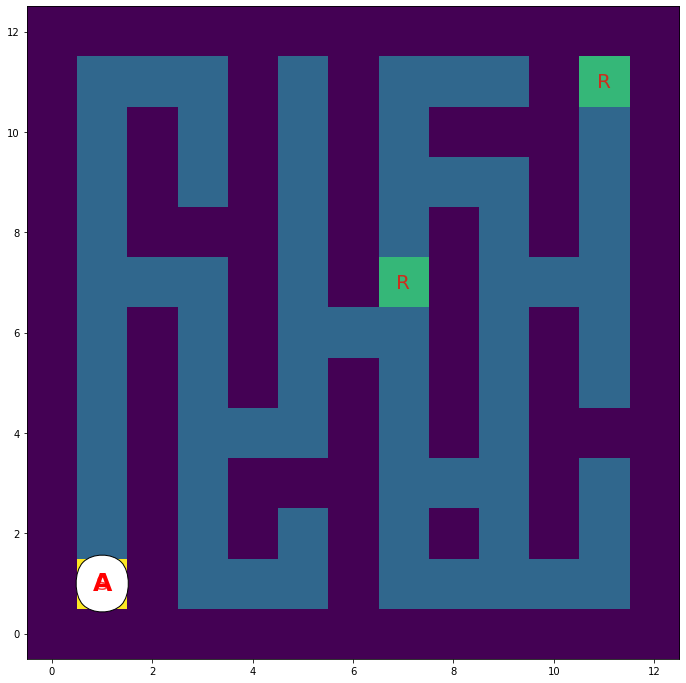

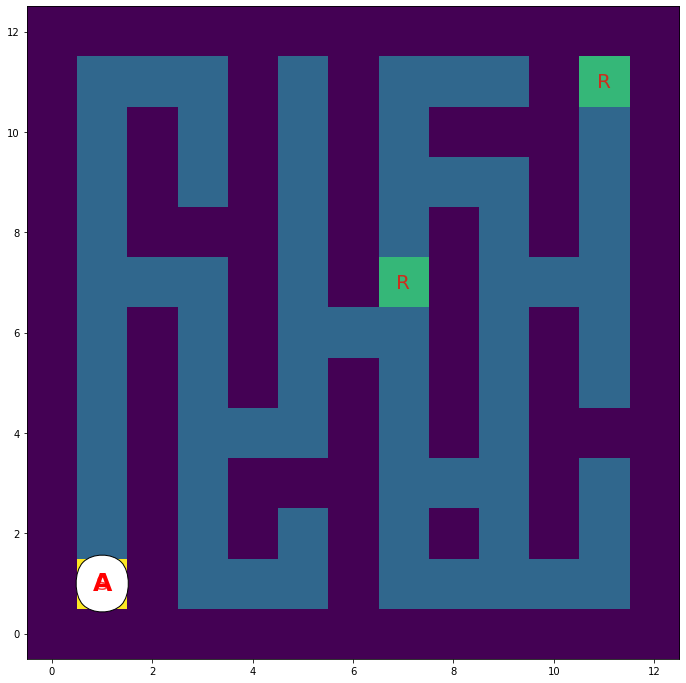

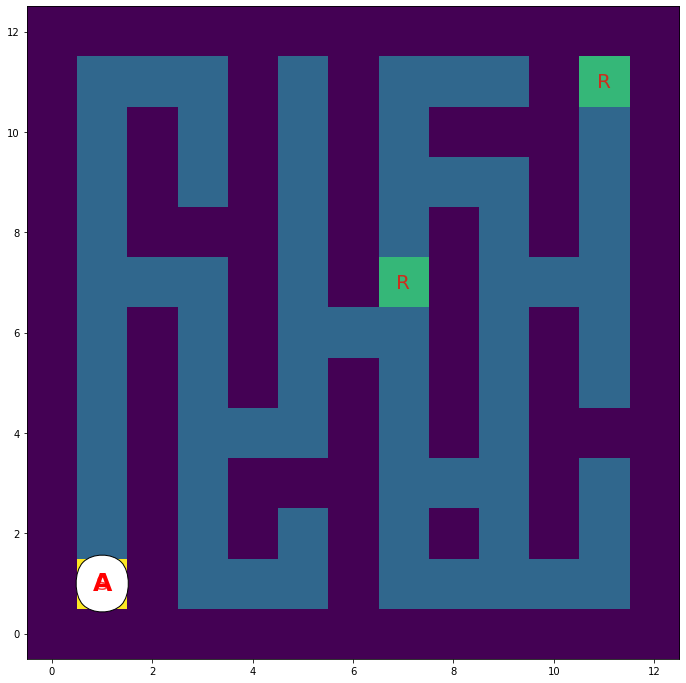

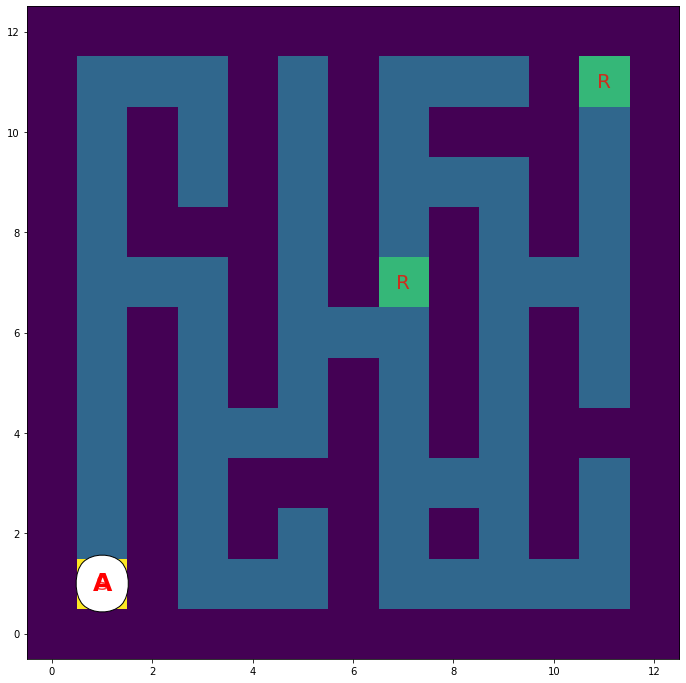

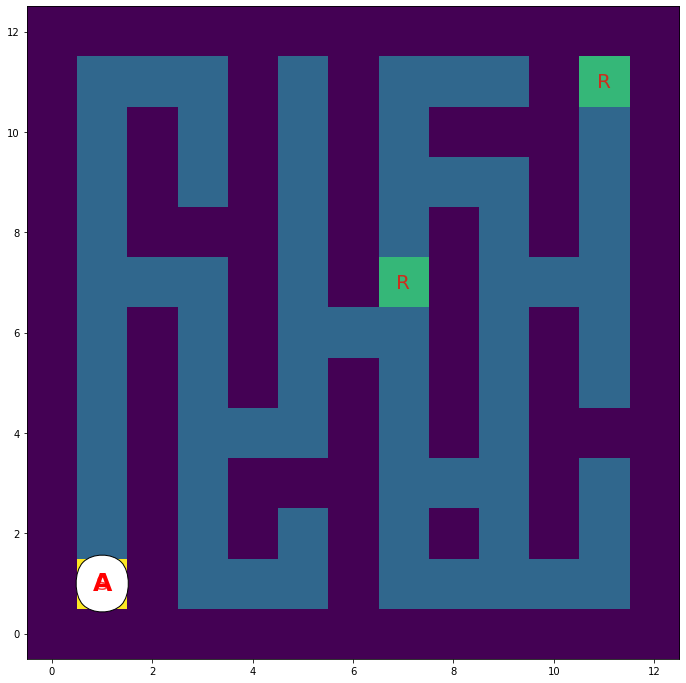

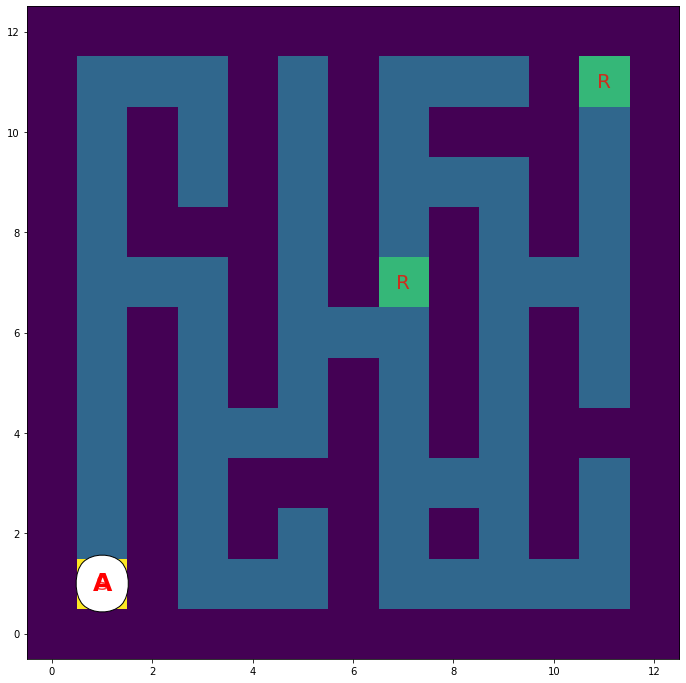

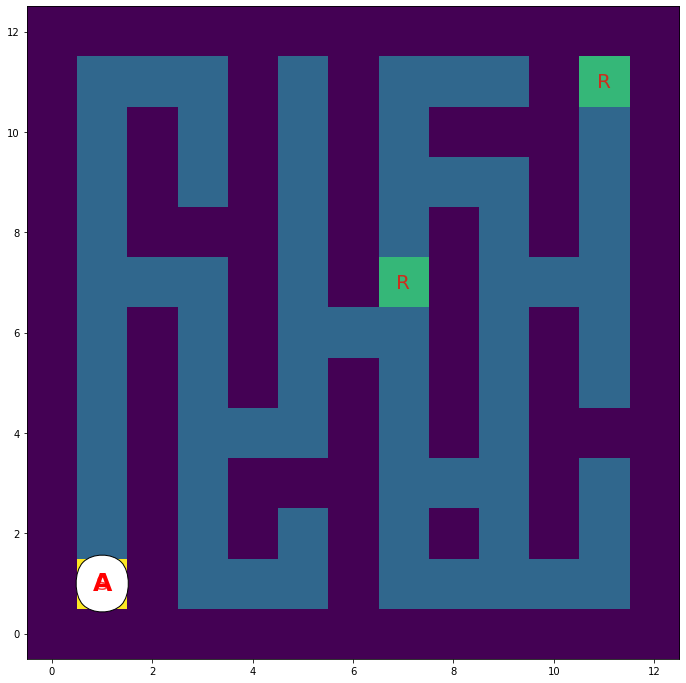

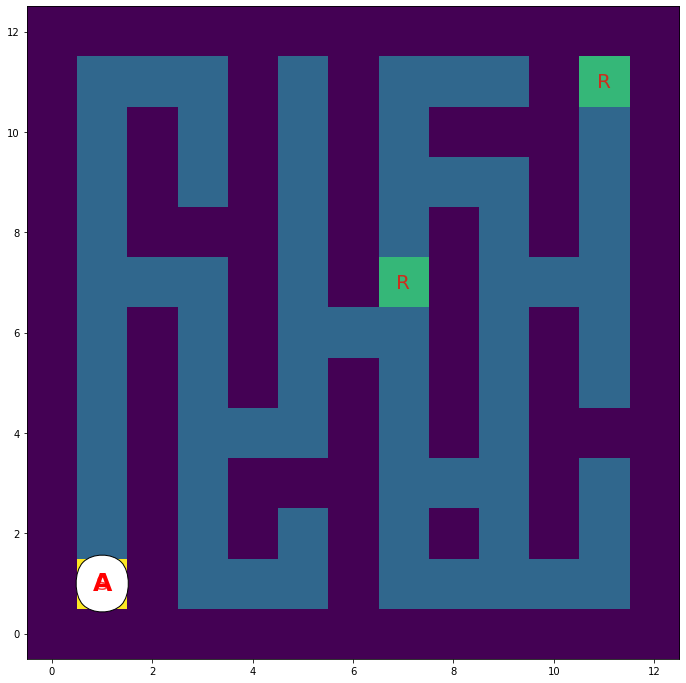

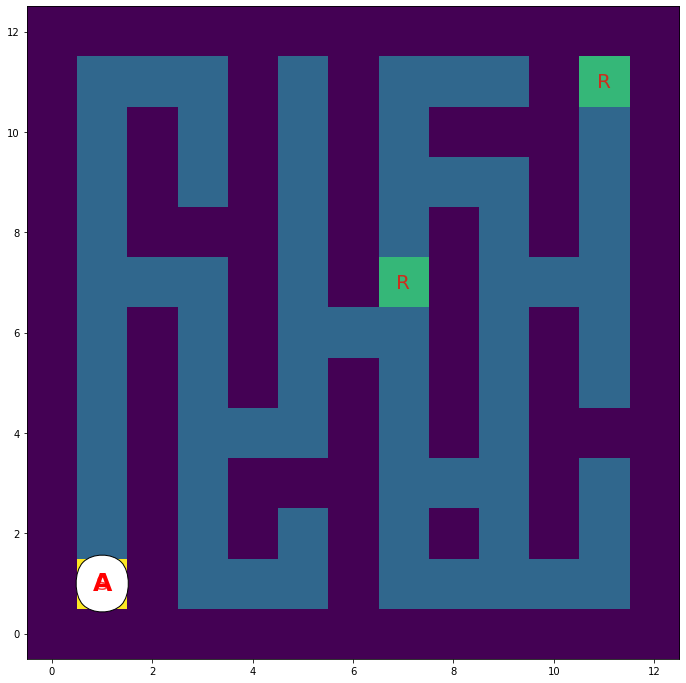

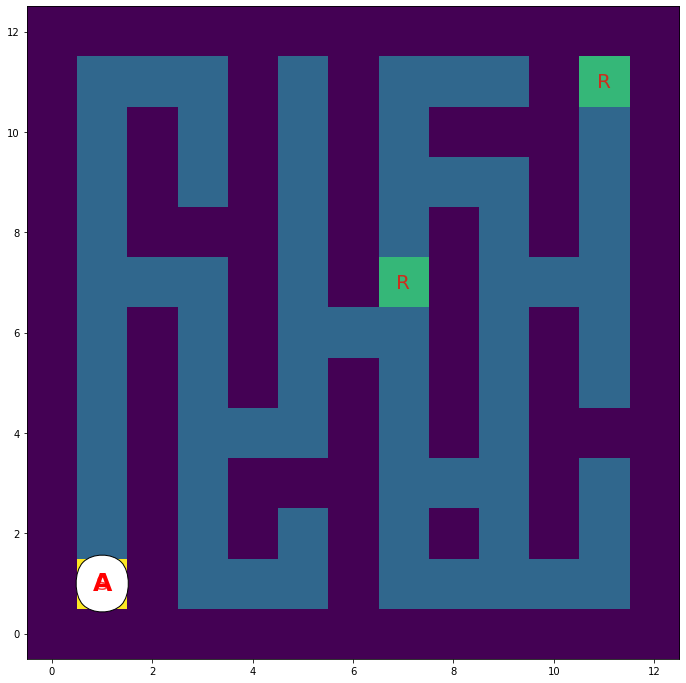

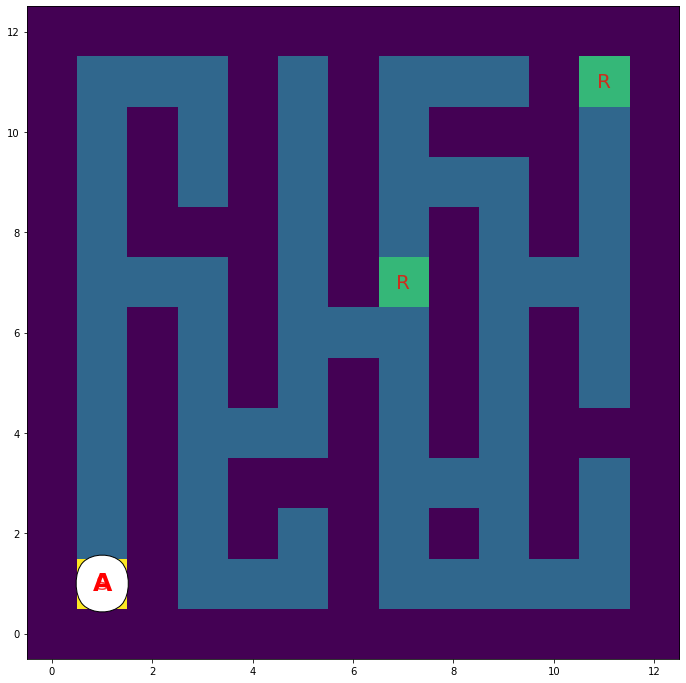

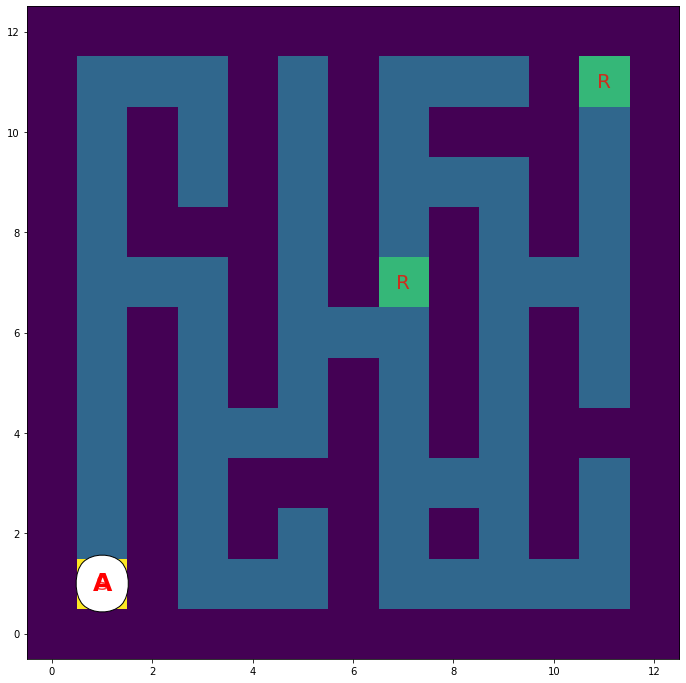

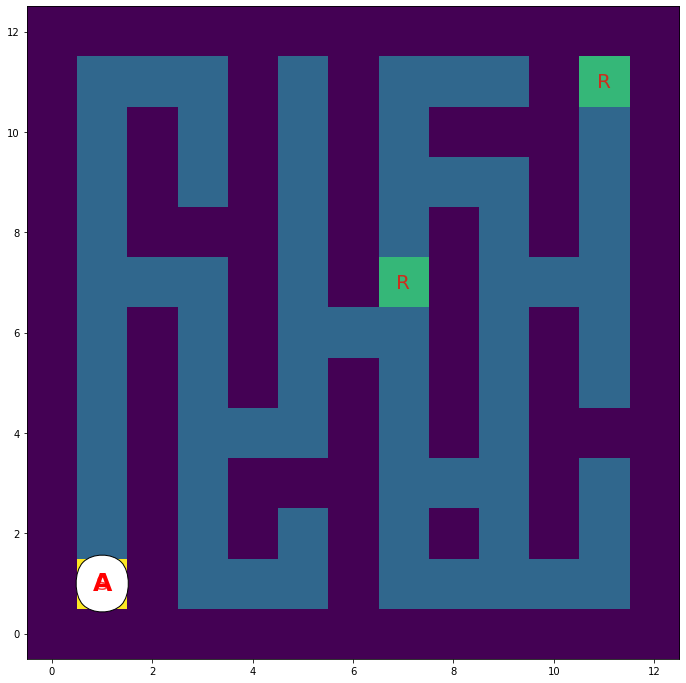

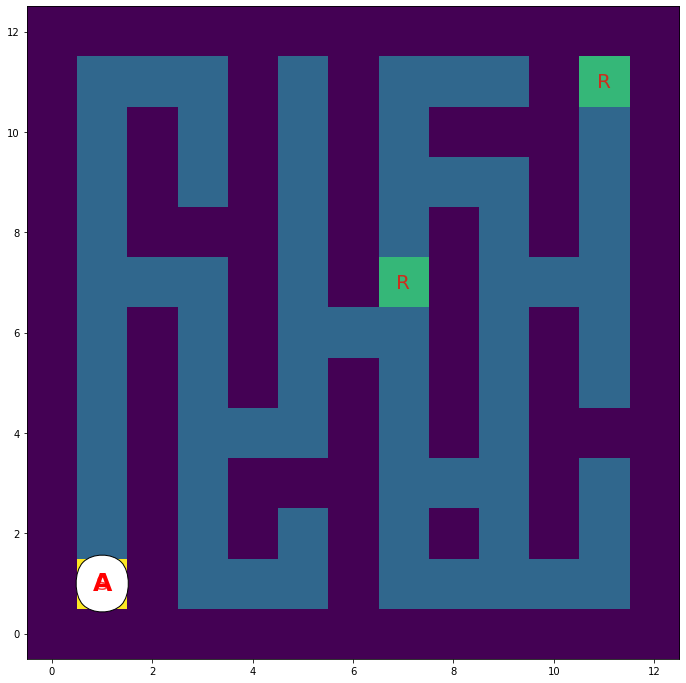

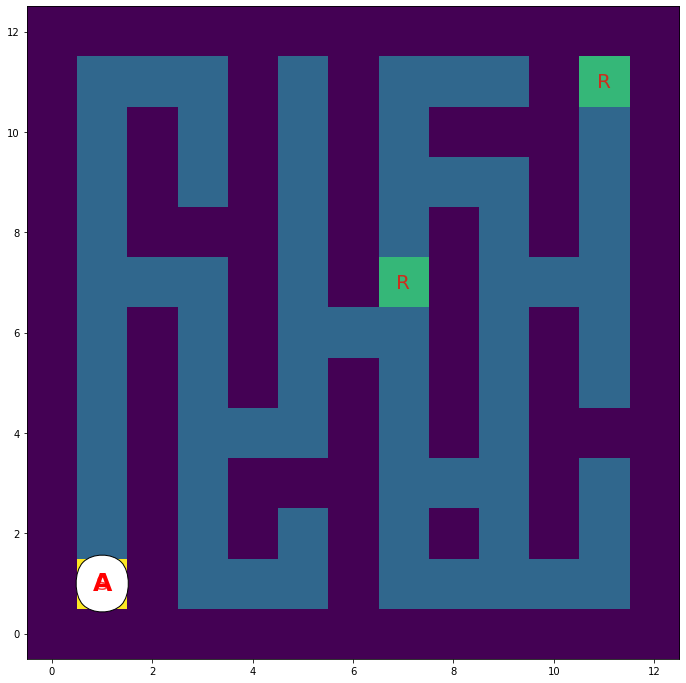

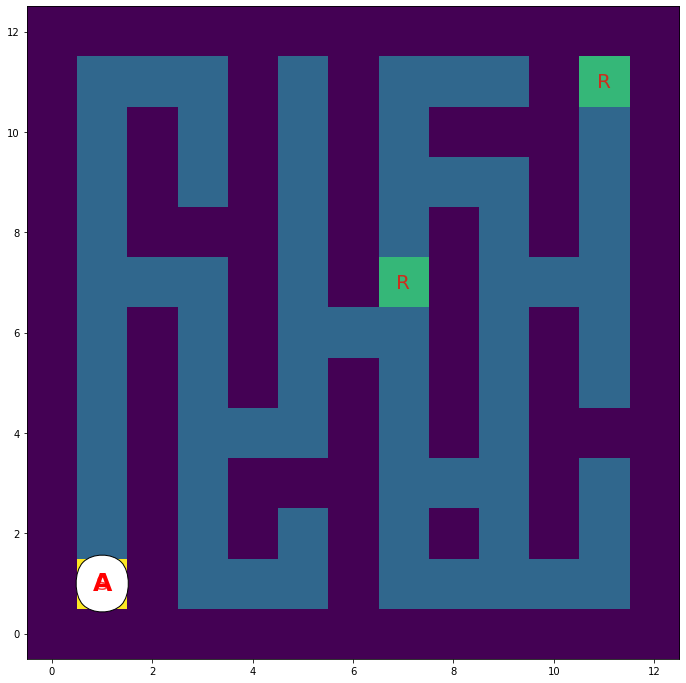

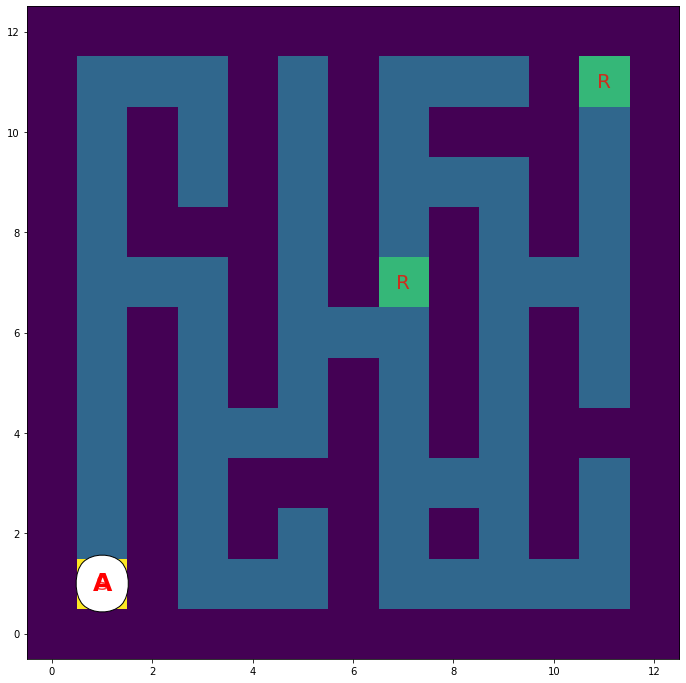

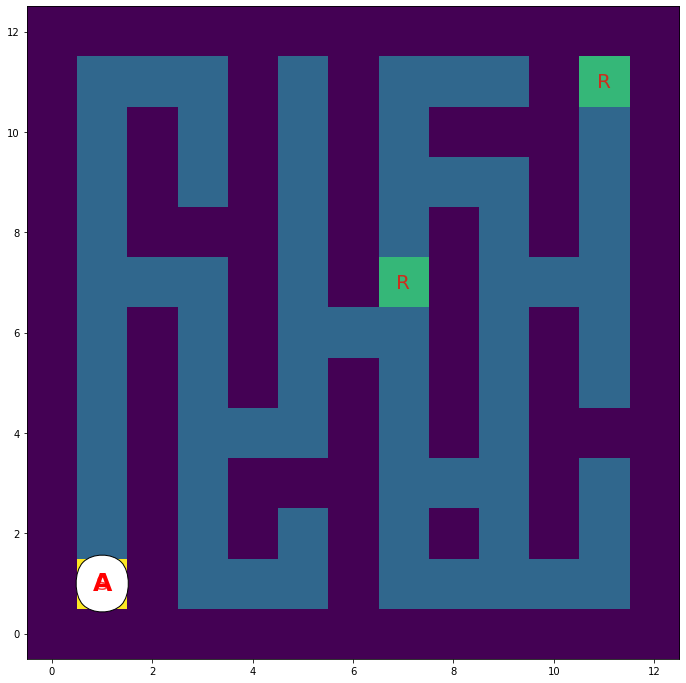

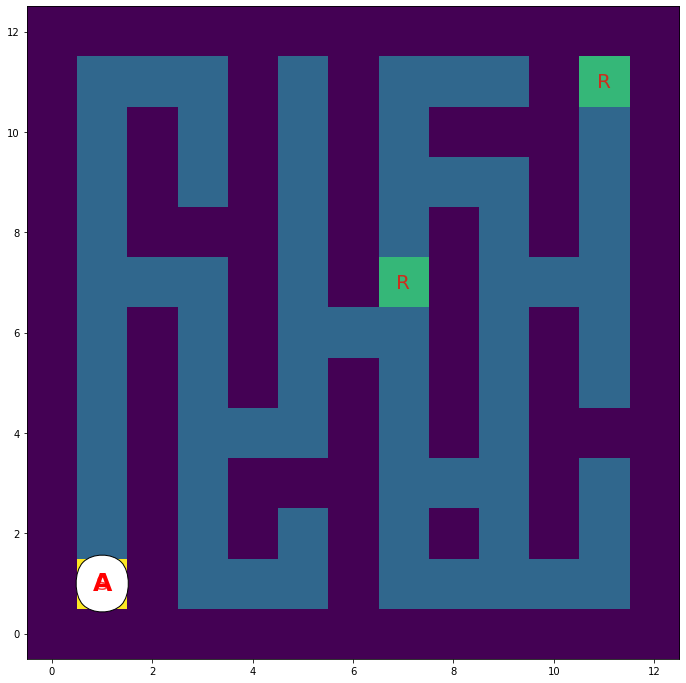

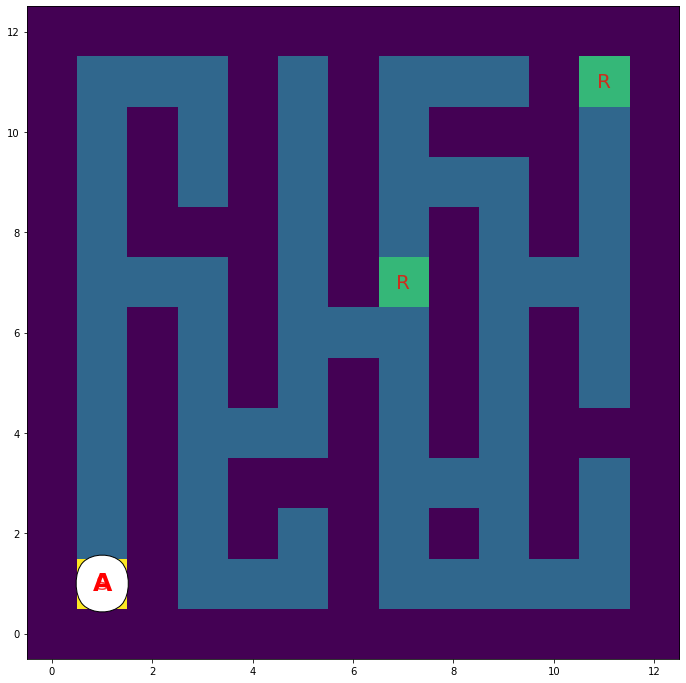

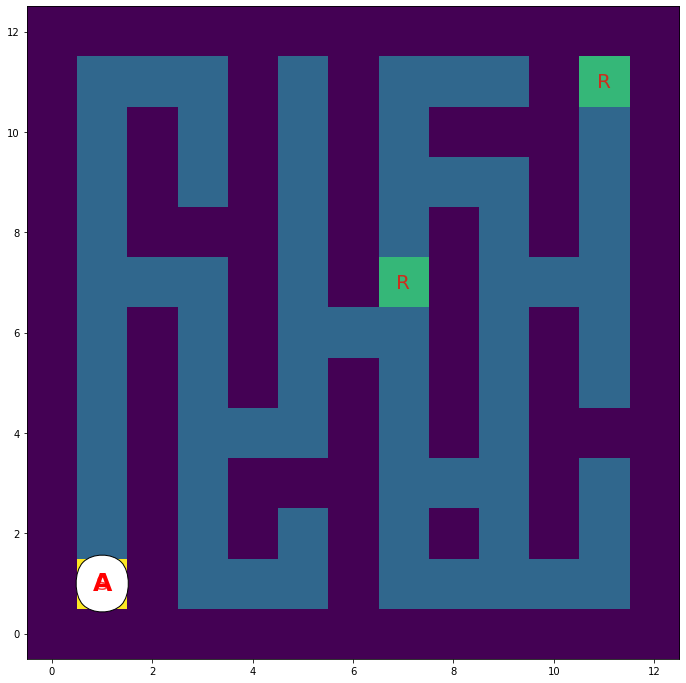

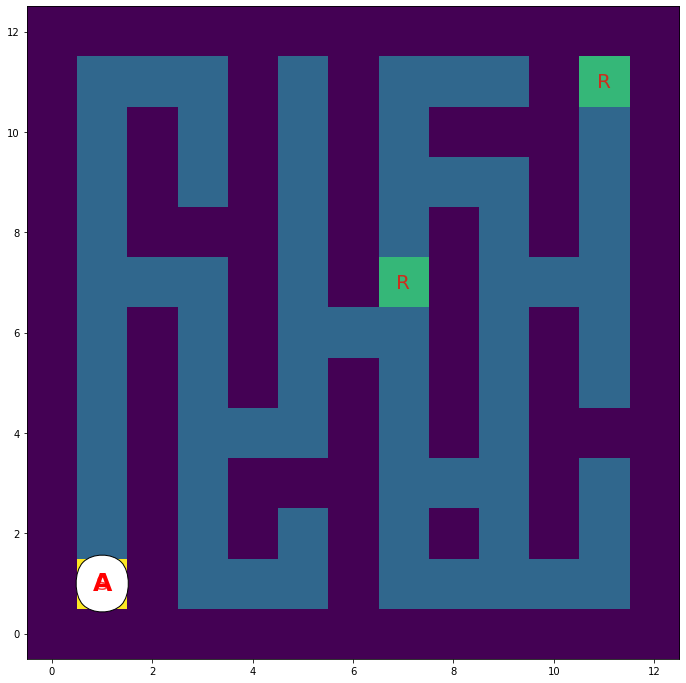

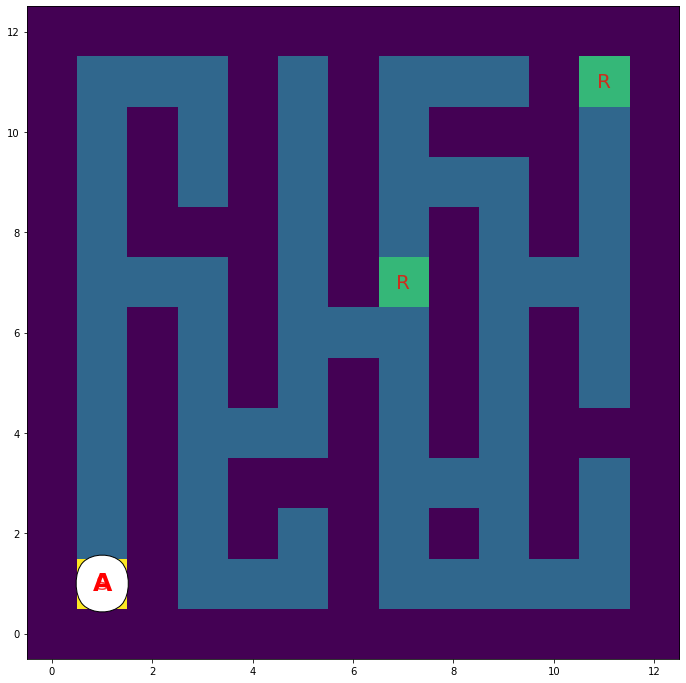

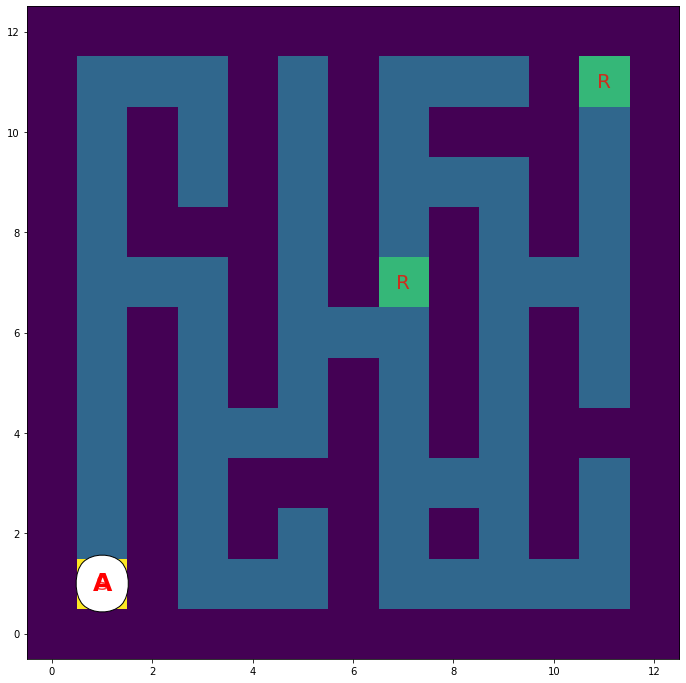

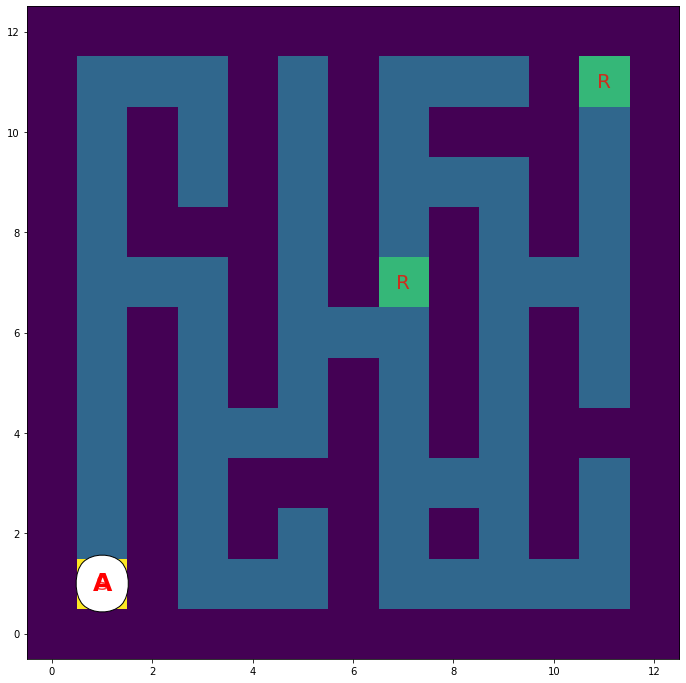

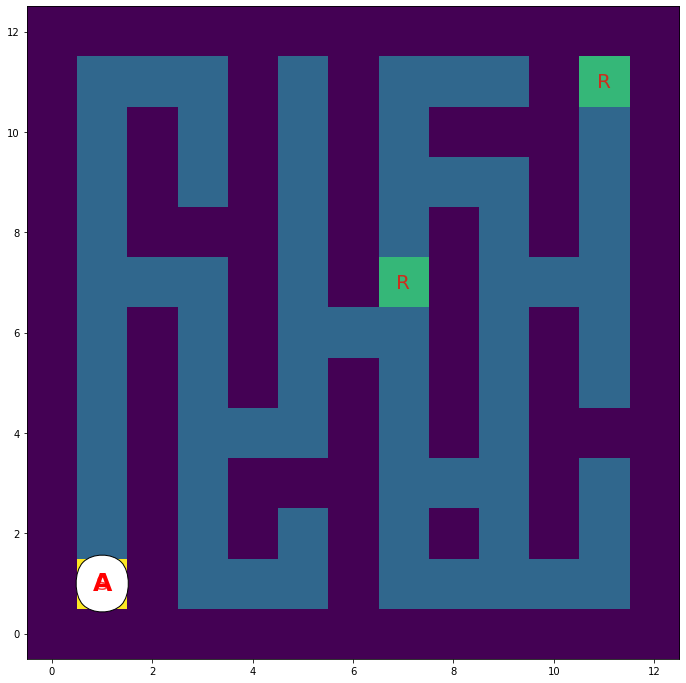

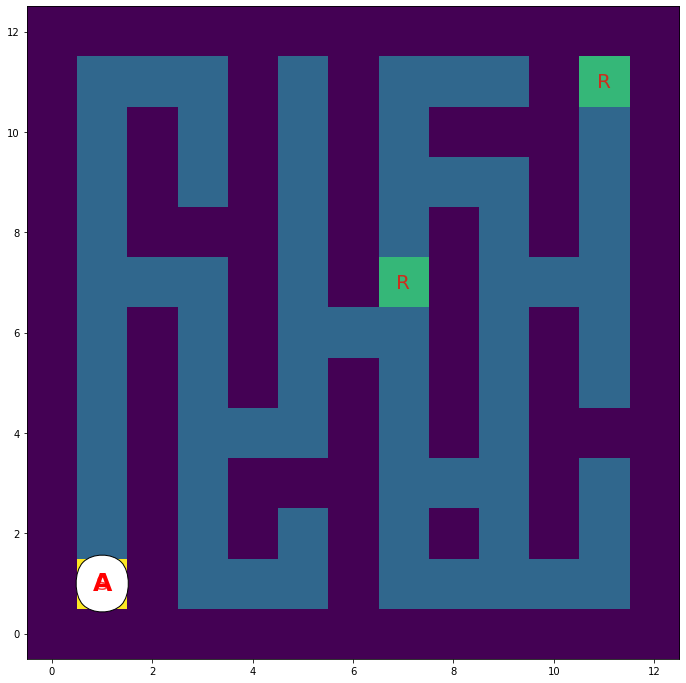

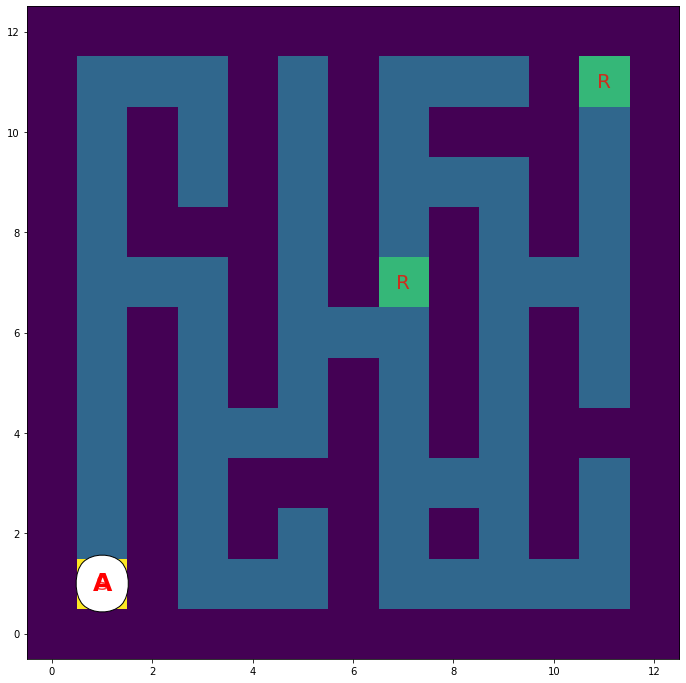

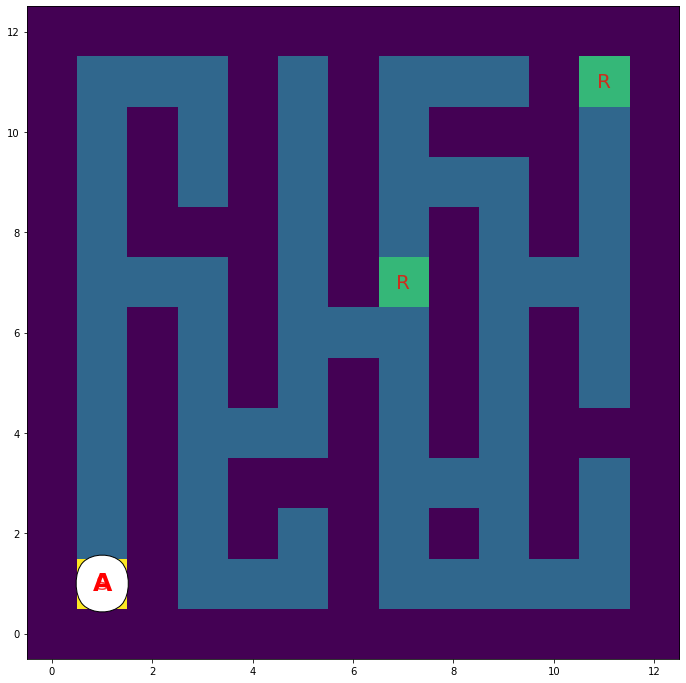

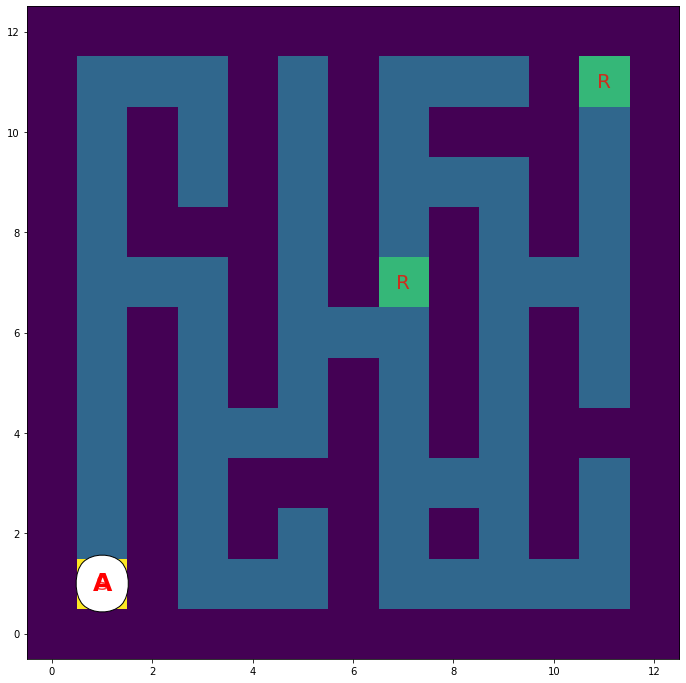

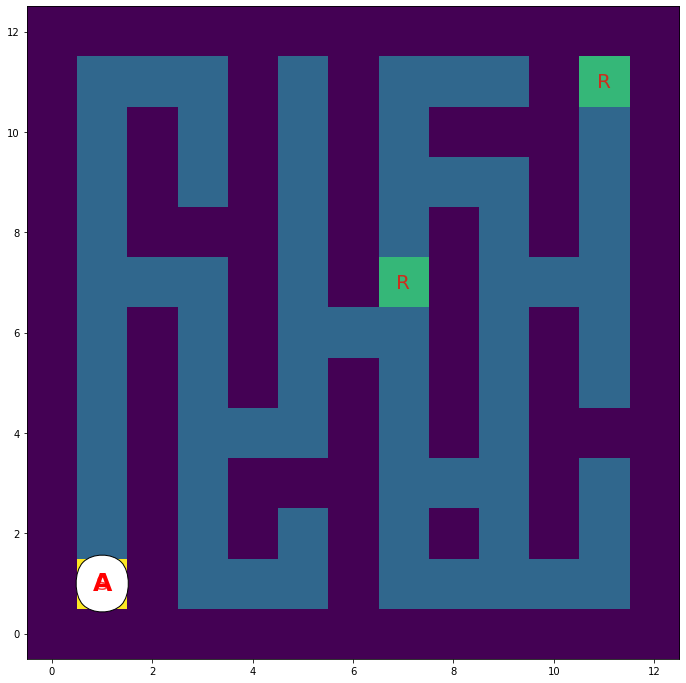

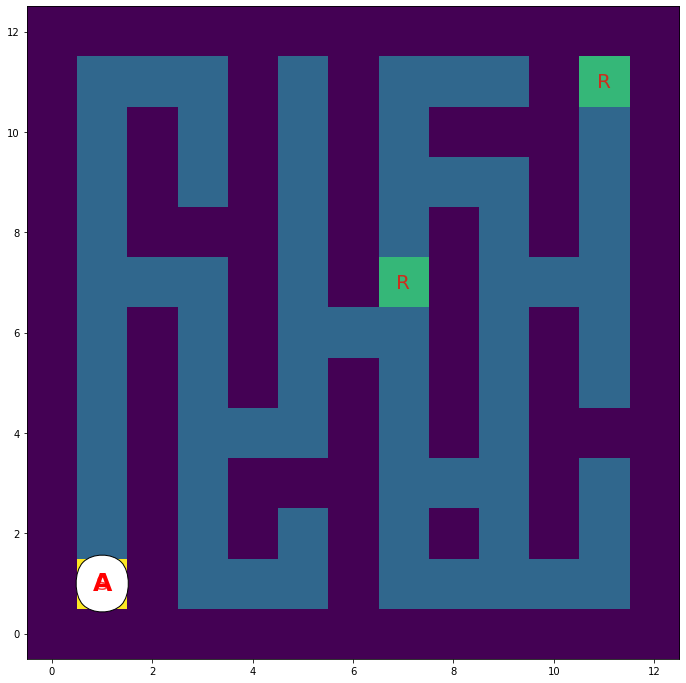

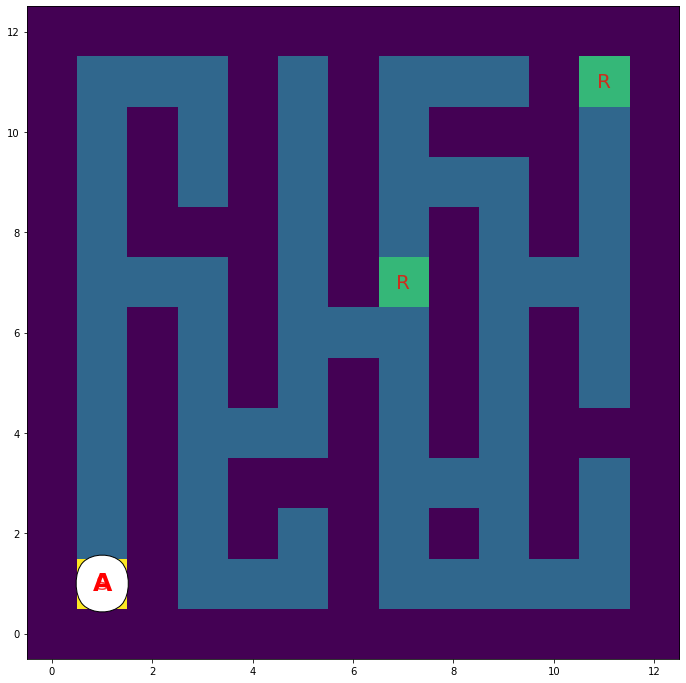

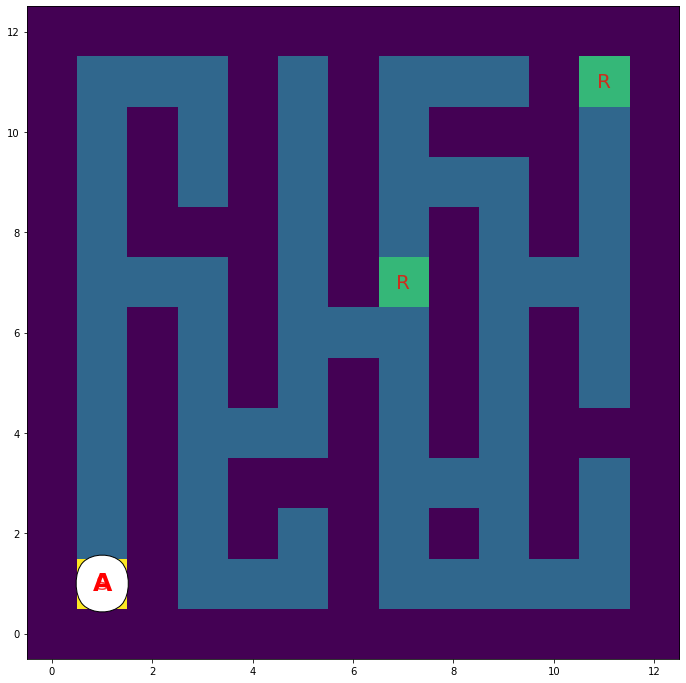

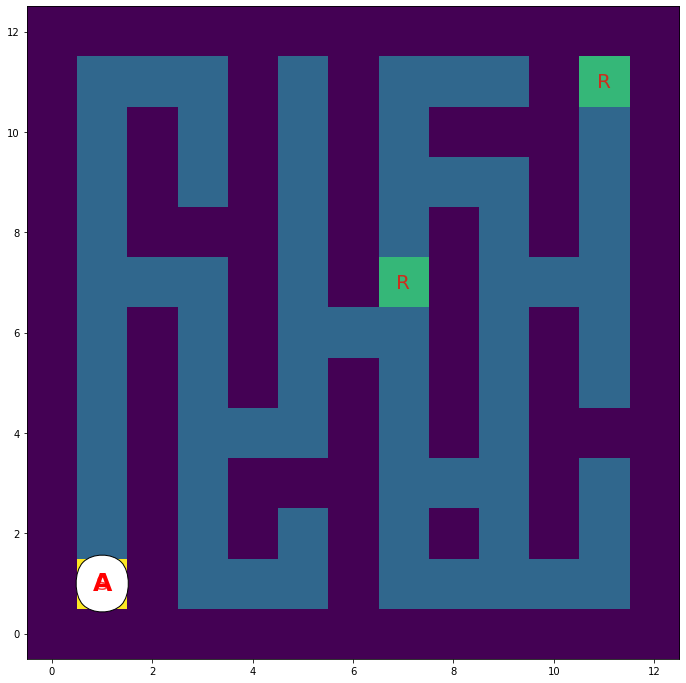

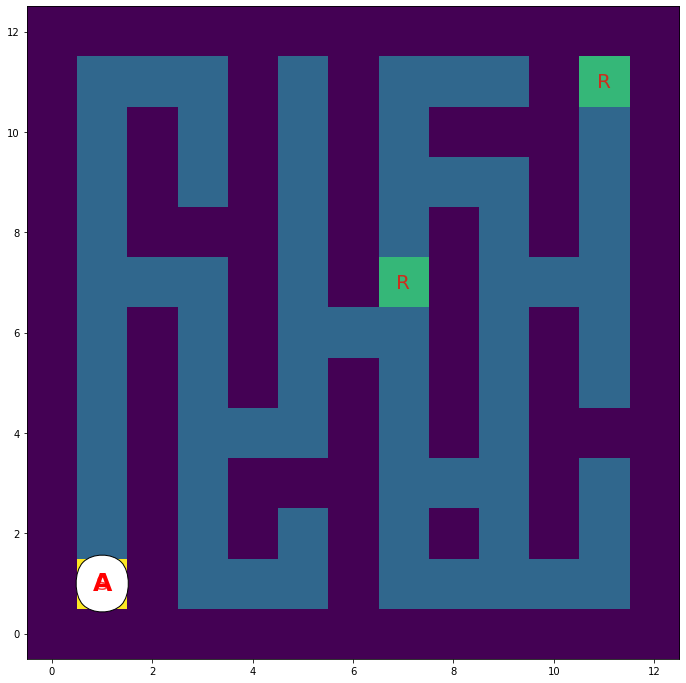

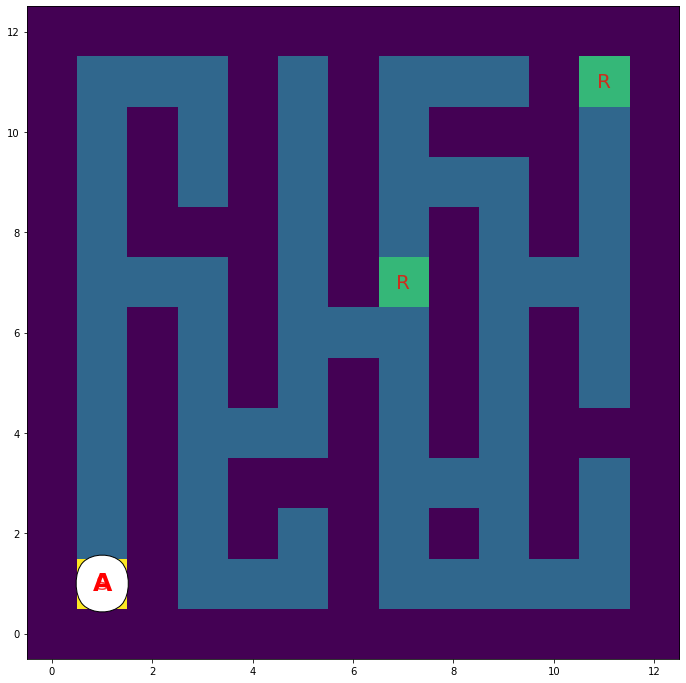

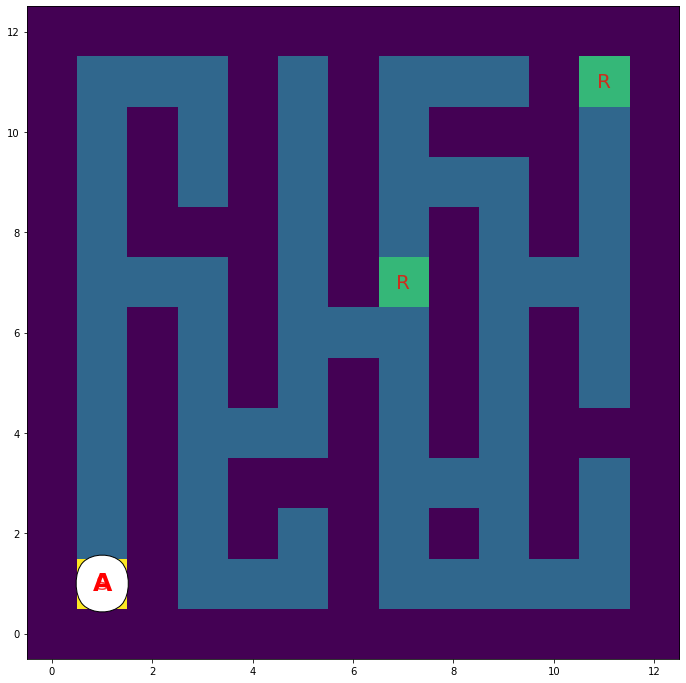

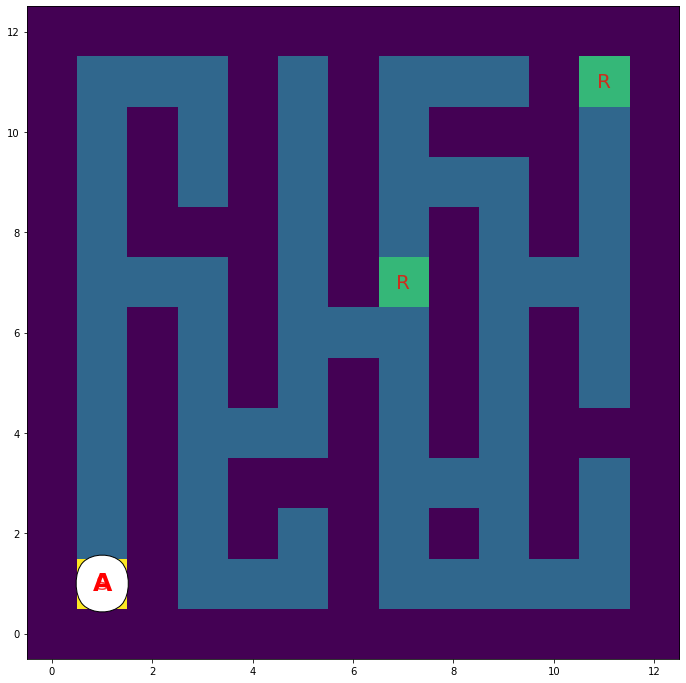

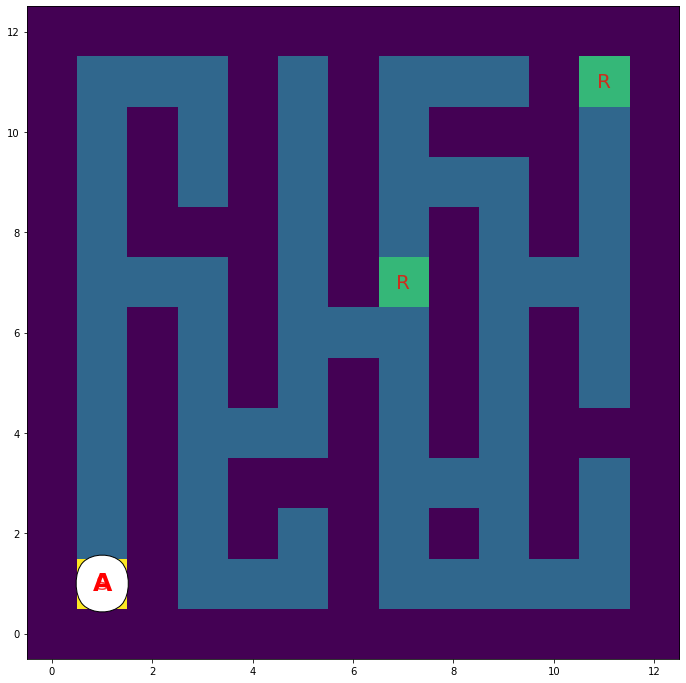

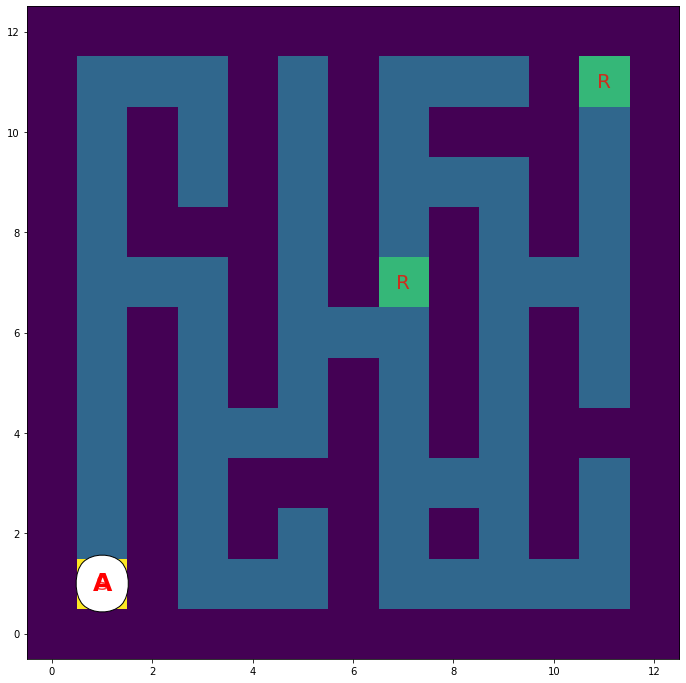

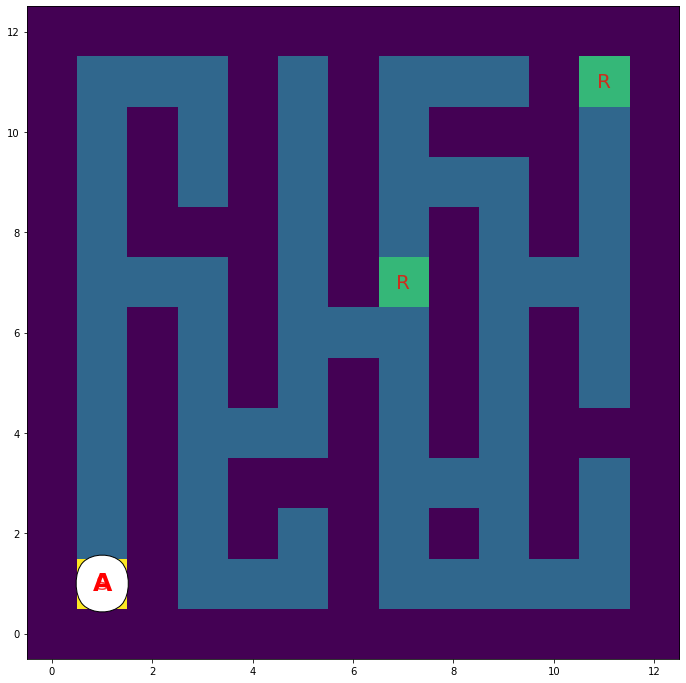

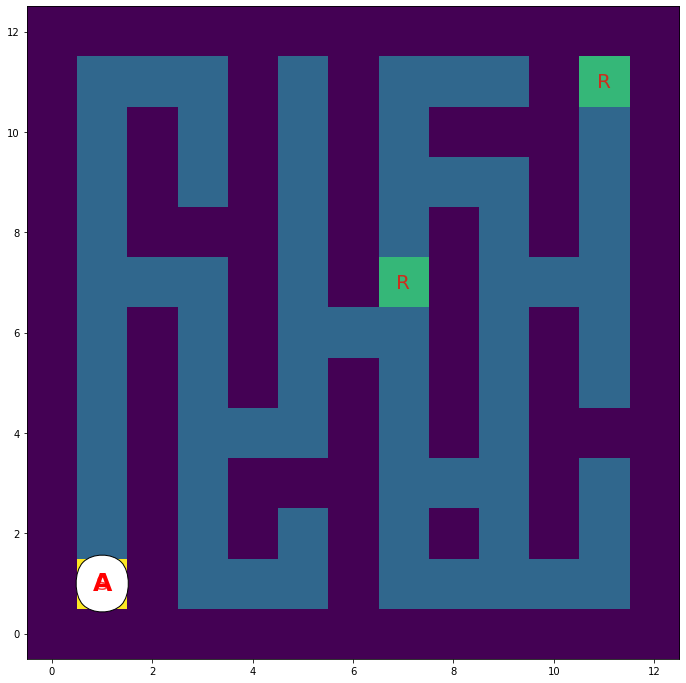

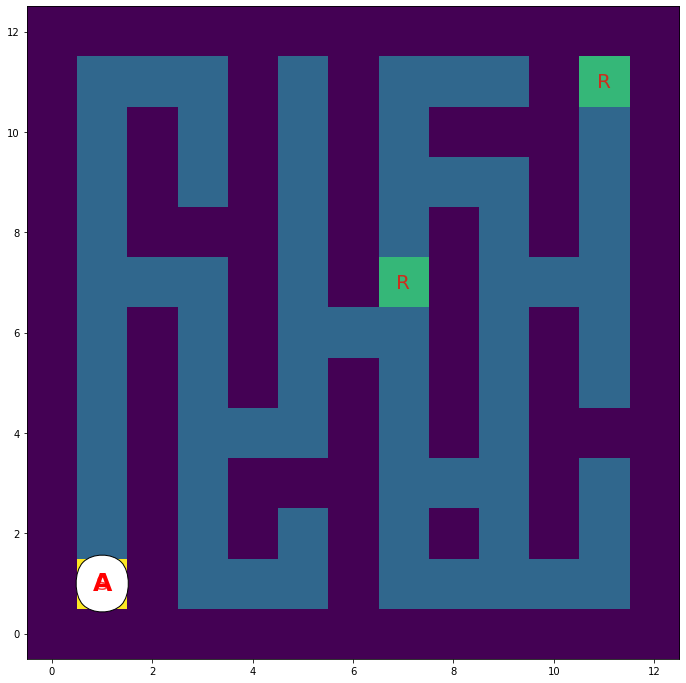

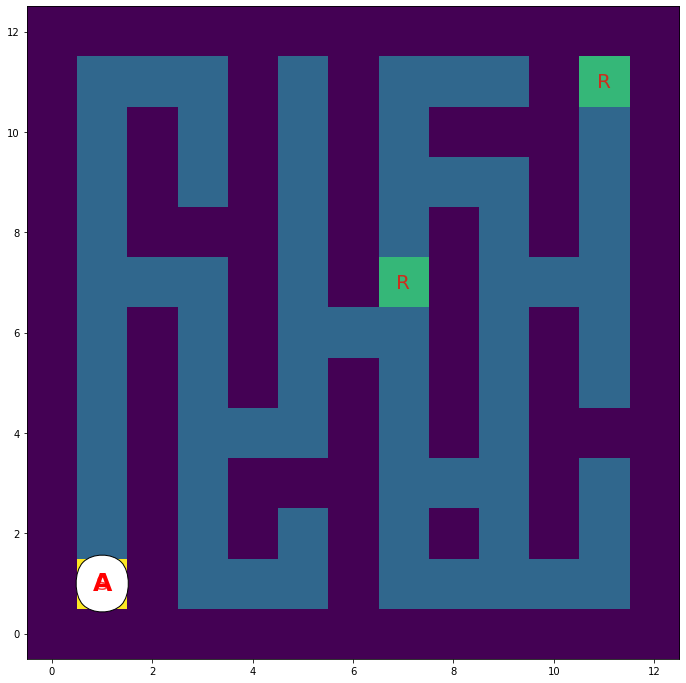

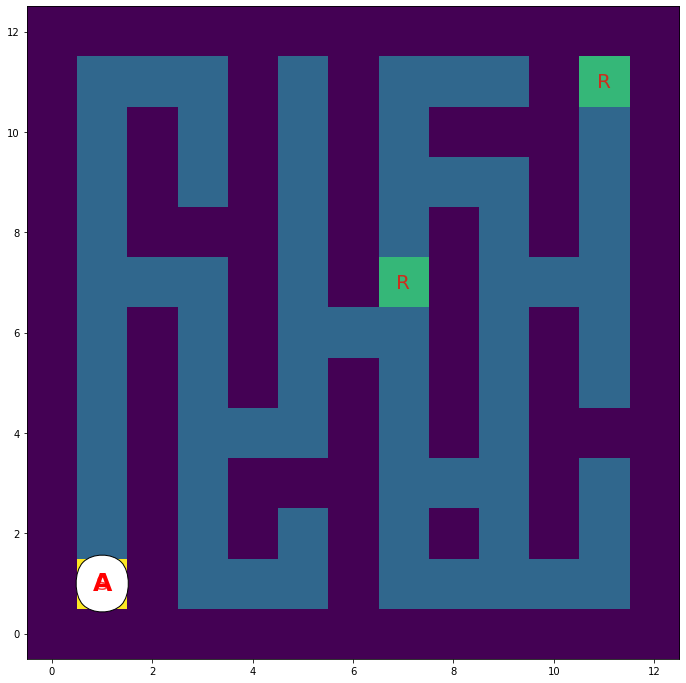

In [96]:
#Render the change in SR for one state over 100 episodes
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)
agent_info['epsilon'] = 0.5
RL.rl_init(env_info, agent_info)

#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)

for _ in tqdm(range(10)):    
    RL.rl_episode()
    
#Task
record_agent("agent_punishing_state", one_state=92)

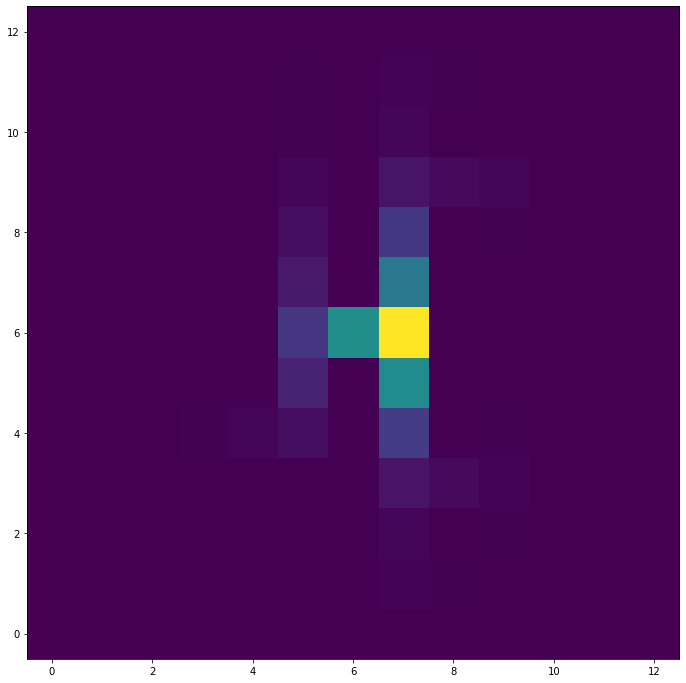

In [94]:
plt.figure(figsize=(12, 12))
plt.imshow(RL.agent.M[85].reshape(13, 13), origin="lower")

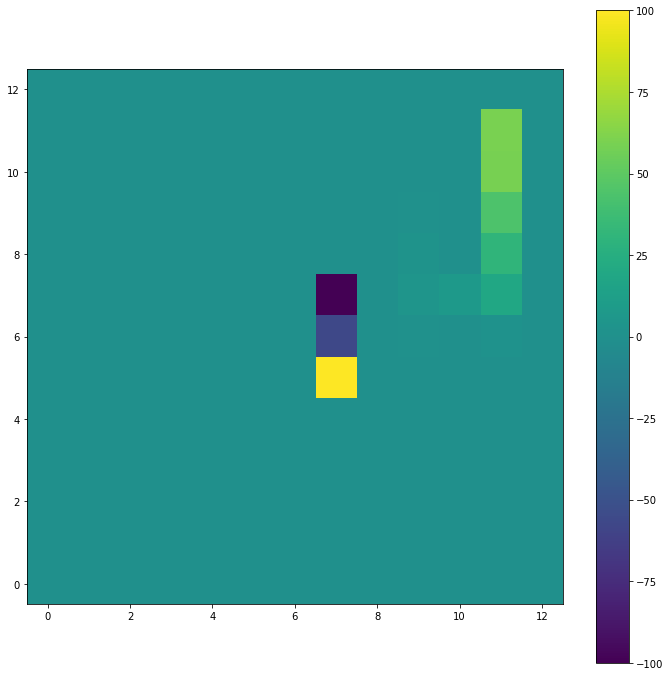

In [87]:
plt.figure(figsize=(12, 12))

plt.imshow(RL.agent.w.reshape(13, 13), origin="lower")
plt.colorbar()

In [104]:
def record_agent(title="agent", optimal_trajectory=None, one_state=None):
    """
    This function records the SR in each state the agent enters during an epoch. 
    Params:
        title -- string, name of the resulting file
        optimal_trajectory -- list[int], simulates path of the agent
    """
    metadata = dict(title=title, artist='JG')
    writer = manimation.FFMpegFileWriter(fps=15, metadata=metadata)
    fig, ax = plt.subplots(figsize=(12, 12))
    fig.tight_layout()
    
    with writer.saving(fig, f"./out/{title}.mp4", 144):
        RL.rl_change_task(reward_states=[(6, 11)], rewards=[100])
        
        
        #RL.rl_episode()
        RL.rl_change_epsilon(0)
        reward, state, action, termination = RL.rl_start()
        
        for _ in range(100):
            reward, state, action, termination = RL.rl_step(reward, state, action)
            if termination:
                break
            RL.rl_plot()
            writer.grab_frame()
            ax.clear()

100%|██████████| 10/10 [00:00<00:00, 267.63it/s]
/Users/julianbons/Documents/Uni/Master/2. Semester/Research Project 1/Code/Source_Code/utils.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 12))


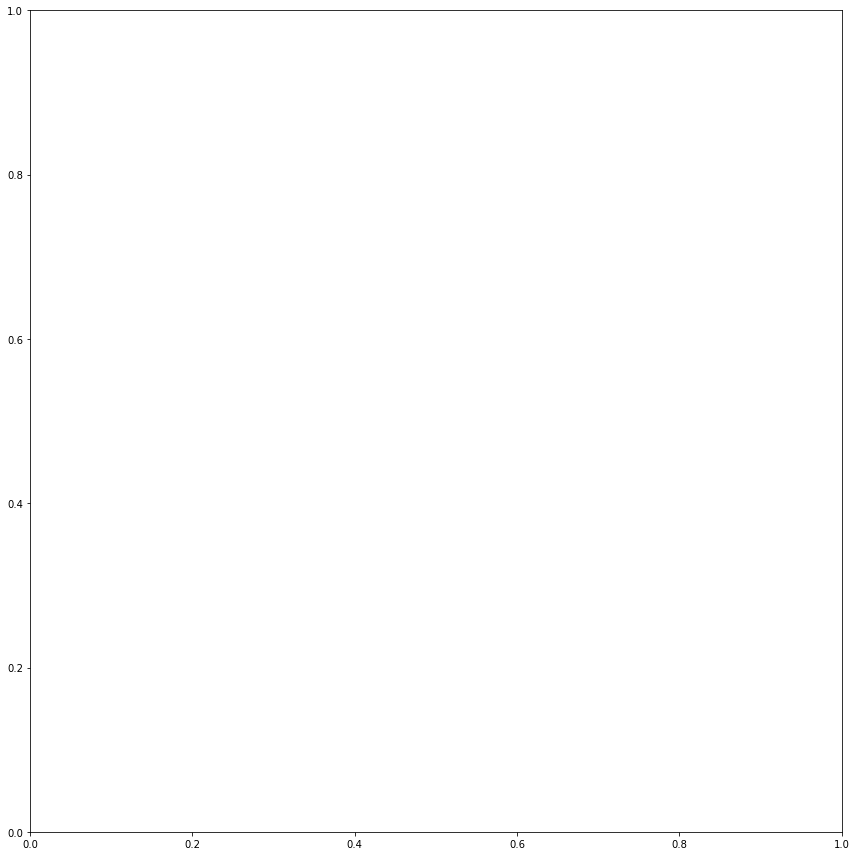

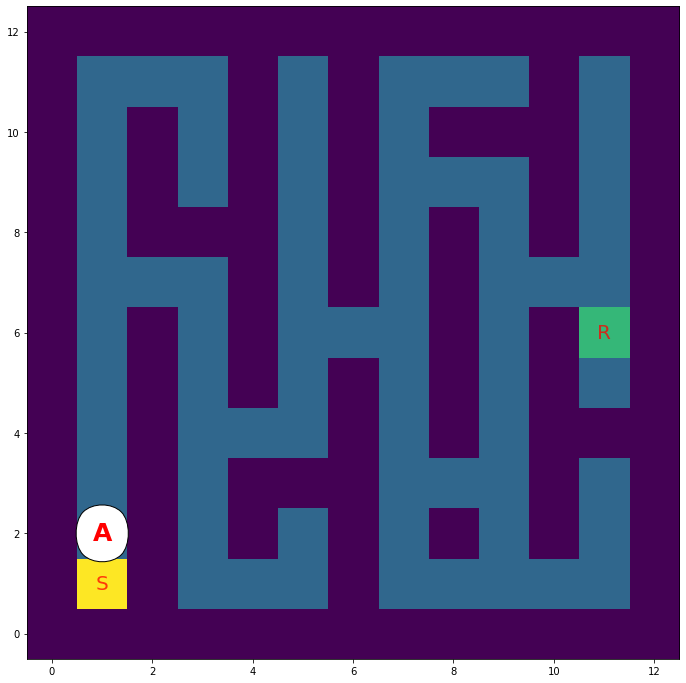

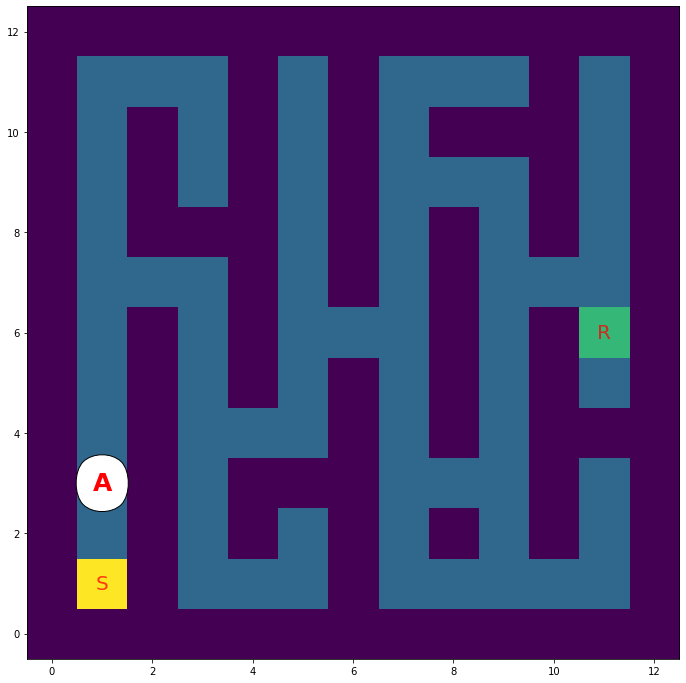

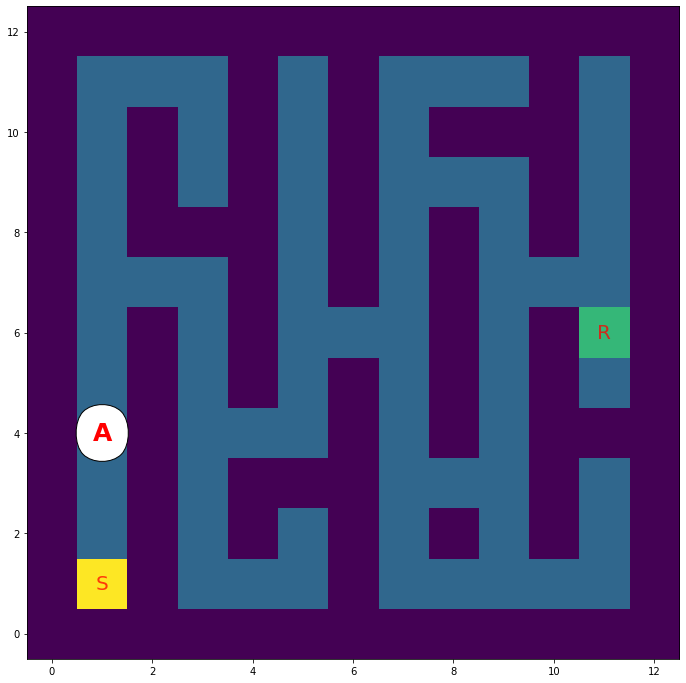

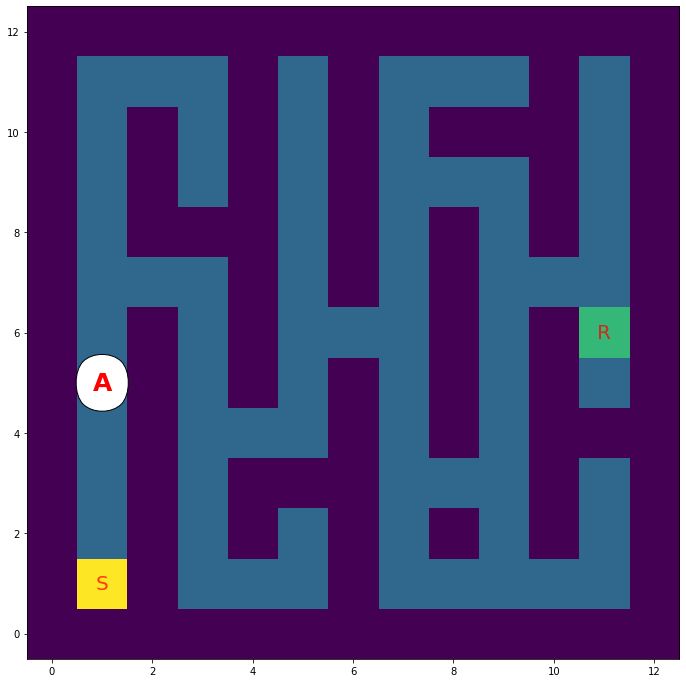

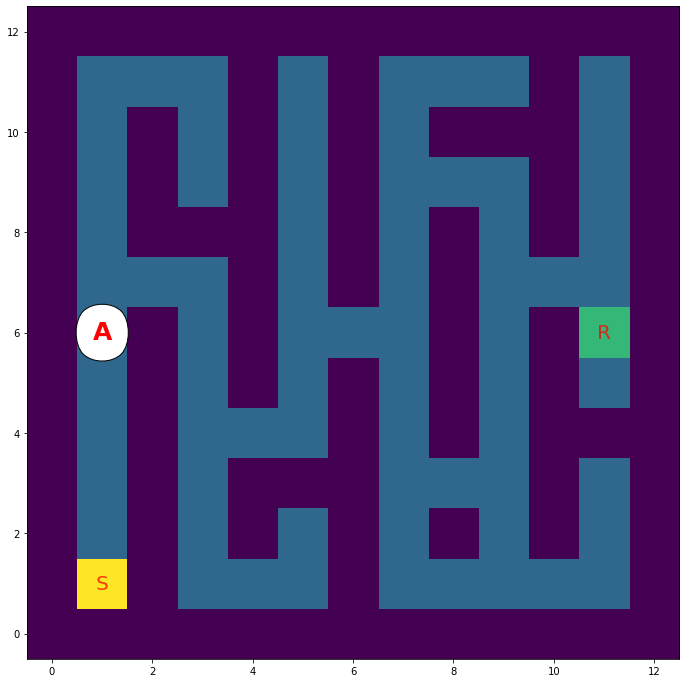

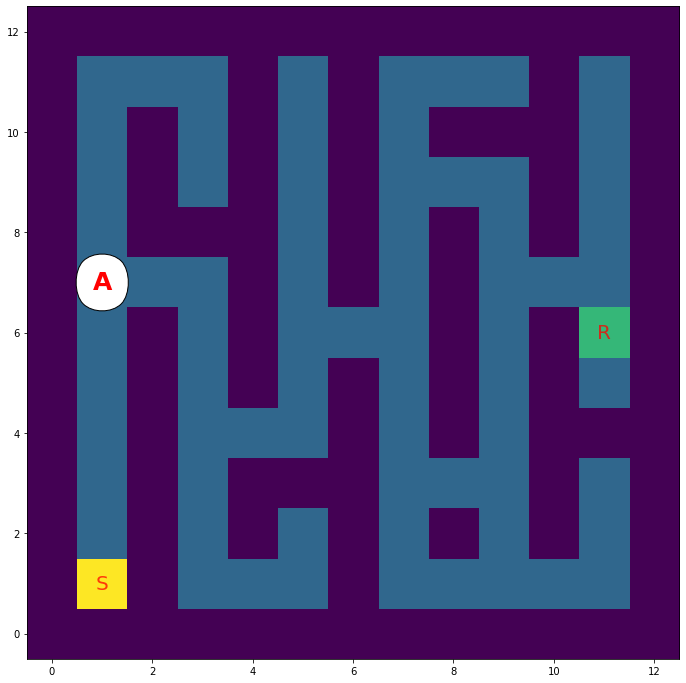

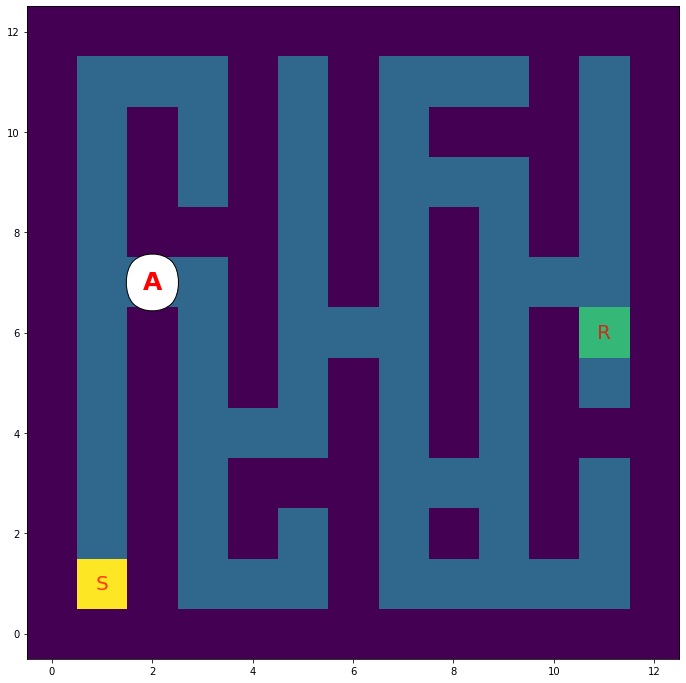

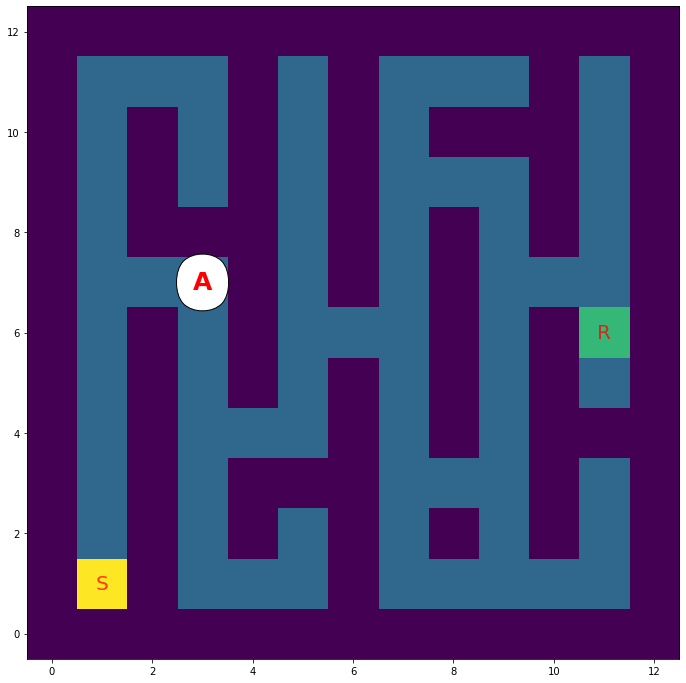

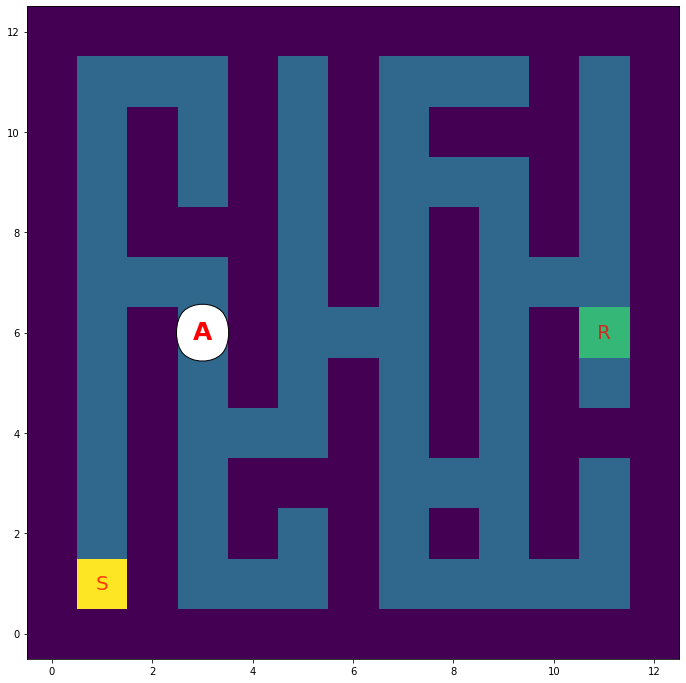

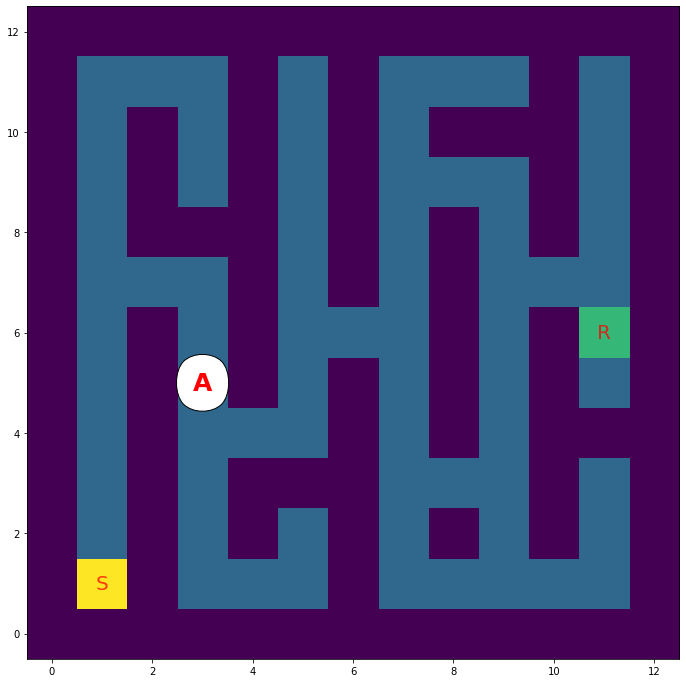

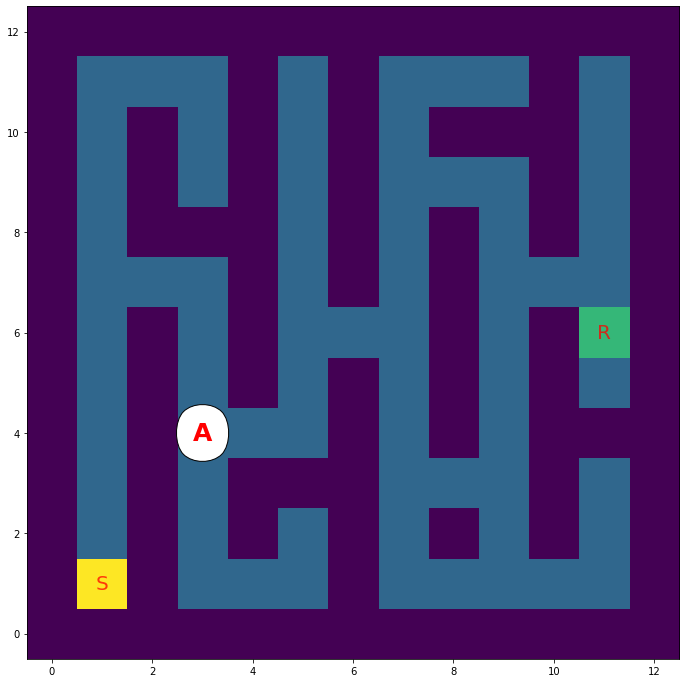

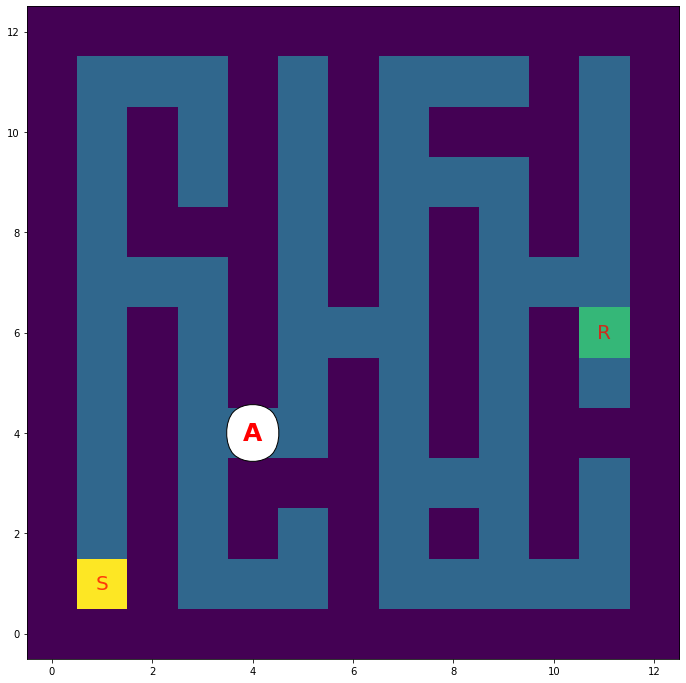

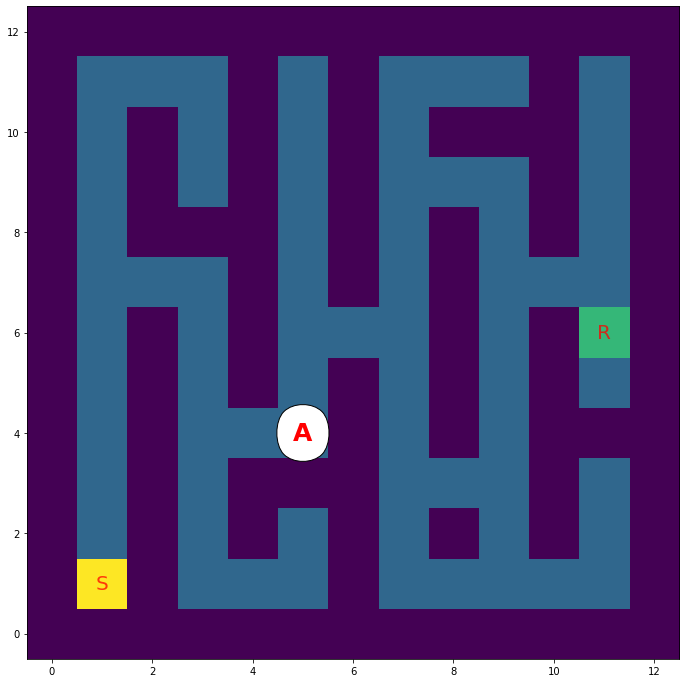

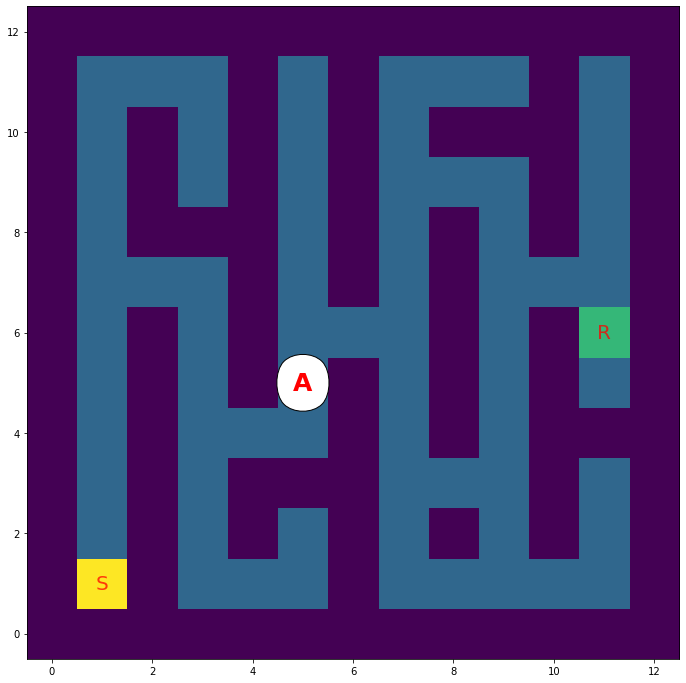

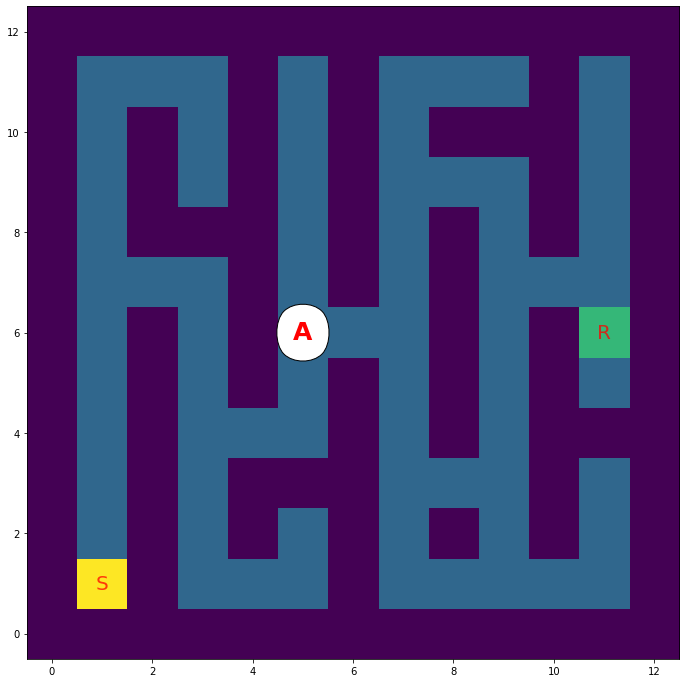

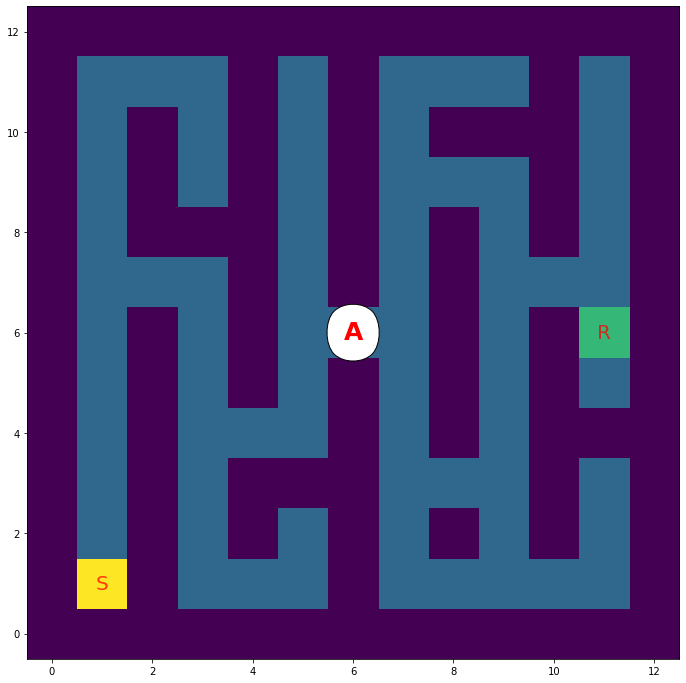

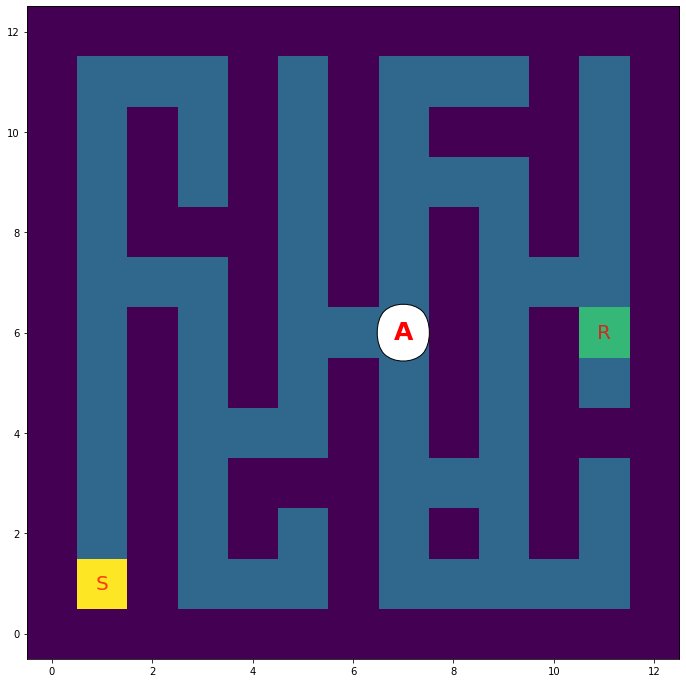

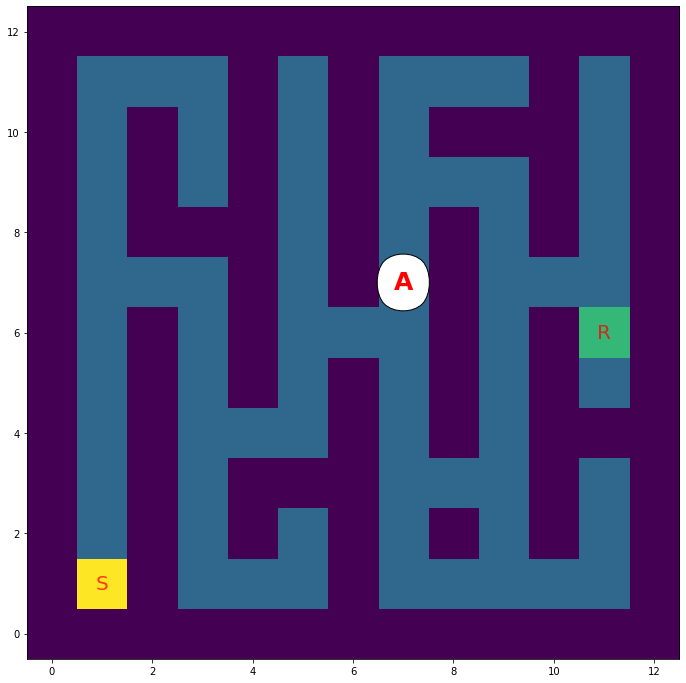

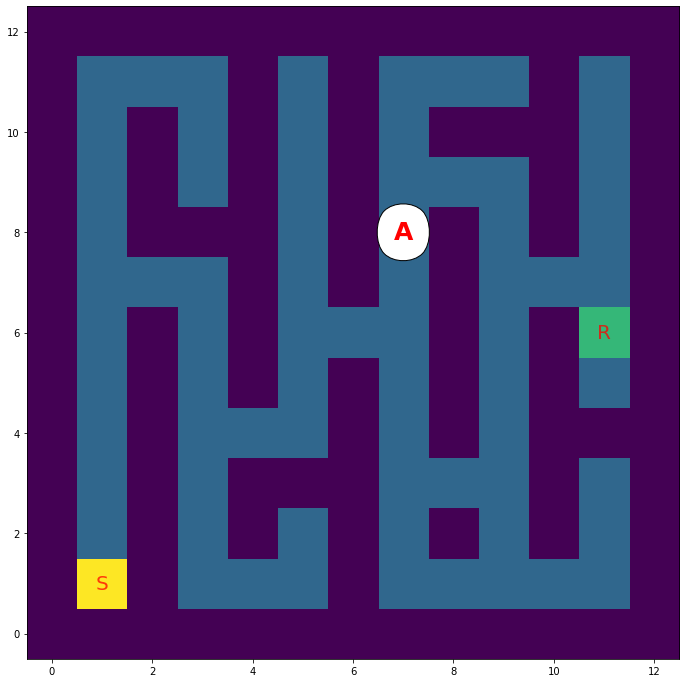

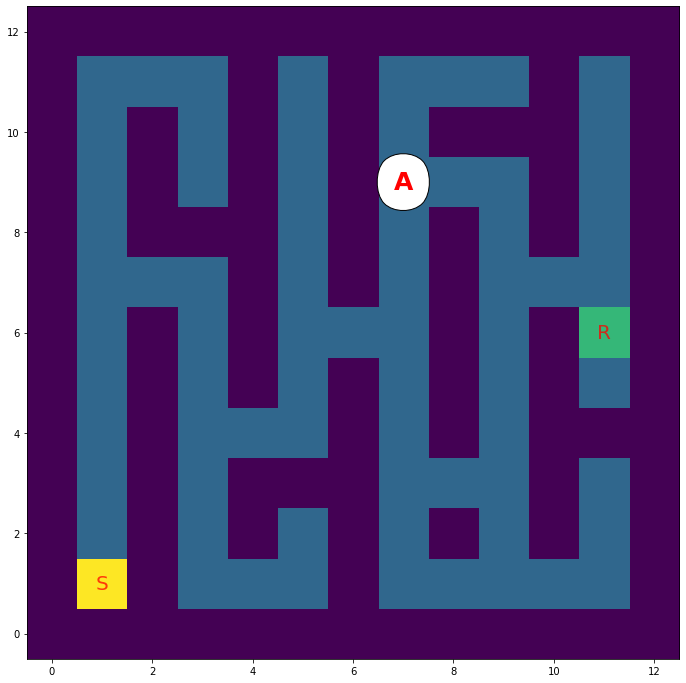

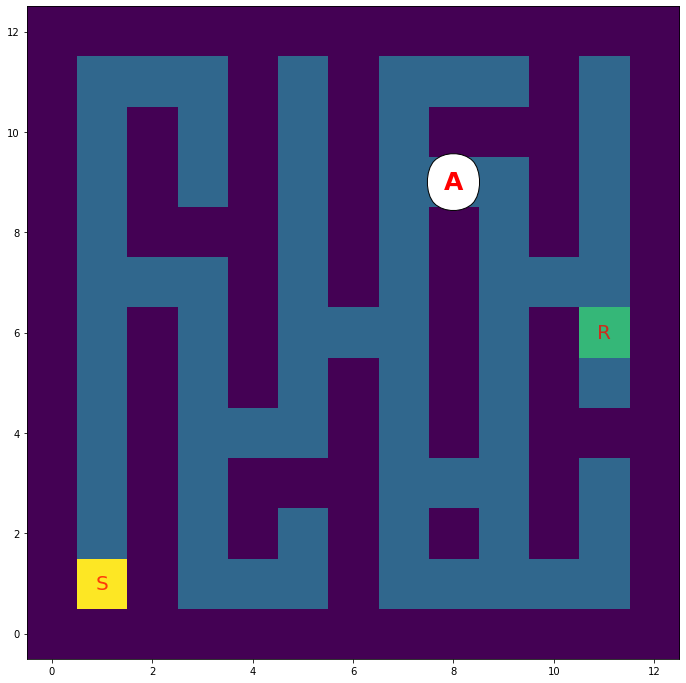

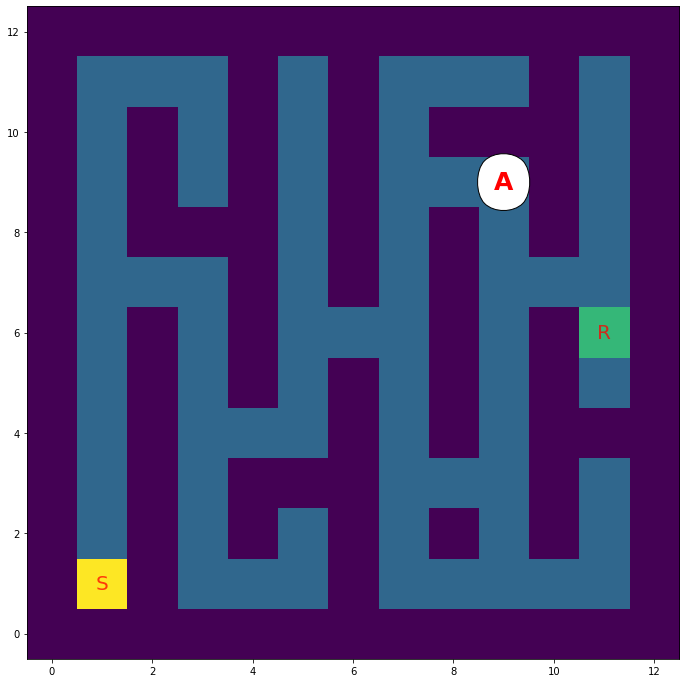

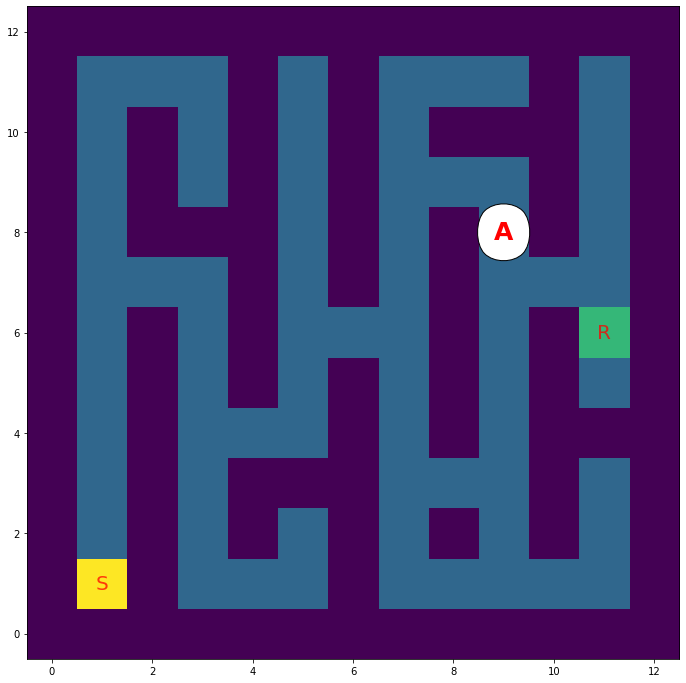

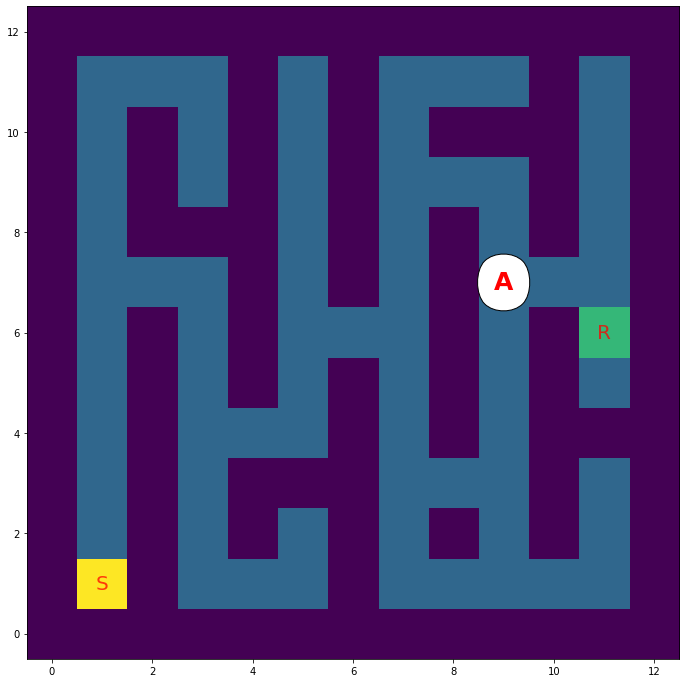

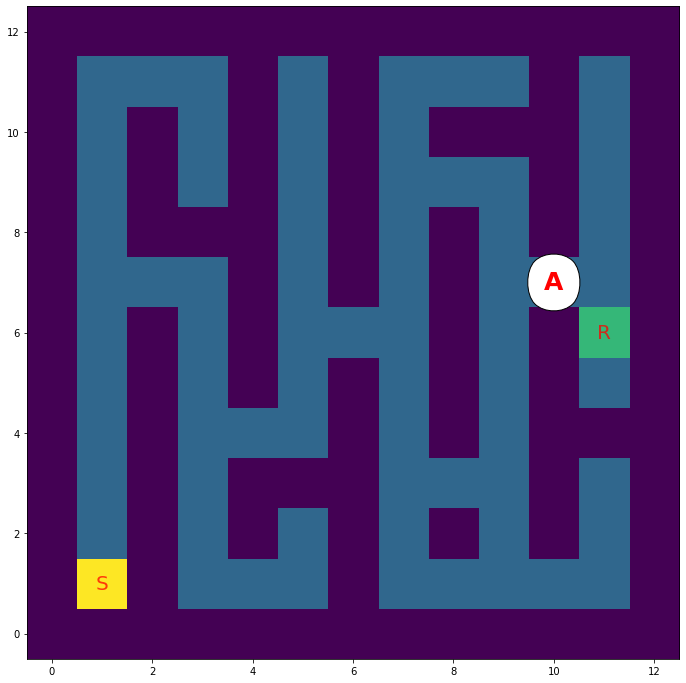

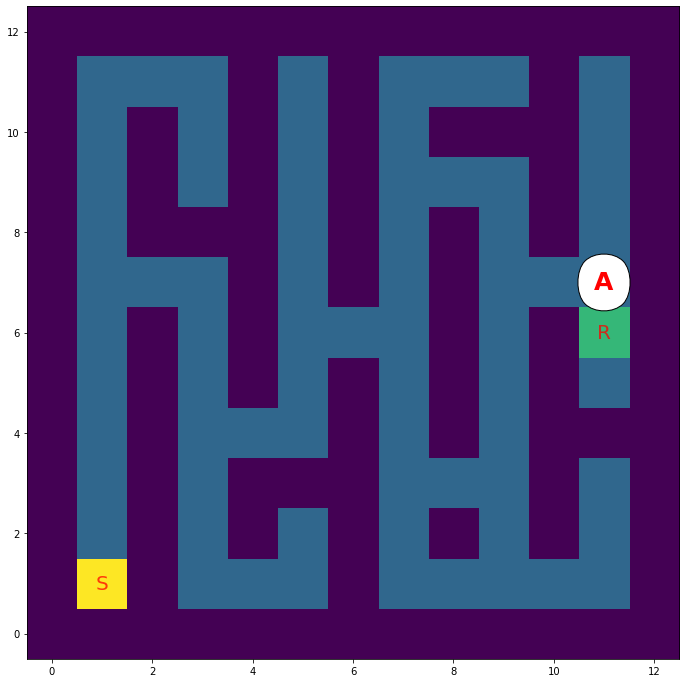

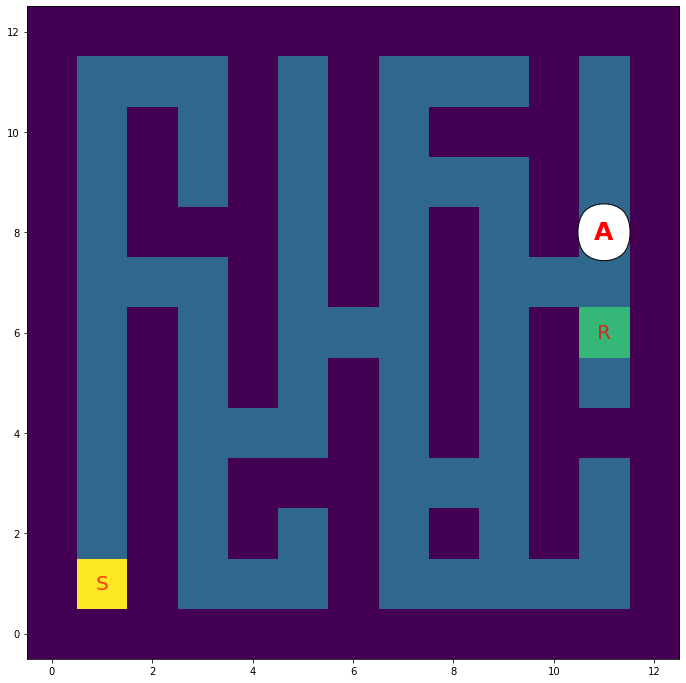

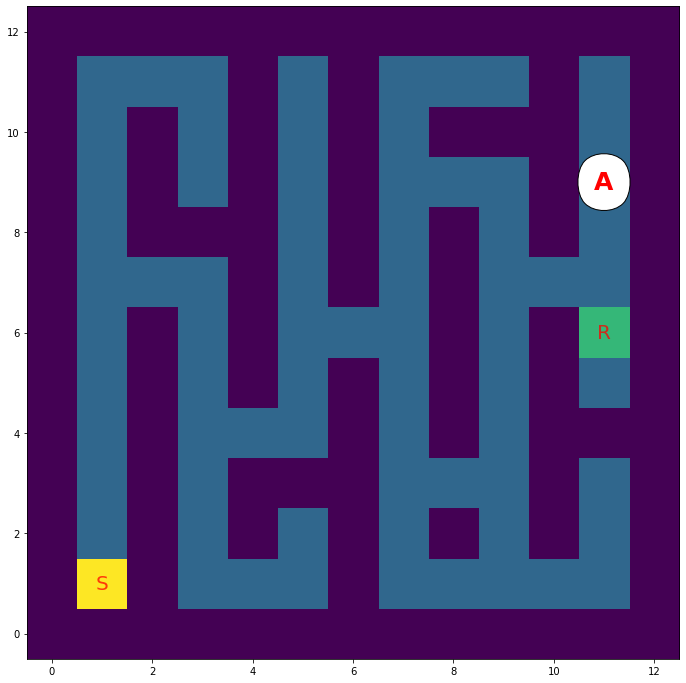

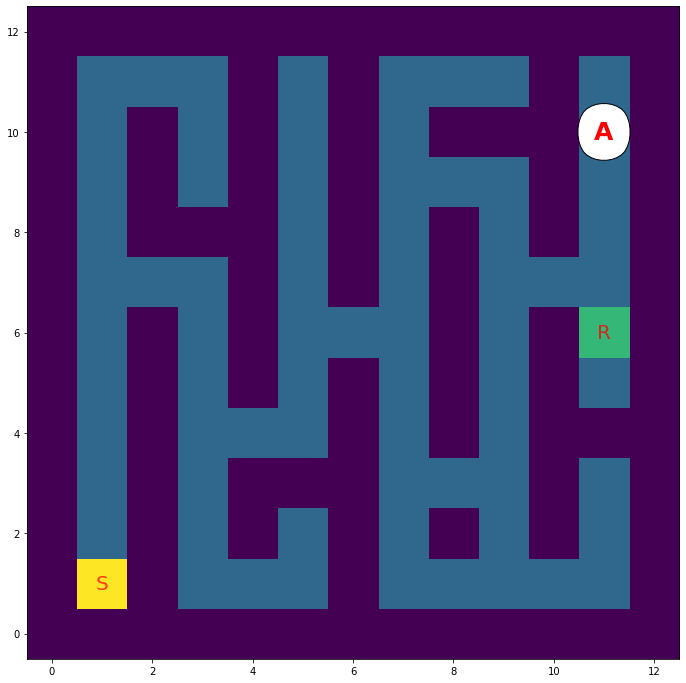

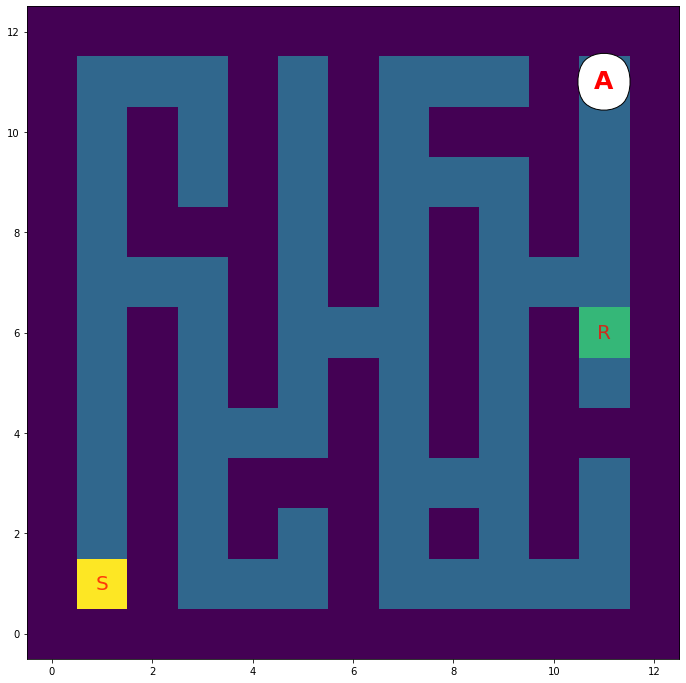

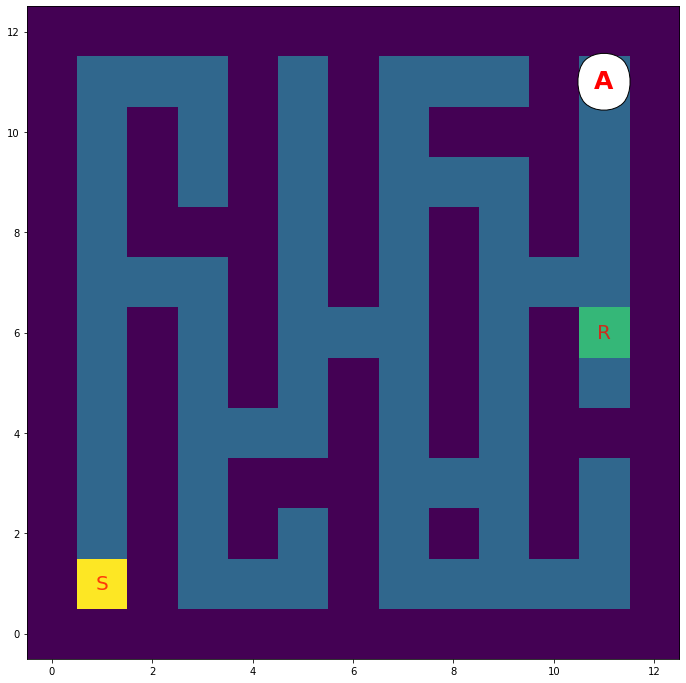

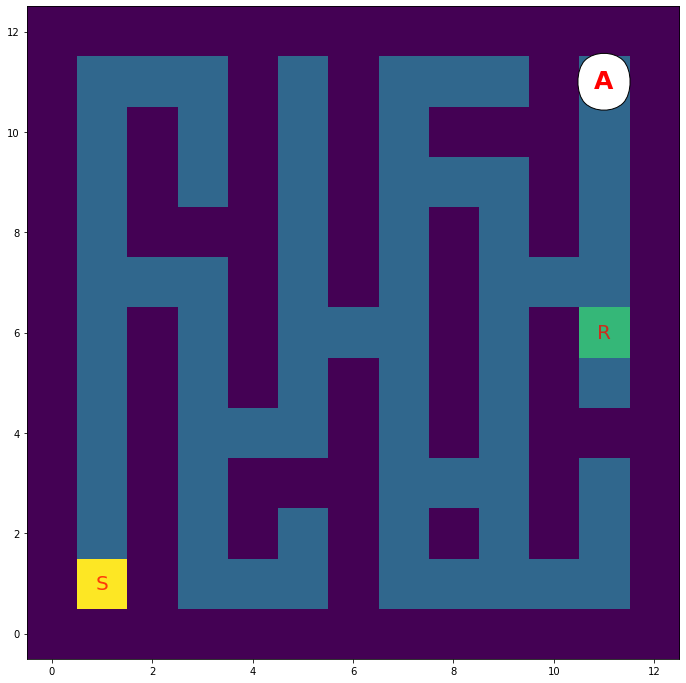

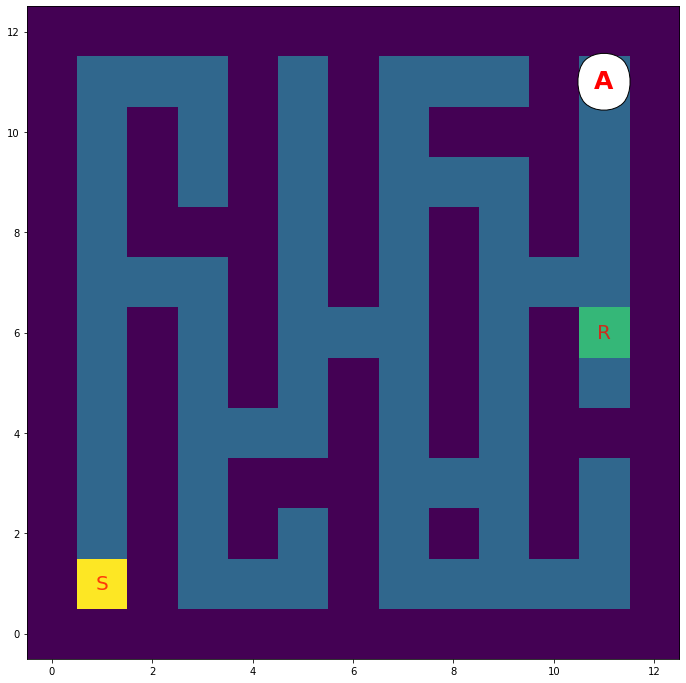

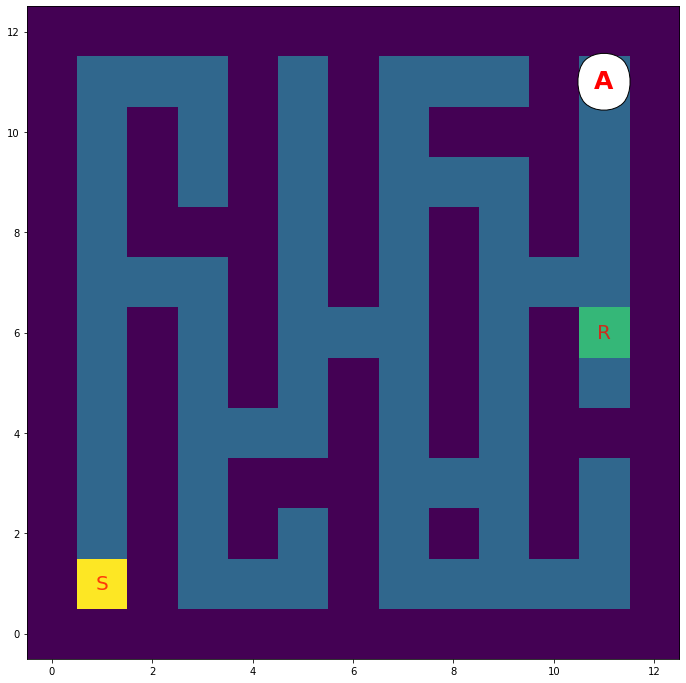

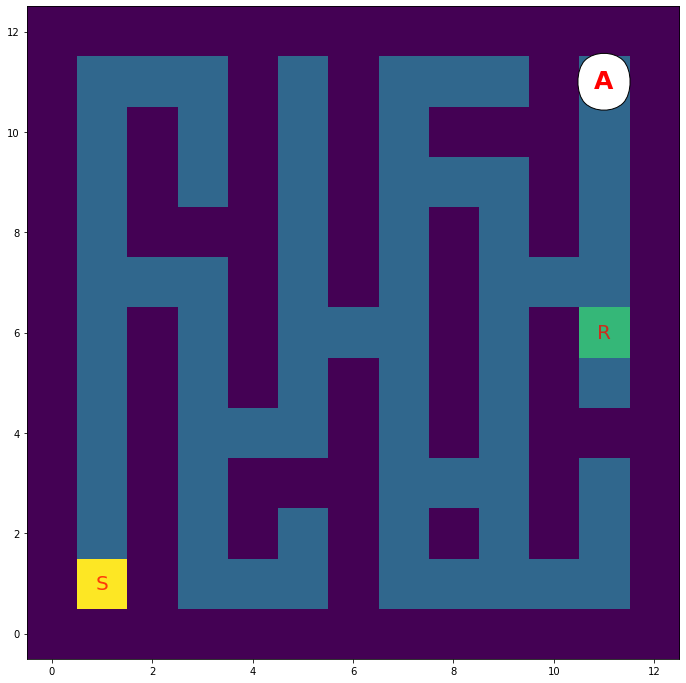

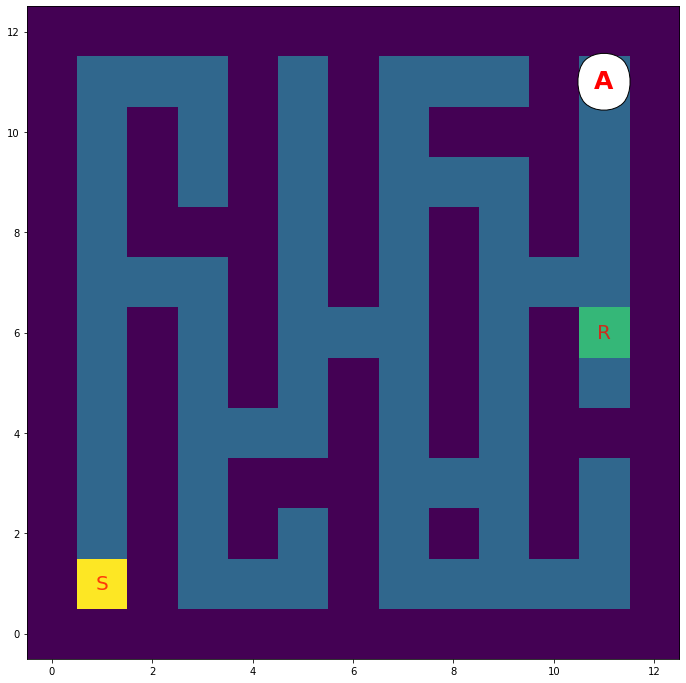

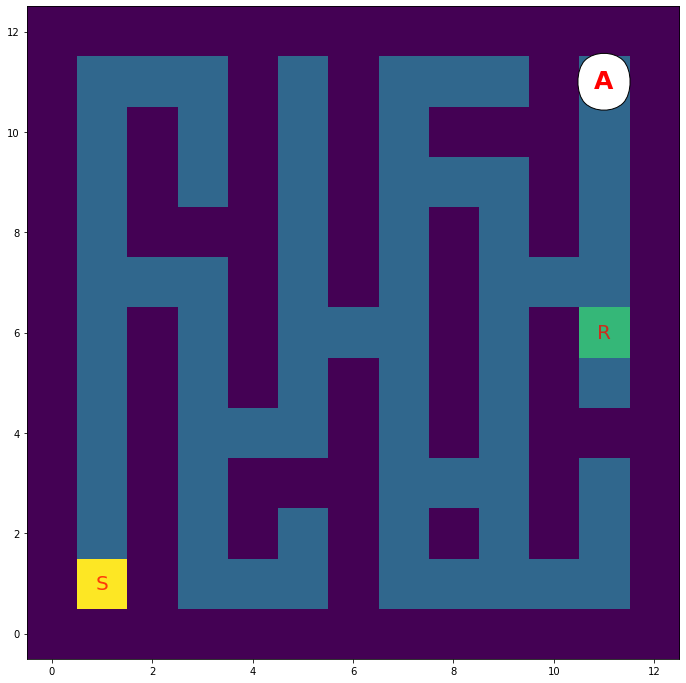

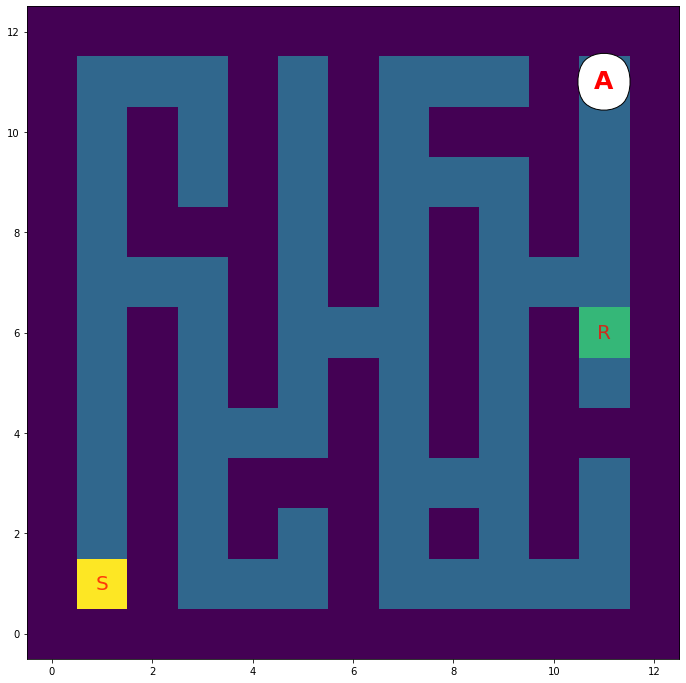

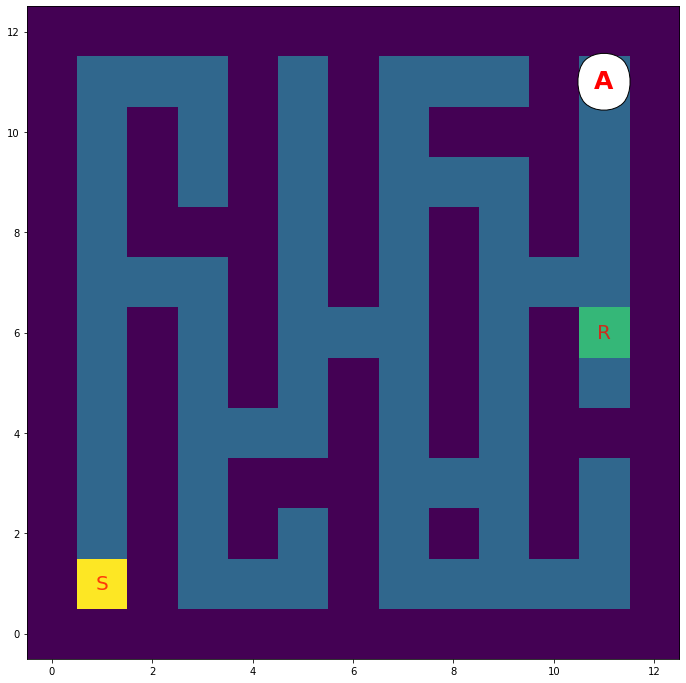

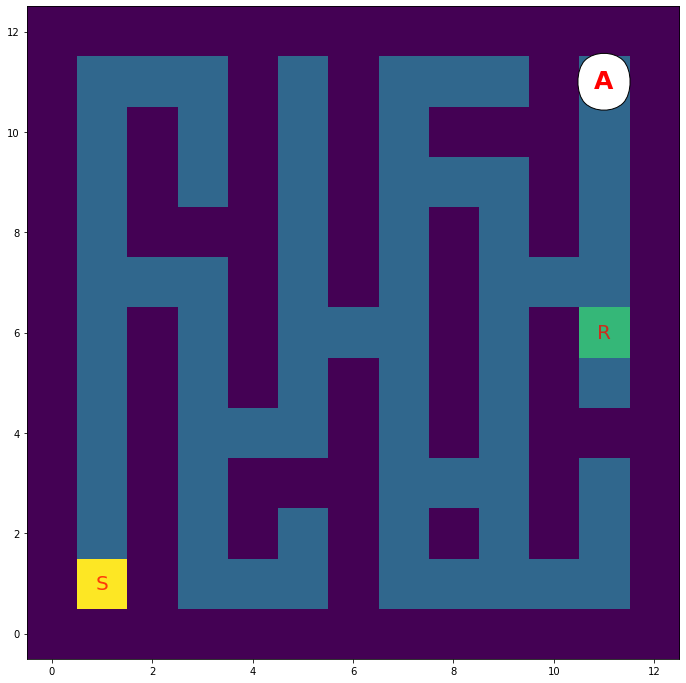

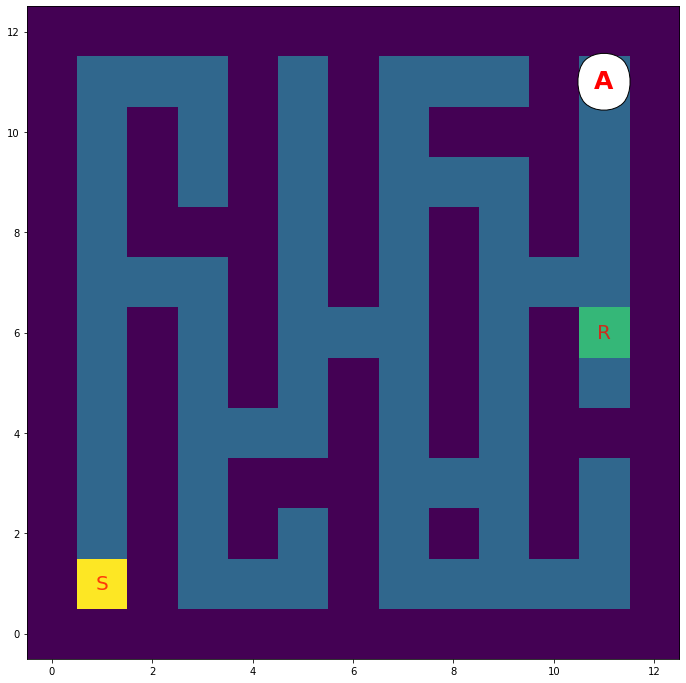

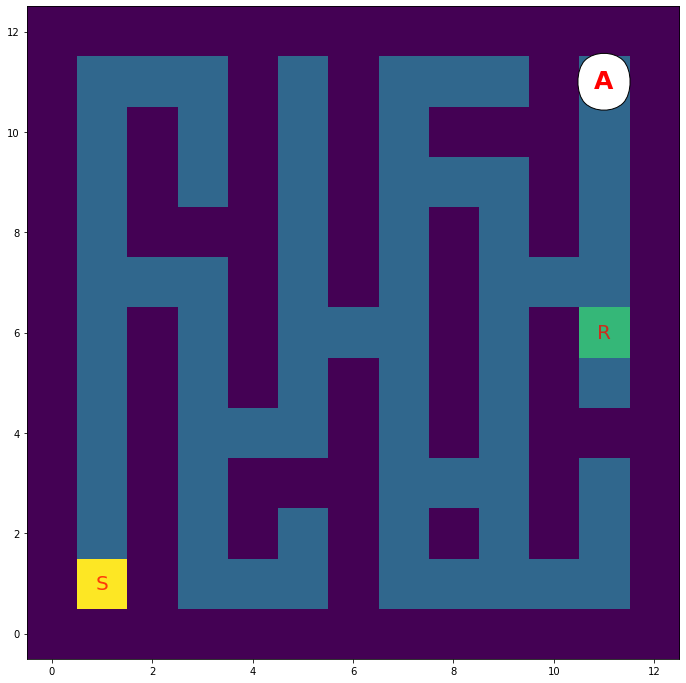

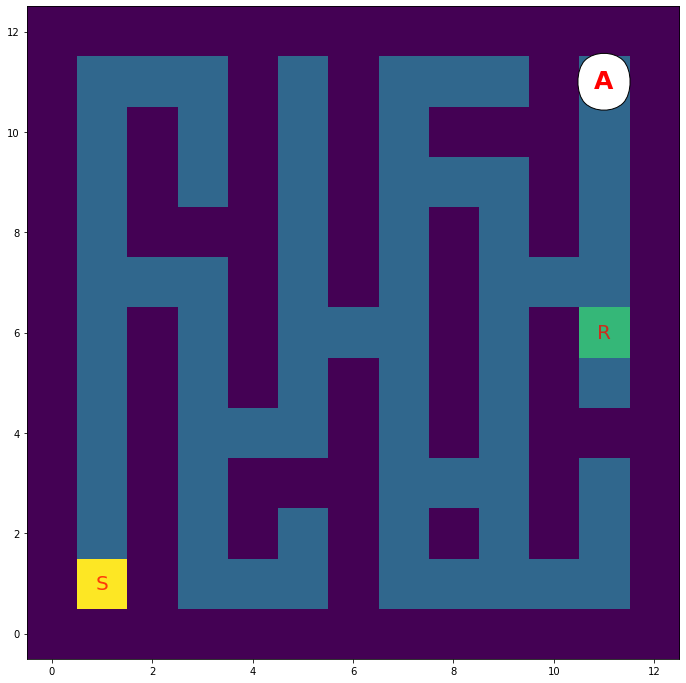

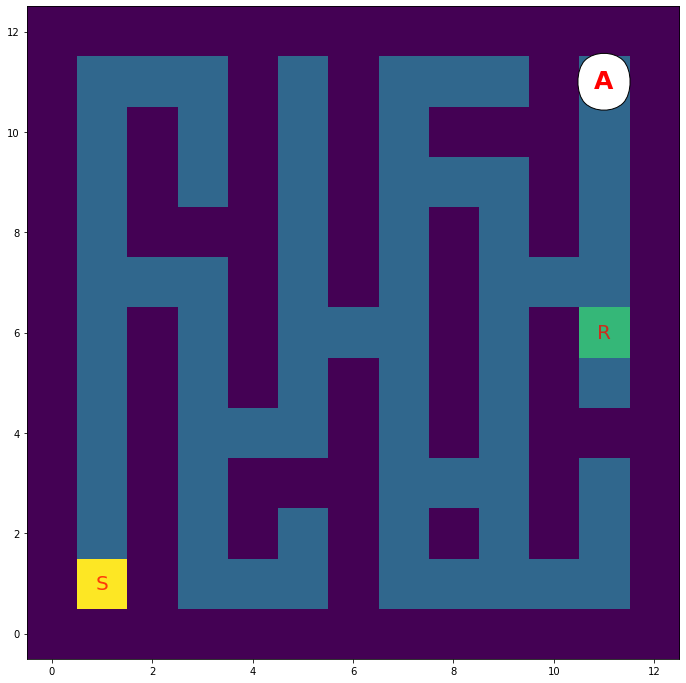

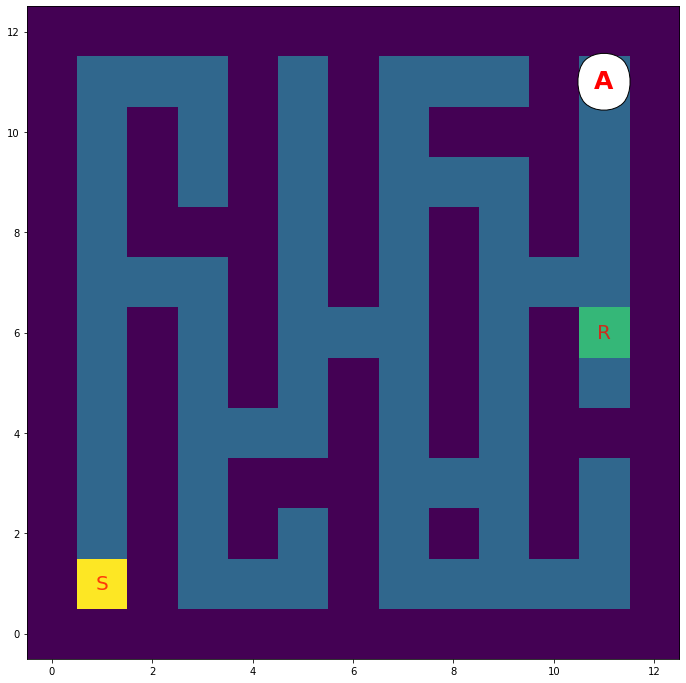

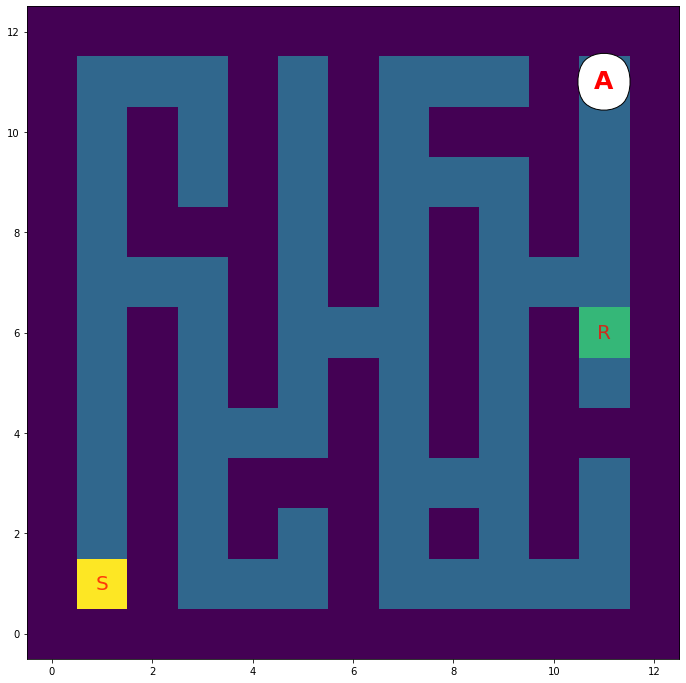

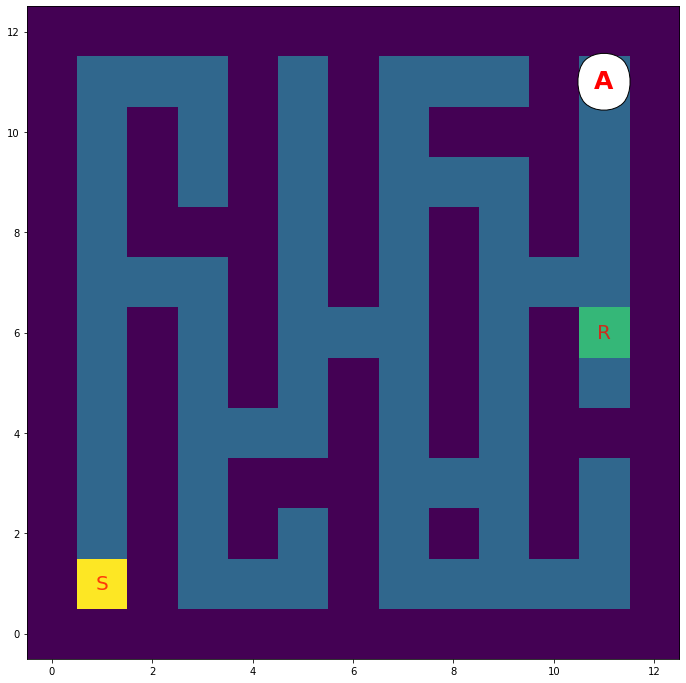

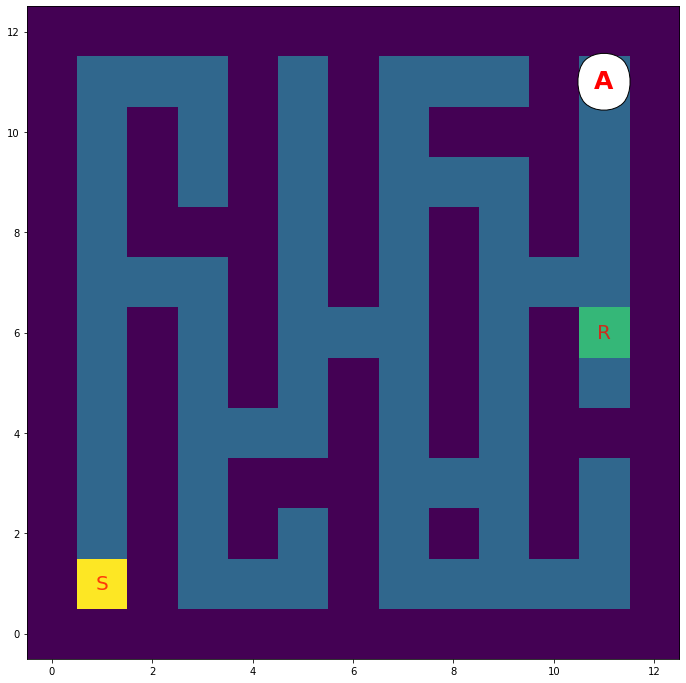

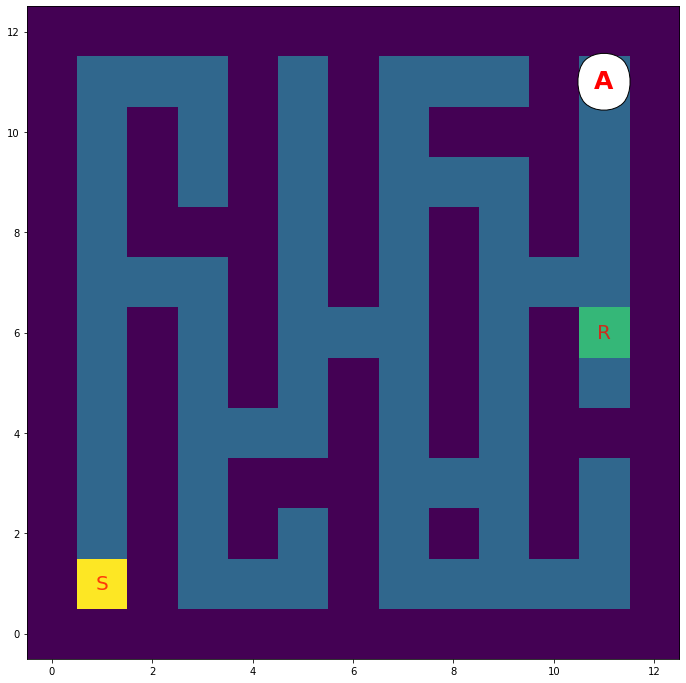

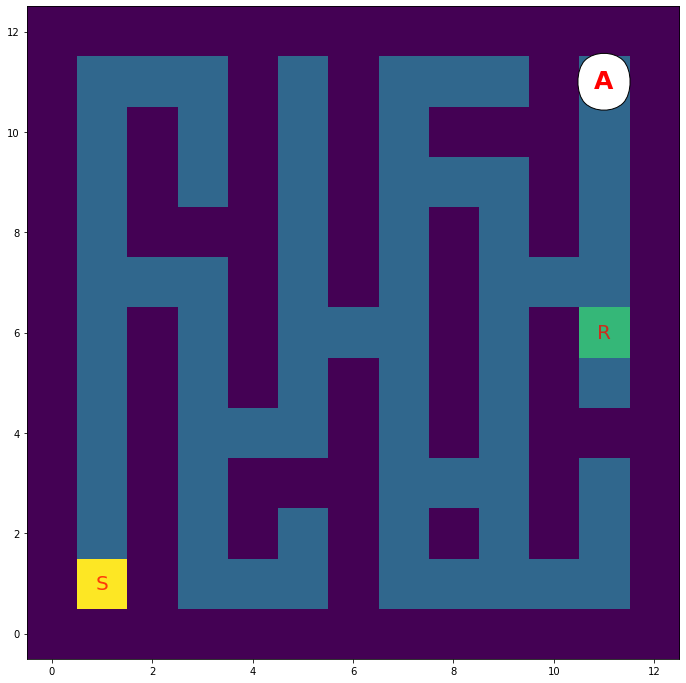

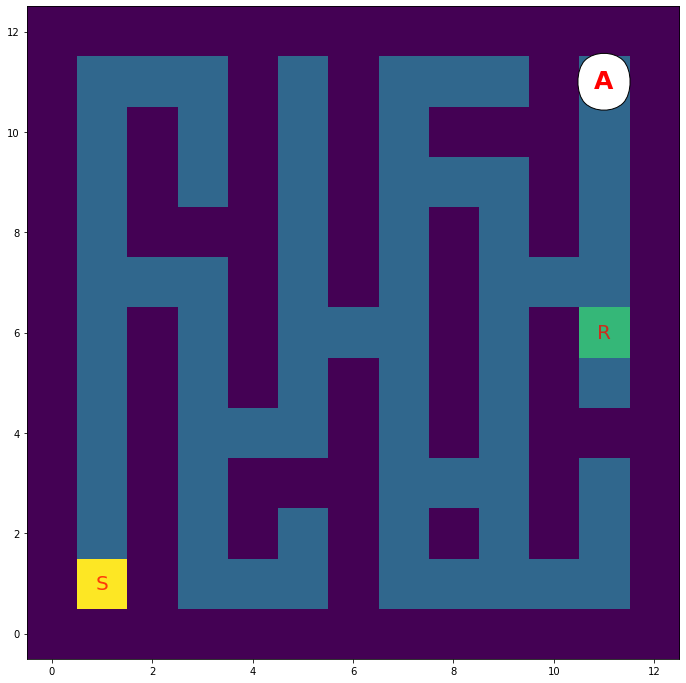

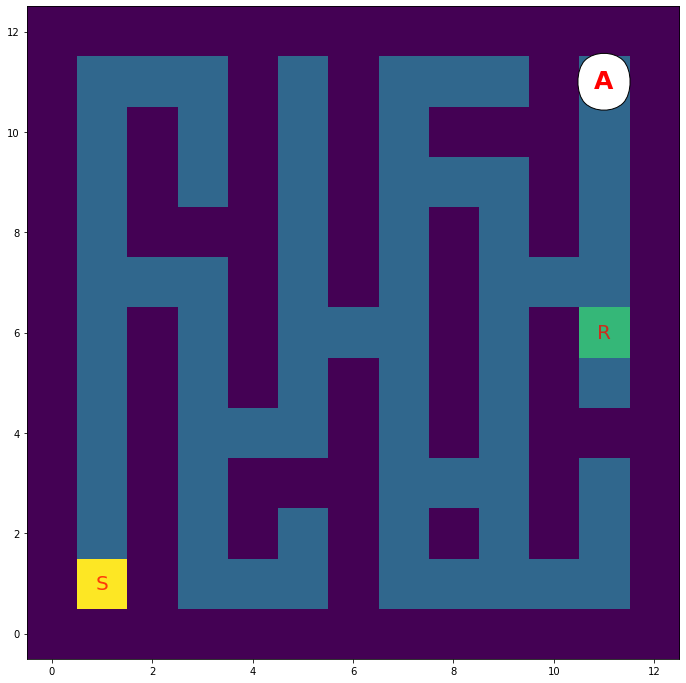

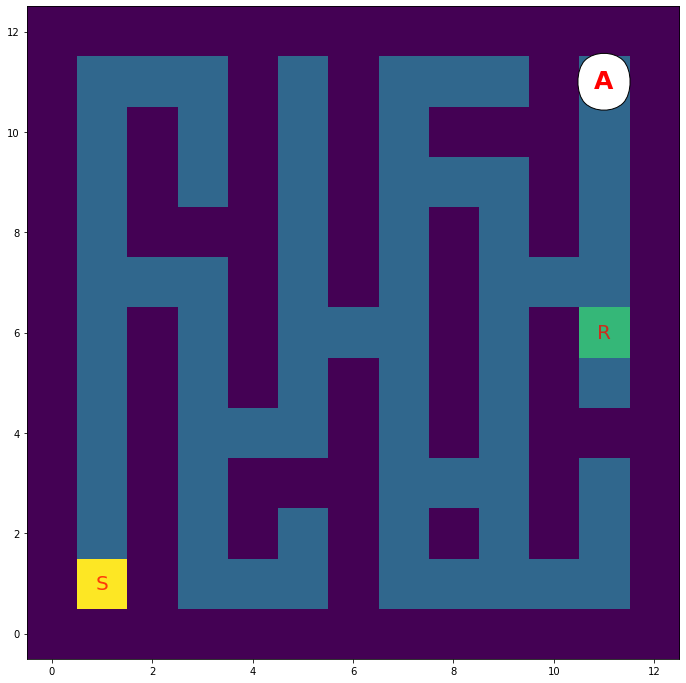

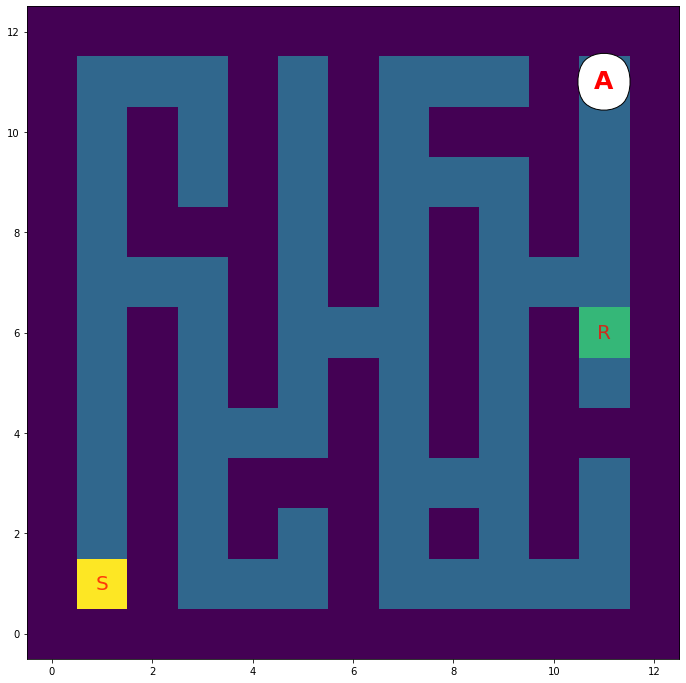

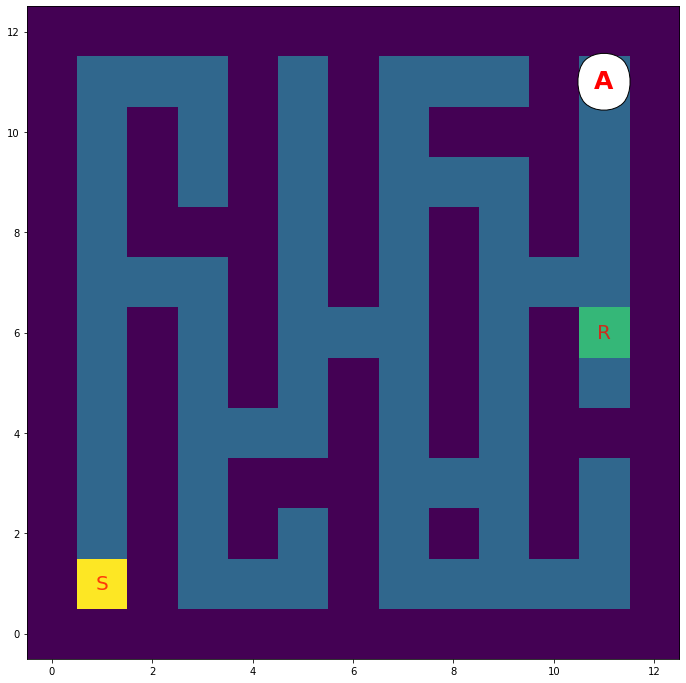

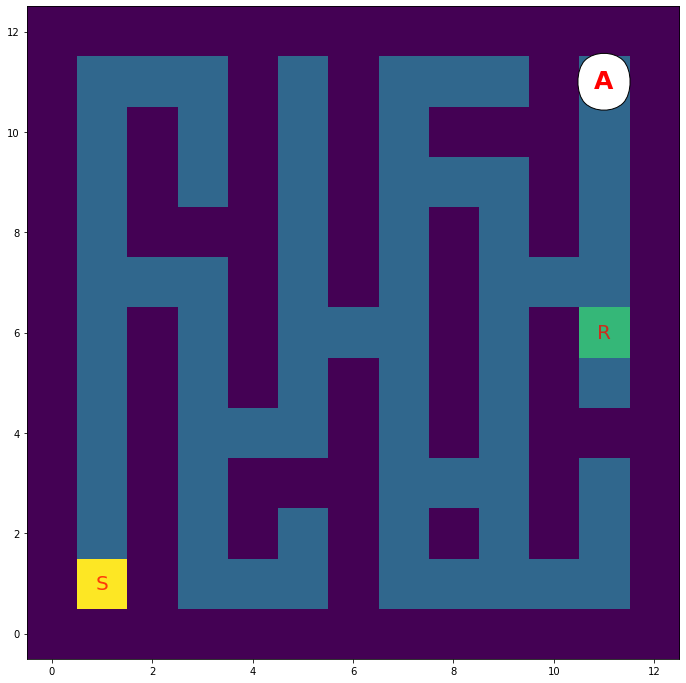

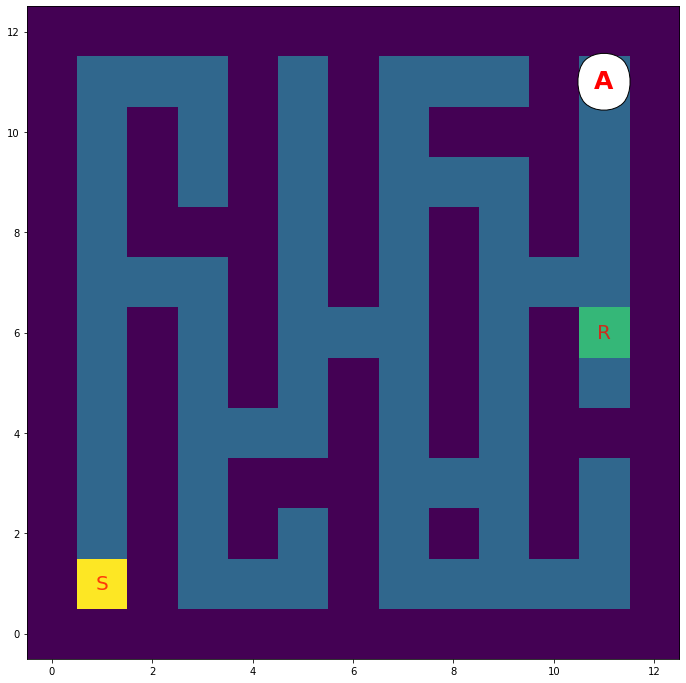

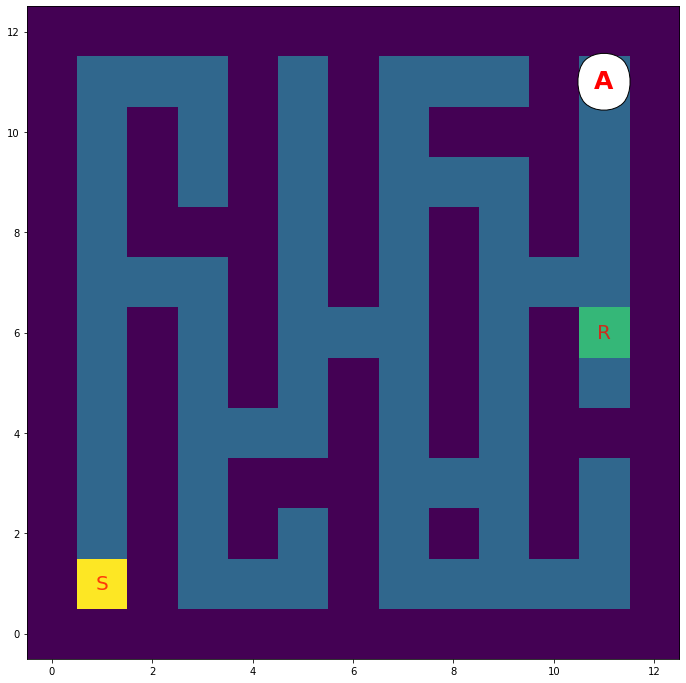

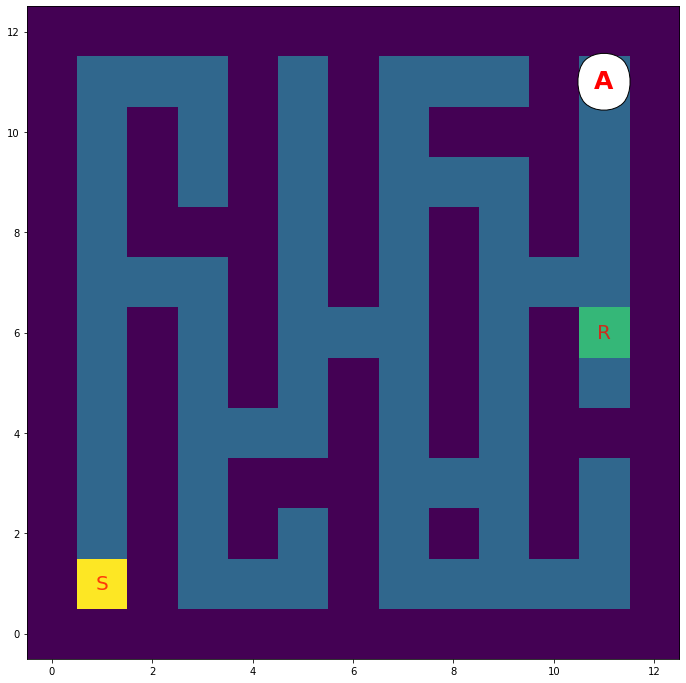

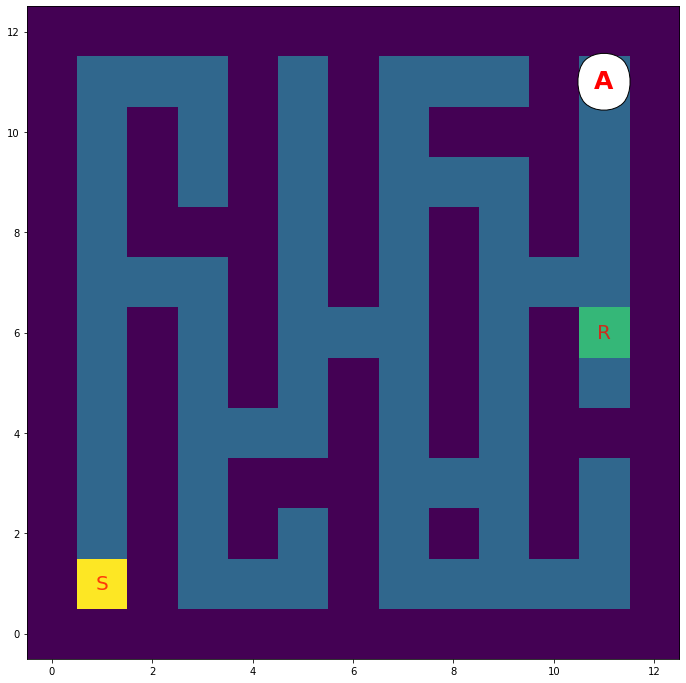

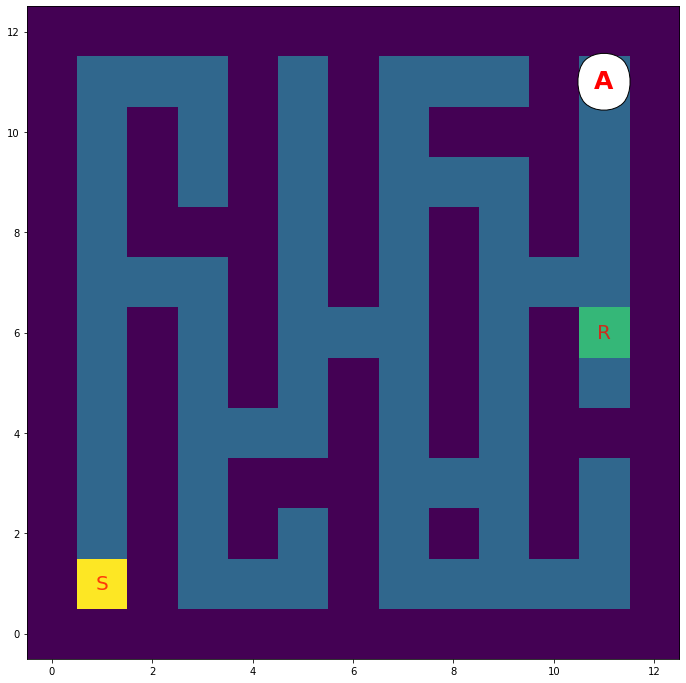

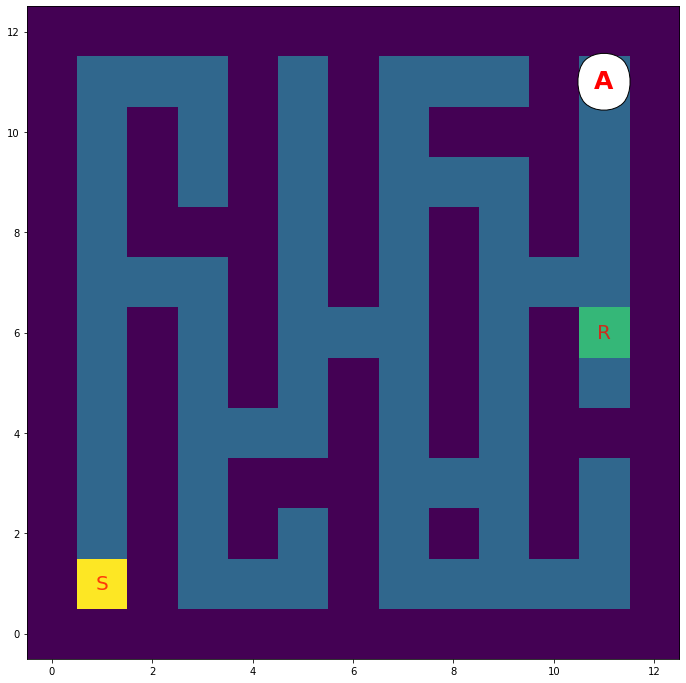

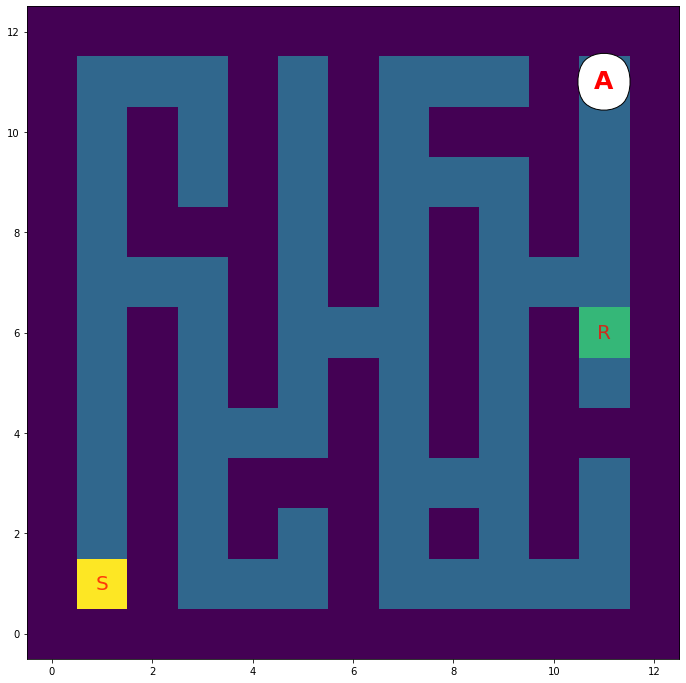

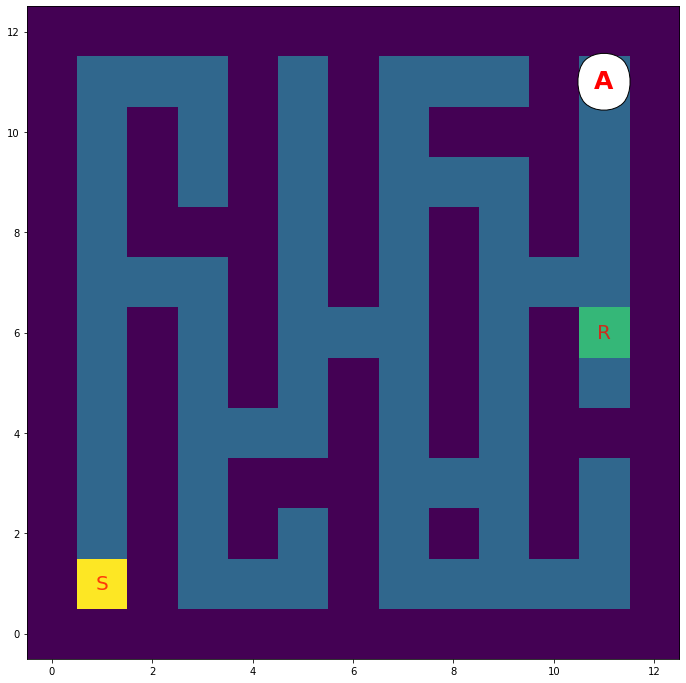

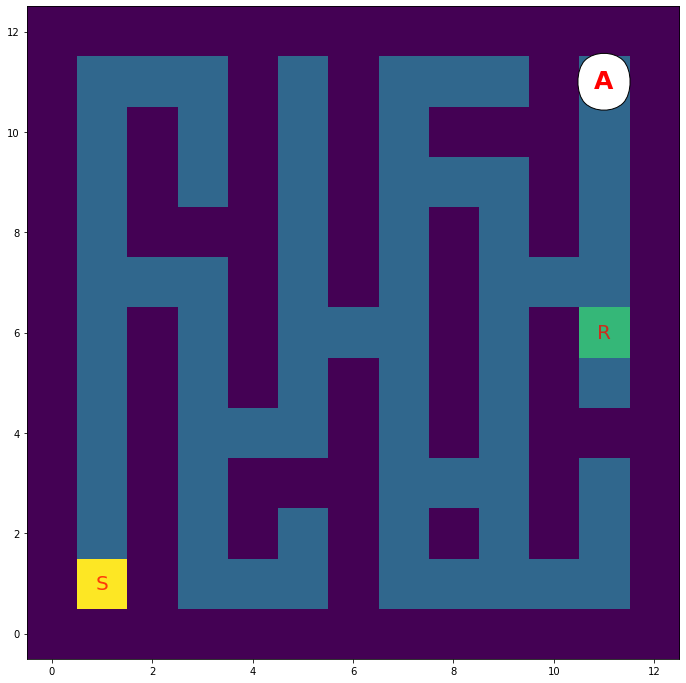

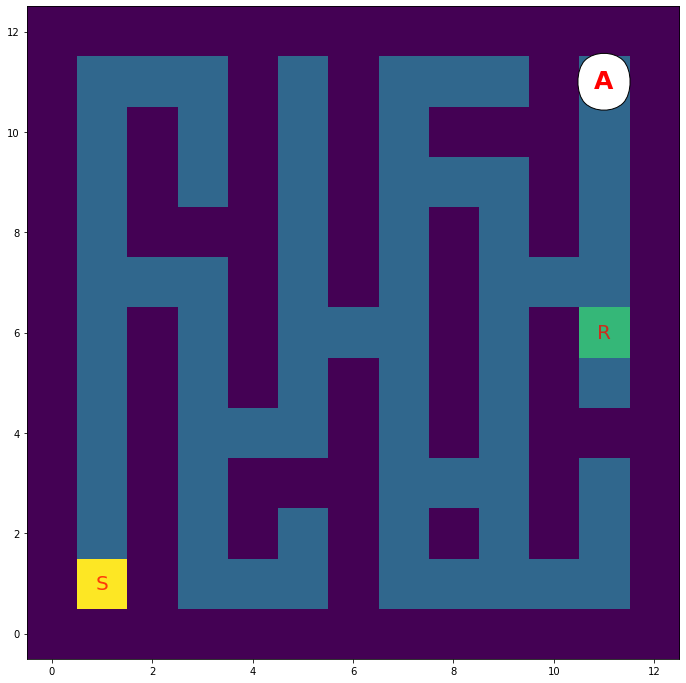

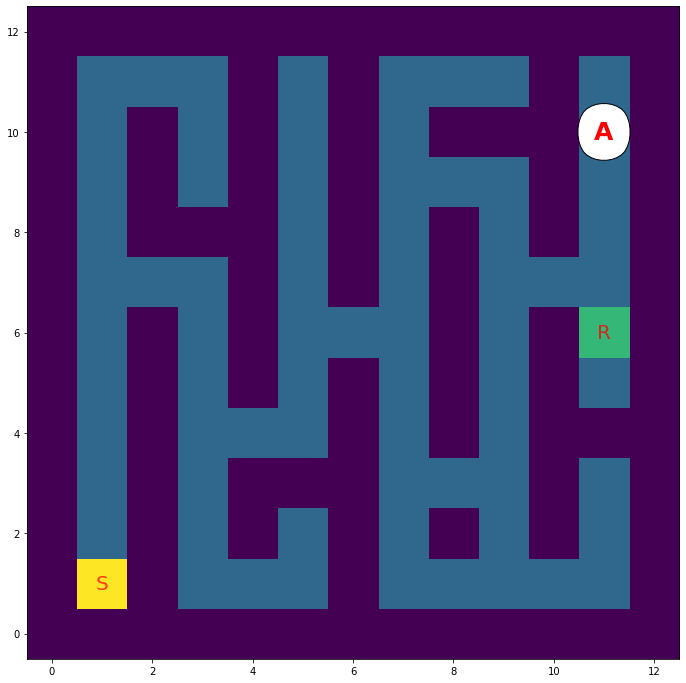

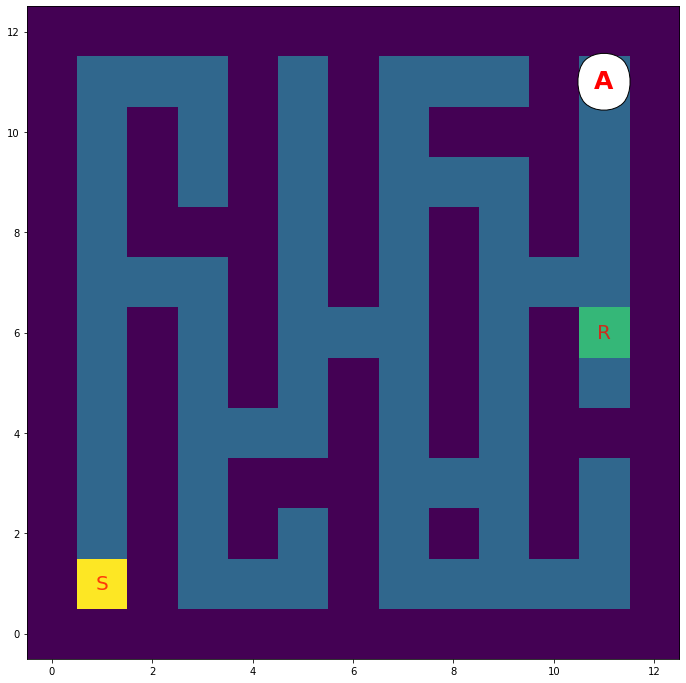

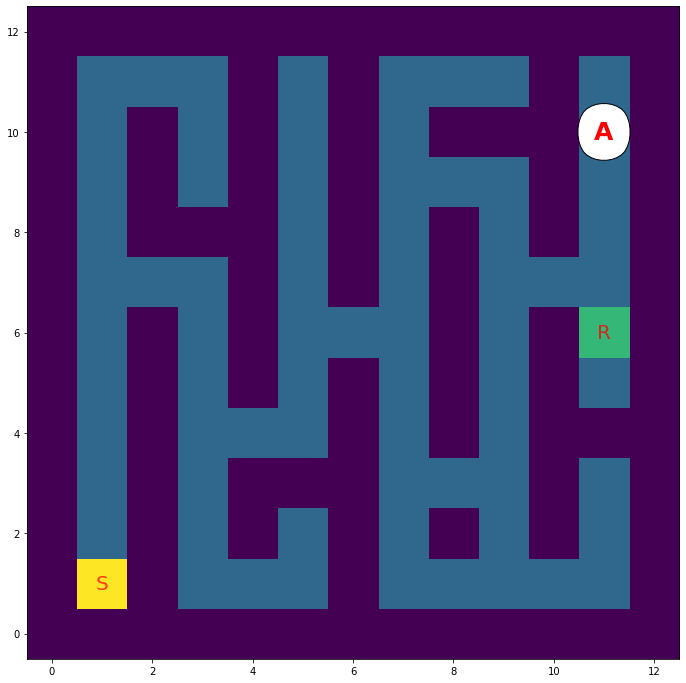

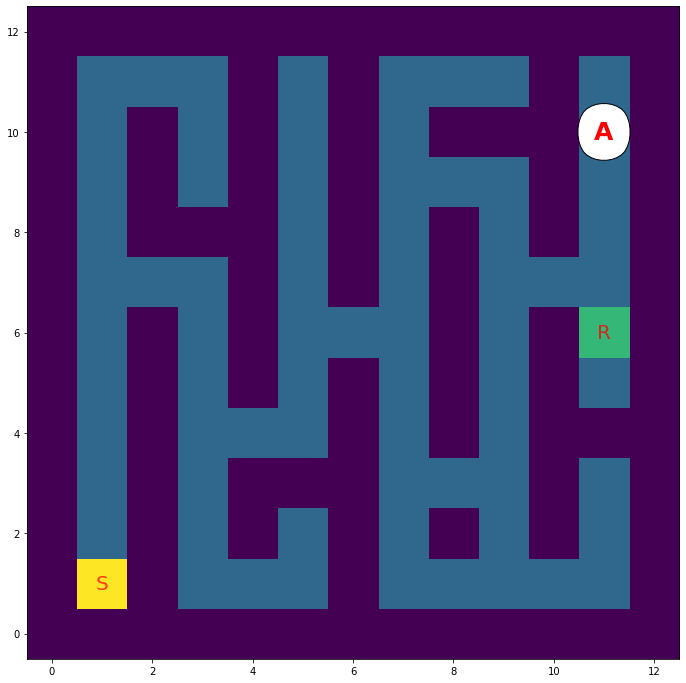

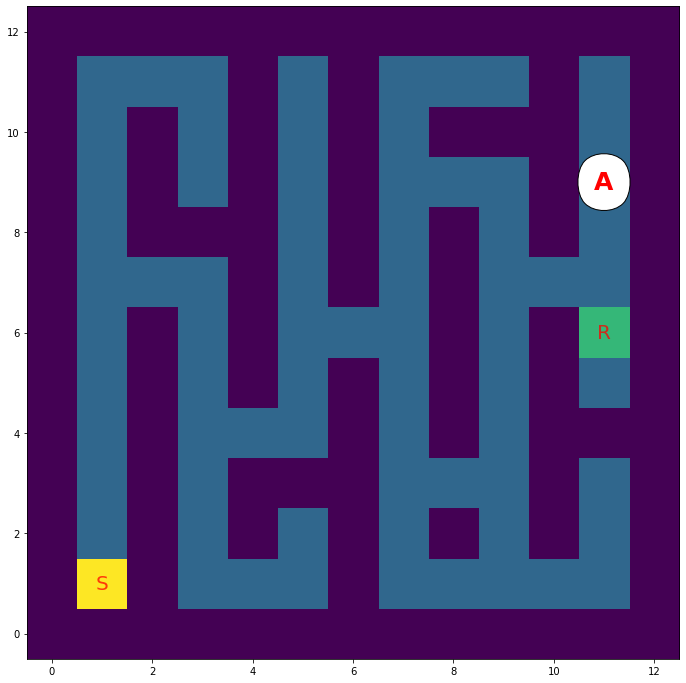

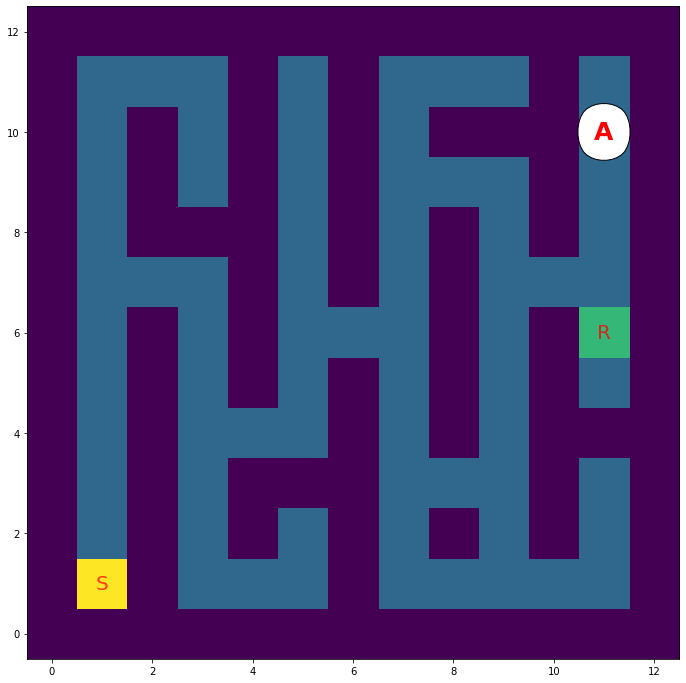

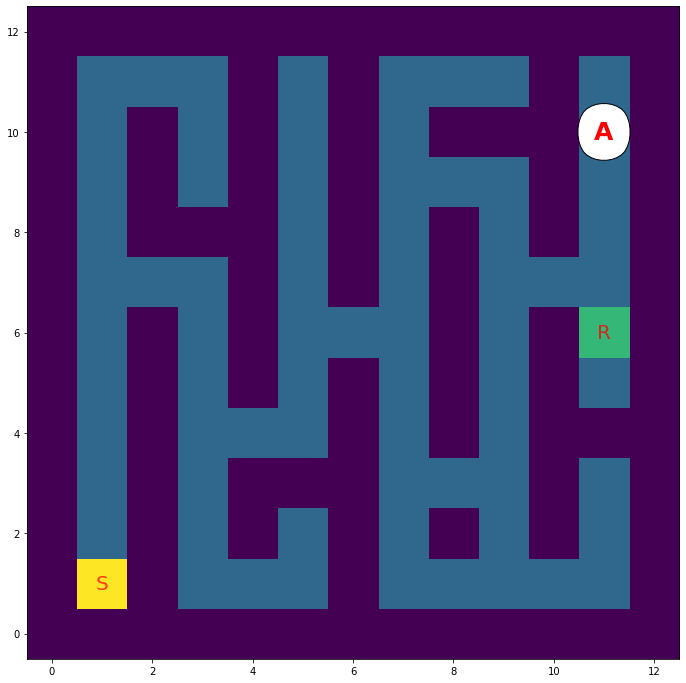

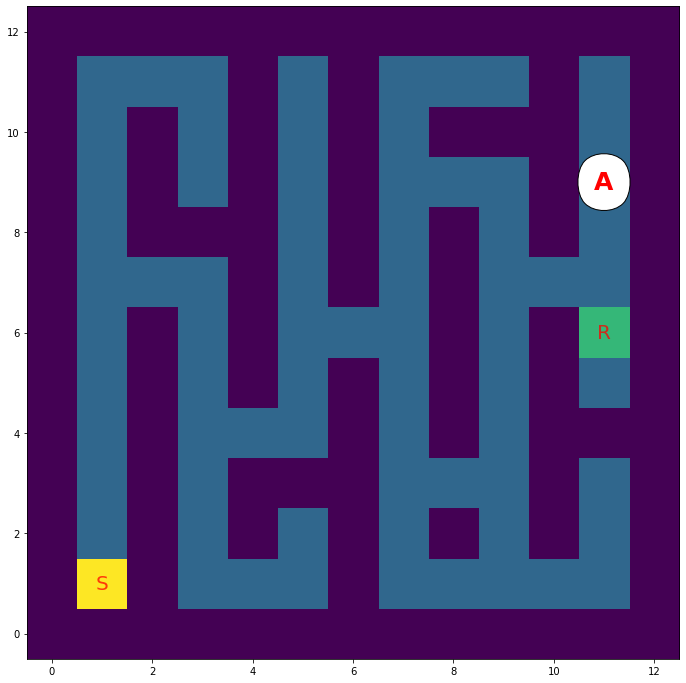

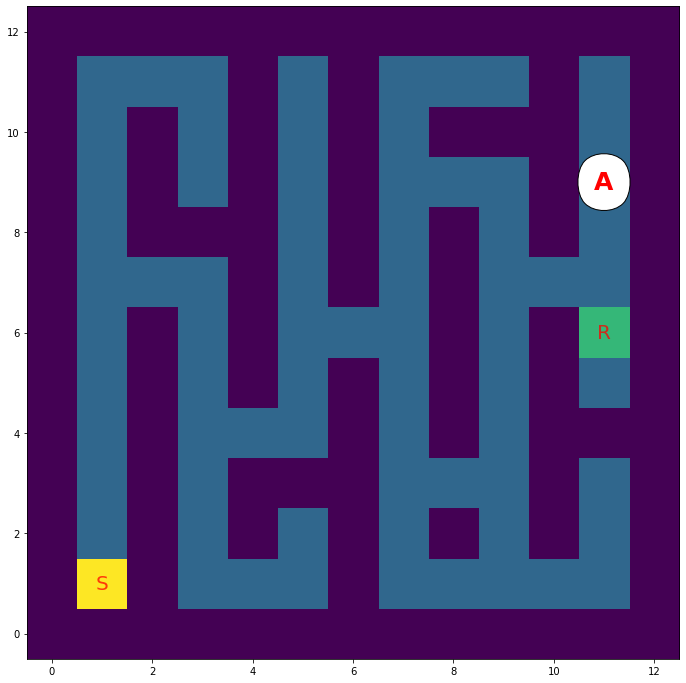

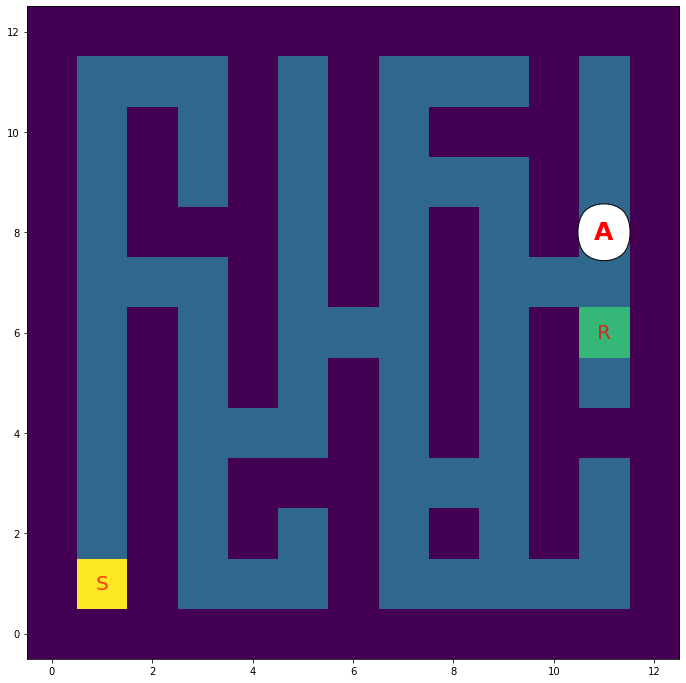

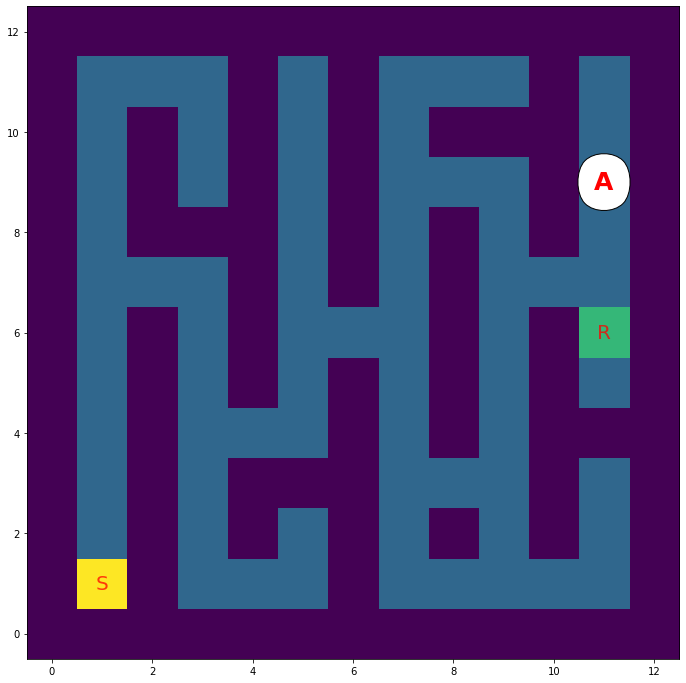

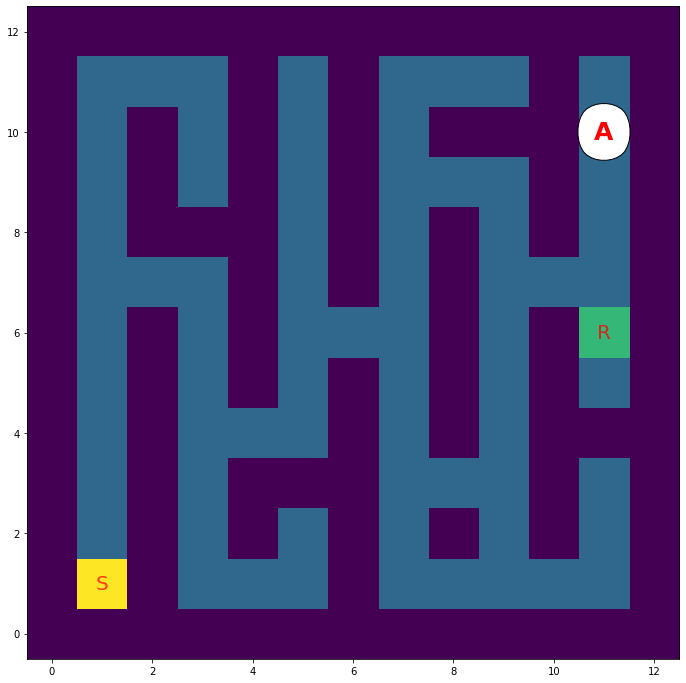

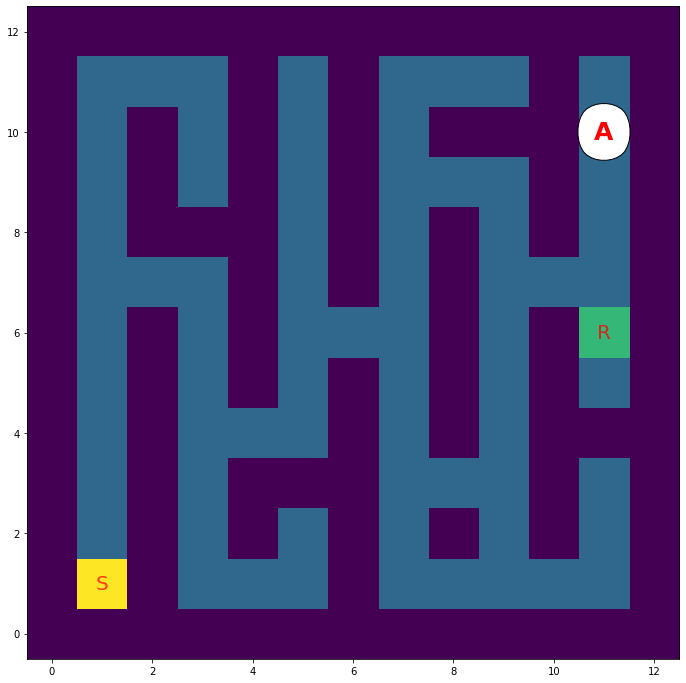

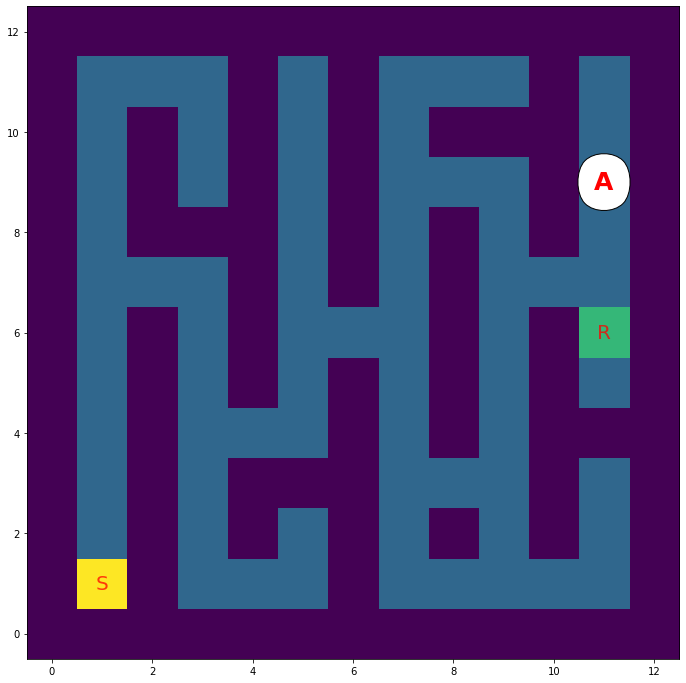

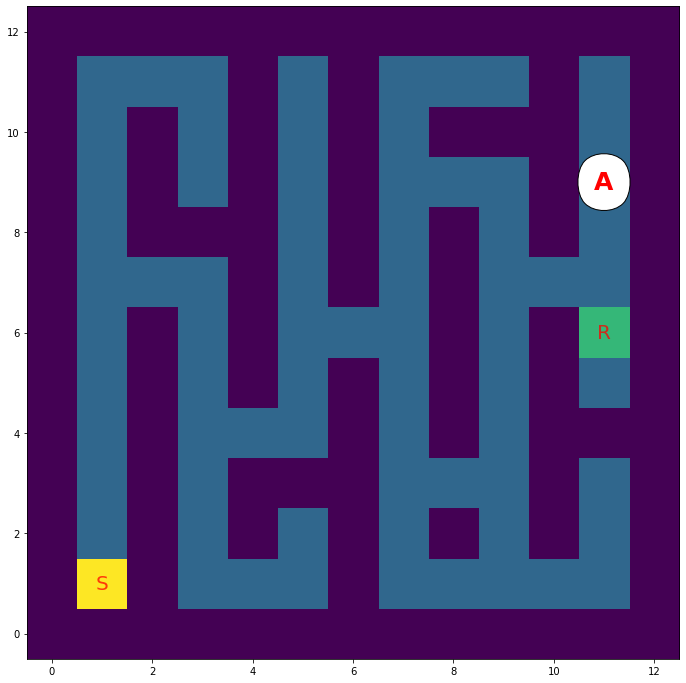

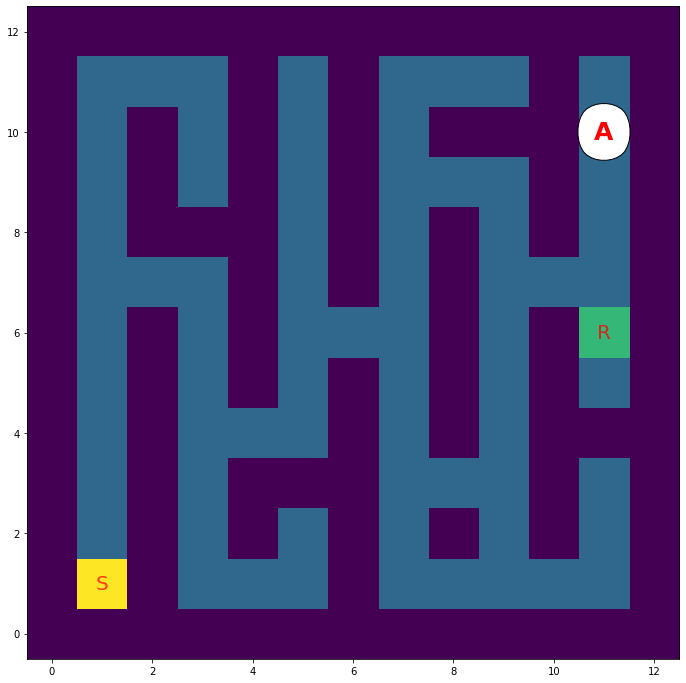

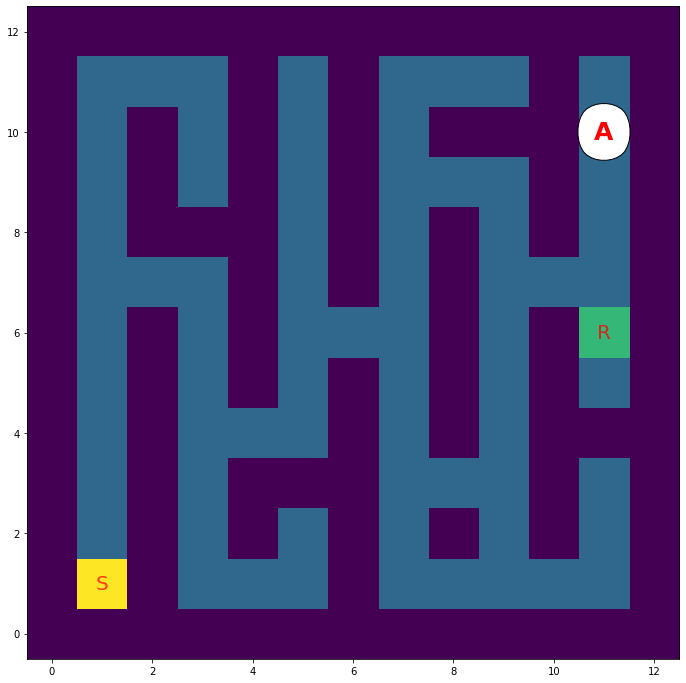

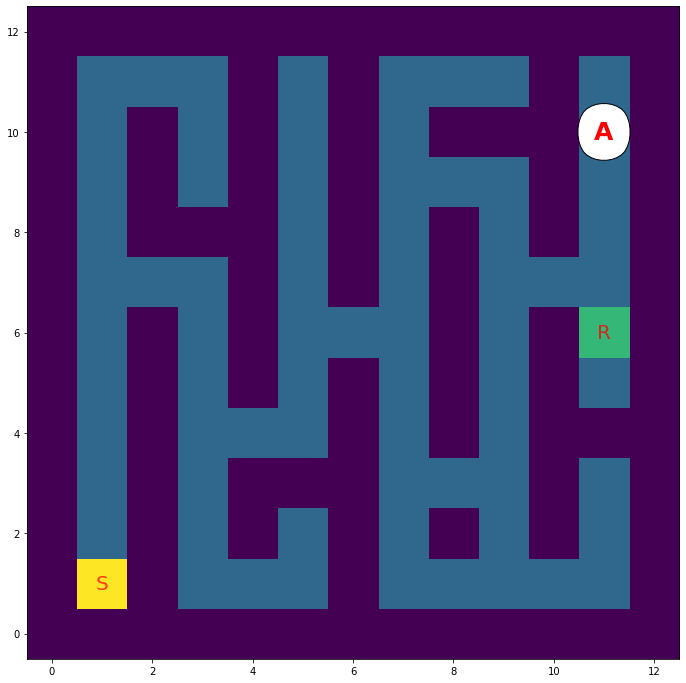

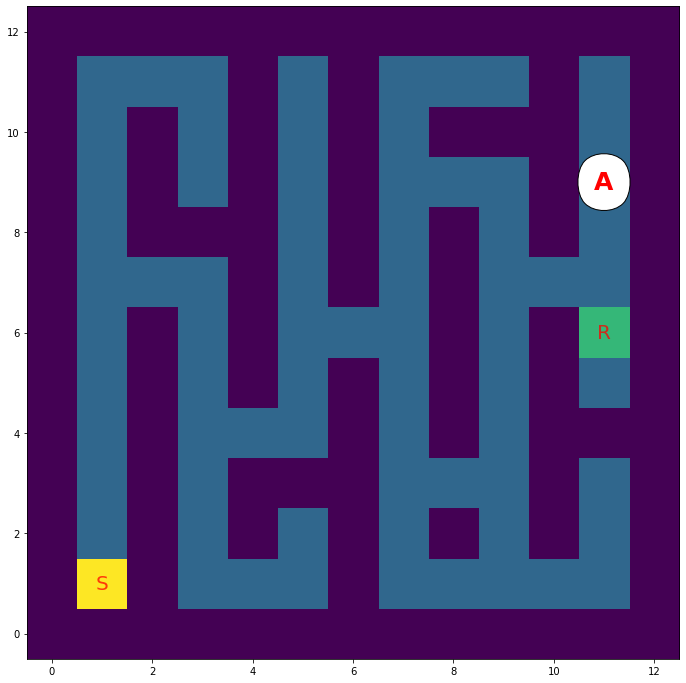

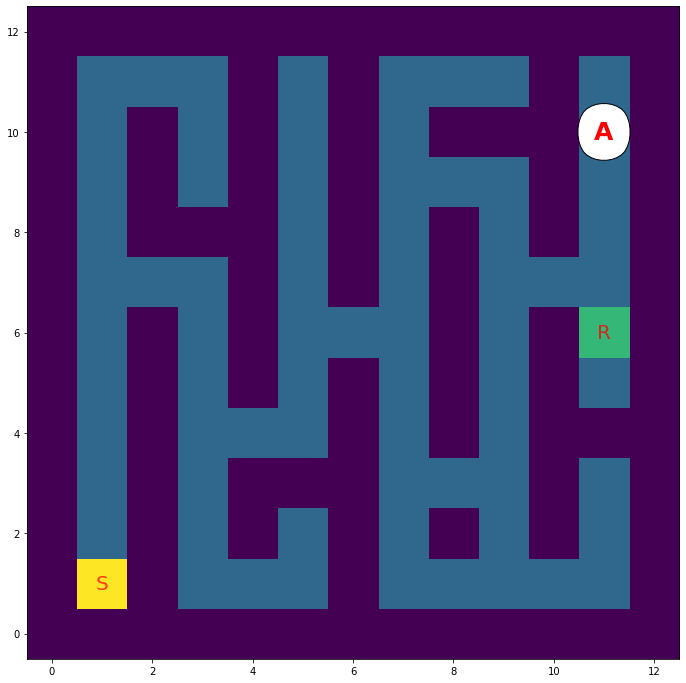

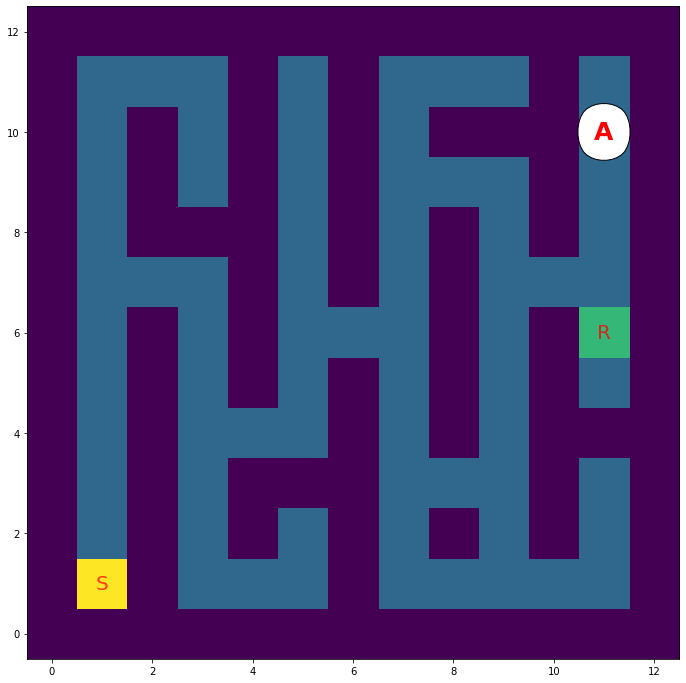

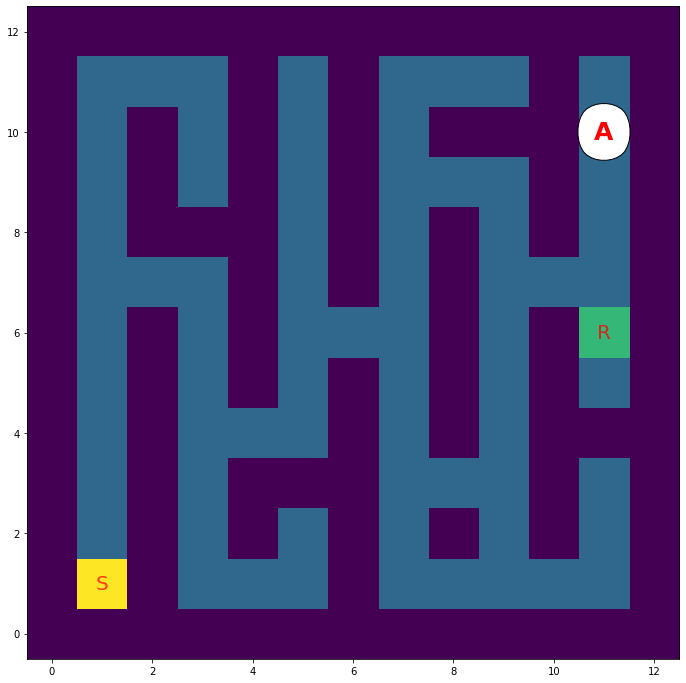

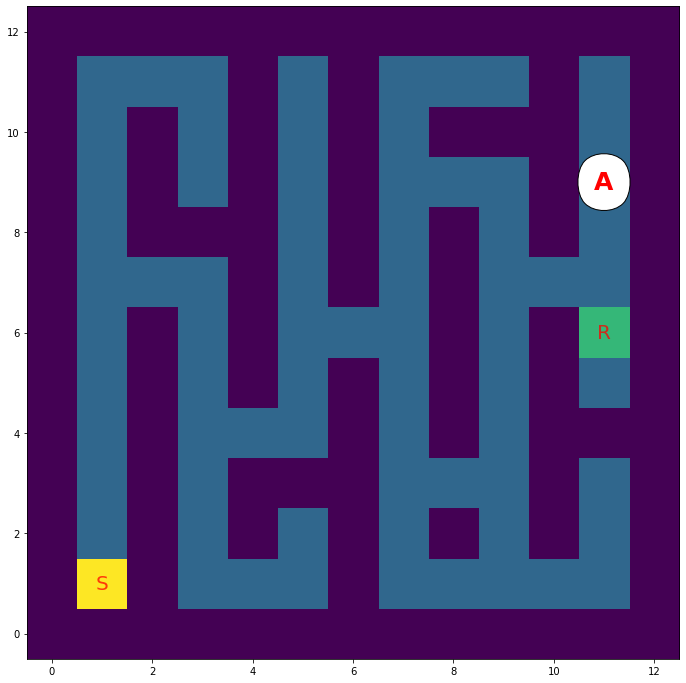

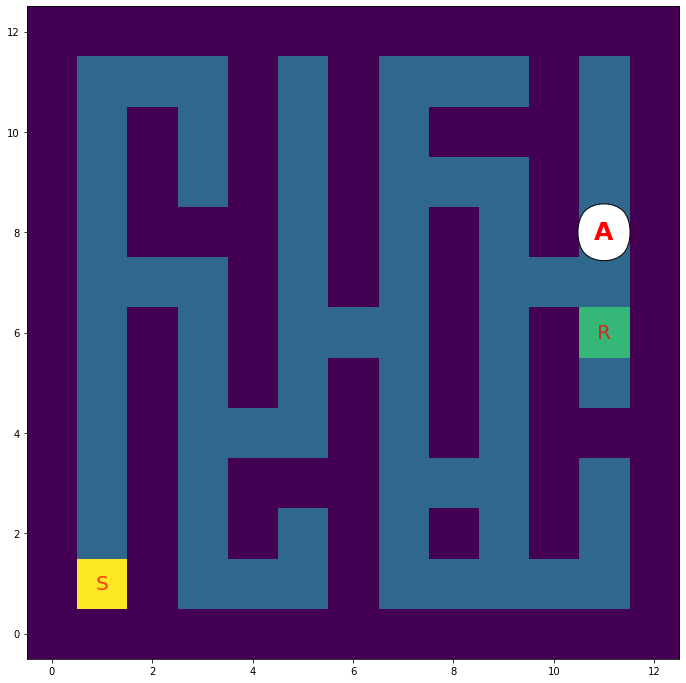

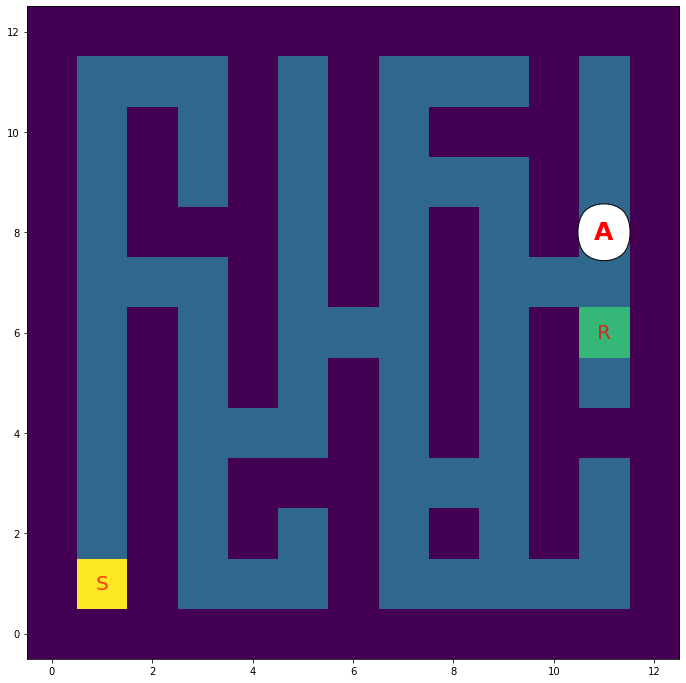

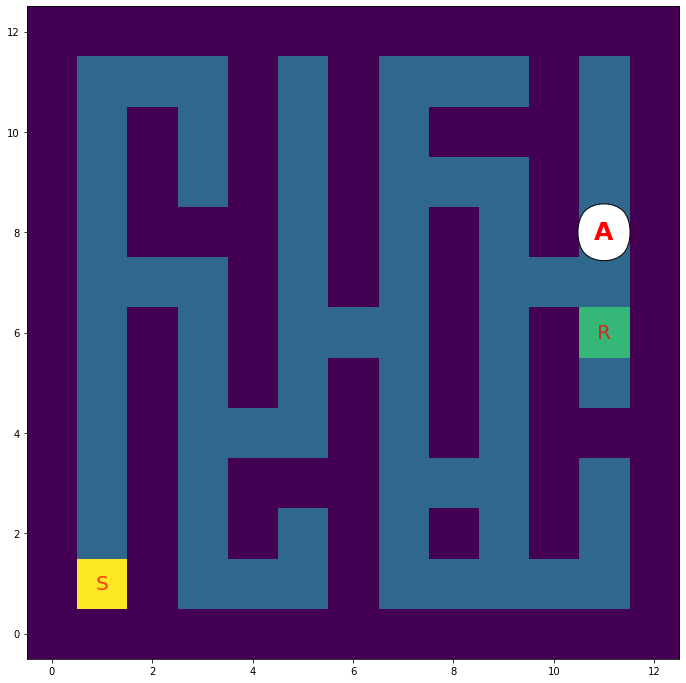

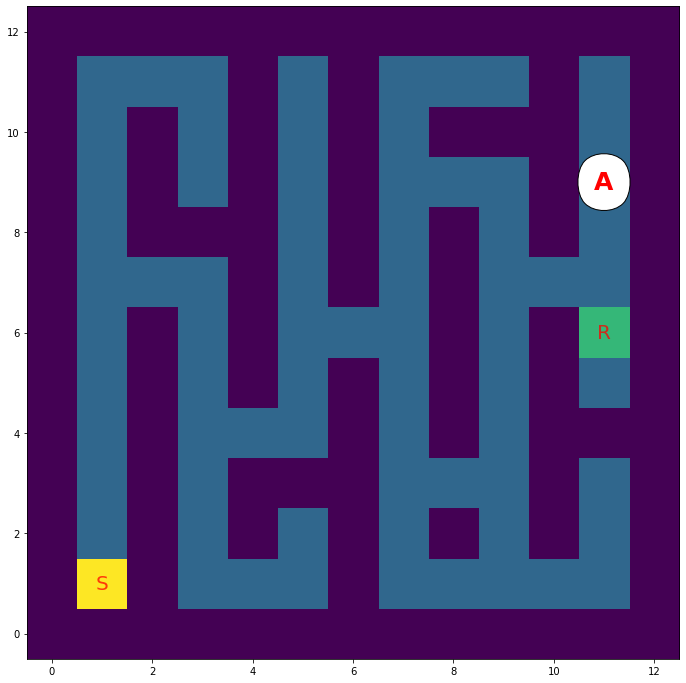

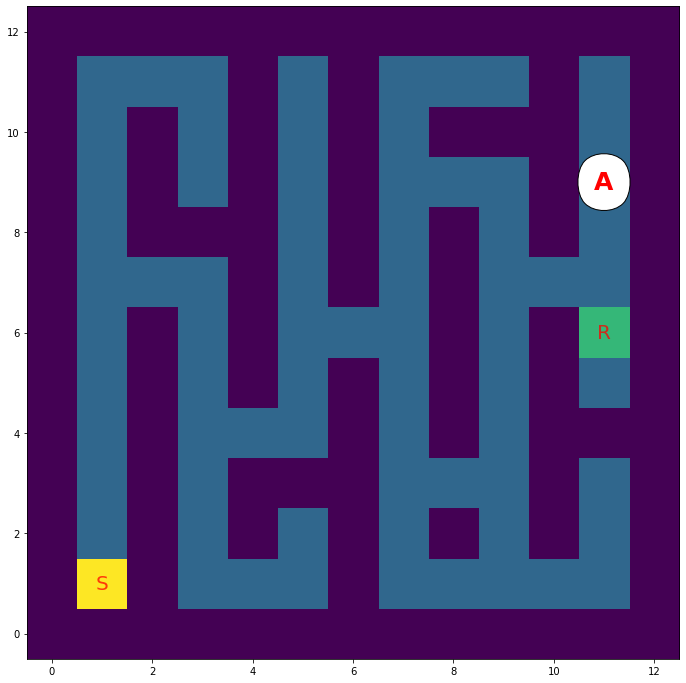

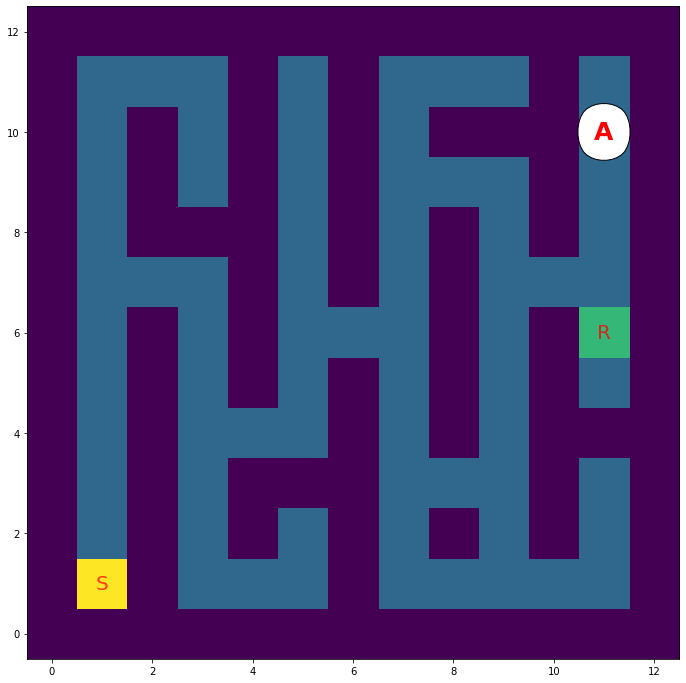

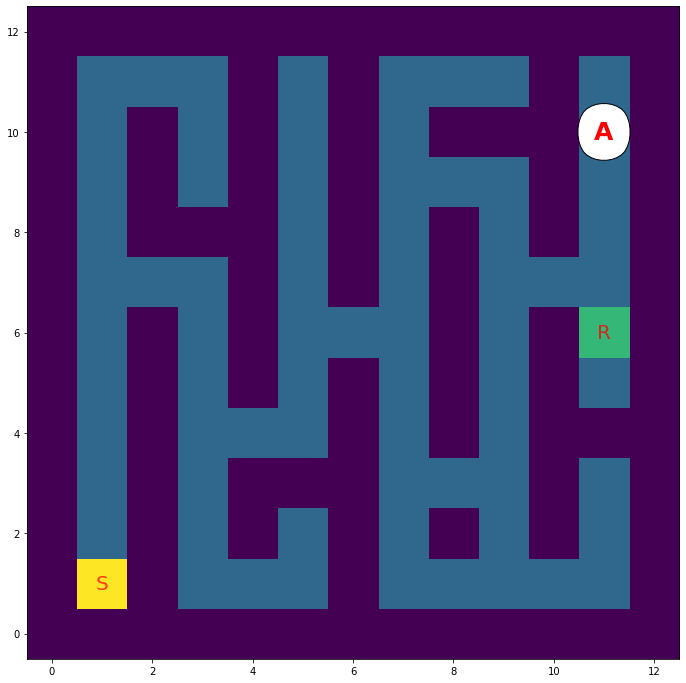

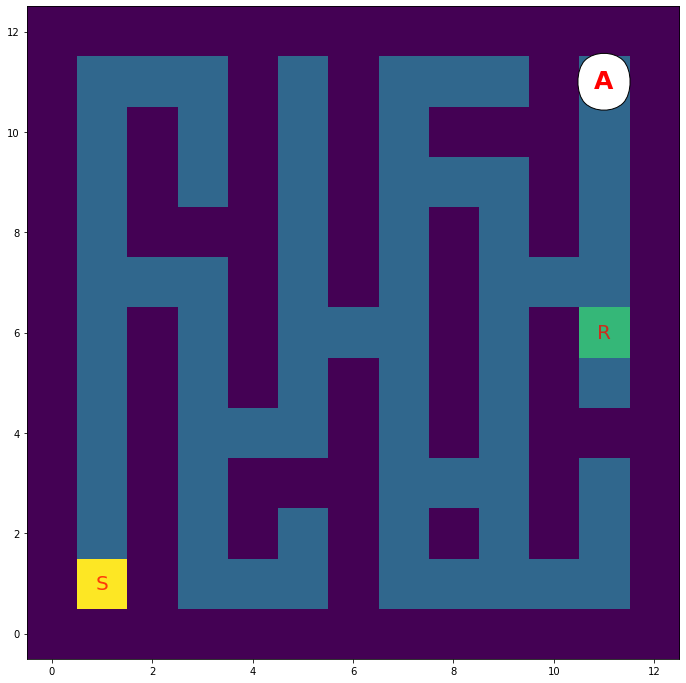

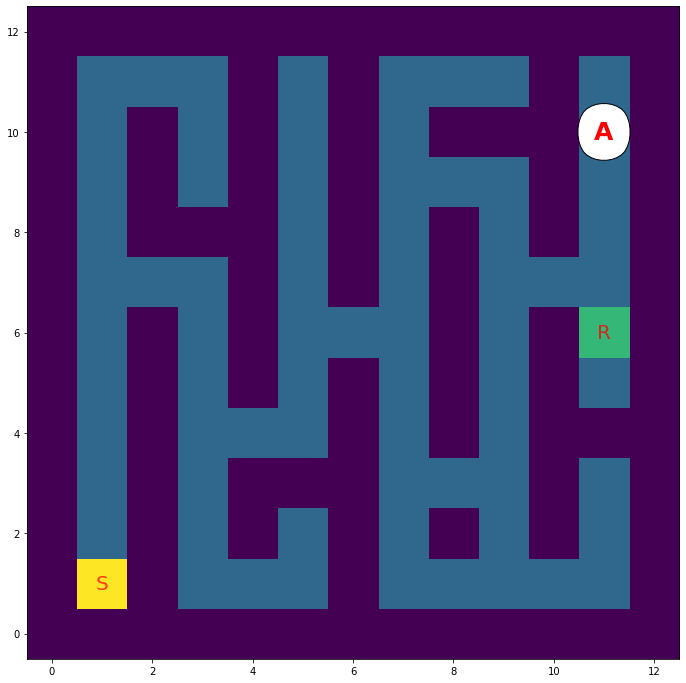

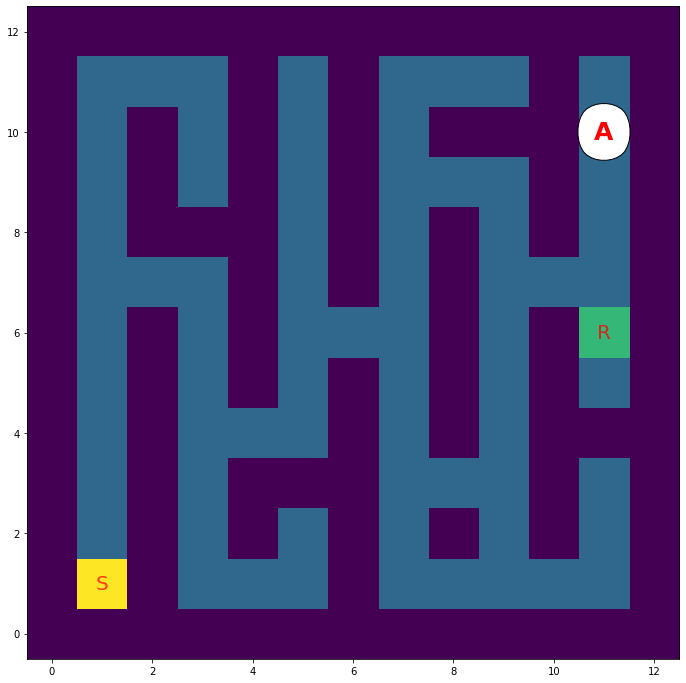

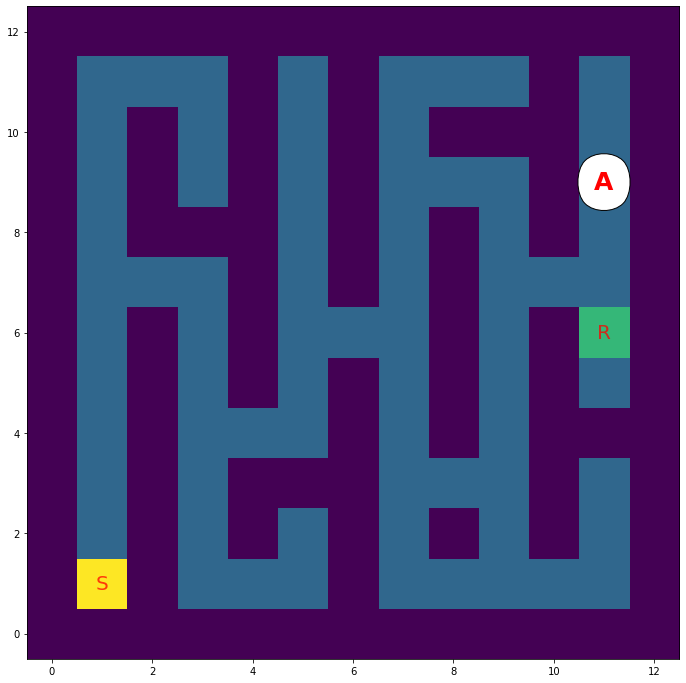

In [105]:
#Render the change in SR for one state over 100 episodes
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)
#agent_info['epsilon'] = 0.5
RL.rl_init(env_info, agent_info)

#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)

for _ in tqdm(range(10)):    
    RL.rl_episode()
    
#Task
record_agent("agent_punishing_state", one_state=92)

100%|██████████| 10/10 [00:00<00:00, 453.52it/s]
/Users/julianbons/Documents/Uni/Master/2. Semester/Research Project 1/Code/Source_Code/utils.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 12))


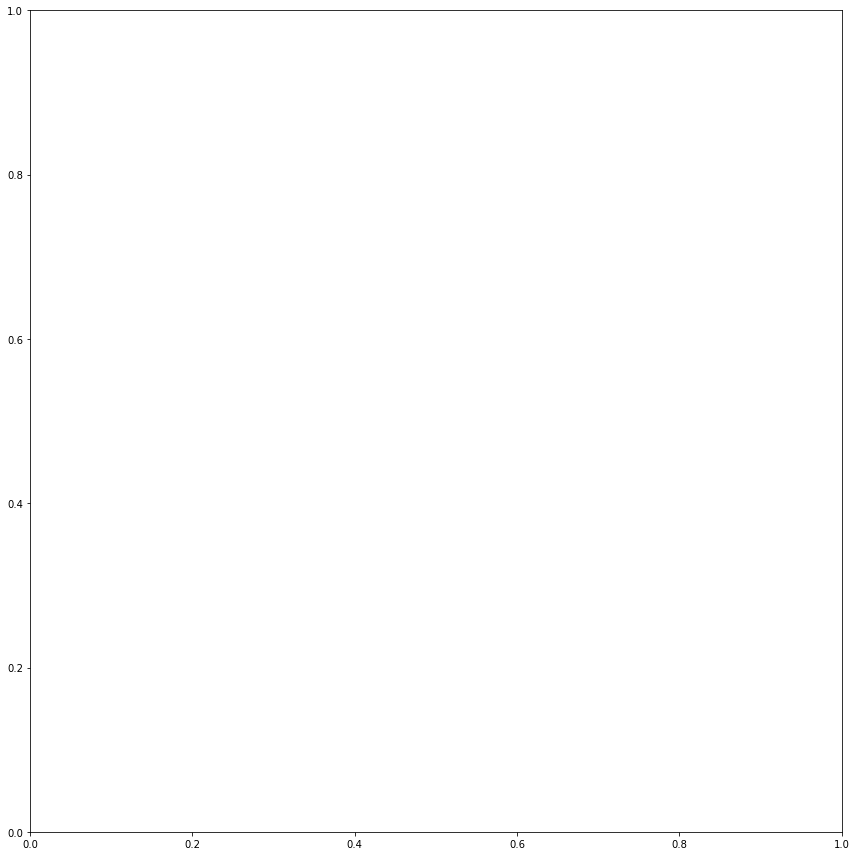

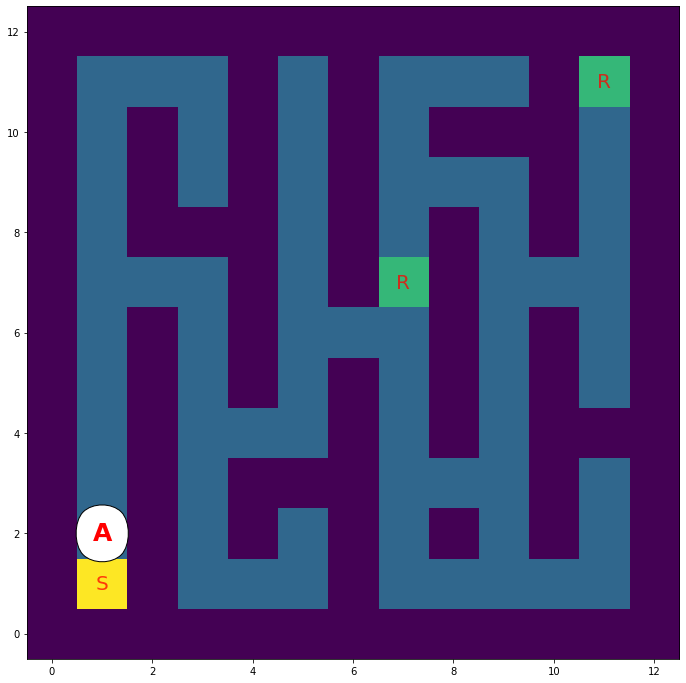

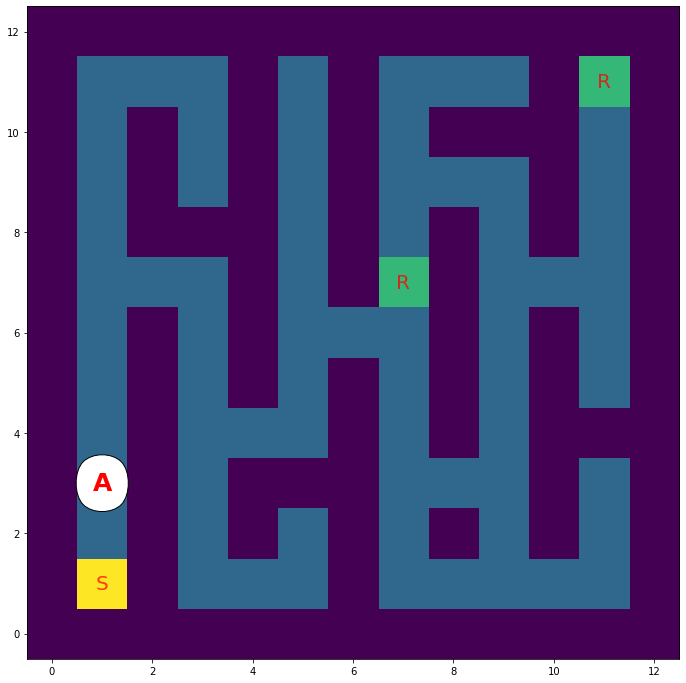

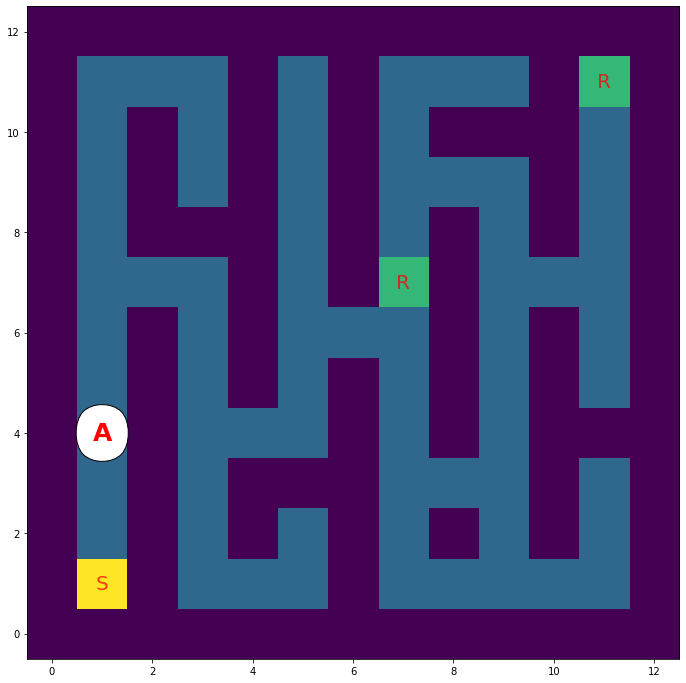

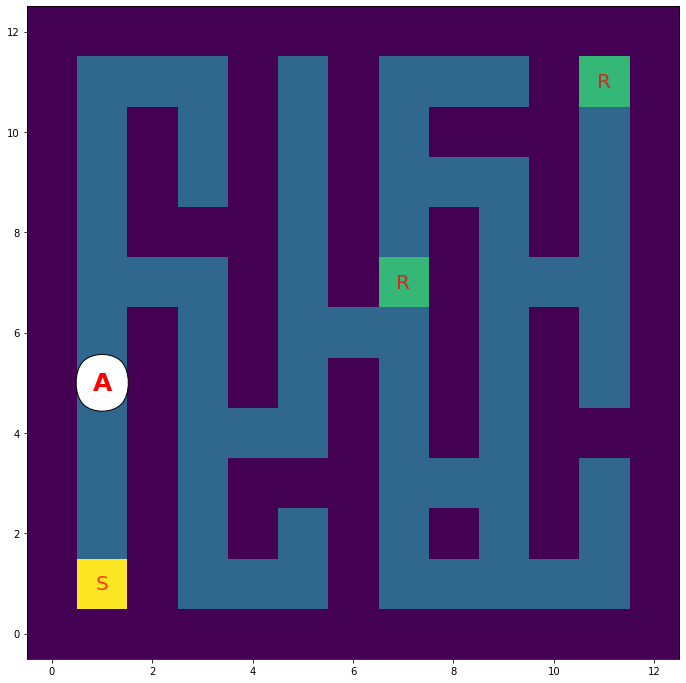

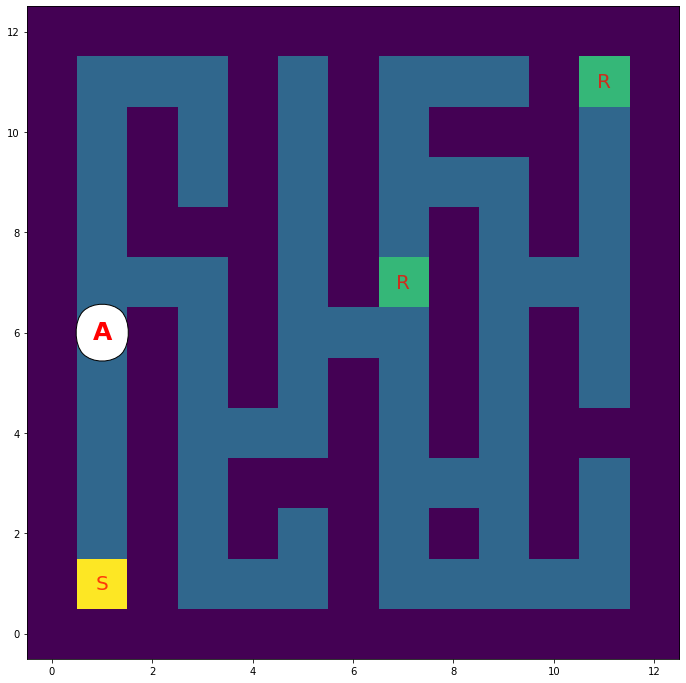

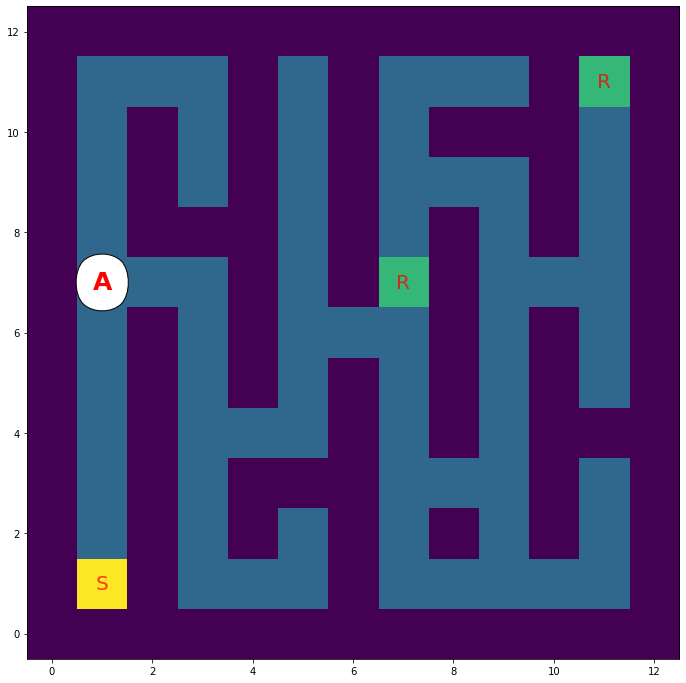

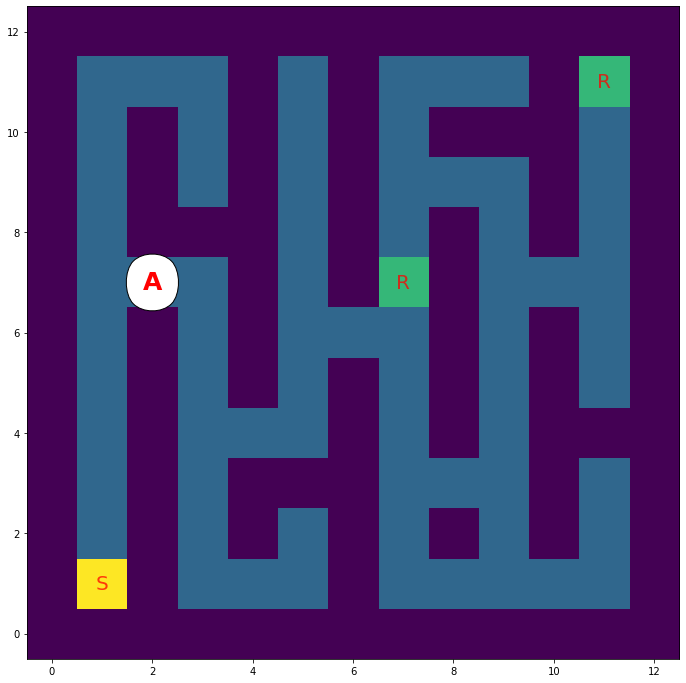

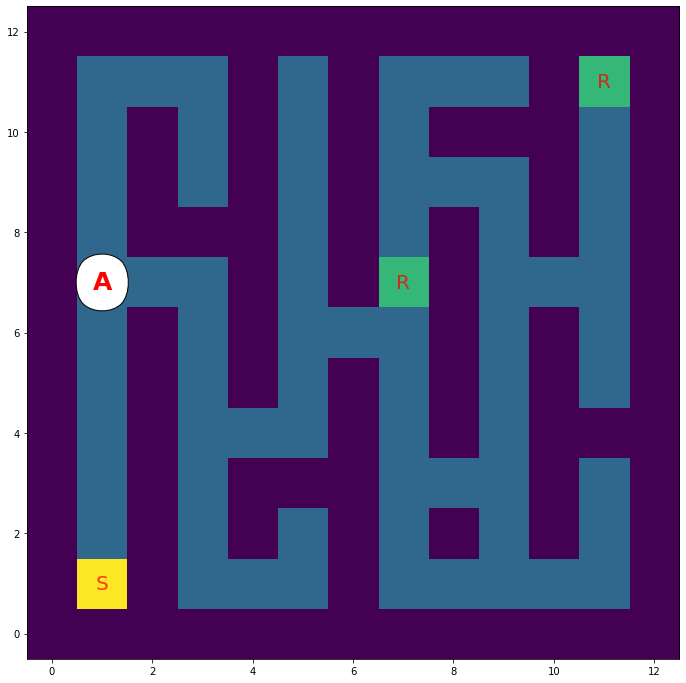

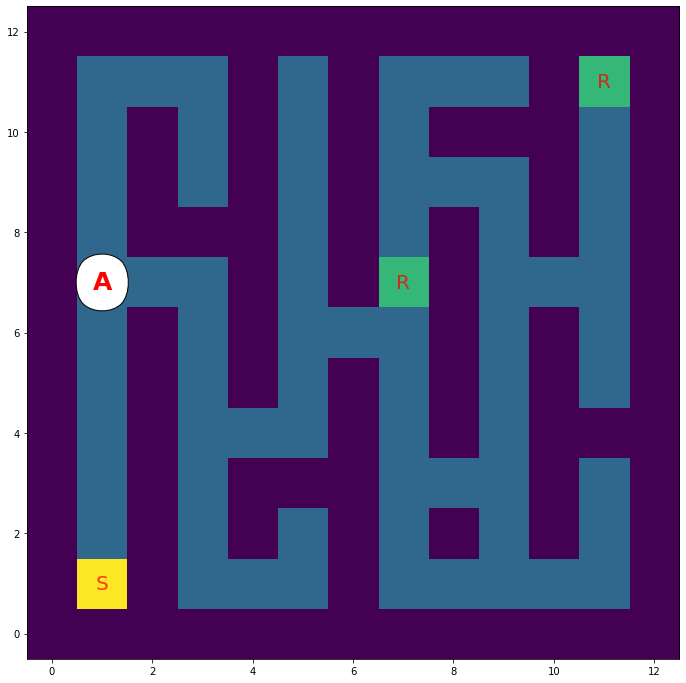

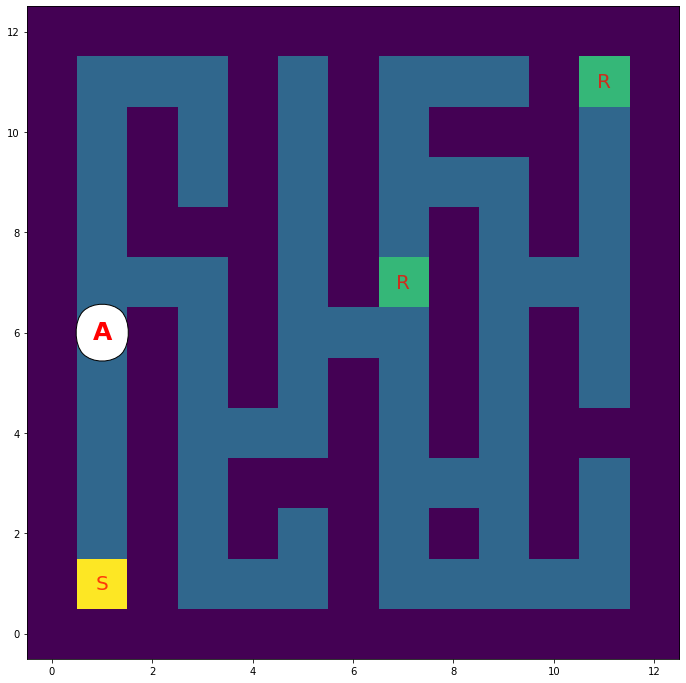

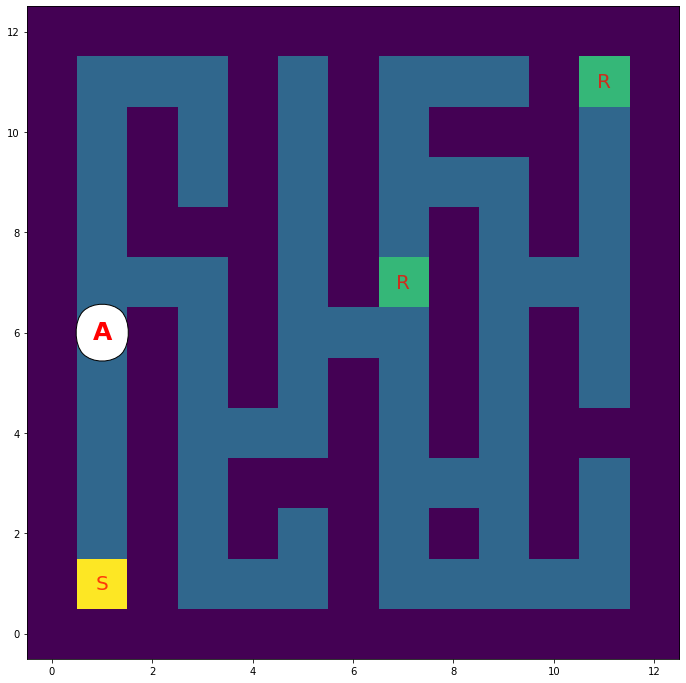

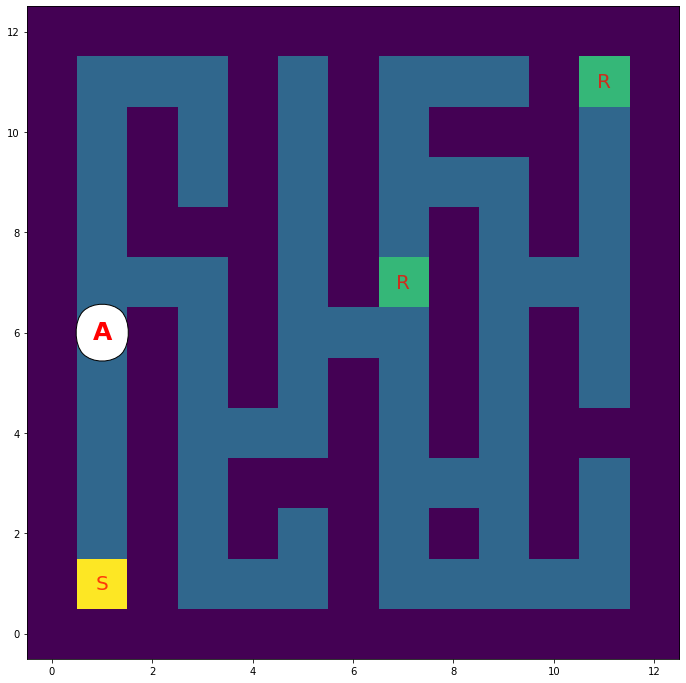

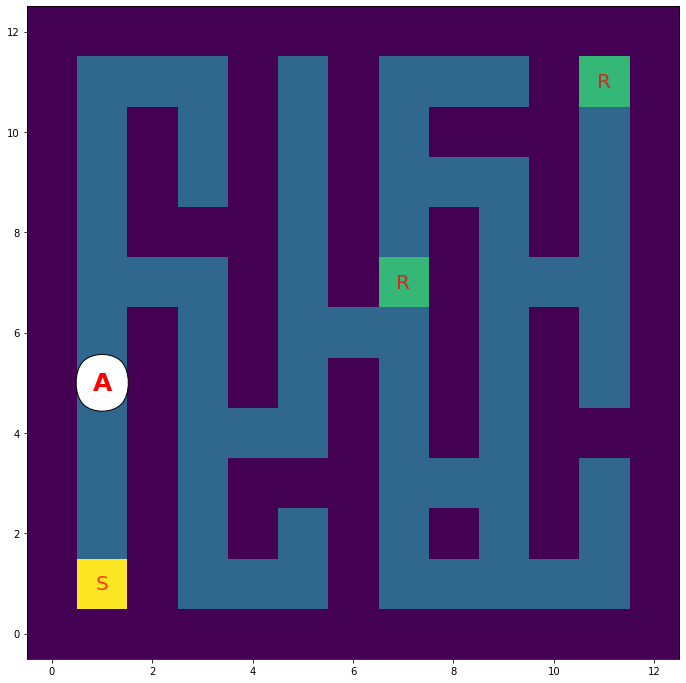

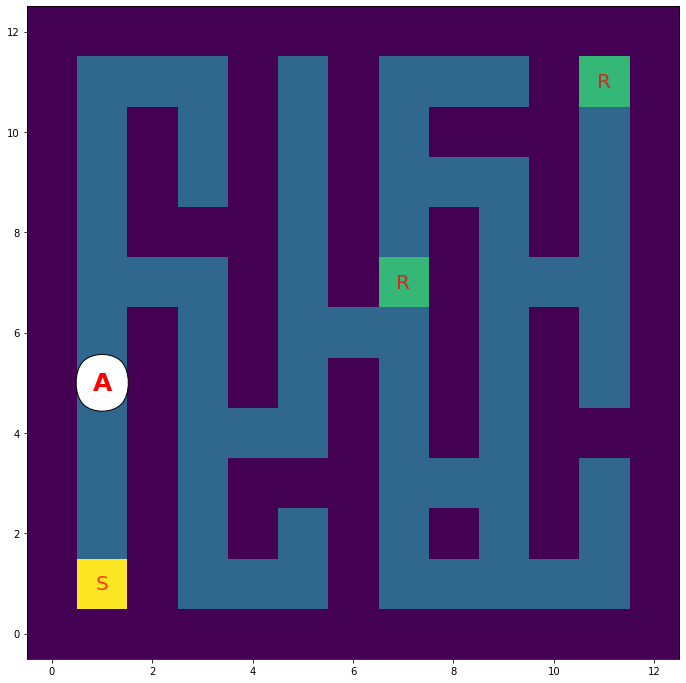

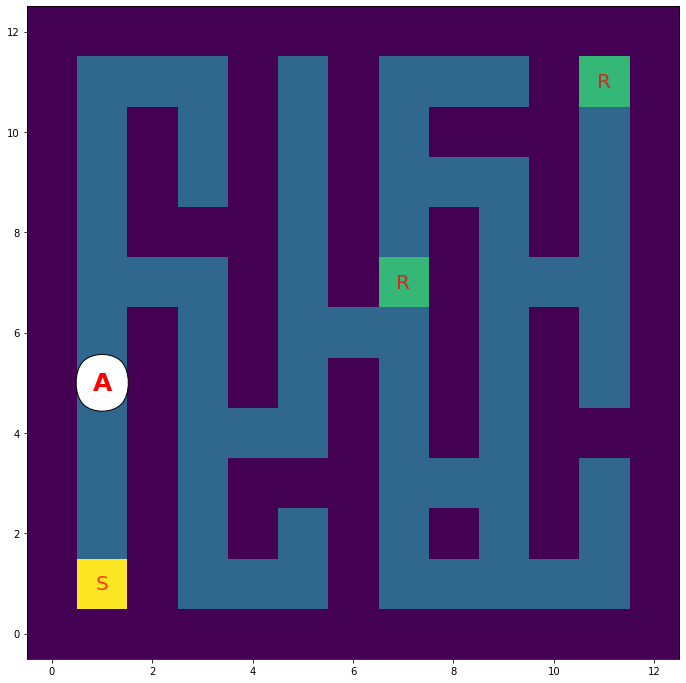

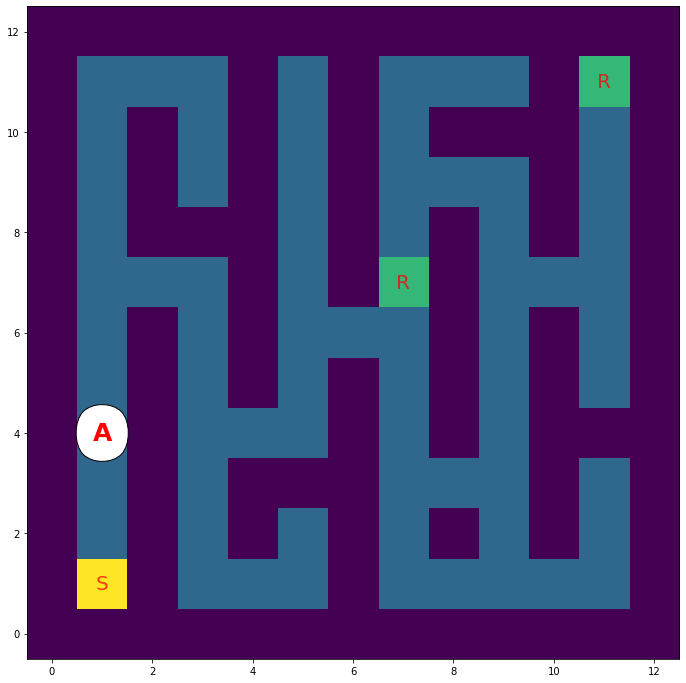

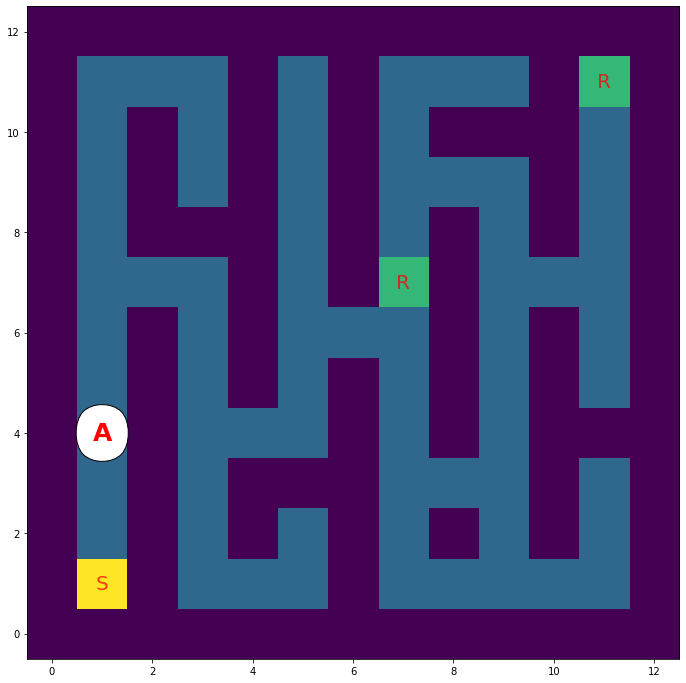

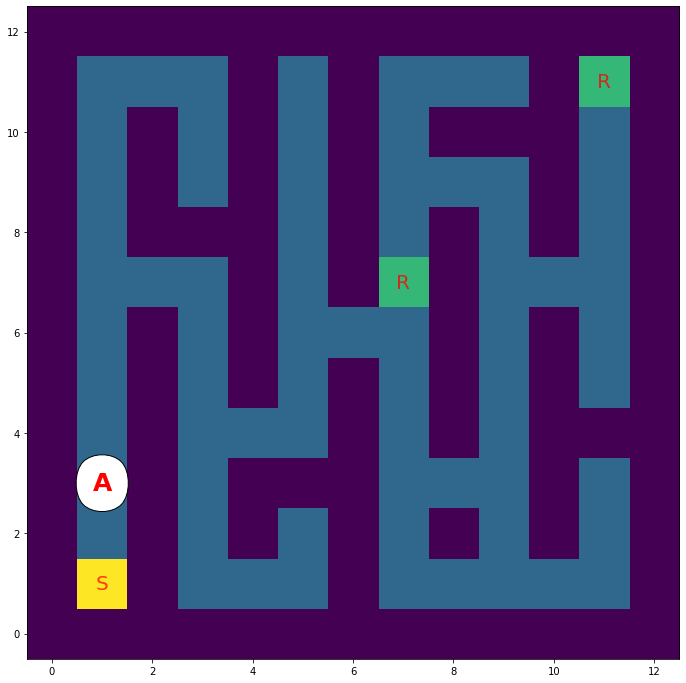

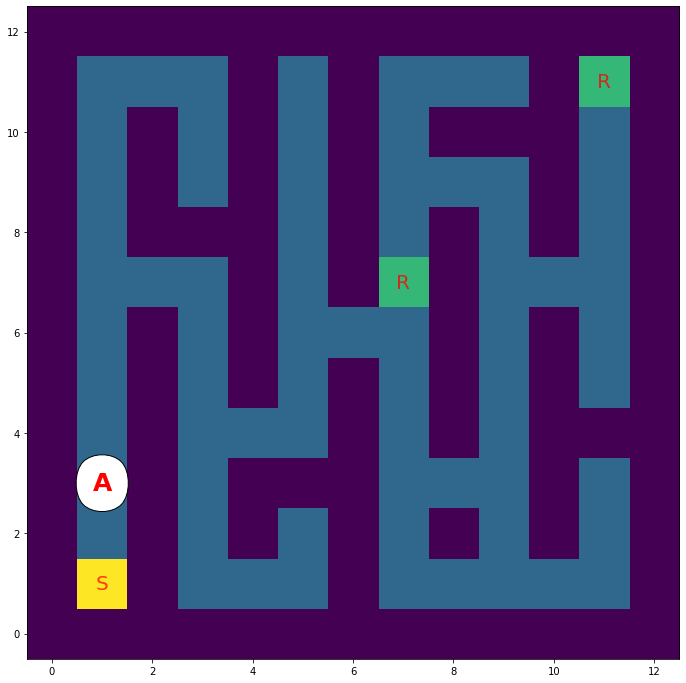

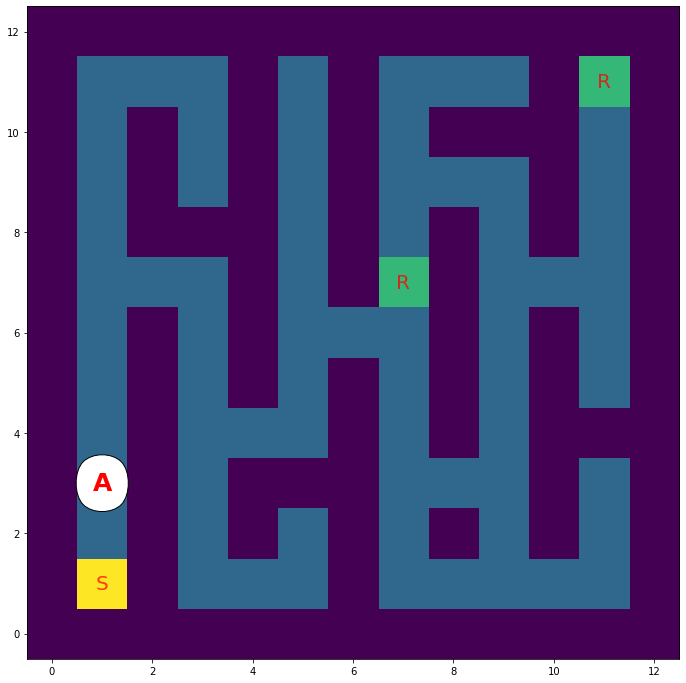

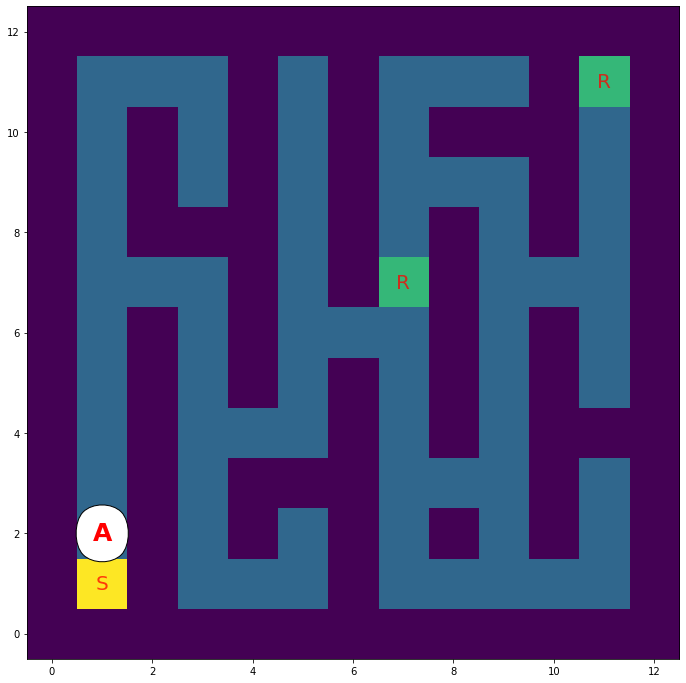

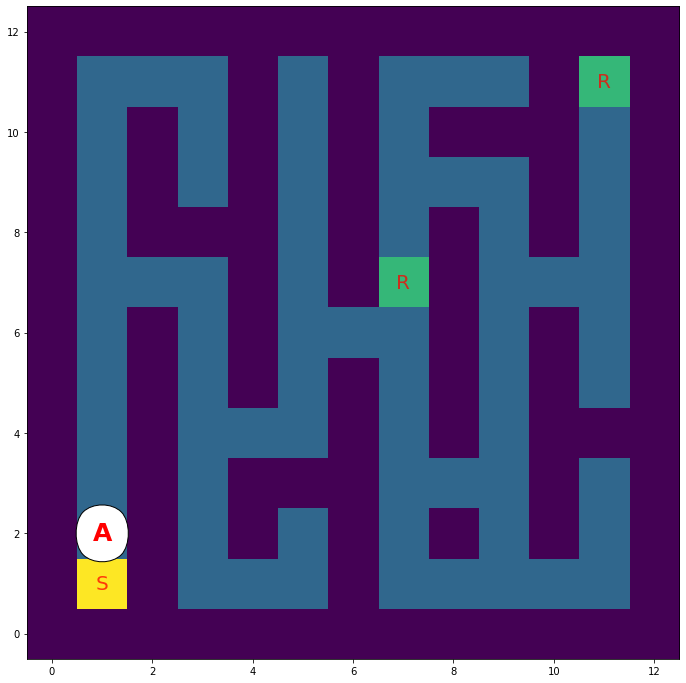

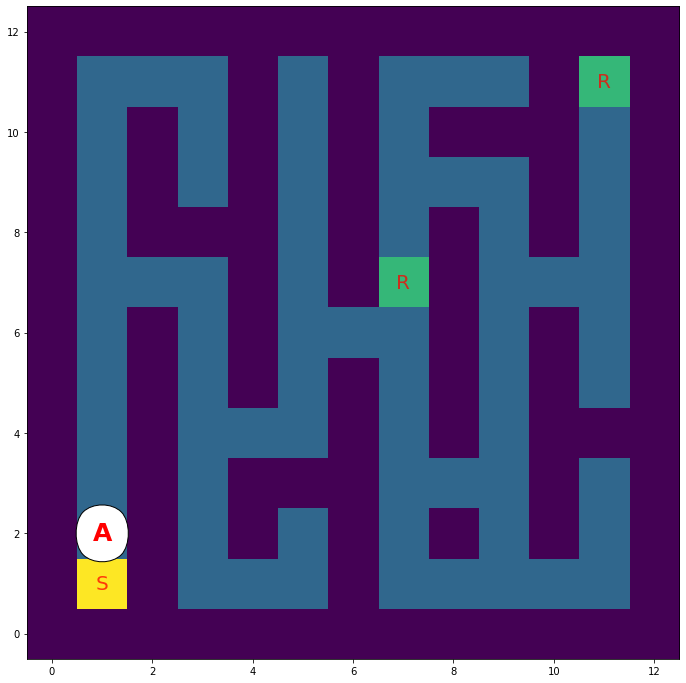

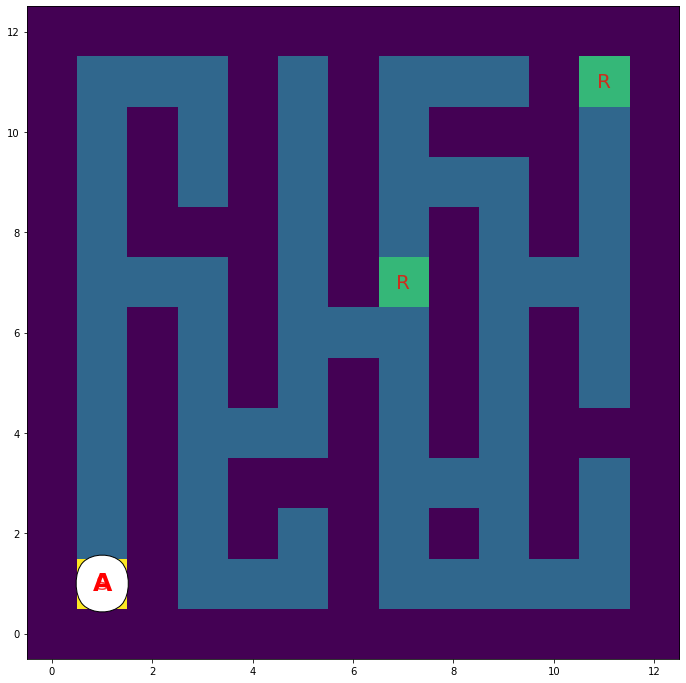

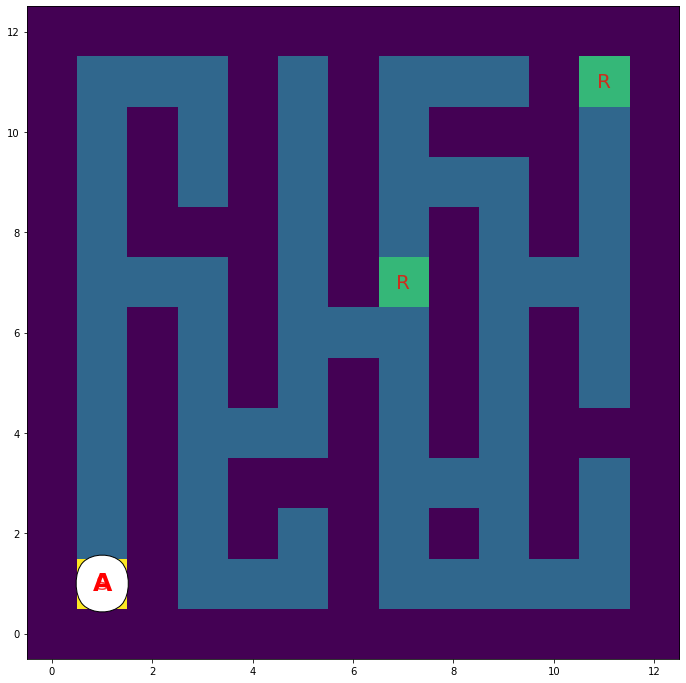

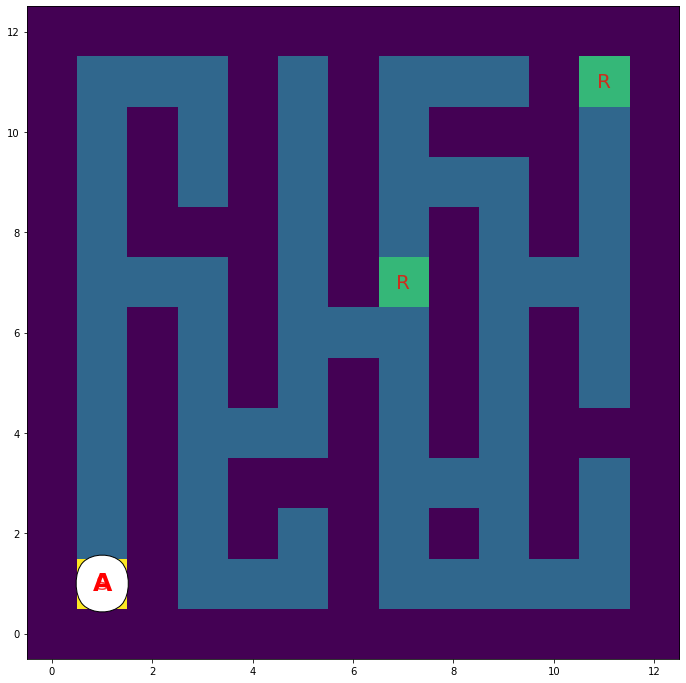

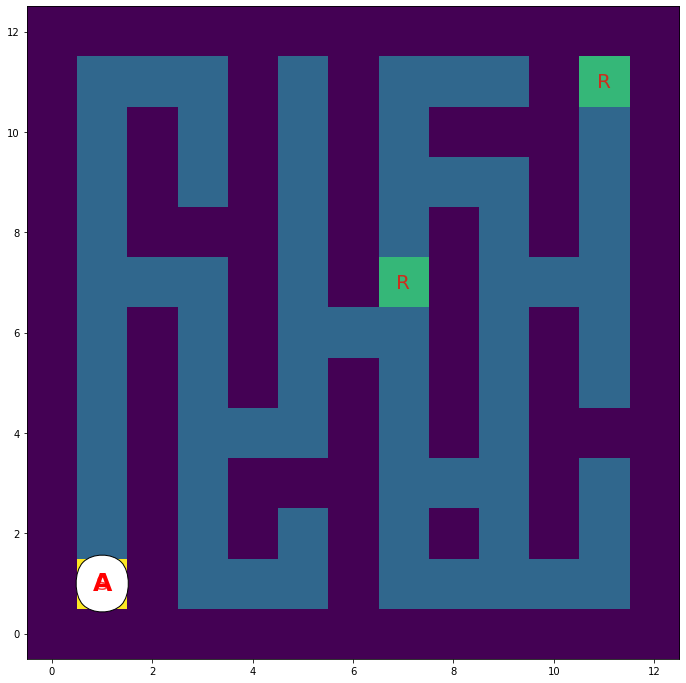

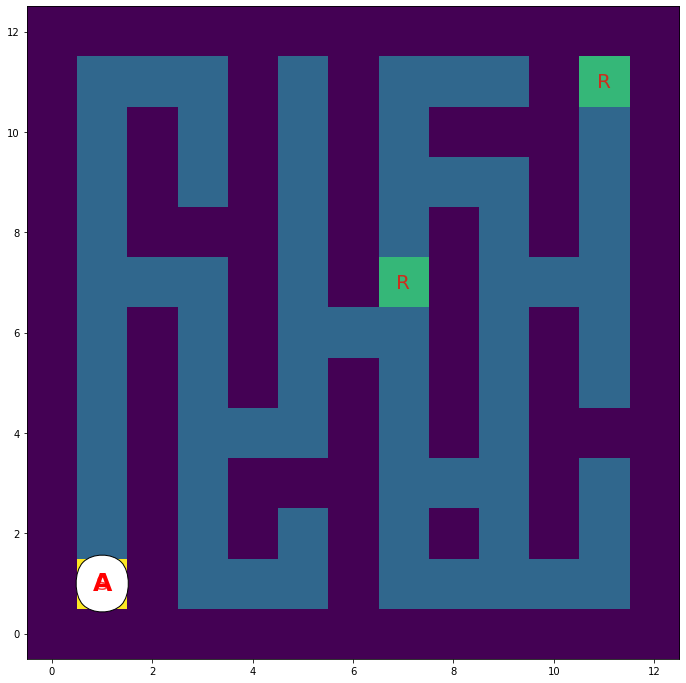

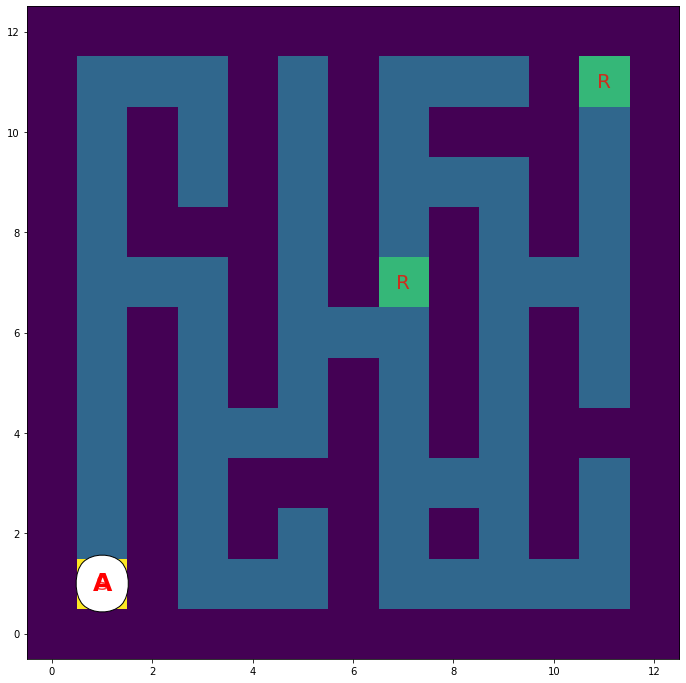

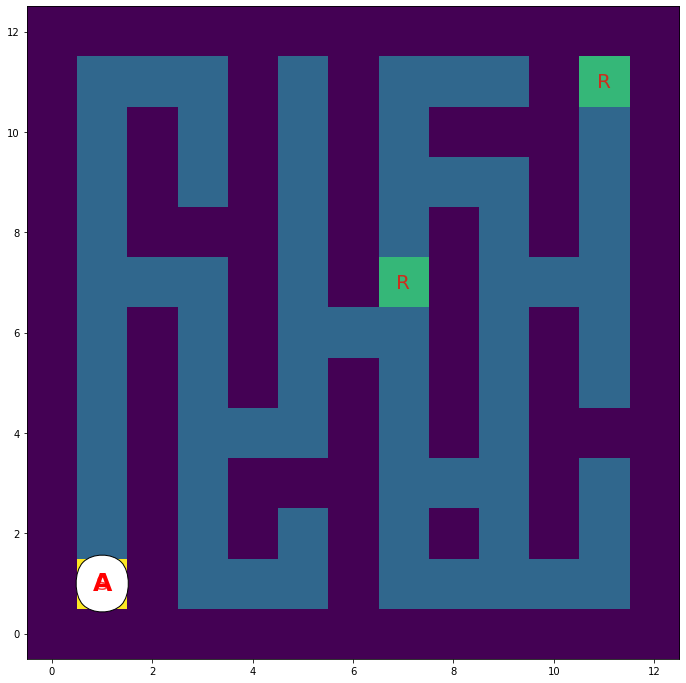

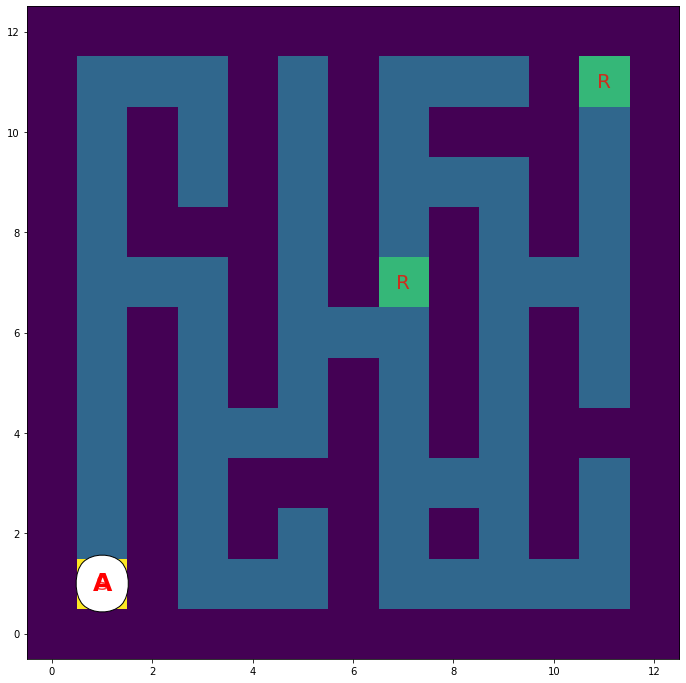

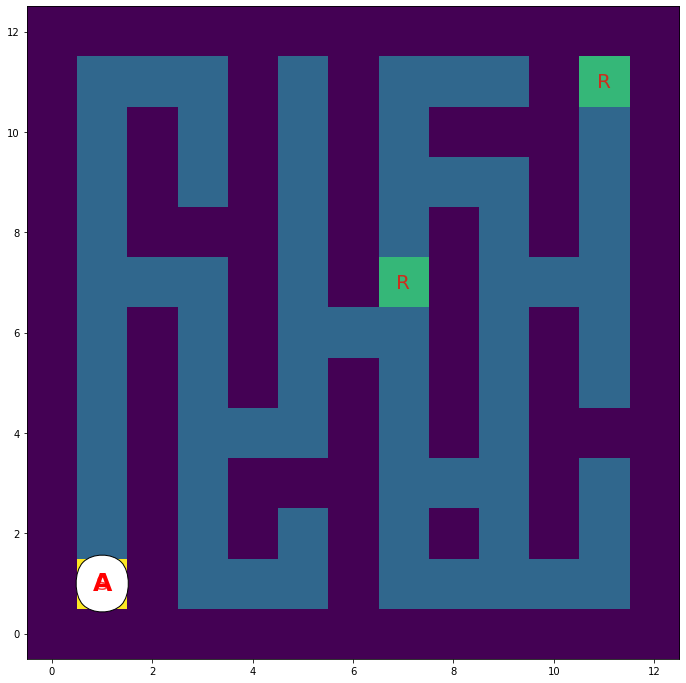

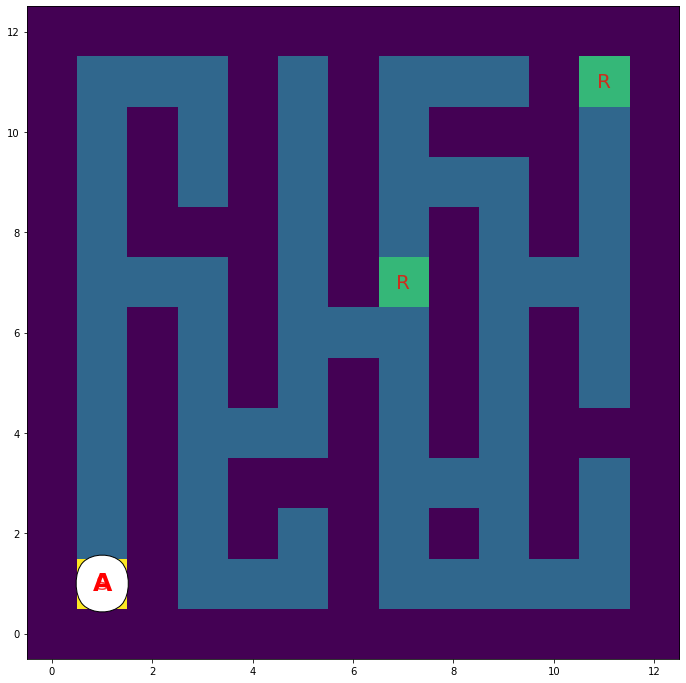

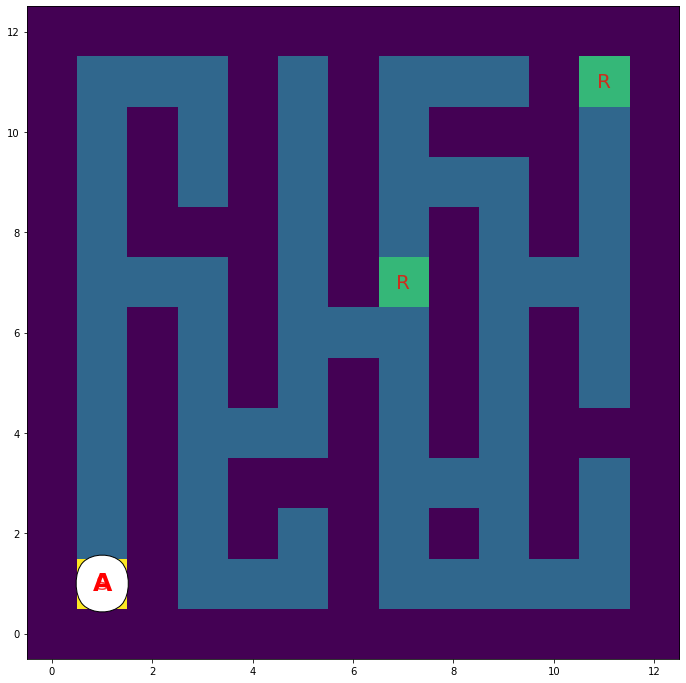

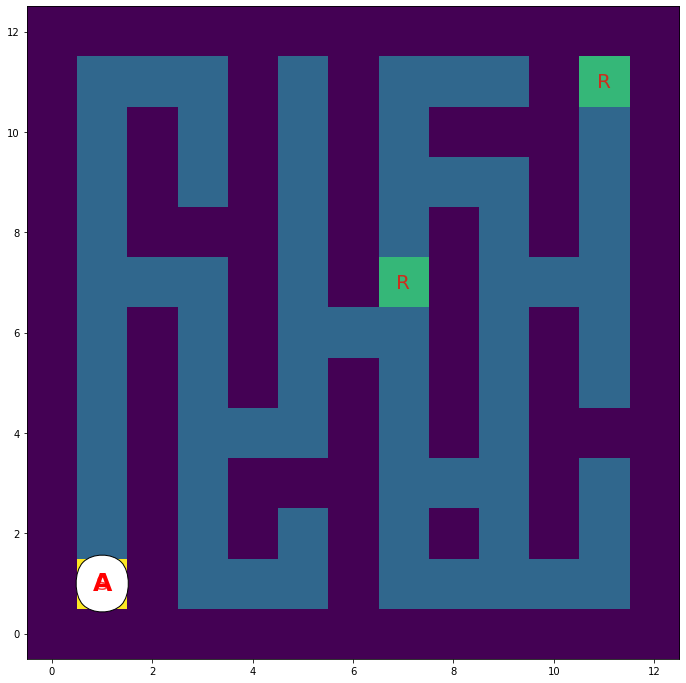

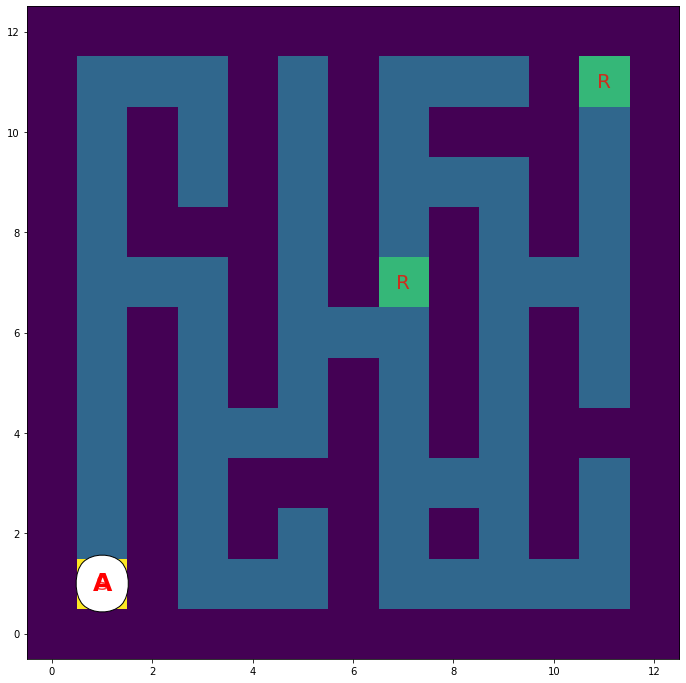

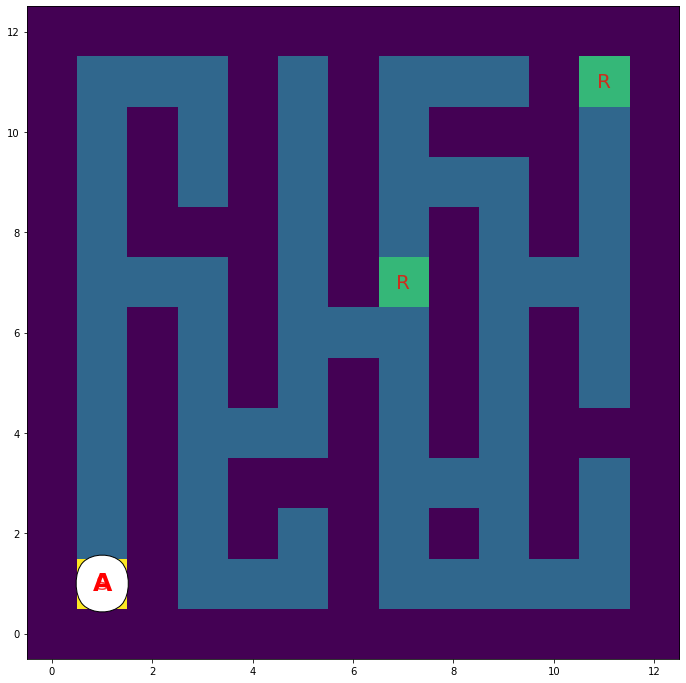

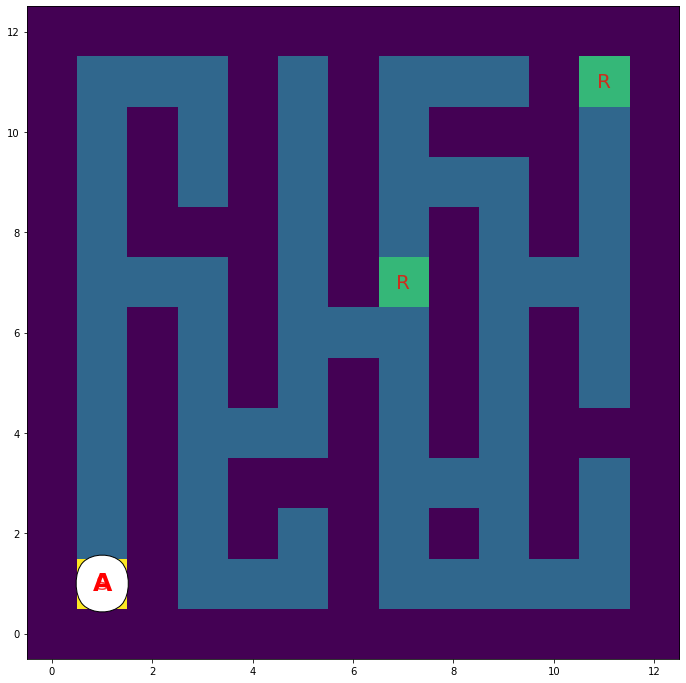

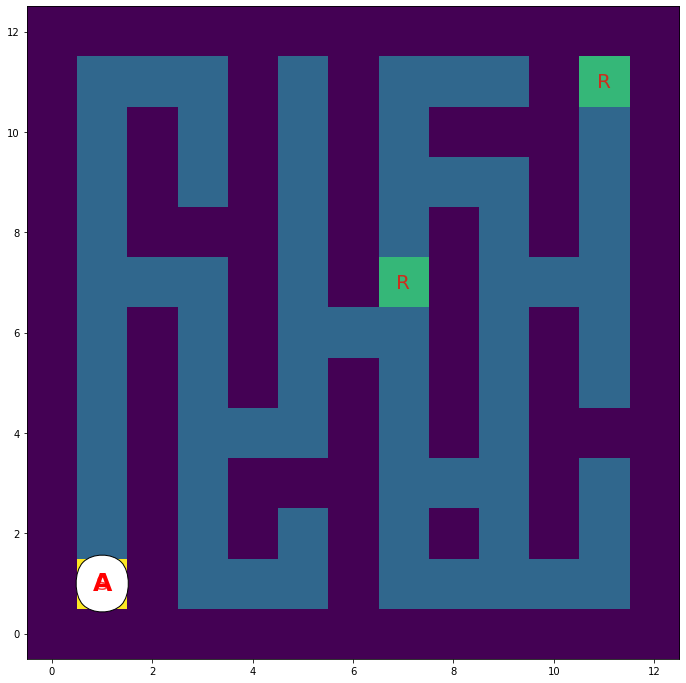

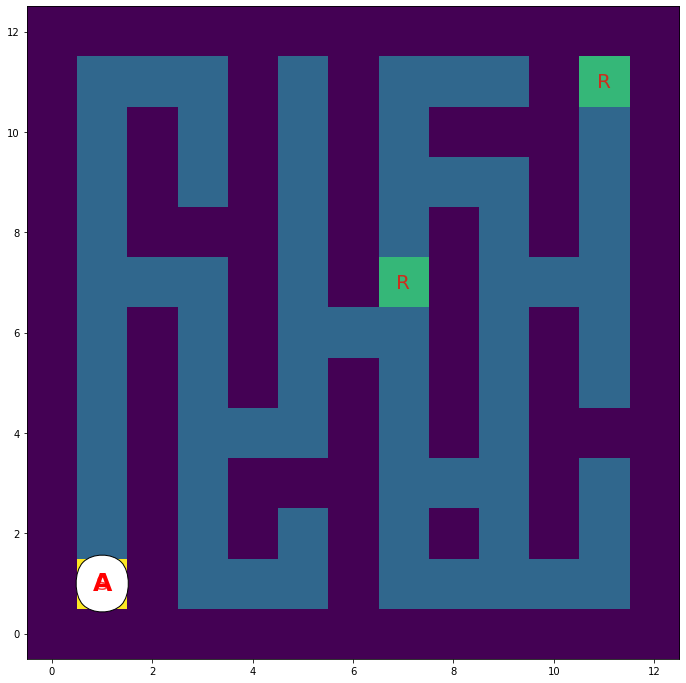

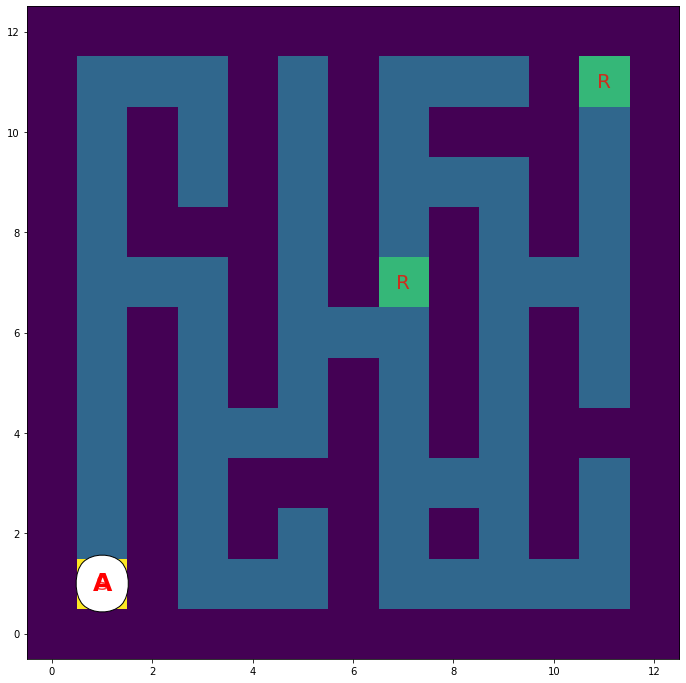

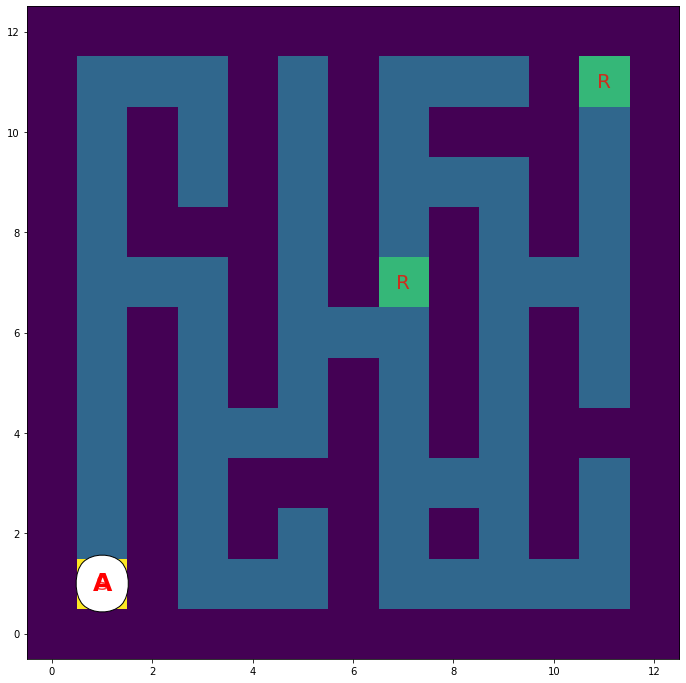

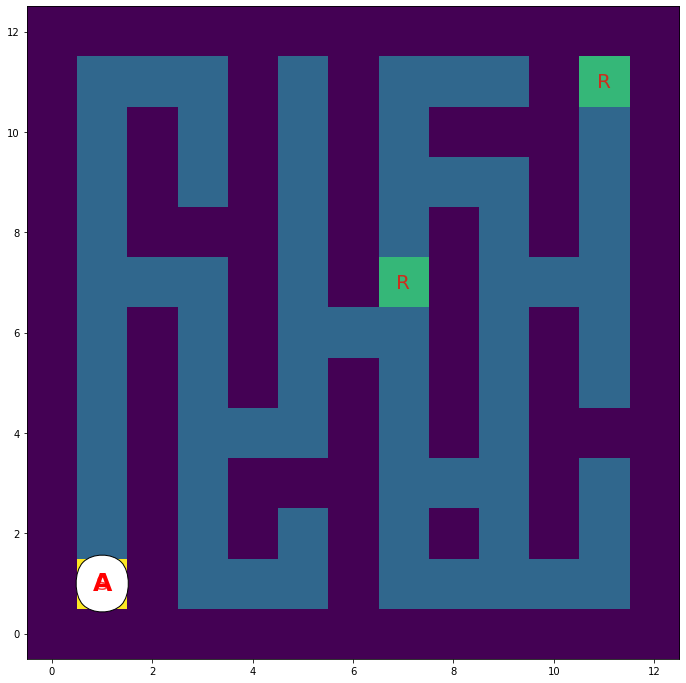

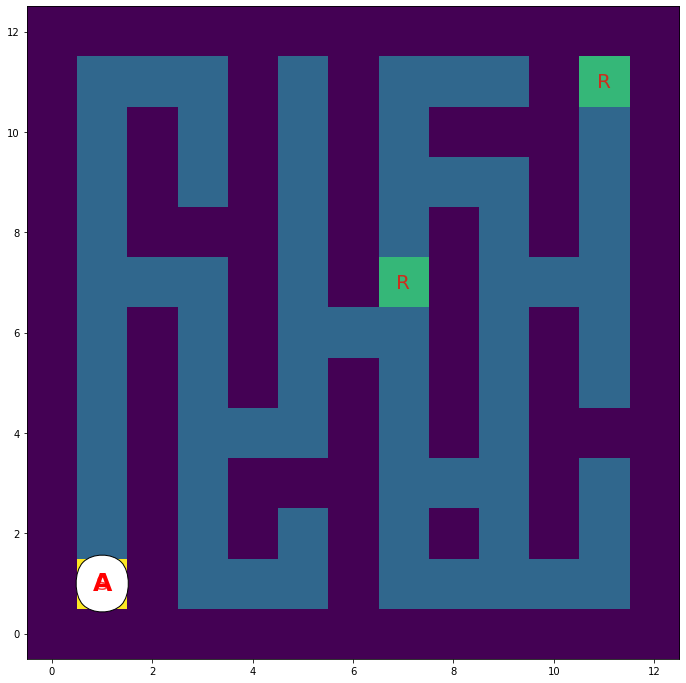

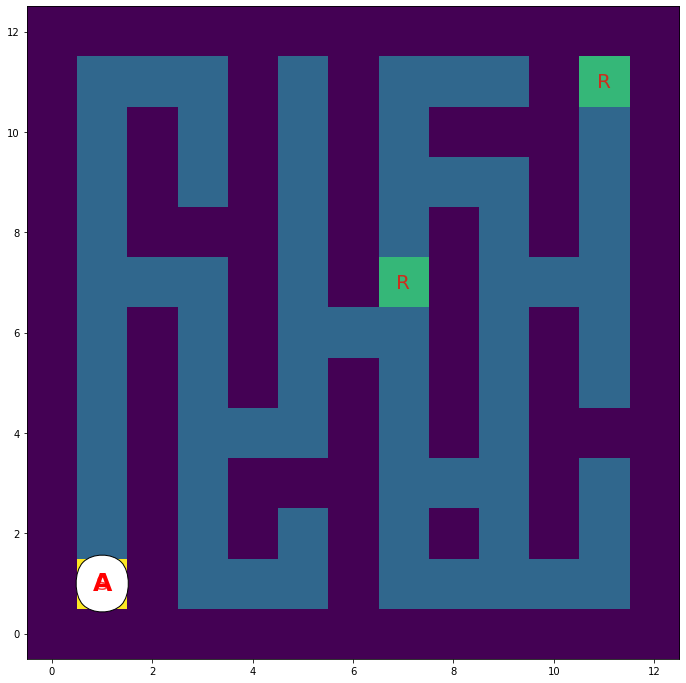

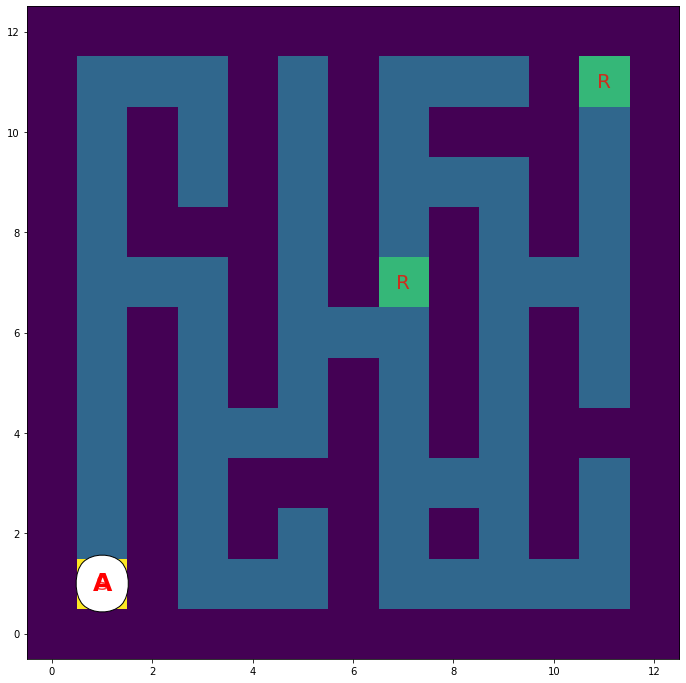

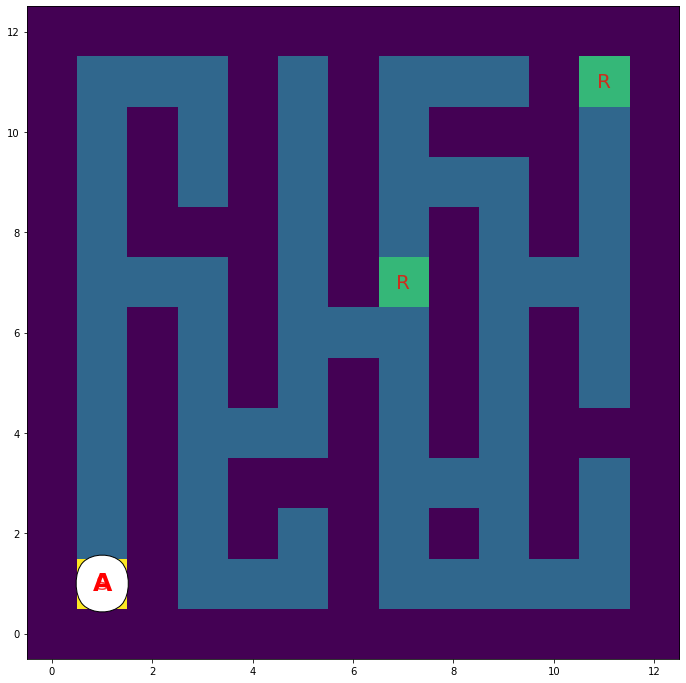

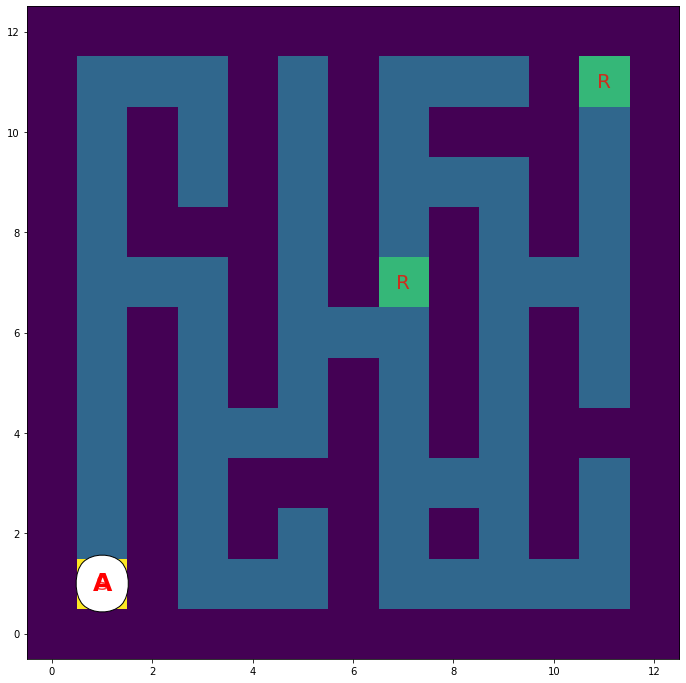

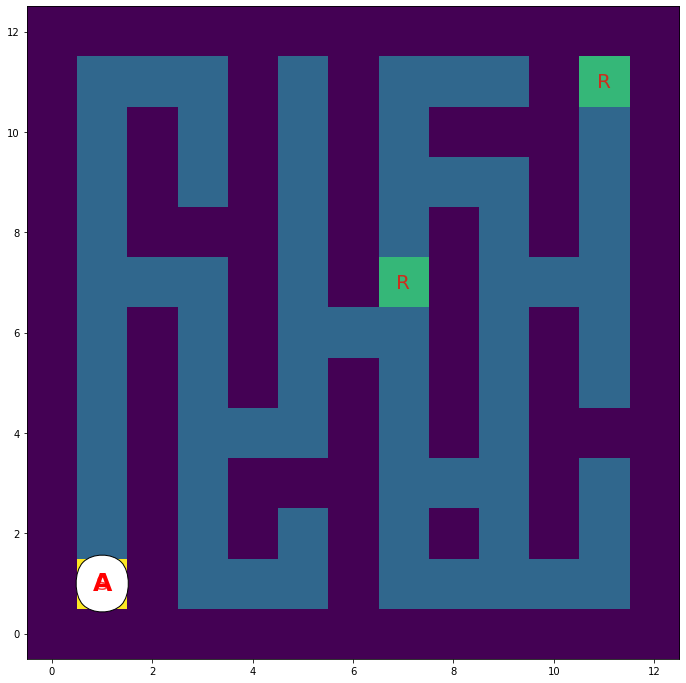

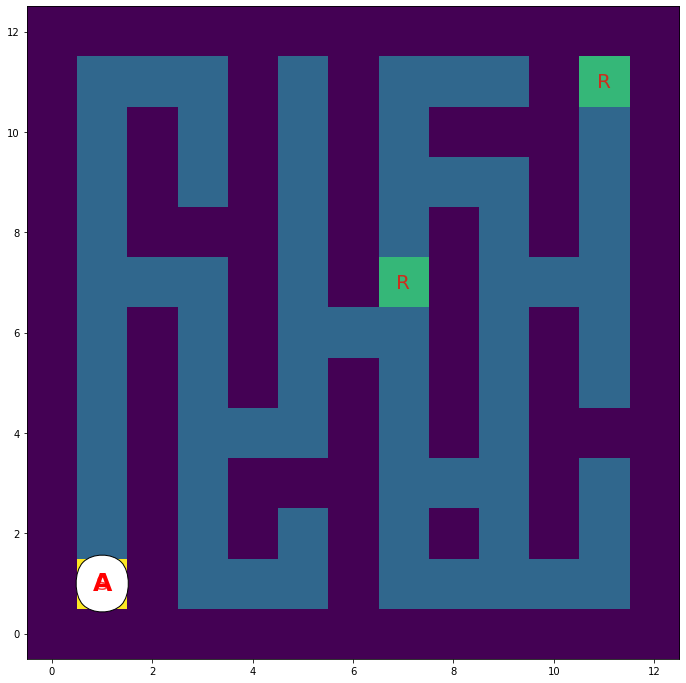

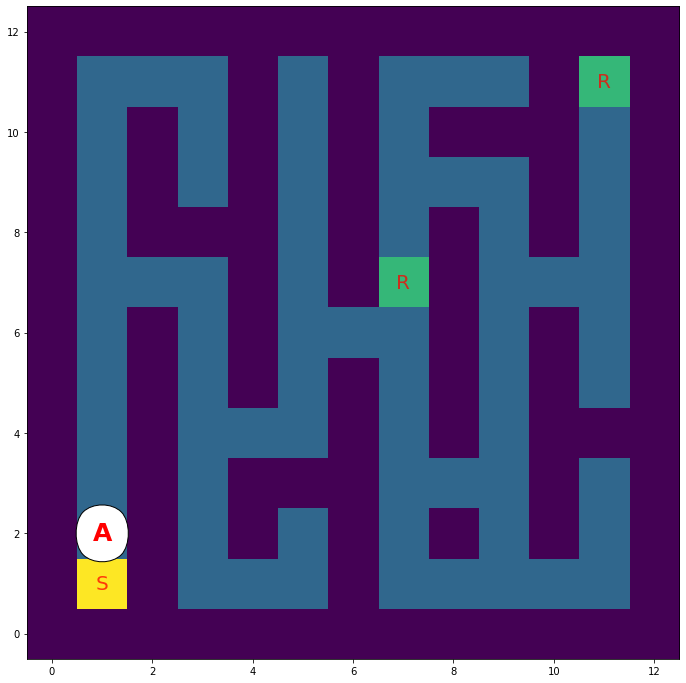

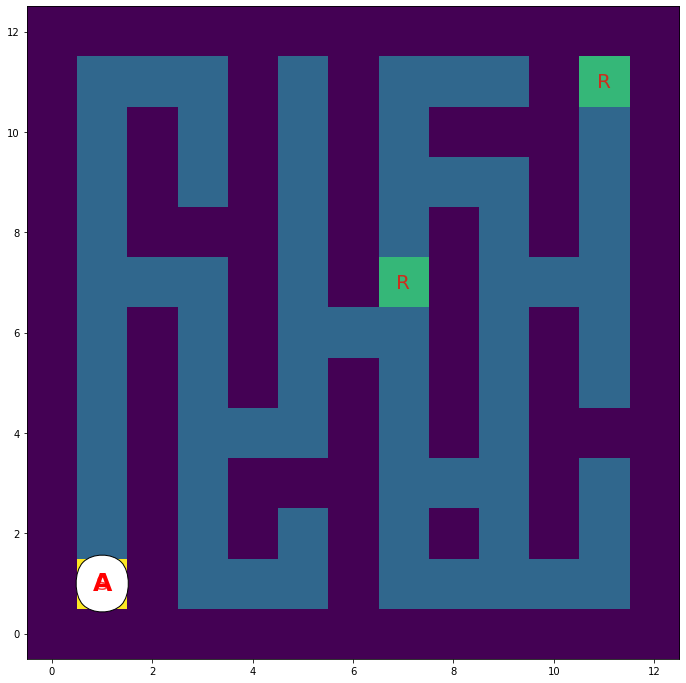

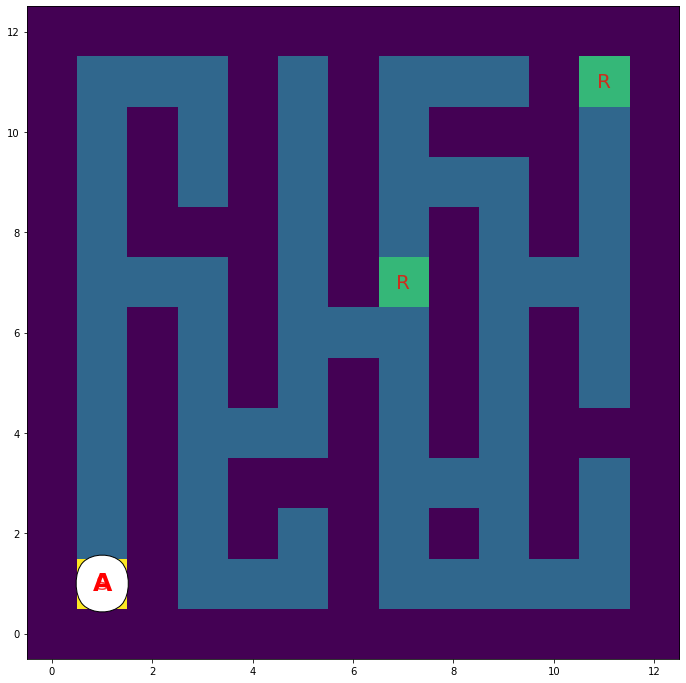

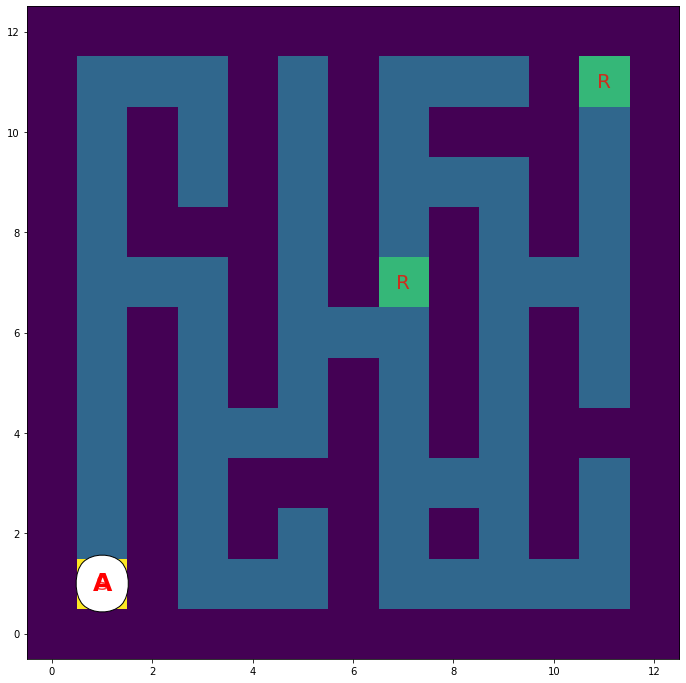

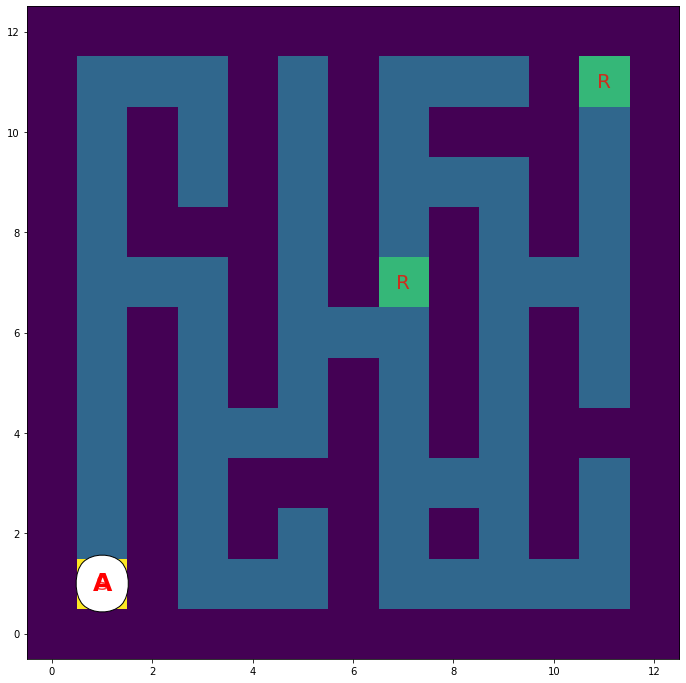

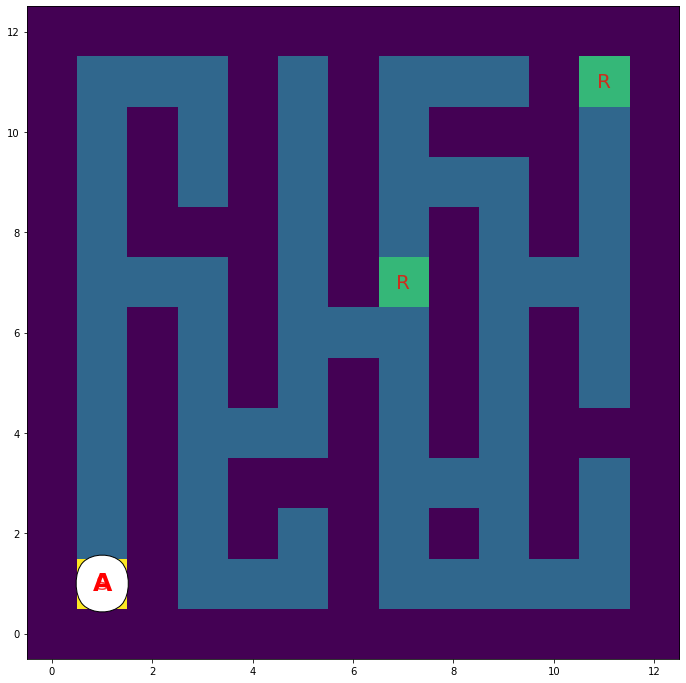

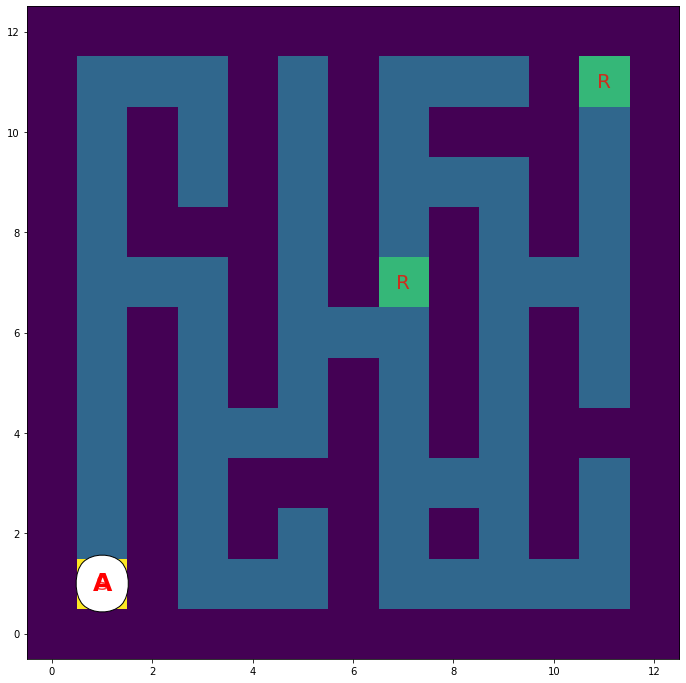

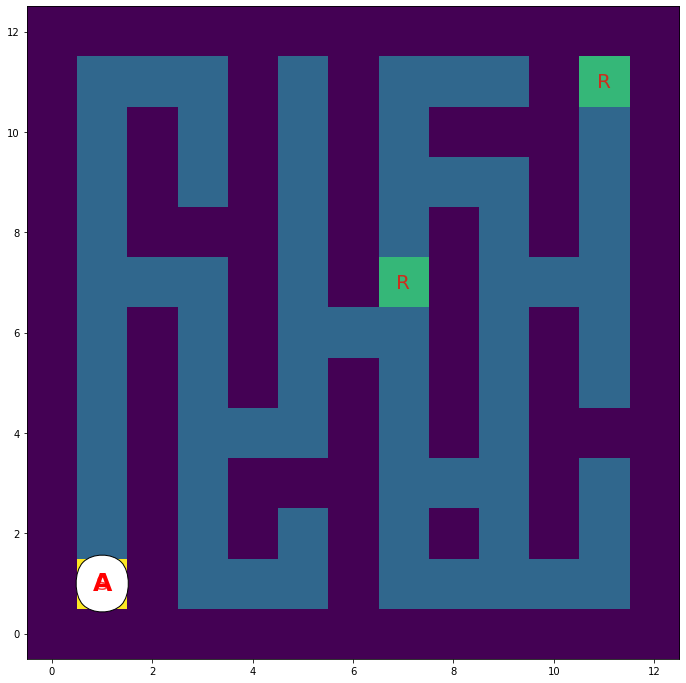

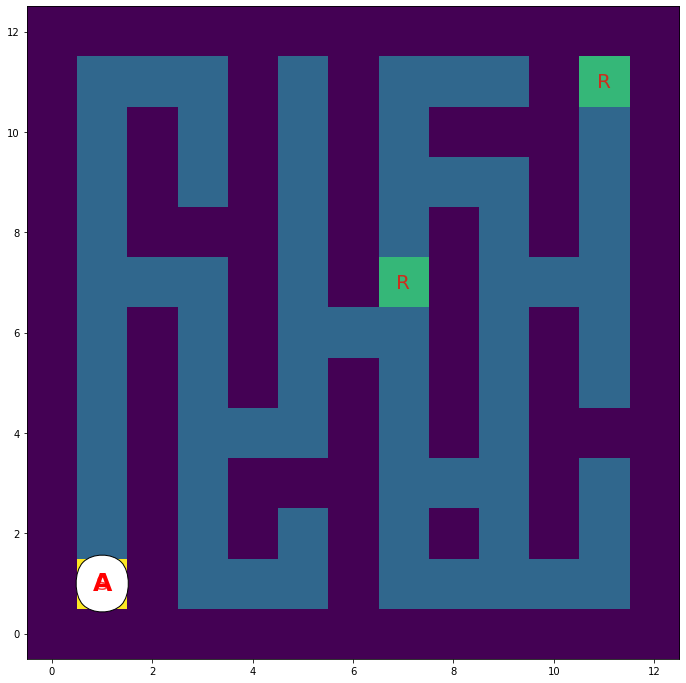

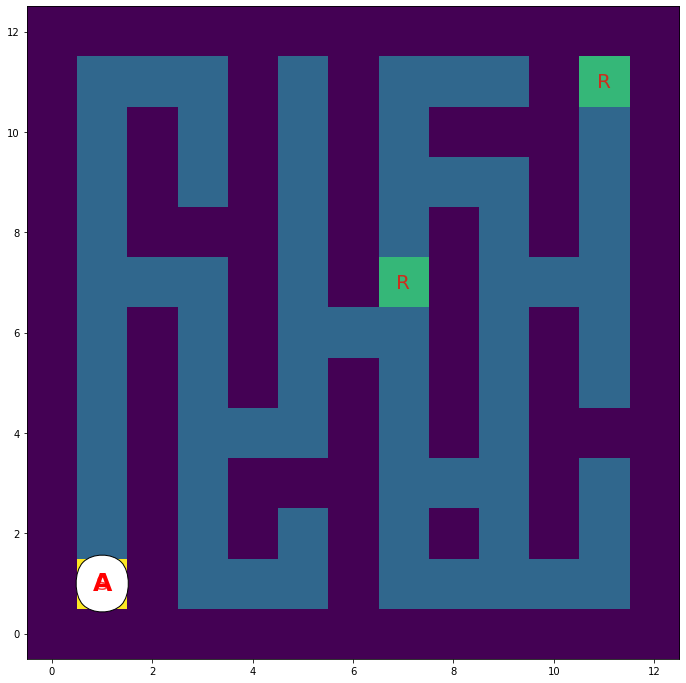

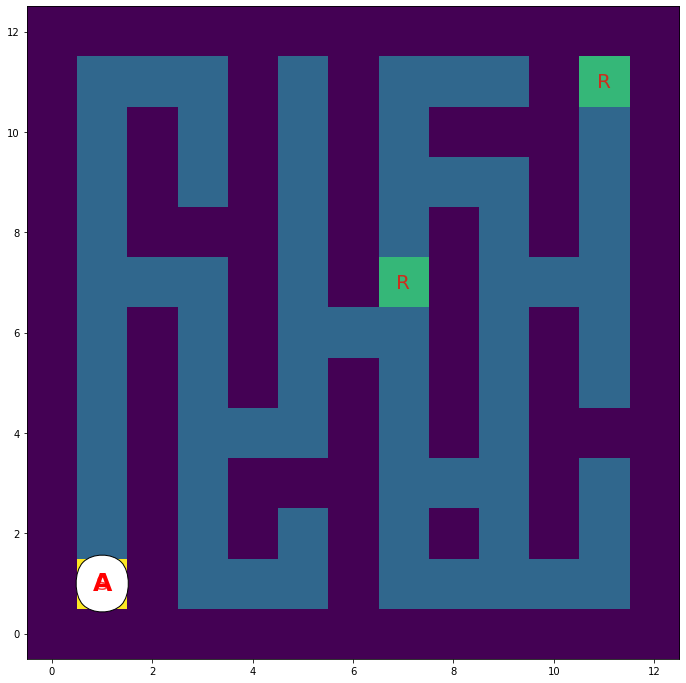

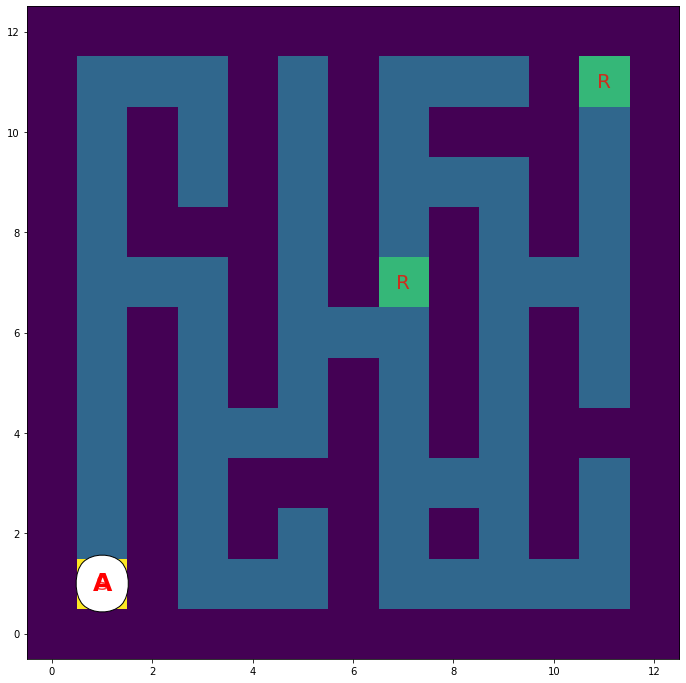

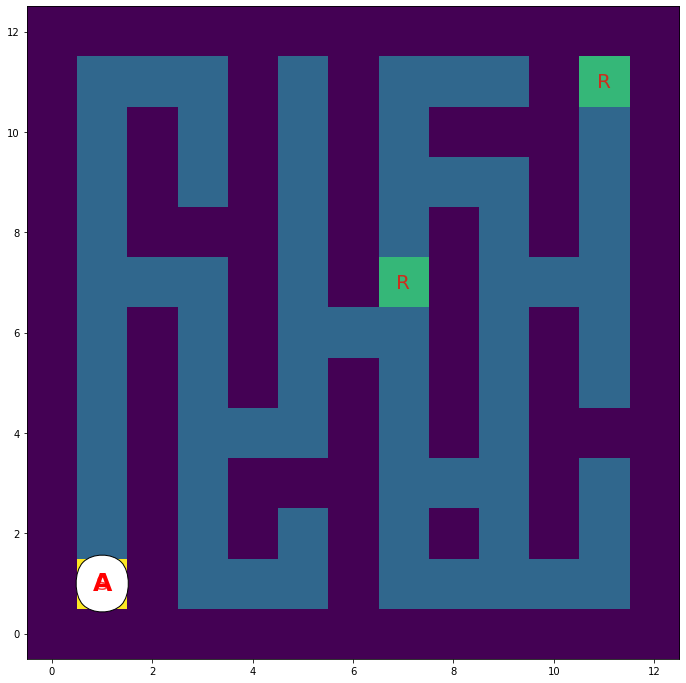

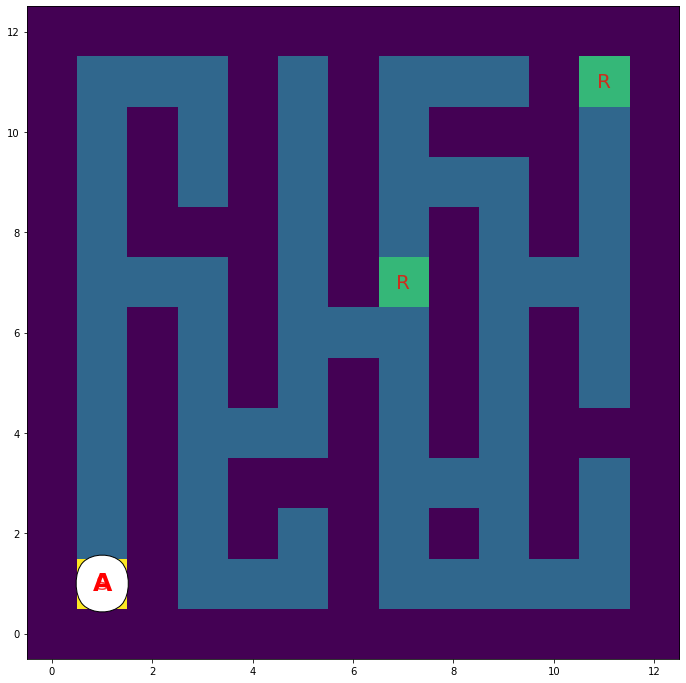

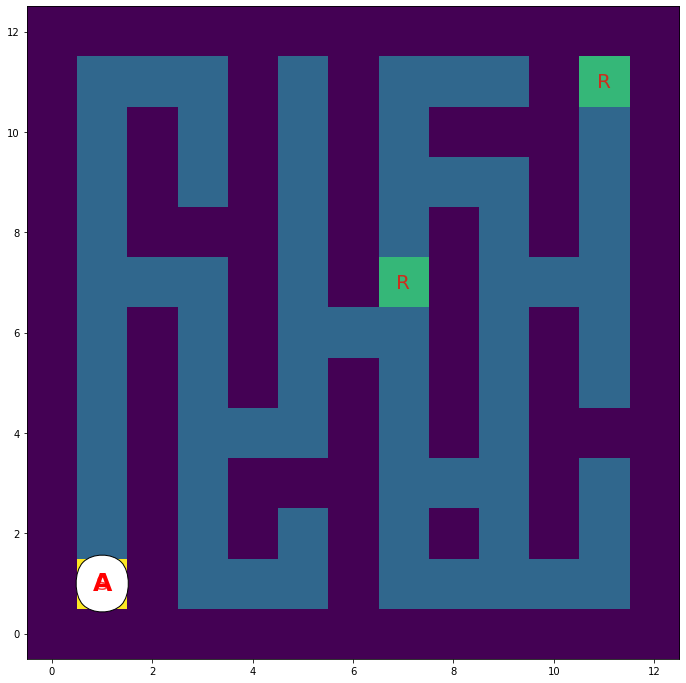

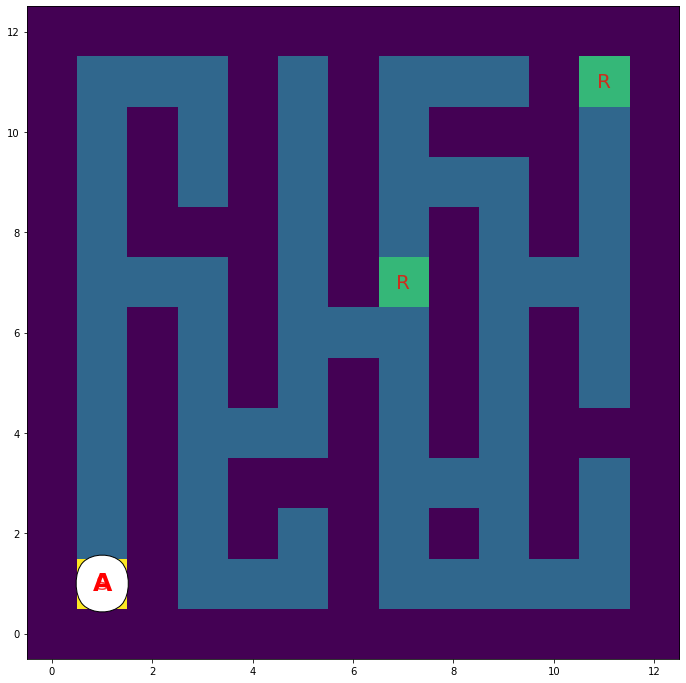

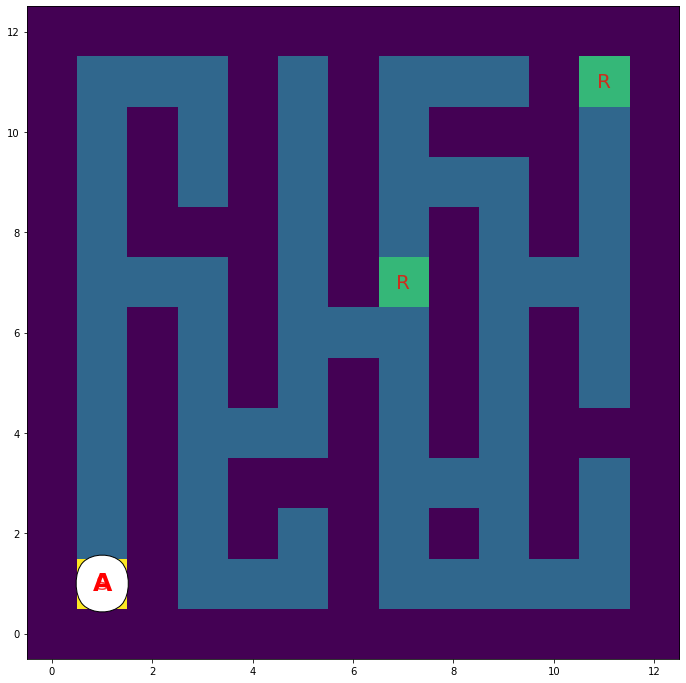

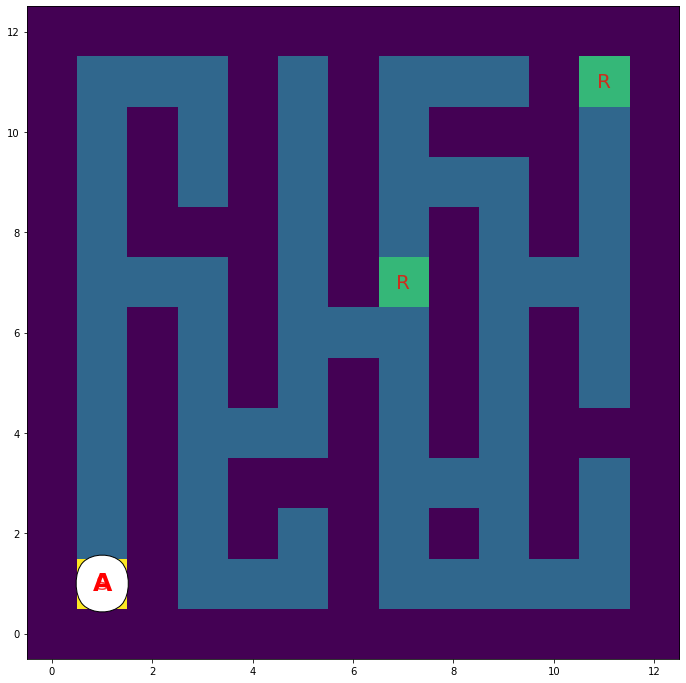

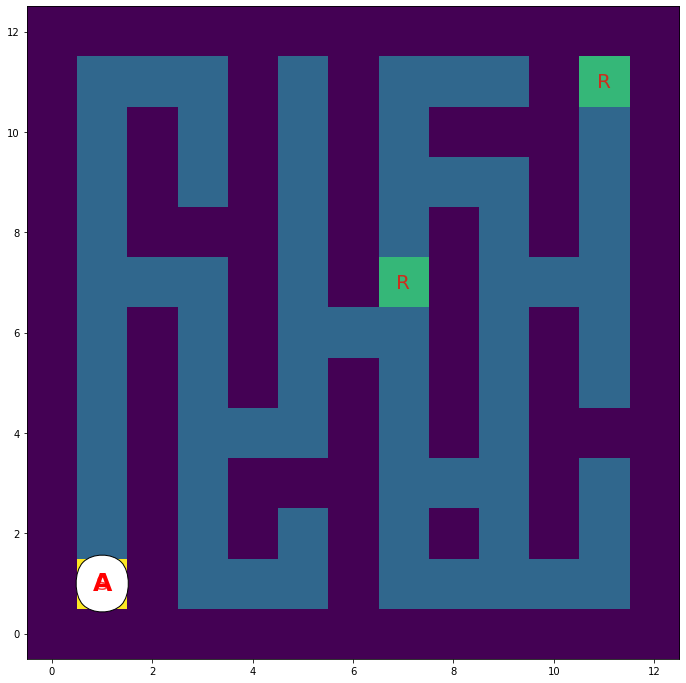

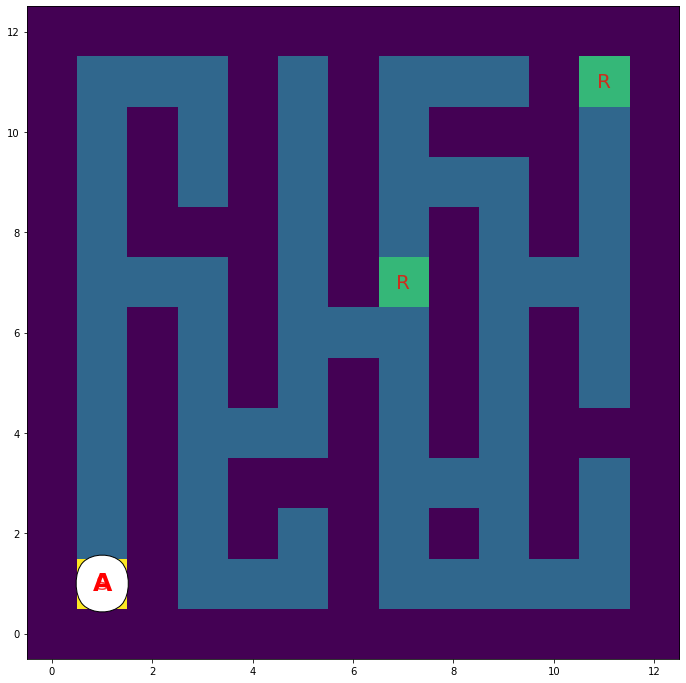

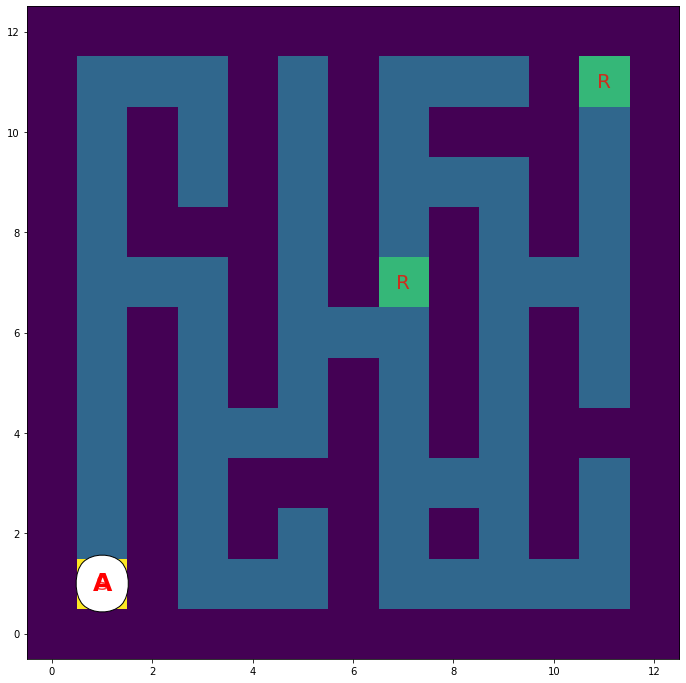

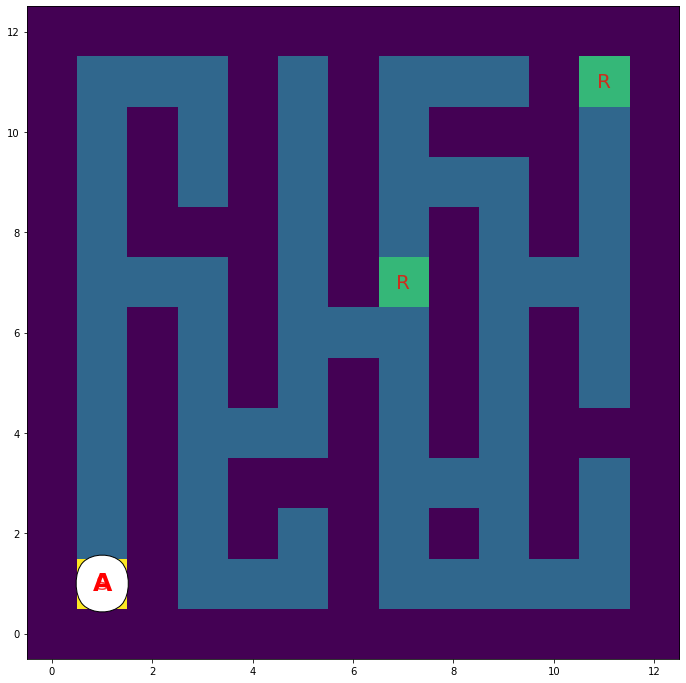

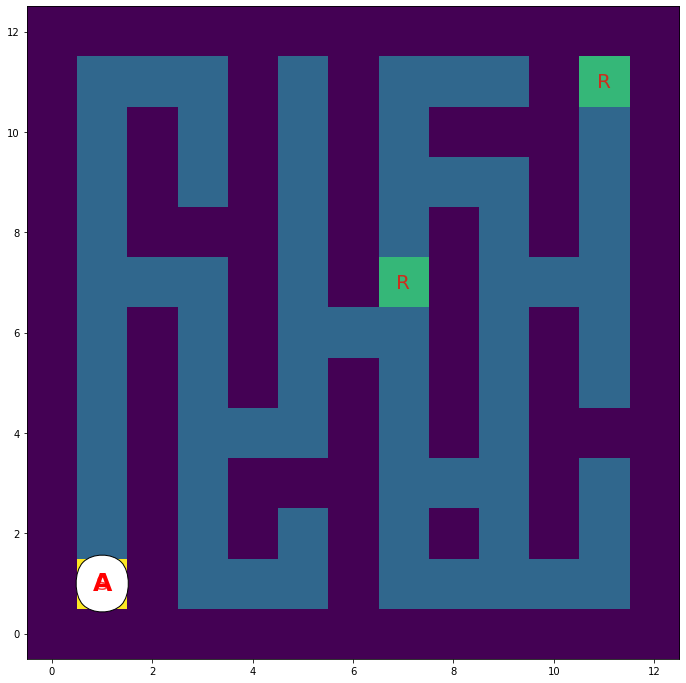

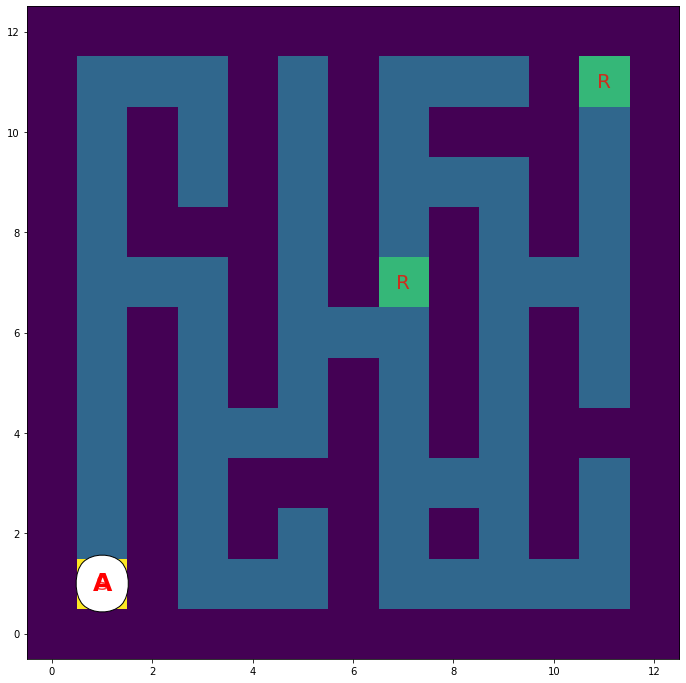

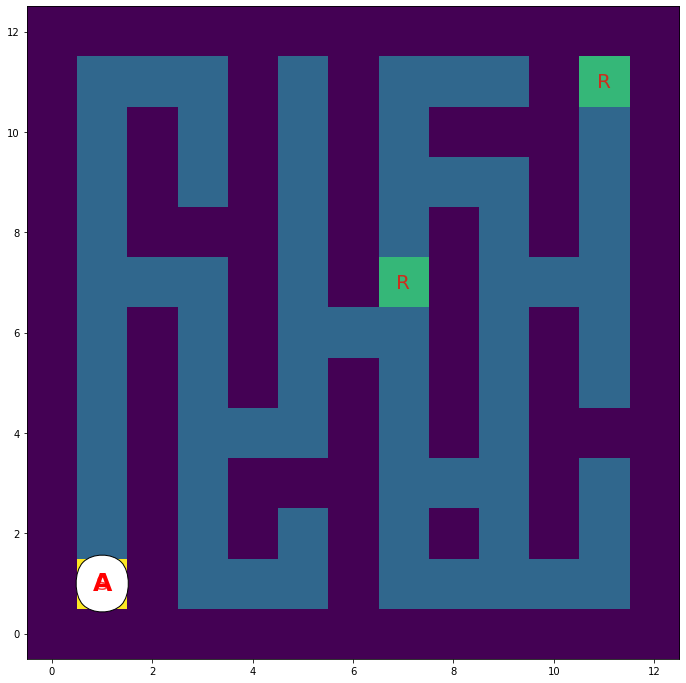

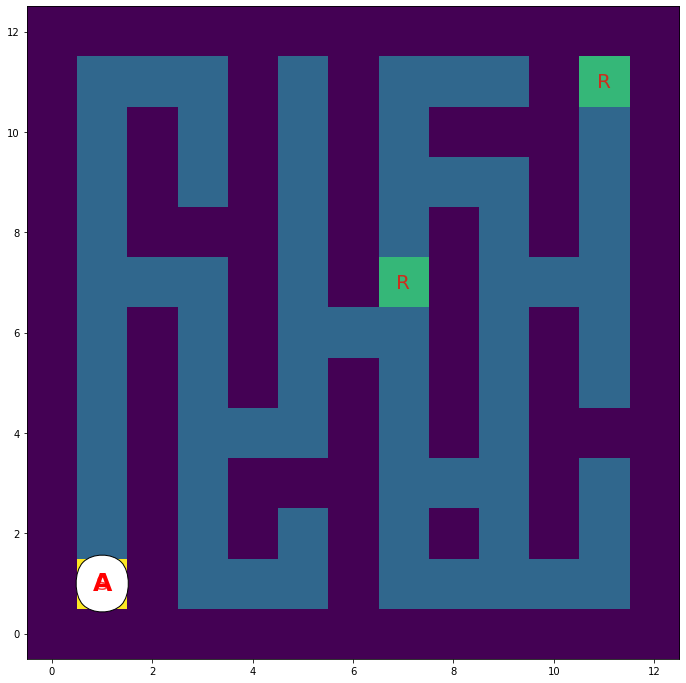

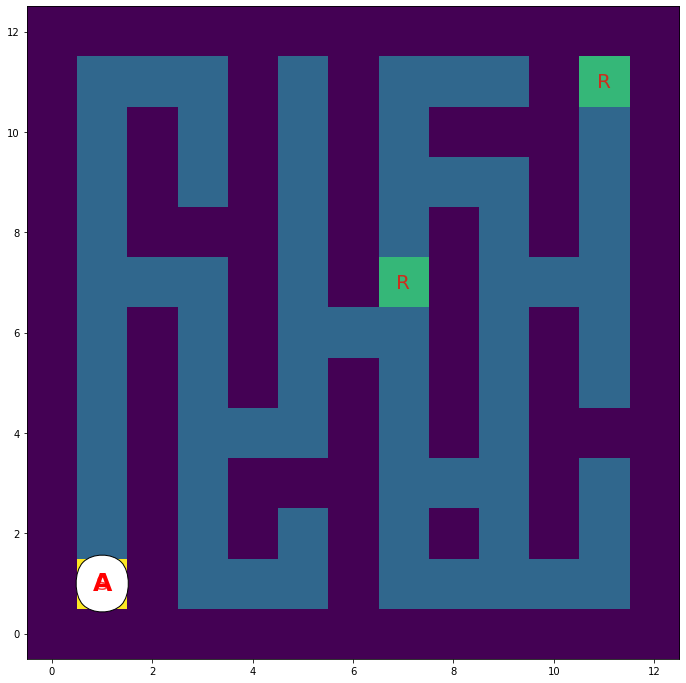

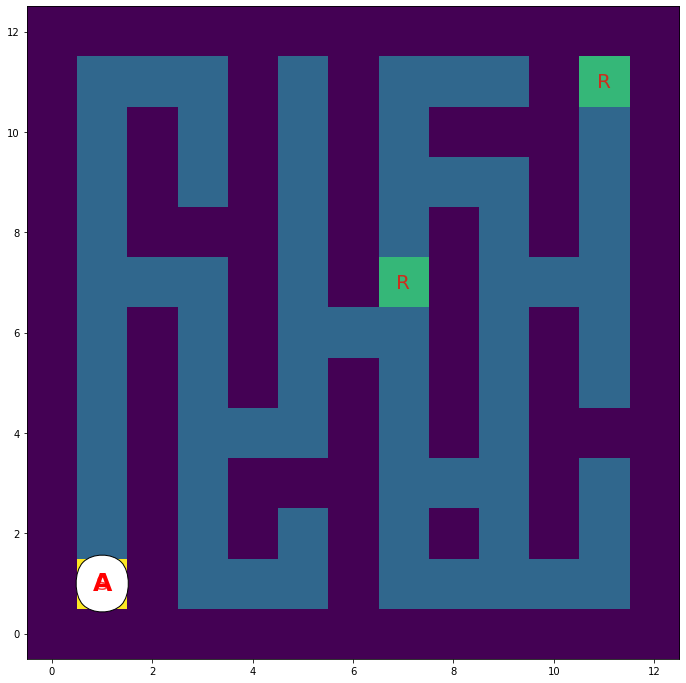

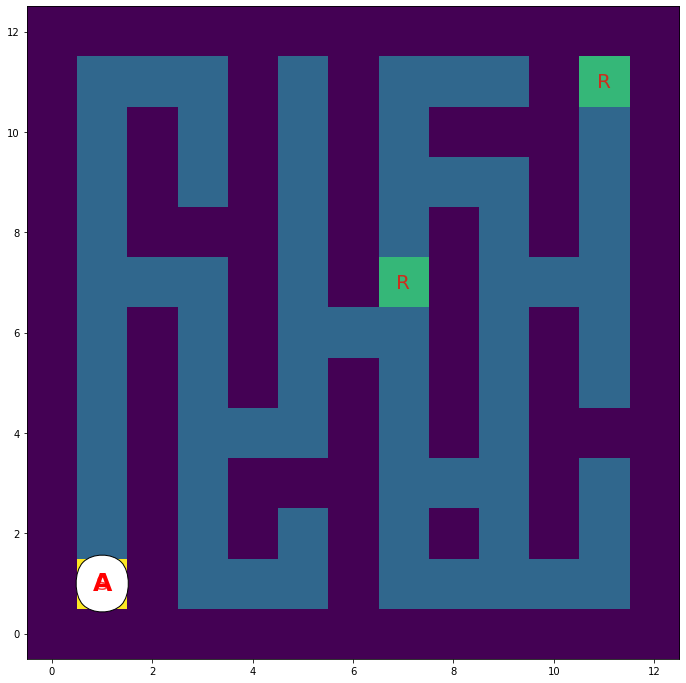

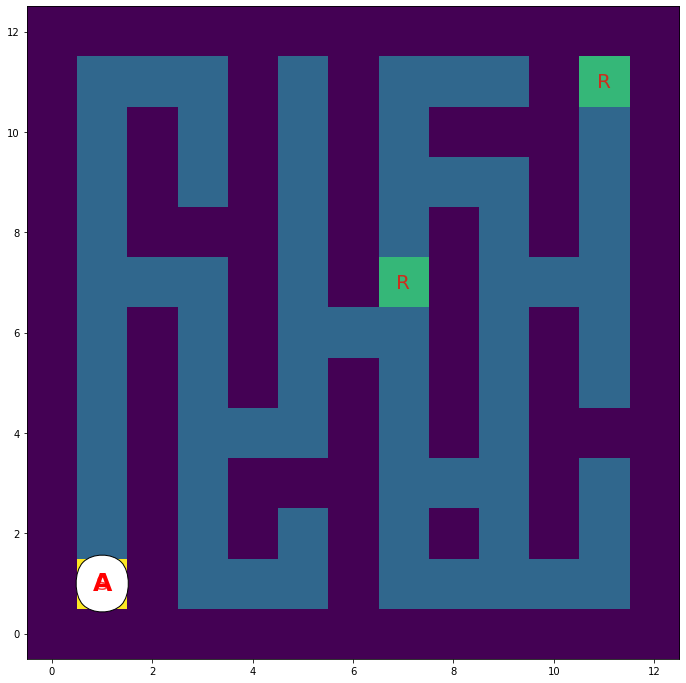

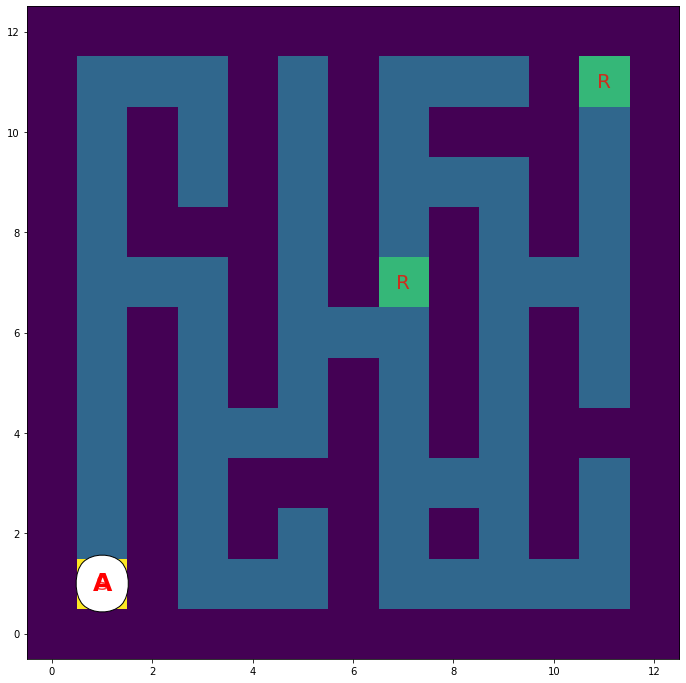

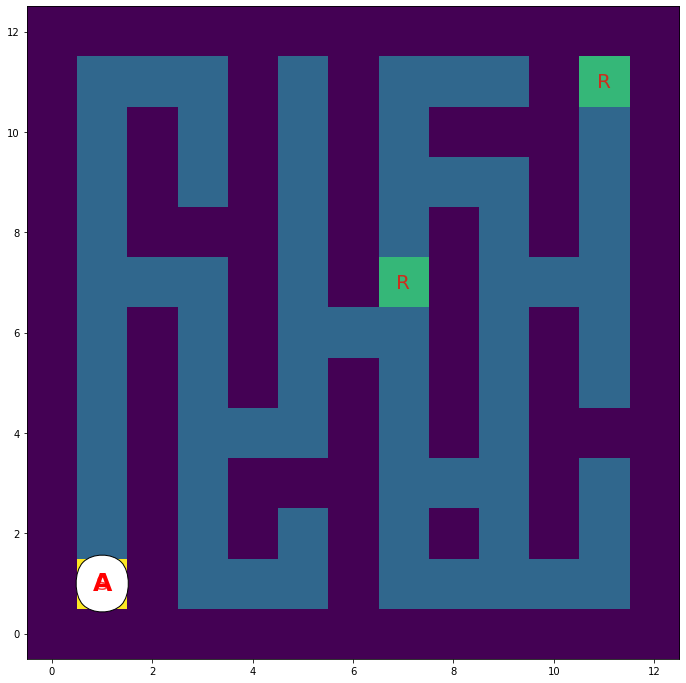

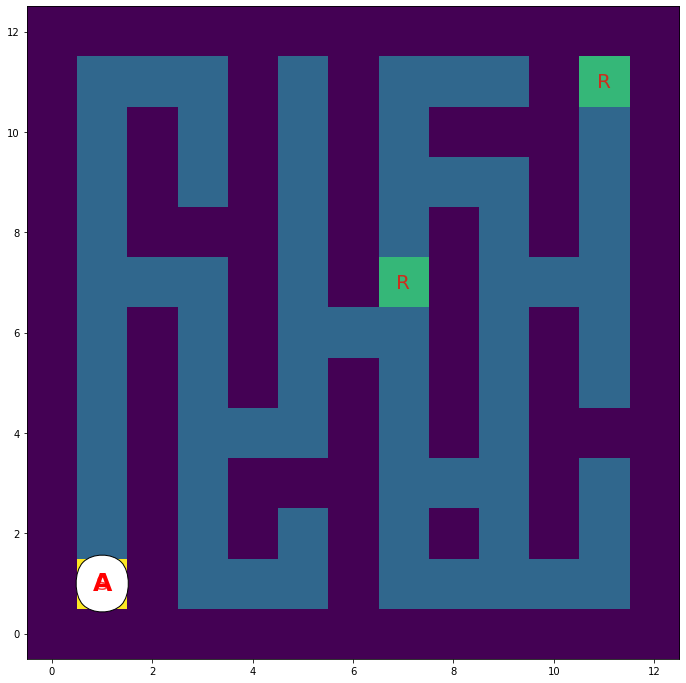

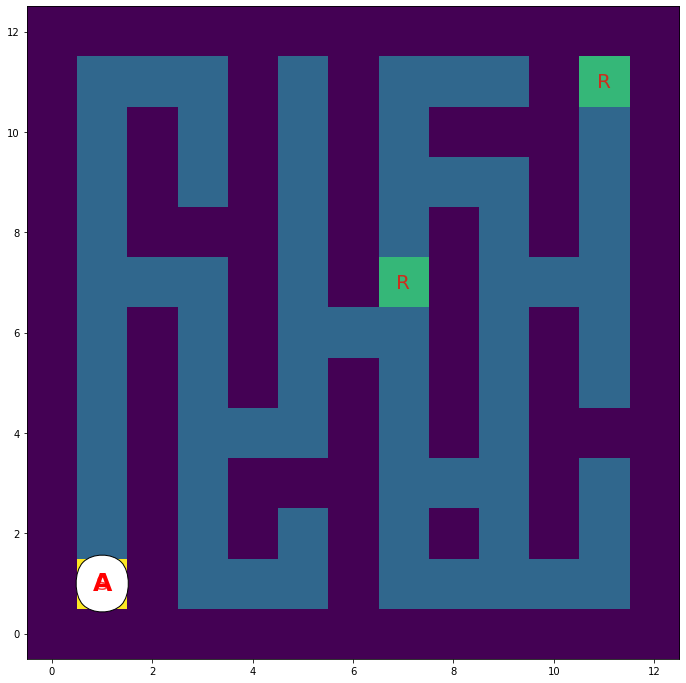

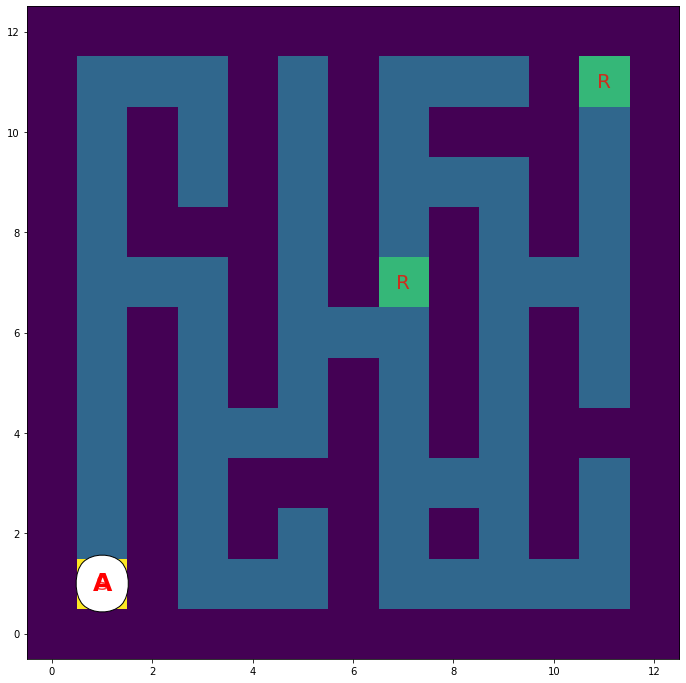

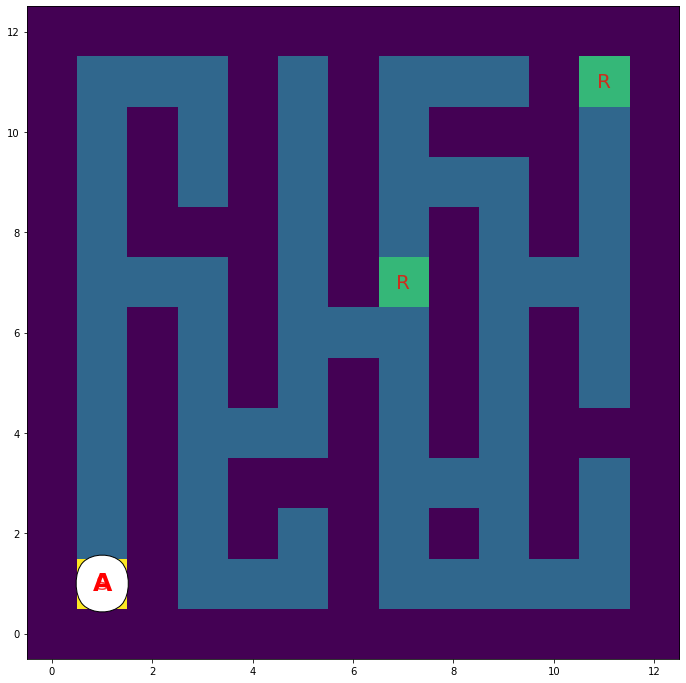

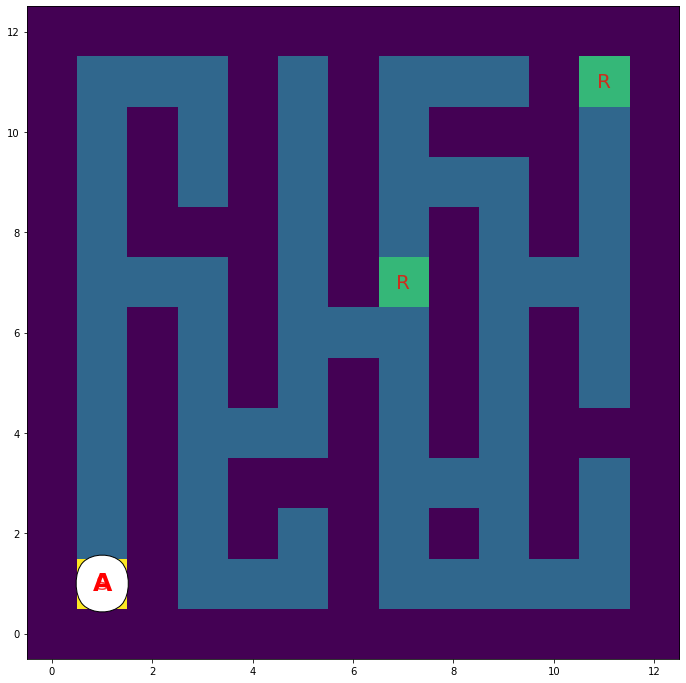

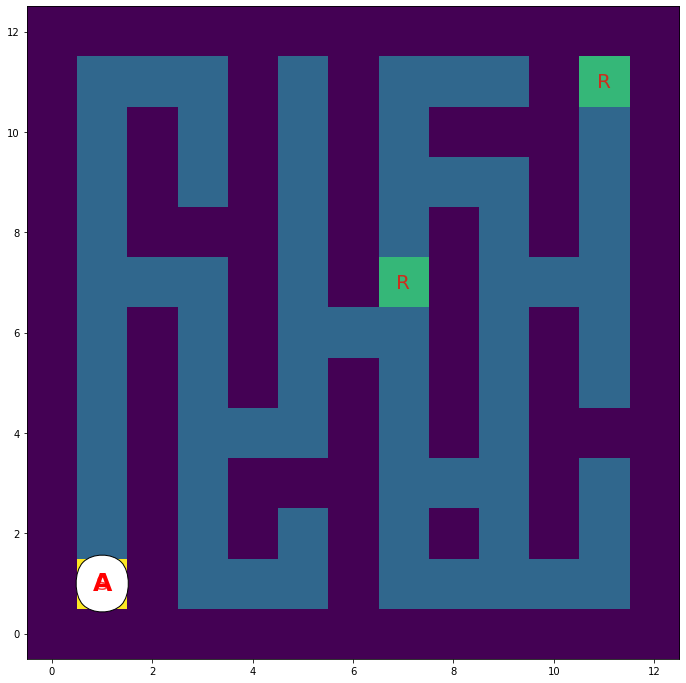

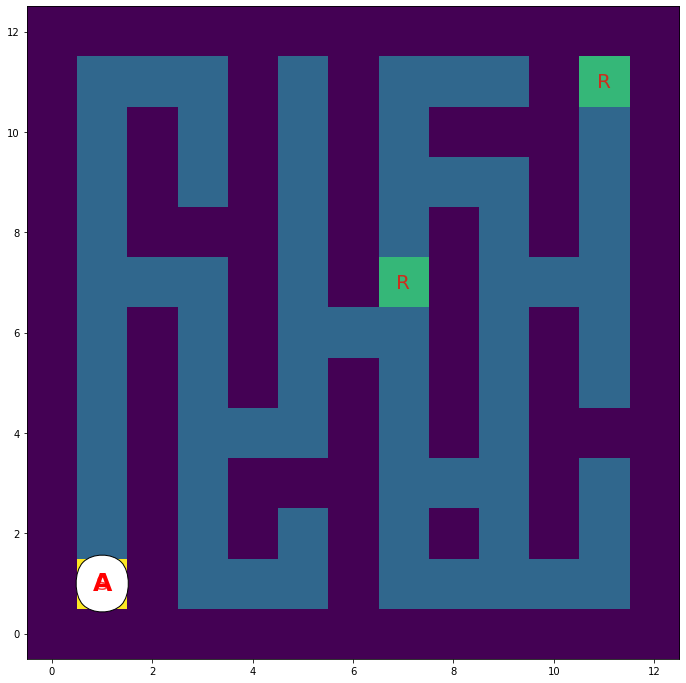

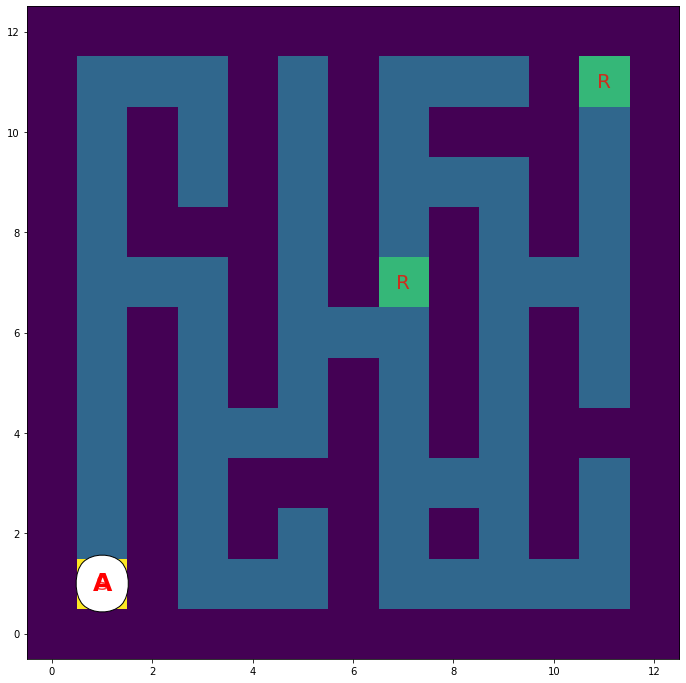

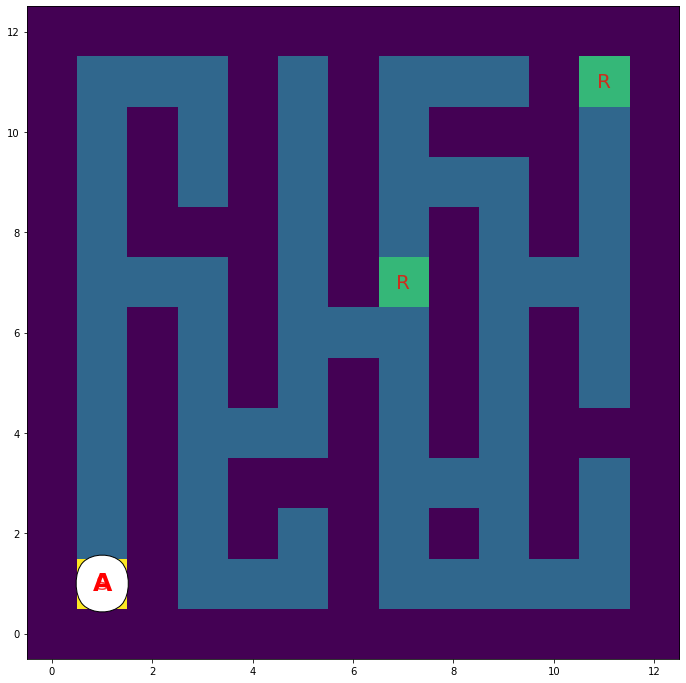

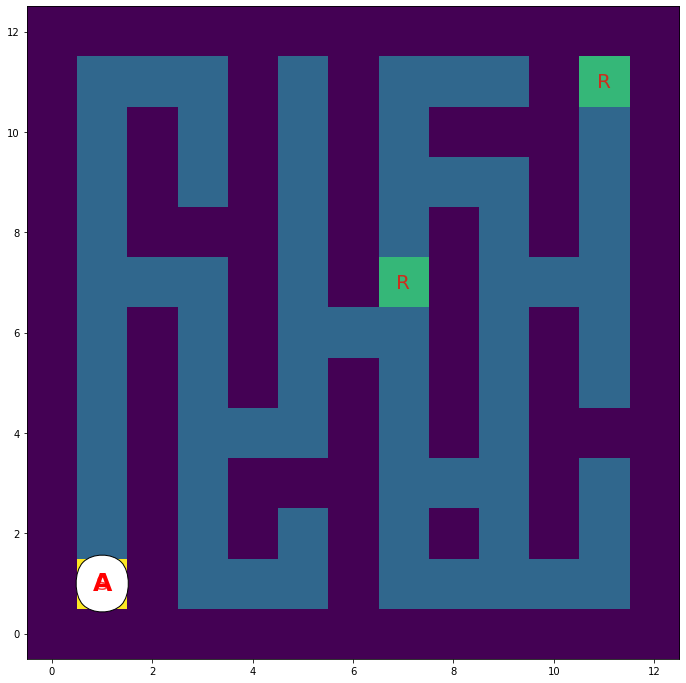

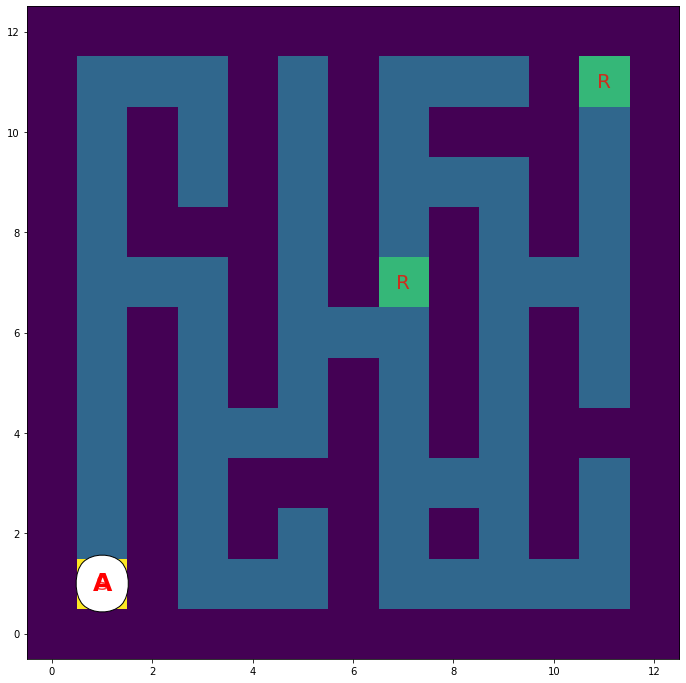

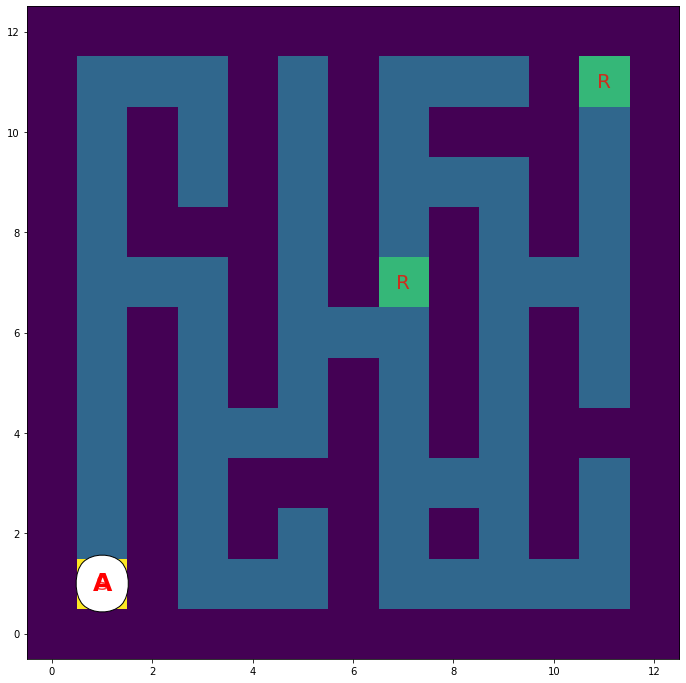

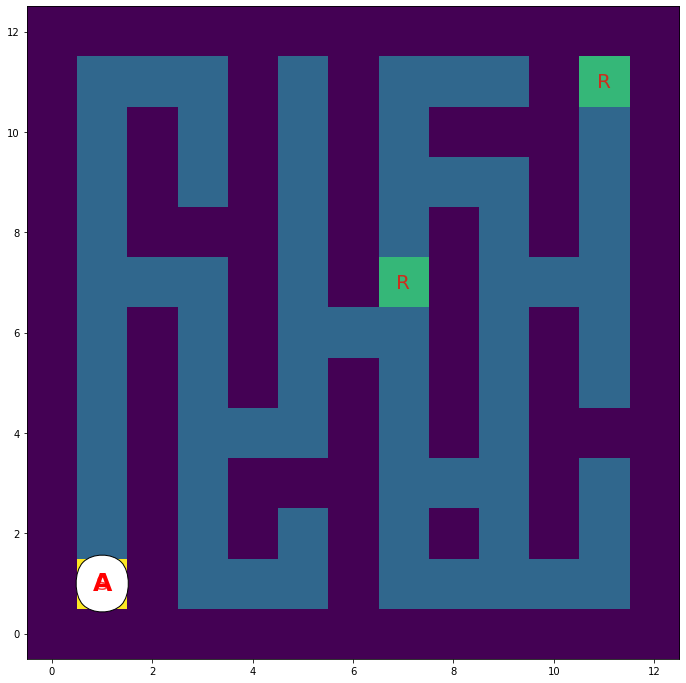

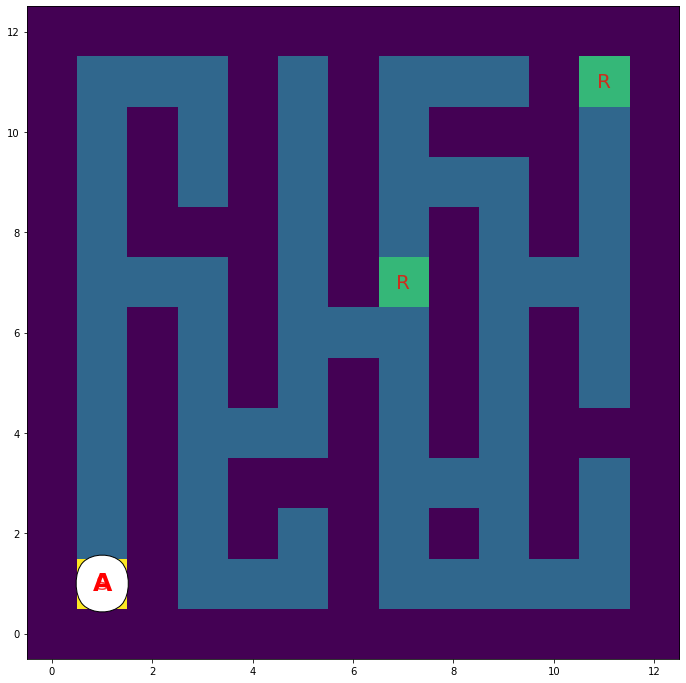

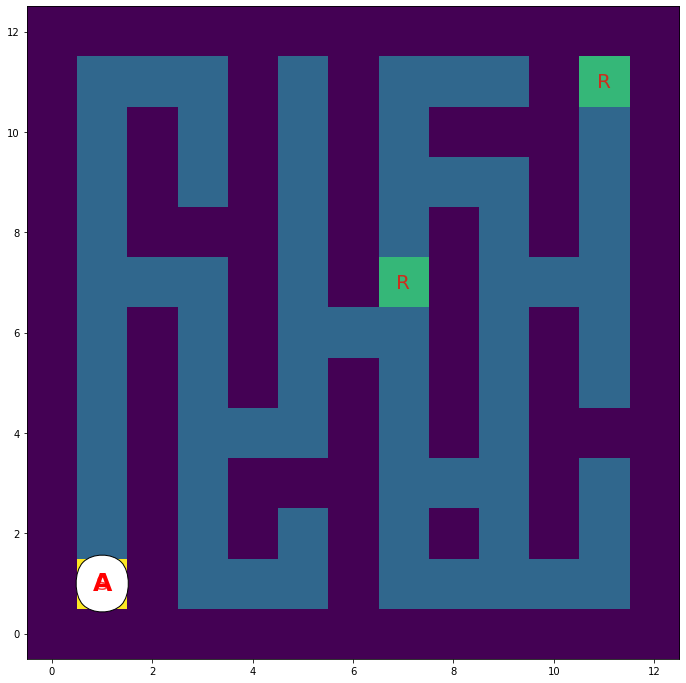

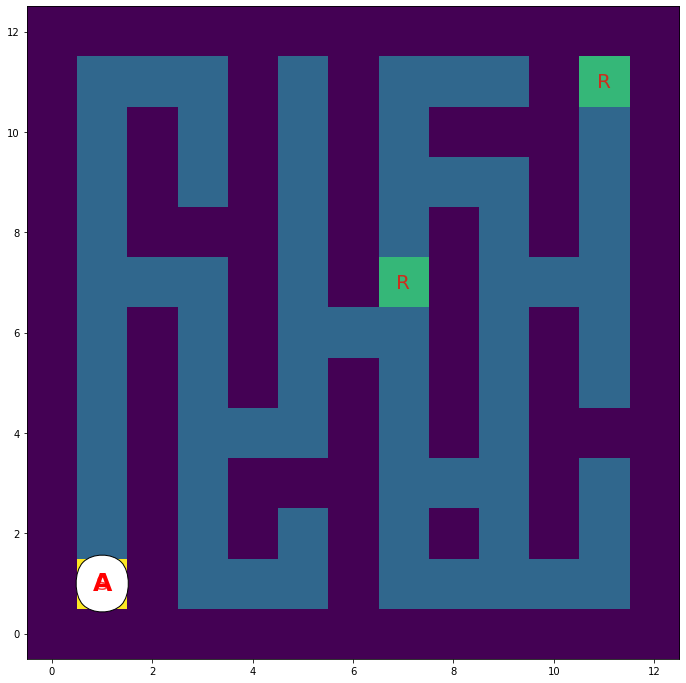

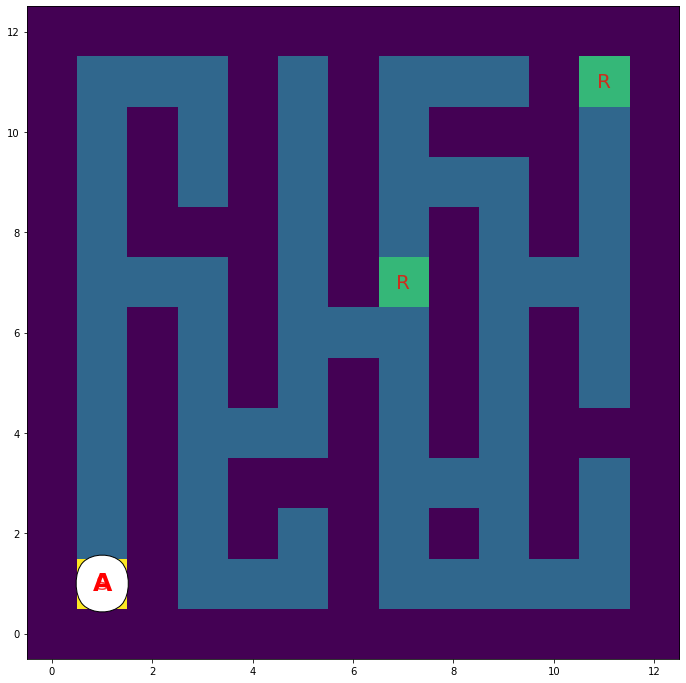

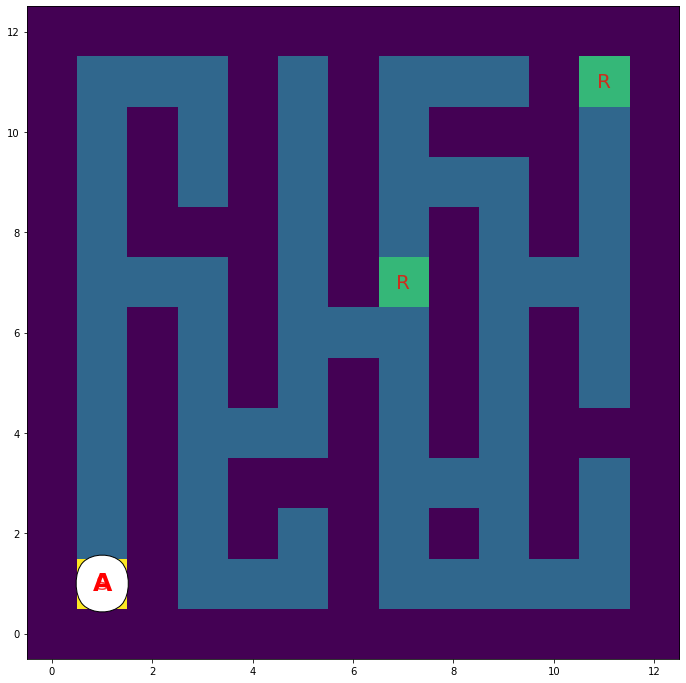

In [63]:
##Produced learned helplessness

def record_agent(title="agent", optimal_trajectory=None, one_state=None):
    """
    This function records the SR in each state the agent enters during an epoch. 
    Params:
        title -- string, name of the resulting file
        optimal_trajectory -- list[int], simulates path of the agent
    """
    metadata = dict(title=title, artist='JG')
    writer = manimation.FFMpegFileWriter(fps=15, metadata=metadata)
    fig, ax = plt.subplots(figsize=(12, 12))
    fig.tight_layout()
    
    with writer.saving(fig, f"./out/{title}.mp4", 144):
        RL.rl_change_task(reward_states=[(11, 11), (7, 7)], rewards=[10, -100])
        
        RL.rl_episode()
        reward, state, action, termination = RL.rl_start()
        
        for _ in range(100):
            reward, state, action, termination = RL.rl_step(reward, state, action)
            if termination:
                break
            RL.rl_plot()
            writer.grab_frame()
            ax.clear()


#Render the change in SR for one state over 100 episodes
RL = ReinforcementLearning(Maze, TemporalDifferenceSuccessor)

RL.rl_init(env_info, agent_info)

#Latent learning
NUM_EXPLORATION_STEPS=500000
RL.rl_explore_env(NUM_EXPLORATION_STEPS)

for _ in tqdm(range(10)):    
    RL.rl_episode()
    
#Task
record_agent("agent_punishing_state", one_state=92)